## ML COURSEWORK

In [2]:
from utils import mnist_reader

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture as GMM

from scipy.stats import multivariate_normal    

from matplotlib.colors import LogNorm
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate as CV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

from sklearn.model_selection import validation_curve,learning_curve



In [3]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

## Task 2.1.1 perform PCA with just 2 components

In [4]:
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(n_components=2)

In [51]:
pca.explained_variance_ratio_

array([0.29039228, 0.1775531 ])

In [52]:
X_t = pca.transform(X_train)

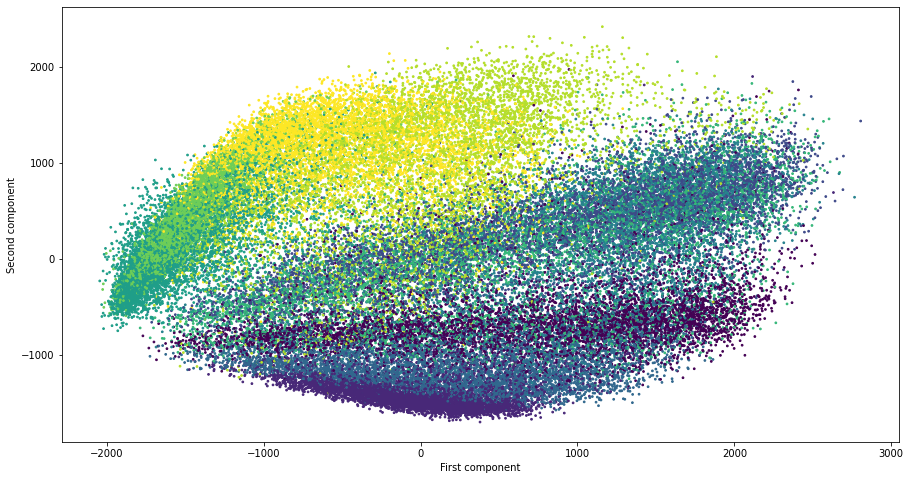

In [53]:
plt.figure(figsize=(15, 8))
plt.xlabel("First component")
plt.ylabel("Second component")
plt.scatter(X_t[:,0],X_t[:,1],s=3,c=y_train)
plt.show()

## Task 2.1.2. Perform hard clustering


In [55]:
#kmeans is extra for comparison purposes
kmeans = KMeans(n_clusters = 10).fit(X_t)

In [56]:
labels = KMeans(n_clusters=10).fit_predict(X_t)


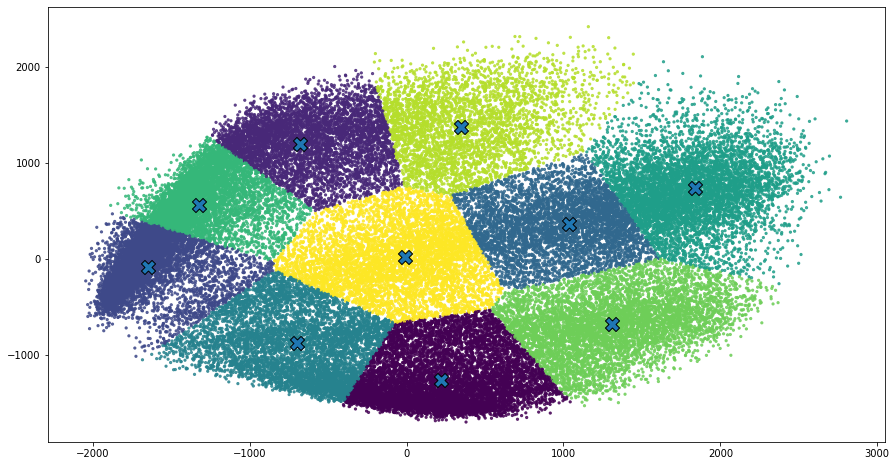

In [57]:
plt.figure(figsize=(15, 8))
plt.viridis() # Set colour map
plt.scatter(X_t[:, 0], X_t[:, 1], c=labels,s=5, alpha=0.8,label=labels) # plot data points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', edgecolors='k') # plot centroids
plt.show()

## Soft clustering

In [58]:
gmm = GMM(n_components=10,verbose=1).fit(X_t)

labelsGMM = gmm.predict_proba(X_t)


Initialization 0
  Iteration 10
Initialization converged: True


In [59]:
print(labelsGMM[0])

[1.39646271e-022 9.81080859e-006 2.36048529e-011 5.99118622e-018
 1.44869637e-001 3.54814518e-165 2.48706988e-030 2.70932215e-011
 8.53712613e-001 1.40793887e-003]


In [60]:
def createFade(labelsGMM):
    color = 0
    for idx, x in np.ndenumerate(labelsGMM):
        color = idx[0]*x + color
    return color

colors = []

for l in labelsGMM:
    colors.append(createFade(l))
    


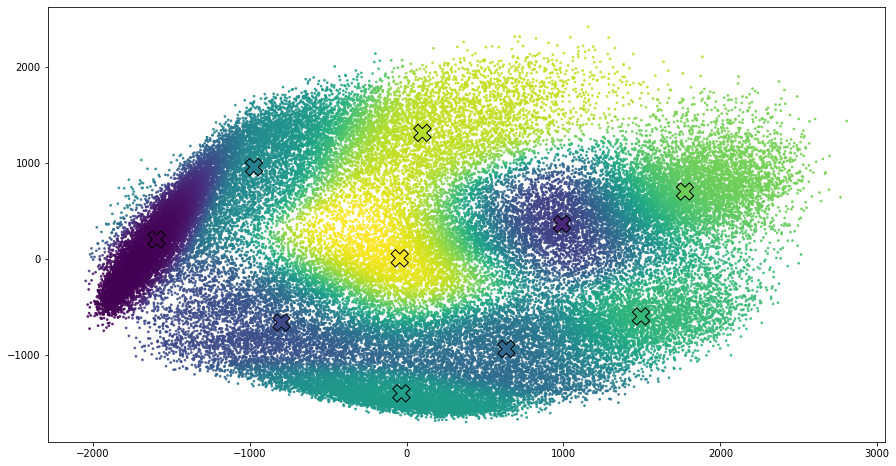

In [61]:
plt.figure(figsize=(15, 8))
plt.scatter(X_t[:, 0], X_t[:, 1],s=3,c=colors, alpha=0.8,label=labelsGMM) # plot data points
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, marker='X', c=range(10), edgecolors='k') # plot centroids
plt.show()

## Task 2.2.1 - Train a Neural Network


In [62]:
model = MLPClassifier(hidden_layer_sizes=(40,40,40),activation = 'relu',max_iter=200,solver='adam',learning_rate='constant',learning_rate_init =1e-3,tol=1e-3,early_stopping=True,validation_fraction=0.2,n_iter_no_change=25,verbose = True)

In [5]:
pcaAll =  PCA(n_components = 784)
pcaAll.fit(X_train)

PCA(n_components=784)

Text(0, 0.5, 'Explained variance')

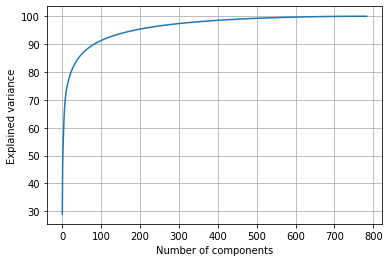

In [64]:
plt.grid()
plt.plot(np.cumsum(pcaAll.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [65]:
print(sum(pcaAll.explained_variance_ratio_[:40]))

0.844998742213257


In [6]:
pca = PCA(n_components = 40)

pca.fit(X_train)

PCA(n_components=40)

In [7]:
X_tt = pca.transform(X_train)


In [8]:
m = np.ndarray.max(X_tt)

X_tt = X_tt/m



In [69]:
model.fit(X_tt,y_train)

Iteration 1, loss = 1.37512596
Validation score: 0.762167
Iteration 2, loss = 0.58432762
Validation score: 0.802583
Iteration 3, loss = 0.52247130
Validation score: 0.813583
Iteration 4, loss = 0.49420265
Validation score: 0.825833
Iteration 5, loss = 0.47486654
Validation score: 0.829833
Iteration 6, loss = 0.45867458
Validation score: 0.831917
Iteration 7, loss = 0.44635467
Validation score: 0.839500
Iteration 8, loss = 0.43386407
Validation score: 0.843333
Iteration 9, loss = 0.42324660
Validation score: 0.846833
Iteration 10, loss = 0.41318472
Validation score: 0.846417
Iteration 11, loss = 0.40772159
Validation score: 0.851583
Iteration 12, loss = 0.39985470
Validation score: 0.853250
Iteration 13, loss = 0.39408067
Validation score: 0.855167
Iteration 14, loss = 0.39000446
Validation score: 0.856667
Iteration 15, loss = 0.38522033
Validation score: 0.854417
Iteration 16, loss = 0.38113619
Validation score: 0.857250
Iteration 17, loss = 0.37725342
Validation score: 0.859417
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(40, 40, 40),
              n_iter_no_change=25, tol=0.001, validation_fraction=0.2,
              verbose=True)

In [9]:
X_testy = pca.transform(X_test)
m = np.ndarray.max(X_testy)
X_testy/=m



In [73]:
model.score(X_testy,y_test)

0.8662

## Predicting the labels for different datapoints

7


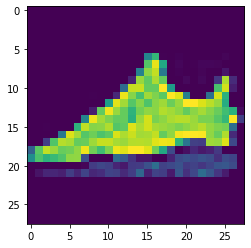

In [26]:
plt.imshow(X_test[1024].reshape(28,28))
print(y_test[1024])

In [27]:
model.predict(X_testy[1024].reshape(1,-1))[0]

7

## Tuning the Parameters

In [75]:
#Code for the parameters taken from lab 2
alphas = np.logspace(-3, -0, 100)
learning_rates = np.logspace(-4, -2, 100)
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

modelEnhanced = MLPClassifier(hidden_layer_sizes=(40,40,40,),activation = 'relu',max_iter=200,solver='adam',learning_rate='constant',tol=1e-3,early_stopping=True,validation_fraction=0.2,n_iter_no_change=25,verbose = True)


In [76]:
clf = RandomizedSearchCV(modelEnhanced, parameters, scoring='accuracy', n_iter=10, cv=3, verbose=2)

clf.fit(X_tt,y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Iteration 1, loss = 2.31616591
Validation score: 0.141250
Iteration 2, loss = 2.24558730
Validation score: 0.229000
Iteration 3, loss = 2.13790141
Validation score: 0.462750
Iteration 4, loss = 1.95265508
Validation score: 0.548875
Iteration 5, loss = 1.69569114
Validation score: 0.605125
Iteration 6, loss = 1.42305035
Validation score: 0.645750
Iteration 7, loss = 1.18167917
Validation score: 0.686375
Iteration 8, loss = 1.00603174
Validation score: 0.721625
Iteration 9, loss = 0.88797672
Validation score: 0.735625
Iteration 10, loss = 0.80902140
Validation score: 0.746000
Iteration 11, loss = 0.75446924
Validation score: 0.751500
Iteration 12, loss = 0.71551010
Validation score: 0.757625
Iteration 13, loss = 0.68637199
Validation score: 0.765250
Iteration 14, loss = 0.66380982
Validation score: 0.767500
Iteration 15, loss = 0.64552759
Validation score: 0.774250
Iteration 16, loss = 0.63022159
Validation score: 0.777125
Iter

Iteration 139, loss = 0.43562048
Validation score: 0.844500
Iteration 140, loss = 0.43522122
Validation score: 0.845375
Iteration 141, loss = 0.43482147
Validation score: 0.845125
Iteration 142, loss = 0.43422835
Validation score: 0.843000
Iteration 143, loss = 0.43372995
Validation score: 0.844125
Iteration 144, loss = 0.43346104
Validation score: 0.843750
Iteration 145, loss = 0.43299427
Validation score: 0.845250
Iteration 146, loss = 0.43279840
Validation score: 0.844375
Iteration 147, loss = 0.43215218
Validation score: 0.845125
Iteration 148, loss = 0.43192137
Validation score: 0.844625
Iteration 149, loss = 0.43146161
Validation score: 0.845875
Iteration 150, loss = 0.43097164
Validation score: 0.844500
Iteration 151, loss = 0.43058039
Validation score: 0.845625
Iteration 152, loss = 0.43017696
Validation score: 0.845750
Iteration 153, loss = 0.42964840
Validation score: 0.846250
Iteration 154, loss = 0.42924798
Validation score: 0.848125
Iteration 155, loss = 0.42884827
Validat

Iteration 95, loss = 0.46294723
Validation score: 0.839500
Iteration 96, loss = 0.46210913
Validation score: 0.839625
Iteration 97, loss = 0.46153834
Validation score: 0.839000
Iteration 98, loss = 0.46081026
Validation score: 0.841000
Iteration 99, loss = 0.46043940
Validation score: 0.840375
Iteration 100, loss = 0.45965955
Validation score: 0.841625
Iteration 101, loss = 0.45910094
Validation score: 0.841000
Iteration 102, loss = 0.45867818
Validation score: 0.841375
Iteration 103, loss = 0.45795085
Validation score: 0.841375
Iteration 104, loss = 0.45740529
Validation score: 0.841375
Iteration 105, loss = 0.45676066
Validation score: 0.841750
Iteration 106, loss = 0.45617807
Validation score: 0.842375
Iteration 107, loss = 0.45580285
Validation score: 0.841625
Iteration 108, loss = 0.45513275
Validation score: 0.843500
Iteration 109, loss = 0.45456788
Validation score: 0.842500
Iteration 110, loss = 0.45395945
Validation score: 0.843125
Iteration 111, loss = 0.45341724
Validation s

/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30711114
Validation score: 0.154000
Iteration 2, loss = 2.22563873
Validation score: 0.479500
Iteration 3, loss = 2.08437933
Validation score: 0.579625
Iteration 4, loss = 1.87047157
Validation score: 0.585250
Iteration 5, loss = 1.62624557
Validation score: 0.639750
Iteration 6, loss = 1.39105653
Validation score: 0.694625
Iteration 7, loss = 1.18239530
Validation score: 0.727500
Iteration 8, loss = 1.01705210
Validation score: 0.743125
Iteration 9, loss = 0.89716322
Validation score: 0.754000
Iteration 10, loss = 0.81188078
Validation score: 0.760625
Iteration 11, loss = 0.75148718
Validation score: 0.767500
Iteration 12, loss = 0.70866901
Validation score: 0.770875
Iteration 13, loss = 0.67738380
Validation score: 0.776625
Iteration 14, loss = 0.65373262
Validation score: 0.780750
Iteration 15, loss = 0.63574457
Validation score: 0.785625
Iteration 16, loss = 0.62108010
Validation score: 0.786500
Iteration 17, loss = 0.60892843
Validation score: 0.790875
Iterat

Iteration 45, loss = 0.29406577
Validation score: 0.869625
Iteration 46, loss = 0.29483043
Validation score: 0.868875
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
[CV] END alpha=0.005336699231206312, learning_rate_init=0.0047508101621027985; total time=  12.2s
Iteration 1, loss = 0.93551703
Validation score: 0.806750
Iteration 2, loss = 0.51089571
Validation score: 0.821250
Iteration 3, loss = 0.47255103
Validation score: 0.813375
Iteration 4, loss = 0.45282898
Validation score: 0.838125
Iteration 5, loss = 0.43241130
Validation score: 0.837750
Iteration 6, loss = 0.41494643
Validation score: 0.844875
Iteration 7, loss = 0.40180305
Validation score: 0.846000
Iteration 8, loss = 0.39270063
Validation score: 0.847625
Iteration 9, loss = 0.38316367
Validation score: 0.856750
Iteration 10, loss = 0.37326113
Validation score: 0.857000
Iteration 11, loss = 0.36926934
Validation score: 0.853375
Iteration 12, loss = 0.36255684
Validation score: 0

Iteration 13, loss = 0.51395736
Validation score: 0.805750
Iteration 14, loss = 0.50855829
Validation score: 0.810875
Iteration 15, loss = 0.50395953
Validation score: 0.813875
Iteration 16, loss = 0.50021520
Validation score: 0.815000
Iteration 17, loss = 0.49626577
Validation score: 0.817750
Iteration 18, loss = 0.49283398
Validation score: 0.816375
Iteration 19, loss = 0.48958169
Validation score: 0.817250
Iteration 20, loss = 0.48618089
Validation score: 0.820250
Iteration 21, loss = 0.48277463
Validation score: 0.819625
Iteration 22, loss = 0.48049180
Validation score: 0.821500
Iteration 23, loss = 0.47826361
Validation score: 0.822875
Iteration 24, loss = 0.47479172
Validation score: 0.824250
Iteration 25, loss = 0.47175913
Validation score: 0.825875
Iteration 26, loss = 0.46907959
Validation score: 0.824500
Iteration 27, loss = 0.46710734
Validation score: 0.826375
Iteration 28, loss = 0.46475374
Validation score: 0.829000
Iteration 29, loss = 0.46218753
Validation score: 0.8288

Iteration 151, loss = 0.36497252
Validation score: 0.858000
Iteration 152, loss = 0.36486740
Validation score: 0.858125
Iteration 153, loss = 0.36471377
Validation score: 0.858500
Iteration 154, loss = 0.36383011
Validation score: 0.857375
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
[CV] END alpha=0.02848035868435802, learning_rate_init=0.0003053855508833416; total time=  40.6s
Iteration 1, loss = 2.20669813
Validation score: 0.344500
Iteration 2, loss = 1.60332483
Validation score: 0.666000
Iteration 3, loss = 0.96227473
Validation score: 0.726125
Iteration 4, loss = 0.72444563
Validation score: 0.761500
Iteration 5, loss = 0.64344994
Validation score: 0.778375
Iteration 6, loss = 0.59981192
Validation score: 0.788500
Iteration 7, loss = 0.57132723
Validation score: 0.797375
Iteration 8, loss = 0.55134751
Validation score: 0.803625
Iteration 9, loss = 0.53652637
Validation score: 0.808125
Iteration 10, loss = 0.52647546
Validation score

Iteration 27, loss = 0.46163027
Validation score: 0.823750
Iteration 28, loss = 0.45909366
Validation score: 0.825875
Iteration 29, loss = 0.45651219
Validation score: 0.826500
Iteration 30, loss = 0.45386922
Validation score: 0.826250
Iteration 31, loss = 0.45163096
Validation score: 0.827500
Iteration 32, loss = 0.44910850
Validation score: 0.829625
Iteration 33, loss = 0.44729687
Validation score: 0.828875
Iteration 34, loss = 0.44465199
Validation score: 0.830750
Iteration 35, loss = 0.44289158
Validation score: 0.829250
Iteration 36, loss = 0.44115933
Validation score: 0.832875
Iteration 37, loss = 0.43889024
Validation score: 0.832875
Iteration 38, loss = 0.43758557
Validation score: 0.833875
Iteration 39, loss = 0.43564810
Validation score: 0.835750
Iteration 40, loss = 0.43412134
Validation score: 0.834750
Iteration 41, loss = 0.43207819
Validation score: 0.833125
Iteration 42, loss = 0.43030447
Validation score: 0.834375
Iteration 43, loss = 0.42936790
Validation score: 0.8363

Iteration 12, loss = 0.51031732
Validation score: 0.833500
Iteration 13, loss = 0.50550687
Validation score: 0.832750
Iteration 14, loss = 0.50179051
Validation score: 0.833750
Iteration 15, loss = 0.49805937
Validation score: 0.833125
Iteration 16, loss = 0.49405313
Validation score: 0.834625
Iteration 17, loss = 0.49108201
Validation score: 0.837375
Iteration 18, loss = 0.48763840
Validation score: 0.840625
Iteration 19, loss = 0.48406077
Validation score: 0.838625
Iteration 20, loss = 0.48025867
Validation score: 0.841750
Iteration 21, loss = 0.47726505
Validation score: 0.841375
Iteration 22, loss = 0.47453363
Validation score: 0.845125
Iteration 23, loss = 0.47130138
Validation score: 0.843375
Iteration 24, loss = 0.46904828
Validation score: 0.844500
Iteration 25, loss = 0.46628795
Validation score: 0.846375
Iteration 26, loss = 0.46387371
Validation score: 0.847875
Iteration 27, loss = 0.46086432
Validation score: 0.846500
Iteration 28, loss = 0.45869355
Validation score: 0.8503

Iteration 44, loss = 0.42639349
Validation score: 0.855625
Iteration 45, loss = 0.42460253
Validation score: 0.856625
Iteration 46, loss = 0.42388939
Validation score: 0.856750
Iteration 47, loss = 0.42258690
Validation score: 0.858375
Iteration 48, loss = 0.42091016
Validation score: 0.855375
Iteration 49, loss = 0.42016998
Validation score: 0.856625
Iteration 50, loss = 0.41939192
Validation score: 0.856125
Iteration 51, loss = 0.41800984
Validation score: 0.857375
Iteration 52, loss = 0.41659653
Validation score: 0.856500
Iteration 53, loss = 0.41536532
Validation score: 0.857250
Iteration 54, loss = 0.41556195
Validation score: 0.857750
Iteration 55, loss = 0.41435171
Validation score: 0.857375
Iteration 56, loss = 0.41293264
Validation score: 0.858750
Iteration 57, loss = 0.41229887
Validation score: 0.859875
Iteration 58, loss = 0.41022698
Validation score: 0.859875
Iteration 59, loss = 0.41034168
Validation score: 0.860125
Iteration 60, loss = 0.40838833
Validation score: 0.8618

Iteration 56, loss = 0.41233644
Validation score: 0.852625
Iteration 57, loss = 0.41239252
Validation score: 0.854000
Iteration 58, loss = 0.41117522
Validation score: 0.853750
Iteration 59, loss = 0.41082306
Validation score: 0.854000
Iteration 60, loss = 0.41003785
Validation score: 0.854750
Iteration 61, loss = 0.40942449
Validation score: 0.853375
Iteration 62, loss = 0.40834761
Validation score: 0.854000
Iteration 63, loss = 0.40767971
Validation score: 0.854750
Iteration 64, loss = 0.40666790
Validation score: 0.854125
Iteration 65, loss = 0.40600016
Validation score: 0.855625
Iteration 66, loss = 0.40548804
Validation score: 0.856125
Iteration 67, loss = 0.40484618
Validation score: 0.855500
Iteration 68, loss = 0.40442262
Validation score: 0.856500
Iteration 69, loss = 0.40341949
Validation score: 0.856250
Iteration 70, loss = 0.40264478
Validation score: 0.856625
Iteration 71, loss = 0.40200602
Validation score: 0.856250
Iteration 72, loss = 0.40154698
Validation score: 0.8547

Iteration 8, loss = 0.62790594
Validation score: 0.785375
Iteration 9, loss = 0.60365111
Validation score: 0.791625
Iteration 10, loss = 0.58609596
Validation score: 0.795750
Iteration 11, loss = 0.57308336
Validation score: 0.800625
Iteration 12, loss = 0.56270560
Validation score: 0.801000
Iteration 13, loss = 0.55446268
Validation score: 0.806875
Iteration 14, loss = 0.54759102
Validation score: 0.809375
Iteration 15, loss = 0.54179614
Validation score: 0.809750
Iteration 16, loss = 0.53635045
Validation score: 0.812375
Iteration 17, loss = 0.53203029
Validation score: 0.813625
Iteration 18, loss = 0.52820091
Validation score: 0.814625
Iteration 19, loss = 0.52447441
Validation score: 0.815750
Iteration 20, loss = 0.52103039
Validation score: 0.815125
Iteration 21, loss = 0.51824097
Validation score: 0.815625
Iteration 22, loss = 0.51565610
Validation score: 0.817875
Iteration 23, loss = 0.51230991
Validation score: 0.818000
Iteration 24, loss = 0.50982980
Validation score: 0.819500

Iteration 25, loss = 0.49475791
Validation score: 0.827375
Iteration 26, loss = 0.49210123
Validation score: 0.827625
Iteration 27, loss = 0.48973566
Validation score: 0.830625
Iteration 28, loss = 0.48726353
Validation score: 0.830250
Iteration 29, loss = 0.48458545
Validation score: 0.831625
Iteration 30, loss = 0.48214147
Validation score: 0.833250
Iteration 31, loss = 0.48025432
Validation score: 0.834375
Iteration 32, loss = 0.47826875
Validation score: 0.835250
Iteration 33, loss = 0.47597593
Validation score: 0.835375
Iteration 34, loss = 0.47369119
Validation score: 0.835750
Iteration 35, loss = 0.47162582
Validation score: 0.838000
Iteration 36, loss = 0.46917124
Validation score: 0.839125
Iteration 37, loss = 0.46744912
Validation score: 0.839000
Iteration 38, loss = 0.46632273
Validation score: 0.841000
Iteration 39, loss = 0.46391296
Validation score: 0.840125
Iteration 40, loss = 0.46222815
Validation score: 0.842750
Iteration 41, loss = 0.46022437
Validation score: 0.8427

Iteration 27, loss = 0.51275452
Validation score: 0.819625
Iteration 28, loss = 0.51019453
Validation score: 0.819625
Iteration 29, loss = 0.50778901
Validation score: 0.821500
Iteration 30, loss = 0.50545979
Validation score: 0.824875
Iteration 31, loss = 0.50311387
Validation score: 0.824500
Iteration 32, loss = 0.50081700
Validation score: 0.823875
Iteration 33, loss = 0.49867419
Validation score: 0.823125
Iteration 34, loss = 0.49631098
Validation score: 0.825750
Iteration 35, loss = 0.49427426
Validation score: 0.825625
Iteration 36, loss = 0.49274148
Validation score: 0.827500
Iteration 37, loss = 0.49080753
Validation score: 0.828875
Iteration 38, loss = 0.48821458
Validation score: 0.829000
Iteration 39, loss = 0.48652448
Validation score: 0.828125
Iteration 40, loss = 0.48489873
Validation score: 0.830875
Iteration 41, loss = 0.48316896
Validation score: 0.829375
Iteration 42, loss = 0.48134991
Validation score: 0.830750
Iteration 43, loss = 0.47929061
Validation score: 0.8303

Iteration 21, loss = 0.67732528
Validation score: 0.807000
Iteration 22, loss = 0.67491538
Validation score: 0.806375
Iteration 23, loss = 0.67221645
Validation score: 0.809625
Iteration 24, loss = 0.66980154
Validation score: 0.811125
Iteration 25, loss = 0.66737988
Validation score: 0.810875
Iteration 26, loss = 0.66518817
Validation score: 0.813125
Iteration 27, loss = 0.66307400
Validation score: 0.814125
Iteration 28, loss = 0.66124816
Validation score: 0.813500
Iteration 29, loss = 0.65912003
Validation score: 0.815750
Iteration 30, loss = 0.65762739
Validation score: 0.815750
Iteration 31, loss = 0.65574275
Validation score: 0.816500
Iteration 32, loss = 0.65353252
Validation score: 0.816875
Iteration 33, loss = 0.65205144
Validation score: 0.818000
Iteration 34, loss = 0.65043870
Validation score: 0.818000
Iteration 35, loss = 0.64861571
Validation score: 0.819875
Iteration 36, loss = 0.64764971
Validation score: 0.819750
Iteration 37, loss = 0.64566373
Validation score: 0.8200

Iteration 24, loss = 0.67091107
Validation score: 0.809000
Iteration 25, loss = 0.66846490
Validation score: 0.810250
Iteration 26, loss = 0.66575203
Validation score: 0.811500
Iteration 27, loss = 0.66361787
Validation score: 0.811250
Iteration 28, loss = 0.66155862
Validation score: 0.812250
Iteration 29, loss = 0.65963126
Validation score: 0.814625
Iteration 30, loss = 0.65743672
Validation score: 0.814375
Iteration 31, loss = 0.65593382
Validation score: 0.814625
Iteration 32, loss = 0.65405073
Validation score: 0.815500
Iteration 33, loss = 0.65192894
Validation score: 0.816625
Iteration 34, loss = 0.65009167
Validation score: 0.816250
Iteration 35, loss = 0.64856158
Validation score: 0.817750
Iteration 36, loss = 0.64686209
Validation score: 0.817375
Iteration 37, loss = 0.64549074
Validation score: 0.818750
Iteration 38, loss = 0.64367240
Validation score: 0.817000
Iteration 39, loss = 0.64240582
Validation score: 0.817750
Iteration 40, loss = 0.64047268
Validation score: 0.8197

Iteration 1, loss = 2.32757574
Validation score: 0.498125
Iteration 2, loss = 1.97748744
Validation score: 0.563500
Iteration 3, loss = 1.43077895
Validation score: 0.699875
Iteration 4, loss = 1.07248166
Validation score: 0.732000
Iteration 5, loss = 0.90917061
Validation score: 0.750250
Iteration 6, loss = 0.83048237
Validation score: 0.760250
Iteration 7, loss = 0.78902052
Validation score: 0.768875
Iteration 8, loss = 0.76437635
Validation score: 0.774250
Iteration 9, loss = 0.74815227
Validation score: 0.780000
Iteration 10, loss = 0.73643354
Validation score: 0.782125
Iteration 11, loss = 0.72691826
Validation score: 0.784250
Iteration 12, loss = 0.71913820
Validation score: 0.788250
Iteration 13, loss = 0.71294790
Validation score: 0.790000
Iteration 14, loss = 0.70727098
Validation score: 0.792375
Iteration 15, loss = 0.70191668
Validation score: 0.793250
Iteration 16, loss = 0.69732831
Validation score: 0.797375
Iteration 17, loss = 0.69337594
Validation score: 0.796625
Iterat

Iteration 140, loss = 0.58884302
Validation score: 0.841500
Iteration 141, loss = 0.58800177
Validation score: 0.841750
Iteration 142, loss = 0.58803782
Validation score: 0.839500
Iteration 143, loss = 0.58778015
Validation score: 0.840625
Iteration 144, loss = 0.58745416
Validation score: 0.839875
Iteration 145, loss = 0.58754522
Validation score: 0.841375
Iteration 146, loss = 0.58715210
Validation score: 0.839750
Iteration 147, loss = 0.58677108
Validation score: 0.840625
Iteration 148, loss = 0.58684865
Validation score: 0.839500
Iteration 149, loss = 0.58645503
Validation score: 0.839375
Iteration 150, loss = 0.58607775
Validation score: 0.840375
Iteration 151, loss = 0.58640389
Validation score: 0.842375
Iteration 152, loss = 0.58581351
Validation score: 0.841875
Iteration 153, loss = 0.58613755
Validation score: 0.842250
Iteration 154, loss = 0.58512346
Validation score: 0.842875
Iteration 155, loss = 0.58521053
Validation score: 0.839750
Iteration 156, loss = 0.58498627
Validat

Iteration 120, loss = 0.43684438
Validation score: 0.870375
Iteration 121, loss = 0.43600984
Validation score: 0.870875
Iteration 122, loss = 0.43526239
Validation score: 0.866000
Iteration 123, loss = 0.43557224
Validation score: 0.866875
Iteration 124, loss = 0.43583229
Validation score: 0.864000
Iteration 125, loss = 0.43505532
Validation score: 0.870000
Iteration 126, loss = 0.43406922
Validation score: 0.867625
Iteration 127, loss = 0.43491081
Validation score: 0.870250
Iteration 128, loss = 0.43385320
Validation score: 0.864125
Iteration 129, loss = 0.43525295
Validation score: 0.866625
Iteration 130, loss = 0.43362877
Validation score: 0.869750
Iteration 131, loss = 0.43410187
Validation score: 0.867625
Iteration 132, loss = 0.43300885
Validation score: 0.867125
Iteration 133, loss = 0.43461005
Validation score: 0.867750
Iteration 134, loss = 0.43320764
Validation score: 0.867750
Iteration 135, loss = 0.43360004
Validation score: 0.871500
Iteration 136, loss = 0.43311265
Validat

Iteration 9, loss = 0.54160139
Validation score: 0.832250
Iteration 10, loss = 0.53574763
Validation score: 0.837000
Iteration 11, loss = 0.53073892
Validation score: 0.840125
Iteration 12, loss = 0.52709622
Validation score: 0.841250
Iteration 13, loss = 0.52246437
Validation score: 0.844125
Iteration 14, loss = 0.51987083
Validation score: 0.845125
Iteration 15, loss = 0.51574297
Validation score: 0.845875
Iteration 16, loss = 0.51198235
Validation score: 0.842875
Iteration 17, loss = 0.50996937
Validation score: 0.847625
Iteration 18, loss = 0.50730200
Validation score: 0.850000
Iteration 19, loss = 0.50365920
Validation score: 0.849750
Iteration 20, loss = 0.50155415
Validation score: 0.845750
Iteration 21, loss = 0.49918997
Validation score: 0.849750
Iteration 22, loss = 0.49668629
Validation score: 0.852250
Iteration 23, loss = 0.49433668
Validation score: 0.852500
Iteration 24, loss = 0.49269219
Validation score: 0.853875
Iteration 25, loss = 0.49078210
Validation score: 0.85350

Iteration 39, loss = 0.29478626
Validation score: 0.869250
Iteration 40, loss = 0.29135002
Validation score: 0.876000
Iteration 41, loss = 0.29427435
Validation score: 0.871500
Iteration 42, loss = 0.28814878
Validation score: 0.870750
Iteration 43, loss = 0.28956476
Validation score: 0.871000
Iteration 44, loss = 0.29133055
Validation score: 0.876500
Iteration 45, loss = 0.28640322
Validation score: 0.871875
Iteration 46, loss = 0.28730101
Validation score: 0.871250
Iteration 47, loss = 0.28605418
Validation score: 0.876625
Iteration 48, loss = 0.28428158
Validation score: 0.870750
Iteration 49, loss = 0.28639516
Validation score: 0.861625
Iteration 50, loss = 0.28229613
Validation score: 0.870750
Iteration 51, loss = 0.27731980
Validation score: 0.870375
Iteration 52, loss = 0.28590490
Validation score: 0.872125
Iteration 53, loss = 0.28164845
Validation score: 0.873125
Iteration 54, loss = 0.27949355
Validation score: 0.874625
Iteration 55, loss = 0.27892163
Validation score: 0.8678

Iteration 51, loss = 0.28076598
Validation score: 0.871625
Iteration 52, loss = 0.27801230
Validation score: 0.874500
Iteration 53, loss = 0.28094646
Validation score: 0.872500
Iteration 54, loss = 0.27799909
Validation score: 0.873000
Iteration 55, loss = 0.27776610
Validation score: 0.871125
Iteration 56, loss = 0.27660818
Validation score: 0.870500
Iteration 57, loss = 0.27402662
Validation score: 0.870250
Iteration 58, loss = 0.27391070
Validation score: 0.869500
Iteration 59, loss = 0.27505480
Validation score: 0.870875
Iteration 60, loss = 0.27411965
Validation score: 0.872750
Iteration 61, loss = 0.27299143
Validation score: 0.871750
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
[CV] END alpha=0.004977023564332114, learning_rate_init=0.005214008287999685; total time=  18.2s
Iteration 1, loss = 2.25015978
Validation score: 0.338250
Iteration 2, loss = 1.87485946
Validation score: 0.594375
Iteration 3, loss = 1.18595642
Validation sco

Iteration 1, loss = 2.19679656
Validation score: 0.503500
Iteration 2, loss = 1.68259047
Validation score: 0.669750
Iteration 3, loss = 1.11785738
Validation score: 0.734750
Iteration 4, loss = 0.80123212
Validation score: 0.762875
Iteration 5, loss = 0.67245912
Validation score: 0.777625
Iteration 6, loss = 0.61512024
Validation score: 0.791125
Iteration 7, loss = 0.58372162
Validation score: 0.795875
Iteration 8, loss = 0.56346833
Validation score: 0.800000
Iteration 9, loss = 0.54923061
Validation score: 0.805500
Iteration 10, loss = 0.53826408
Validation score: 0.807125
Iteration 11, loss = 0.52791940
Validation score: 0.810750
Iteration 12, loss = 0.51946452
Validation score: 0.813000
Iteration 13, loss = 0.51325224
Validation score: 0.815875
Iteration 14, loss = 0.50658195
Validation score: 0.816125
Iteration 15, loss = 0.50050947
Validation score: 0.821125
Iteration 16, loss = 0.49526026
Validation score: 0.819750
Iteration 17, loss = 0.49061599
Validation score: 0.823000
Iterat

Iteration 60, loss = 0.41361512
Validation score: 0.852000
Iteration 61, loss = 0.41224634
Validation score: 0.850625
Iteration 62, loss = 0.41123060
Validation score: 0.850250
Iteration 63, loss = 0.41023675
Validation score: 0.852375
Iteration 64, loss = 0.40938454
Validation score: 0.852250
Iteration 65, loss = 0.40798122
Validation score: 0.852250
Iteration 66, loss = 0.40695698
Validation score: 0.853375
Iteration 67, loss = 0.40585815
Validation score: 0.852000
Iteration 68, loss = 0.40470612
Validation score: 0.854125
Iteration 69, loss = 0.40388862
Validation score: 0.853250
Iteration 70, loss = 0.40270702
Validation score: 0.853750
Iteration 71, loss = 0.40173970
Validation score: 0.855000
Iteration 72, loss = 0.40062271
Validation score: 0.855250
Iteration 73, loss = 0.39931164
Validation score: 0.855625
Iteration 74, loss = 0.39846920
Validation score: 0.854500
Iteration 75, loss = 0.39791834
Validation score: 0.856750
Iteration 76, loss = 0.39651003
Validation score: 0.8561

Iteration 34, loss = 0.44264088
Validation score: 0.861000
Iteration 35, loss = 0.43775664
Validation score: 0.865750
Iteration 36, loss = 0.44021261
Validation score: 0.863125
Iteration 37, loss = 0.44054470
Validation score: 0.866375
Iteration 38, loss = 0.43859051
Validation score: 0.866000
Iteration 39, loss = 0.43833261
Validation score: 0.861375
Iteration 40, loss = 0.43659420
Validation score: 0.862750
Iteration 41, loss = 0.43754757
Validation score: 0.864625
Iteration 42, loss = 0.43810229
Validation score: 0.863875
Iteration 43, loss = 0.43393674
Validation score: 0.861125
Iteration 44, loss = 0.43817999
Validation score: 0.861625
Iteration 45, loss = 0.43172959
Validation score: 0.859625
Iteration 46, loss = 0.43820843
Validation score: 0.862125
Iteration 47, loss = 0.43473303
Validation score: 0.865250
Iteration 48, loss = 0.43450301
Validation score: 0.867250
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
[CV] END alpha=0.10722

Iteration 49, loss = 0.28513213
Validation score: 0.874583
Iteration 50, loss = 0.28398258
Validation score: 0.876500
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.


RandomizedSearchCV(cv=3,
                   estimator=MLPClassifier(early_stopping=True,
                                           hidden_layer_sizes=(40, 40, 40),
                                           n_iter_no_change=25, tol=0.001,
                                           validation_fraction=0.2,
                                           verbose=True),
                   param_distributions={'alpha': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708...
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01

In [77]:
clf.best_params_

{'learning_rate_init': 0.0047508101621027985, 'alpha': 0.005336699231206312}

## Testing the new hyperparameters

In [10]:
modelUpdated = MLPClassifier(hidden_layer_sizes=(40,40,40,),activation = 'relu',max_iter=200,solver='adam',learning_rate='constant',learning_rate_init =0.0047508101621027985,alpha=0.005336699231206312,tol=1e-3,early_stopping=True,validation_fraction=0.1,n_iter_no_change=25,verbose = True)

In [11]:
modelUpdated.fit(X_tt,y_train)

Iteration 1, loss = 0.73427021
Validation score: 0.819500
Iteration 2, loss = 0.45650580
Validation score: 0.838500
Iteration 3, loss = 0.42121550
Validation score: 0.848000
Iteration 4, loss = 0.39704519
Validation score: 0.850000
Iteration 5, loss = 0.37916931
Validation score: 0.856333
Iteration 6, loss = 0.36690176
Validation score: 0.862000
Iteration 7, loss = 0.35877262
Validation score: 0.864667
Iteration 8, loss = 0.35358441
Validation score: 0.861000
Iteration 9, loss = 0.34712680
Validation score: 0.868667
Iteration 10, loss = 0.34140020
Validation score: 0.867667
Iteration 11, loss = 0.33834786
Validation score: 0.872333
Iteration 12, loss = 0.33575316
Validation score: 0.869167
Iteration 13, loss = 0.33035055
Validation score: 0.867000
Iteration 14, loss = 0.32838762
Validation score: 0.868167
Iteration 15, loss = 0.32495081
Validation score: 0.867667
Iteration 16, loss = 0.32212644
Validation score: 0.872333
Iteration 17, loss = 0.32111108
Validation score: 0.870667
Iterat

MLPClassifier(alpha=0.005336699231206312, early_stopping=True,
              hidden_layer_sizes=(40, 40, 40),
              learning_rate_init=0.0047508101621027985, n_iter_no_change=25,
              tol=0.001, verbose=True)

In [80]:
modelUpdated.score(X_testy,y_test)

0.869

In [108]:
train_scores, validation_scores = validation_curve(estimator=model,X=X_tt,y=y_train,param_name='learning_rate_init',
                                                   param_range=learning_rates)

                                                   

Iteration 1, loss = 2.29084897
Validation score: 0.197292
Iteration 2, loss = 2.18085362
Validation score: 0.423854
Iteration 3, loss = 1.95943203
Validation score: 0.531667
Iteration 4, loss = 1.62973039
Validation score: 0.630625
Iteration 5, loss = 1.31749670
Validation score: 0.705625
Iteration 6, loss = 1.07415285
Validation score: 0.732917
Iteration 7, loss = 0.90752924
Validation score: 0.744062
Iteration 8, loss = 0.80125845
Validation score: 0.749062
Iteration 9, loss = 0.73598908
Validation score: 0.755104
Iteration 10, loss = 0.69375299
Validation score: 0.760729
Iteration 11, loss = 0.66361699
Validation score: 0.769167
Iteration 12, loss = 0.64107680
Validation score: 0.772500
Iteration 13, loss = 0.62321218
Validation score: 0.779583
Iteration 14, loss = 0.60865322
Validation score: 0.782917
Iteration 15, loss = 0.59617509
Validation score: 0.787813
Iteration 16, loss = 0.58539385
Validation score: 0.793229
Iteration 17, loss = 0.57587862
Validation score: 0.794479
Iterat

Iteration 140, loss = 0.38998639
Validation score: 0.853333
Iteration 141, loss = 0.38937184
Validation score: 0.852292
Iteration 142, loss = 0.38891757
Validation score: 0.852396
Iteration 143, loss = 0.38832475
Validation score: 0.852708
Iteration 144, loss = 0.38785512
Validation score: 0.852708
Iteration 145, loss = 0.38728578
Validation score: 0.853854
Iteration 146, loss = 0.38680252
Validation score: 0.853125
Iteration 147, loss = 0.38632135
Validation score: 0.853958
Iteration 148, loss = 0.38572818
Validation score: 0.853542
Iteration 149, loss = 0.38527240
Validation score: 0.853437
Iteration 150, loss = 0.38475859
Validation score: 0.854375
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.31028360
Validation score: 0.196250
Iteration 2, loss = 2.17714747
Validation score: 0.246562
Iteration 3, loss = 1.95135647
Validation score: 0.514583
Iteration 4, loss = 1.65957190
Validation score: 0.605313
Iteration 5, lo

Iteration 127, loss = 0.39530248
Validation score: 0.856458
Iteration 128, loss = 0.39468065
Validation score: 0.855833
Iteration 129, loss = 0.39401330
Validation score: 0.857187
Iteration 130, loss = 0.39332789
Validation score: 0.855313
Iteration 131, loss = 0.39262412
Validation score: 0.856771
Iteration 132, loss = 0.39202893
Validation score: 0.856667
Iteration 133, loss = 0.39147568
Validation score: 0.857187
Iteration 134, loss = 0.39082595
Validation score: 0.856563
Iteration 135, loss = 0.39032254
Validation score: 0.856667
Iteration 136, loss = 0.38966670
Validation score: 0.856250
Iteration 137, loss = 0.38910668
Validation score: 0.857604
Iteration 138, loss = 0.38838266
Validation score: 0.856563
Iteration 139, loss = 0.38799629
Validation score: 0.856771
Iteration 140, loss = 0.38732708
Validation score: 0.857917
Iteration 141, loss = 0.38662713
Validation score: 0.857500
Iteration 142, loss = 0.38629835
Validation score: 0.857917
Validation score did not improve more th

Iteration 122, loss = 0.37846393
Validation score: 0.856354
Iteration 123, loss = 0.37754184
Validation score: 0.856250
Iteration 124, loss = 0.37706583
Validation score: 0.855521
Iteration 125, loss = 0.37637879
Validation score: 0.855104
Iteration 126, loss = 0.37577525
Validation score: 0.856979
Iteration 127, loss = 0.37509761
Validation score: 0.858333
Iteration 128, loss = 0.37466478
Validation score: 0.857500
Iteration 129, loss = 0.37390924
Validation score: 0.855417
Iteration 130, loss = 0.37365241
Validation score: 0.857187
Iteration 131, loss = 0.37265888
Validation score: 0.857604
Iteration 132, loss = 0.37204196
Validation score: 0.856875
Iteration 133, loss = 0.37159171
Validation score: 0.858333
Iteration 134, loss = 0.37116426
Validation score: 0.859167
Iteration 135, loss = 0.37076916
Validation score: 0.857292
Iteration 136, loss = 0.36998919
Validation score: 0.857708
Iteration 137, loss = 0.36944314
Validation score: 0.858125
Iteration 138, loss = 0.36884405
Validat

Iteration 76, loss = 0.43043809
Validation score: 0.836562
Iteration 77, loss = 0.42920654
Validation score: 0.836875
Iteration 78, loss = 0.42807285
Validation score: 0.837292
Iteration 79, loss = 0.42682267
Validation score: 0.838021
Iteration 80, loss = 0.42578073
Validation score: 0.835938
Iteration 81, loss = 0.42459338
Validation score: 0.836875
Iteration 82, loss = 0.42358329
Validation score: 0.837708
Iteration 83, loss = 0.42245662
Validation score: 0.837083
Iteration 84, loss = 0.42143888
Validation score: 0.838333
Iteration 85, loss = 0.42032132
Validation score: 0.837604
Iteration 86, loss = 0.41930291
Validation score: 0.839896
Iteration 87, loss = 0.41832067
Validation score: 0.838333
Iteration 88, loss = 0.41727071
Validation score: 0.837917
Iteration 89, loss = 0.41628392
Validation score: 0.839375
Iteration 90, loss = 0.41511748
Validation score: 0.839688
Iteration 91, loss = 0.41414847
Validation score: 0.838854
Iteration 92, loss = 0.41342199
Validation score: 0.8409

Iteration 53, loss = 0.44830871
Validation score: 0.837292
Iteration 54, loss = 0.44656391
Validation score: 0.837604
Iteration 55, loss = 0.44506034
Validation score: 0.837917
Iteration 56, loss = 0.44346582
Validation score: 0.839271
Iteration 57, loss = 0.44191326
Validation score: 0.837396
Iteration 58, loss = 0.44053224
Validation score: 0.839688
Iteration 59, loss = 0.43898384
Validation score: 0.840104
Iteration 60, loss = 0.43754153
Validation score: 0.840208
Iteration 61, loss = 0.43604658
Validation score: 0.841042
Iteration 62, loss = 0.43505730
Validation score: 0.842083
Iteration 63, loss = 0.43345173
Validation score: 0.842604
Iteration 64, loss = 0.43228321
Validation score: 0.842292
Iteration 65, loss = 0.43086843
Validation score: 0.842500
Iteration 66, loss = 0.42982232
Validation score: 0.842812
Iteration 67, loss = 0.42829918
Validation score: 0.843958
Iteration 68, loss = 0.42737651
Validation score: 0.844271
Iteration 69, loss = 0.42603217
Validation score: 0.8444

Iteration 18, loss = 0.53608000
Validation score: 0.805000
Iteration 19, loss = 0.53022174
Validation score: 0.807187
Iteration 20, loss = 0.52545223
Validation score: 0.809063
Iteration 21, loss = 0.52073719
Validation score: 0.808958
Iteration 22, loss = 0.51642486
Validation score: 0.812708
Iteration 23, loss = 0.51260255
Validation score: 0.813021
Iteration 24, loss = 0.50903261
Validation score: 0.815312
Iteration 25, loss = 0.50575269
Validation score: 0.815000
Iteration 26, loss = 0.50269364
Validation score: 0.818542
Iteration 27, loss = 0.49960940
Validation score: 0.819688
Iteration 28, loss = 0.49688708
Validation score: 0.821146
Iteration 29, loss = 0.49397724
Validation score: 0.821562
Iteration 30, loss = 0.49130851
Validation score: 0.823125
Iteration 31, loss = 0.48877194
Validation score: 0.823750
Iteration 32, loss = 0.48637065
Validation score: 0.823438
Iteration 33, loss = 0.48395103
Validation score: 0.825521
Iteration 34, loss = 0.48157118
Validation score: 0.8261

Iteration 33, loss = 0.47370308
Validation score: 0.827187
Iteration 34, loss = 0.47153530
Validation score: 0.829375
Iteration 35, loss = 0.46914561
Validation score: 0.829792
Iteration 36, loss = 0.46722052
Validation score: 0.830729
Iteration 37, loss = 0.46524569
Validation score: 0.832812
Iteration 38, loss = 0.46319144
Validation score: 0.830625
Iteration 39, loss = 0.46156536
Validation score: 0.833750
Iteration 40, loss = 0.45961273
Validation score: 0.832708
Iteration 41, loss = 0.45783035
Validation score: 0.833854
Iteration 42, loss = 0.45604460
Validation score: 0.835313
Iteration 43, loss = 0.45460184
Validation score: 0.834583
Iteration 44, loss = 0.45267134
Validation score: 0.835729
Iteration 45, loss = 0.45110637
Validation score: 0.836667
Iteration 46, loss = 0.44951483
Validation score: 0.837187
Iteration 47, loss = 0.44803785
Validation score: 0.836667
Iteration 48, loss = 0.44631122
Validation score: 0.838021
Iteration 49, loss = 0.44488158
Validation score: 0.8379

Iteration 19, loss = 0.51127495
Validation score: 0.814063
Iteration 20, loss = 0.50684793
Validation score: 0.814583
Iteration 21, loss = 0.50271831
Validation score: 0.816667
Iteration 22, loss = 0.49915667
Validation score: 0.817604
Iteration 23, loss = 0.49544416
Validation score: 0.819792
Iteration 24, loss = 0.49226610
Validation score: 0.819896
Iteration 25, loss = 0.48932273
Validation score: 0.820104
Iteration 26, loss = 0.48649713
Validation score: 0.823229
Iteration 27, loss = 0.48364467
Validation score: 0.821146
Iteration 28, loss = 0.48132214
Validation score: 0.821146
Iteration 29, loss = 0.47875852
Validation score: 0.821875
Iteration 30, loss = 0.47648909
Validation score: 0.824271
Iteration 31, loss = 0.47429315
Validation score: 0.822708
Iteration 32, loss = 0.47208585
Validation score: 0.826042
Iteration 33, loss = 0.47009353
Validation score: 0.824583
Iteration 34, loss = 0.46810114
Validation score: 0.825104
Iteration 35, loss = 0.46587624
Validation score: 0.8253

Iteration 6, loss = 0.73519257
Validation score: 0.755625
Iteration 7, loss = 0.65832677
Validation score: 0.764896
Iteration 8, loss = 0.61682696
Validation score: 0.770104
Iteration 9, loss = 0.59068594
Validation score: 0.778333
Iteration 10, loss = 0.57222956
Validation score: 0.785208
Iteration 11, loss = 0.55823970
Validation score: 0.788750
Iteration 12, loss = 0.54689680
Validation score: 0.792813
Iteration 13, loss = 0.53772968
Validation score: 0.796146
Iteration 14, loss = 0.52948584
Validation score: 0.798021
Iteration 15, loss = 0.52240591
Validation score: 0.799167
Iteration 16, loss = 0.51619771
Validation score: 0.803438
Iteration 17, loss = 0.51042439
Validation score: 0.806458
Iteration 18, loss = 0.50557639
Validation score: 0.809167
Iteration 19, loss = 0.50101887
Validation score: 0.811146
Iteration 20, loss = 0.49665214
Validation score: 0.810937
Iteration 21, loss = 0.49274864
Validation score: 0.813750
Iteration 22, loss = 0.48901498
Validation score: 0.814479
I

Iteration 145, loss = 0.35532787
Validation score: 0.858125
Iteration 146, loss = 0.35485977
Validation score: 0.857604
Iteration 147, loss = 0.35462406
Validation score: 0.859375
Iteration 148, loss = 0.35390457
Validation score: 0.855417
Iteration 149, loss = 0.35349635
Validation score: 0.855833
Iteration 150, loss = 0.35303118
Validation score: 0.859062
Iteration 151, loss = 0.35259747
Validation score: 0.859479
Iteration 152, loss = 0.35218825
Validation score: 0.859271
Iteration 153, loss = 0.35165545
Validation score: 0.859062
Iteration 154, loss = 0.35147621
Validation score: 0.858958
Iteration 155, loss = 0.35058295
Validation score: 0.858646
Iteration 156, loss = 0.35034232
Validation score: 0.859375
Iteration 157, loss = 0.34982129
Validation score: 0.860104
Iteration 158, loss = 0.34932870
Validation score: 0.858958
Iteration 159, loss = 0.34893955
Validation score: 0.858542
Iteration 160, loss = 0.34850693
Validation score: 0.857917
Iteration 161, loss = 0.34818240
Validat

/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27165347
Validation score: 0.339792
Iteration 2, loss = 2.07934057
Validation score: 0.473750
Iteration 3, loss = 1.67362128
Validation score: 0.626979
Iteration 4, loss = 1.21458979
Validation score: 0.727396
Iteration 5, loss = 0.91692362
Validation score: 0.754583
Iteration 6, loss = 0.74904531
Validation score: 0.768542
Iteration 7, loss = 0.65967826
Validation score: 0.783958
Iteration 8, loss = 0.61080379
Validation score: 0.790833
Iteration 9, loss = 0.58306581
Validation score: 0.796146
Iteration 10, loss = 0.56540938
Validation score: 0.800625
Iteration 11, loss = 0.55203108
Validation score: 0.803646
Iteration 12, loss = 0.54233992
Validation score: 0.808125
Iteration 13, loss = 0.53457863
Validation score: 0.809792
Iteration 14, loss = 0.52785508
Validation score: 0.810729
Iteration 15, loss = 0.52191450
Validation score: 0.813125
Iteration 16, loss = 0.51647365
Validation score: 0.811875
Iteration 17, loss = 0.51196712
Validation score: 0.814063
Iterat

Iteration 48, loss = 0.42915165
Validation score: 0.836458
Iteration 49, loss = 0.42769856
Validation score: 0.838437
Iteration 50, loss = 0.42644893
Validation score: 0.838646
Iteration 51, loss = 0.42483446
Validation score: 0.838854
Iteration 52, loss = 0.42353385
Validation score: 0.839167
Iteration 53, loss = 0.42210073
Validation score: 0.839375
Iteration 54, loss = 0.42074995
Validation score: 0.839896
Iteration 55, loss = 0.41965331
Validation score: 0.841354
Iteration 56, loss = 0.41809432
Validation score: 0.841250
Iteration 57, loss = 0.41676822
Validation score: 0.841458
Iteration 58, loss = 0.41569783
Validation score: 0.842083
Iteration 59, loss = 0.41443391
Validation score: 0.841979
Iteration 60, loss = 0.41311743
Validation score: 0.845833
Iteration 61, loss = 0.41211732
Validation score: 0.844167
Iteration 62, loss = 0.41094137
Validation score: 0.844792
Iteration 63, loss = 0.40976435
Validation score: 0.844479
Iteration 64, loss = 0.40877499
Validation score: 0.8458

Iteration 67, loss = 0.41692899
Validation score: 0.843229
Iteration 68, loss = 0.41538467
Validation score: 0.844896
Iteration 69, loss = 0.41439447
Validation score: 0.846042
Iteration 70, loss = 0.41341304
Validation score: 0.845729
Iteration 71, loss = 0.41229347
Validation score: 0.845000
Iteration 72, loss = 0.41115143
Validation score: 0.846771
Iteration 73, loss = 0.41007874
Validation score: 0.846771
Iteration 74, loss = 0.40922674
Validation score: 0.847500
Iteration 75, loss = 0.40797905
Validation score: 0.846771
Iteration 76, loss = 0.40672055
Validation score: 0.847708
Iteration 77, loss = 0.40607419
Validation score: 0.848021
Iteration 78, loss = 0.40537988
Validation score: 0.848750
Iteration 79, loss = 0.40396193
Validation score: 0.846458
Iteration 80, loss = 0.40312445
Validation score: 0.848750
Iteration 81, loss = 0.40257180
Validation score: 0.849271
Iteration 82, loss = 0.40125714
Validation score: 0.850104
Iteration 83, loss = 0.40031926
Validation score: 0.8498

Iteration 89, loss = 0.37416911
Validation score: 0.854896
Iteration 90, loss = 0.37319851
Validation score: 0.854271
Iteration 91, loss = 0.37237388
Validation score: 0.854479
Iteration 92, loss = 0.37180251
Validation score: 0.855938
Iteration 93, loss = 0.37086073
Validation score: 0.856563
Iteration 94, loss = 0.37034612
Validation score: 0.855521
Iteration 95, loss = 0.36922310
Validation score: 0.855104
Iteration 96, loss = 0.36878200
Validation score: 0.856458
Iteration 97, loss = 0.36808714
Validation score: 0.856458
Iteration 98, loss = 0.36758278
Validation score: 0.855729
Iteration 99, loss = 0.36666254
Validation score: 0.856563
Iteration 100, loss = 0.36622105
Validation score: 0.856146
Iteration 101, loss = 0.36559199
Validation score: 0.857083
Iteration 102, loss = 0.36457975
Validation score: 0.857396
Iteration 103, loss = 0.36438043
Validation score: 0.859062
Iteration 104, loss = 0.36368910
Validation score: 0.858542
Iteration 105, loss = 0.36284917
Validation score: 

Iteration 97, loss = 0.36541984
Validation score: 0.857604
Iteration 98, loss = 0.36488807
Validation score: 0.857812
Iteration 99, loss = 0.36425770
Validation score: 0.858125
Iteration 100, loss = 0.36394616
Validation score: 0.857917
Iteration 101, loss = 0.36296713
Validation score: 0.858542
Iteration 102, loss = 0.36192249
Validation score: 0.859896
Iteration 103, loss = 0.36173919
Validation score: 0.860104
Iteration 104, loss = 0.36072292
Validation score: 0.860417
Iteration 105, loss = 0.36017331
Validation score: 0.859167
Iteration 106, loss = 0.35947901
Validation score: 0.859792
Iteration 107, loss = 0.35908578
Validation score: 0.859375
Iteration 108, loss = 0.35800993
Validation score: 0.858958
Iteration 109, loss = 0.35752017
Validation score: 0.860313
Iteration 110, loss = 0.35710197
Validation score: 0.860833
Iteration 111, loss = 0.35637403
Validation score: 0.859688
Iteration 112, loss = 0.35595152
Validation score: 0.860313
Iteration 113, loss = 0.35553325
Validation

Iteration 106, loss = 0.36139544
Validation score: 0.865417
Iteration 107, loss = 0.36079824
Validation score: 0.865000
Iteration 108, loss = 0.36014693
Validation score: 0.865417
Iteration 109, loss = 0.35982860
Validation score: 0.866042
Iteration 110, loss = 0.35910891
Validation score: 0.865938
Iteration 111, loss = 0.35854759
Validation score: 0.865938
Iteration 112, loss = 0.35799367
Validation score: 0.865313
Iteration 113, loss = 0.35746069
Validation score: 0.865833
Iteration 114, loss = 0.35719104
Validation score: 0.866146
Iteration 115, loss = 0.35648900
Validation score: 0.867083
Iteration 116, loss = 0.35601963
Validation score: 0.866354
Iteration 117, loss = 0.35556485
Validation score: 0.865938
Iteration 118, loss = 0.35507851
Validation score: 0.866458
Iteration 119, loss = 0.35442801
Validation score: 0.865938
Iteration 120, loss = 0.35391639
Validation score: 0.867604
Iteration 121, loss = 0.35378831
Validation score: 0.868021
Iteration 122, loss = 0.35304181
Validat

Iteration 25, loss = 0.46135911
Validation score: 0.832500
Iteration 26, loss = 0.45808527
Validation score: 0.832396
Iteration 27, loss = 0.45532694
Validation score: 0.833229
Iteration 28, loss = 0.45214830
Validation score: 0.835833
Iteration 29, loss = 0.44970323
Validation score: 0.836771
Iteration 30, loss = 0.44684144
Validation score: 0.837292
Iteration 31, loss = 0.44416496
Validation score: 0.838646
Iteration 32, loss = 0.44156656
Validation score: 0.838333
Iteration 33, loss = 0.43904415
Validation score: 0.838437
Iteration 34, loss = 0.43673805
Validation score: 0.839479
Iteration 35, loss = 0.43460491
Validation score: 0.840729
Iteration 36, loss = 0.43248769
Validation score: 0.841979
Iteration 37, loss = 0.43037096
Validation score: 0.841250
Iteration 38, loss = 0.42846766
Validation score: 0.842292
Iteration 39, loss = 0.42615220
Validation score: 0.843750
Iteration 40, loss = 0.42468485
Validation score: 0.842604
Iteration 41, loss = 0.42283485
Validation score: 0.8437

Iteration 29, loss = 0.45174538
Validation score: 0.833438
Iteration 30, loss = 0.44862853
Validation score: 0.833333
Iteration 31, loss = 0.44563015
Validation score: 0.835313
Iteration 32, loss = 0.44308821
Validation score: 0.833750
Iteration 33, loss = 0.44059346
Validation score: 0.835938
Iteration 34, loss = 0.43820021
Validation score: 0.834479
Iteration 35, loss = 0.43587708
Validation score: 0.837187
Iteration 36, loss = 0.43349745
Validation score: 0.838229
Iteration 37, loss = 0.43109982
Validation score: 0.839167
Iteration 38, loss = 0.42928491
Validation score: 0.838958
Iteration 39, loss = 0.42702393
Validation score: 0.839271
Iteration 40, loss = 0.42496465
Validation score: 0.841771
Iteration 41, loss = 0.42316750
Validation score: 0.842500
Iteration 42, loss = 0.42123264
Validation score: 0.843750
Iteration 43, loss = 0.41935502
Validation score: 0.843958
Iteration 44, loss = 0.41753130
Validation score: 0.843542
Iteration 45, loss = 0.41594500
Validation score: 0.8440

Iteration 47, loss = 0.39420971
Validation score: 0.856875
Iteration 48, loss = 0.39275298
Validation score: 0.859896
Iteration 49, loss = 0.39105190
Validation score: 0.860625
Iteration 50, loss = 0.38929532
Validation score: 0.859062
Iteration 51, loss = 0.38789238
Validation score: 0.857917
Iteration 52, loss = 0.38643756
Validation score: 0.860938
Iteration 53, loss = 0.38532500
Validation score: 0.862187
Iteration 54, loss = 0.38376226
Validation score: 0.860729
Iteration 55, loss = 0.38206452
Validation score: 0.862604
Iteration 56, loss = 0.38079510
Validation score: 0.862396
Iteration 57, loss = 0.37971695
Validation score: 0.862187
Iteration 58, loss = 0.37844463
Validation score: 0.863646
Iteration 59, loss = 0.37751753
Validation score: 0.860625
Iteration 60, loss = 0.37599552
Validation score: 0.863854
Iteration 61, loss = 0.37475064
Validation score: 0.863646
Iteration 62, loss = 0.37363057
Validation score: 0.861563
Iteration 63, loss = 0.37238379
Validation score: 0.8644

Iteration 51, loss = 0.41079992
Validation score: 0.839167
Iteration 52, loss = 0.40970832
Validation score: 0.837708
Iteration 53, loss = 0.40841951
Validation score: 0.839167
Iteration 54, loss = 0.40694357
Validation score: 0.838229
Iteration 55, loss = 0.40563124
Validation score: 0.839375
Iteration 56, loss = 0.40428527
Validation score: 0.839583
Iteration 57, loss = 0.40285355
Validation score: 0.841771
Iteration 58, loss = 0.40158974
Validation score: 0.841458
Iteration 59, loss = 0.40074915
Validation score: 0.842083
Iteration 60, loss = 0.39914447
Validation score: 0.841354
Iteration 61, loss = 0.39780629
Validation score: 0.843333
Iteration 62, loss = 0.39671575
Validation score: 0.844271
Iteration 63, loss = 0.39567964
Validation score: 0.844479
Iteration 64, loss = 0.39416708
Validation score: 0.841771
Iteration 65, loss = 0.39374461
Validation score: 0.843854
Iteration 66, loss = 0.39216694
Validation score: 0.844063
Iteration 67, loss = 0.39121723
Validation score: 0.8445

Iteration 22, loss = 0.45339413
Validation score: 0.827396
Iteration 23, loss = 0.45014604
Validation score: 0.829688
Iteration 24, loss = 0.44724700
Validation score: 0.829479
Iteration 25, loss = 0.44426691
Validation score: 0.829792
Iteration 26, loss = 0.44118360
Validation score: 0.831771
Iteration 27, loss = 0.43891501
Validation score: 0.835104
Iteration 28, loss = 0.43638418
Validation score: 0.834479
Iteration 29, loss = 0.43345220
Validation score: 0.833958
Iteration 30, loss = 0.43108009
Validation score: 0.835729
Iteration 31, loss = 0.42877646
Validation score: 0.835833
Iteration 32, loss = 0.42632202
Validation score: 0.835729
Iteration 33, loss = 0.42429311
Validation score: 0.838750
Iteration 34, loss = 0.42232439
Validation score: 0.840833
Iteration 35, loss = 0.42027701
Validation score: 0.840938
Iteration 36, loss = 0.41836573
Validation score: 0.840521
Iteration 37, loss = 0.41614299
Validation score: 0.843021
Iteration 38, loss = 0.41460352
Validation score: 0.8436

Iteration 16, loss = 0.47444201
Validation score: 0.827917
Iteration 17, loss = 0.47067031
Validation score: 0.828333
Iteration 18, loss = 0.46656445
Validation score: 0.831250
Iteration 19, loss = 0.46329925
Validation score: 0.831875
Iteration 20, loss = 0.46037627
Validation score: 0.832187
Iteration 21, loss = 0.45715910
Validation score: 0.836979
Iteration 22, loss = 0.45383886
Validation score: 0.835208
Iteration 23, loss = 0.45125283
Validation score: 0.835625
Iteration 24, loss = 0.44827644
Validation score: 0.838646
Iteration 25, loss = 0.44571455
Validation score: 0.838437
Iteration 26, loss = 0.44298973
Validation score: 0.839479
Iteration 27, loss = 0.44050872
Validation score: 0.840938
Iteration 28, loss = 0.43811455
Validation score: 0.840938
Iteration 29, loss = 0.43574741
Validation score: 0.841146
Iteration 30, loss = 0.43328853
Validation score: 0.843646
Iteration 31, loss = 0.43122815
Validation score: 0.842604
Iteration 32, loss = 0.42885005
Validation score: 0.8450

Iteration 14, loss = 0.47499163
Validation score: 0.818854
Iteration 15, loss = 0.46944043
Validation score: 0.820208
Iteration 16, loss = 0.46375967
Validation score: 0.823542
Iteration 17, loss = 0.45886869
Validation score: 0.823333
Iteration 18, loss = 0.45435268
Validation score: 0.828750
Iteration 19, loss = 0.44999945
Validation score: 0.826979
Iteration 20, loss = 0.44606068
Validation score: 0.828750
Iteration 21, loss = 0.44178329
Validation score: 0.830208
Iteration 22, loss = 0.43807585
Validation score: 0.832812
Iteration 23, loss = 0.43488310
Validation score: 0.834375
Iteration 24, loss = 0.43139211
Validation score: 0.833646
Iteration 25, loss = 0.42794375
Validation score: 0.836667
Iteration 26, loss = 0.42530422
Validation score: 0.837187
Iteration 27, loss = 0.42226739
Validation score: 0.838333
Iteration 28, loss = 0.41946725
Validation score: 0.841771
Iteration 29, loss = 0.41626597
Validation score: 0.841771
Iteration 30, loss = 0.41368457
Validation score: 0.8418

Iteration 34, loss = 0.41433809
Validation score: 0.843646
Iteration 35, loss = 0.41189810
Validation score: 0.846042
Iteration 36, loss = 0.41008478
Validation score: 0.847396
Iteration 37, loss = 0.40793986
Validation score: 0.846979
Iteration 38, loss = 0.40619200
Validation score: 0.848125
Iteration 39, loss = 0.40467031
Validation score: 0.850000
Iteration 40, loss = 0.40286905
Validation score: 0.848958
Iteration 41, loss = 0.40099650
Validation score: 0.848646
Iteration 42, loss = 0.39900473
Validation score: 0.849167
Iteration 43, loss = 0.39776009
Validation score: 0.851354
Iteration 44, loss = 0.39544257
Validation score: 0.851667
Iteration 45, loss = 0.39426563
Validation score: 0.852500
Iteration 46, loss = 0.39280822
Validation score: 0.851875
Iteration 47, loss = 0.39101425
Validation score: 0.852396
Iteration 48, loss = 0.38939457
Validation score: 0.854688
Iteration 49, loss = 0.38825180
Validation score: 0.853229
Iteration 50, loss = 0.38637874
Validation score: 0.8517

Iteration 66, loss = 0.37118443
Validation score: 0.860104
Iteration 67, loss = 0.37059706
Validation score: 0.859062
Iteration 68, loss = 0.36958667
Validation score: 0.859479
Iteration 69, loss = 0.36912408
Validation score: 0.860833
Iteration 70, loss = 0.36836399
Validation score: 0.859688
Iteration 71, loss = 0.36757795
Validation score: 0.860521
Iteration 72, loss = 0.36648810
Validation score: 0.858958
Iteration 73, loss = 0.36544917
Validation score: 0.860000
Iteration 74, loss = 0.36510040
Validation score: 0.860417
Iteration 75, loss = 0.36454702
Validation score: 0.861042
Iteration 76, loss = 0.36404394
Validation score: 0.860833
Iteration 77, loss = 0.36304571
Validation score: 0.859271
Iteration 78, loss = 0.36264688
Validation score: 0.856979
Iteration 79, loss = 0.36150166
Validation score: 0.861458
Iteration 80, loss = 0.36076817
Validation score: 0.859792
Iteration 81, loss = 0.36027543
Validation score: 0.861563
Iteration 82, loss = 0.35974320
Validation score: 0.8616

Iteration 1, loss = 2.18898633
Validation score: 0.439792
Iteration 2, loss = 1.41194603
Validation score: 0.723542
Iteration 3, loss = 0.81052862
Validation score: 0.753958
Iteration 4, loss = 0.64281304
Validation score: 0.784583
Iteration 5, loss = 0.58050318
Validation score: 0.795937
Iteration 6, loss = 0.54700851
Validation score: 0.806042
Iteration 7, loss = 0.52577916
Validation score: 0.810521
Iteration 8, loss = 0.51122451
Validation score: 0.816562
Iteration 9, loss = 0.50036643
Validation score: 0.820937
Iteration 10, loss = 0.49153006
Validation score: 0.821875
Iteration 11, loss = 0.48370729
Validation score: 0.829688
Iteration 12, loss = 0.47740767
Validation score: 0.829167
Iteration 13, loss = 0.47190408
Validation score: 0.831667
Iteration 14, loss = 0.46742455
Validation score: 0.834479
Iteration 15, loss = 0.46223788
Validation score: 0.834583
Iteration 16, loss = 0.45801182
Validation score: 0.837083
Iteration 17, loss = 0.45357644
Validation score: 0.836667
Iterat

Iteration 20, loss = 0.43794550
Validation score: 0.839792
Iteration 21, loss = 0.43459554
Validation score: 0.839479
Iteration 22, loss = 0.43093975
Validation score: 0.842708
Iteration 23, loss = 0.42712563
Validation score: 0.845729
Iteration 24, loss = 0.42399952
Validation score: 0.845313
Iteration 25, loss = 0.42132050
Validation score: 0.845938
Iteration 26, loss = 0.41763243
Validation score: 0.846771
Iteration 27, loss = 0.41496860
Validation score: 0.849167
Iteration 28, loss = 0.41266348
Validation score: 0.846458
Iteration 29, loss = 0.40953118
Validation score: 0.849271
Iteration 30, loss = 0.40681303
Validation score: 0.848125
Iteration 31, loss = 0.40444372
Validation score: 0.849167
Iteration 32, loss = 0.40244486
Validation score: 0.850208
Iteration 33, loss = 0.40008940
Validation score: 0.852292
Iteration 34, loss = 0.39718256
Validation score: 0.853333
Iteration 35, loss = 0.39492583
Validation score: 0.852604
Iteration 36, loss = 0.39320690
Validation score: 0.8529

Iteration 25, loss = 0.40517146
Validation score: 0.843854
Iteration 26, loss = 0.40302854
Validation score: 0.843021
Iteration 27, loss = 0.40049004
Validation score: 0.844479
Iteration 28, loss = 0.39824169
Validation score: 0.847187
Iteration 29, loss = 0.39585695
Validation score: 0.845833
Iteration 30, loss = 0.39347434
Validation score: 0.849375
Iteration 31, loss = 0.39183721
Validation score: 0.849479
Iteration 32, loss = 0.38967237
Validation score: 0.849688
Iteration 33, loss = 0.38810641
Validation score: 0.848229
Iteration 34, loss = 0.38614502
Validation score: 0.850938
Iteration 35, loss = 0.38470902
Validation score: 0.851354
Iteration 36, loss = 0.38330074
Validation score: 0.851875
Iteration 37, loss = 0.38174903
Validation score: 0.852708
Iteration 38, loss = 0.37960057
Validation score: 0.852187
Iteration 39, loss = 0.37855494
Validation score: 0.852917
Iteration 40, loss = 0.37684833
Validation score: 0.855000
Iteration 41, loss = 0.37526181
Validation score: 0.8561

Iteration 42, loss = 0.38387442
Validation score: 0.848542
Iteration 43, loss = 0.38245051
Validation score: 0.848750
Iteration 44, loss = 0.38014462
Validation score: 0.849792
Iteration 45, loss = 0.37929591
Validation score: 0.852708
Iteration 46, loss = 0.37808193
Validation score: 0.851146
Iteration 47, loss = 0.37716474
Validation score: 0.851354
Iteration 48, loss = 0.37607394
Validation score: 0.852500
Iteration 49, loss = 0.37455970
Validation score: 0.853646
Iteration 50, loss = 0.37328856
Validation score: 0.853333
Iteration 51, loss = 0.37238567
Validation score: 0.853646
Iteration 52, loss = 0.37145438
Validation score: 0.853542
Iteration 53, loss = 0.37015257
Validation score: 0.852708
Iteration 54, loss = 0.36907463
Validation score: 0.854583
Iteration 55, loss = 0.36791294
Validation score: 0.853125
Iteration 56, loss = 0.36703216
Validation score: 0.855208
Iteration 57, loss = 0.36579964
Validation score: 0.855000
Iteration 58, loss = 0.36475721
Validation score: 0.8547

Iteration 63, loss = 0.35475619
Validation score: 0.861875
Iteration 64, loss = 0.35370033
Validation score: 0.859375
Iteration 65, loss = 0.35283057
Validation score: 0.860833
Iteration 66, loss = 0.35120879
Validation score: 0.861042
Iteration 67, loss = 0.35076885
Validation score: 0.861667
Iteration 68, loss = 0.34864735
Validation score: 0.861458
Iteration 69, loss = 0.34802662
Validation score: 0.861458
Iteration 70, loss = 0.34751019
Validation score: 0.861771
Iteration 71, loss = 0.34612753
Validation score: 0.861354
Iteration 72, loss = 0.34533048
Validation score: 0.862187
Iteration 73, loss = 0.34500255
Validation score: 0.862917
Iteration 74, loss = 0.34428016
Validation score: 0.863750
Iteration 75, loss = 0.34262648
Validation score: 0.863021
Iteration 76, loss = 0.34232369
Validation score: 0.862187
Iteration 77, loss = 0.34140067
Validation score: 0.863437
Iteration 78, loss = 0.34018601
Validation score: 0.863333
Iteration 79, loss = 0.33995096
Validation score: 0.8637

Iteration 112, loss = 0.31167724
Validation score: 0.872917
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.88814251
Validation score: 0.641354
Iteration 2, loss = 0.95752159
Validation score: 0.748437
Iteration 3, loss = 0.65319604
Validation score: 0.781771
Iteration 4, loss = 0.57251957
Validation score: 0.801771
Iteration 5, loss = 0.53382216
Validation score: 0.811354
Iteration 6, loss = 0.51189295
Validation score: 0.818750
Iteration 7, loss = 0.49741358
Validation score: 0.820729
Iteration 8, loss = 0.48736434
Validation score: 0.823333
Iteration 9, loss = 0.47888224
Validation score: 0.824271
Iteration 10, loss = 0.47104787
Validation score: 0.828229
Iteration 11, loss = 0.46485544
Validation score: 0.830104
Iteration 12, loss = 0.45852172
Validation score: 0.831875
Iteration 13, loss = 0.45310928
Validation score: 0.835833
Iteration 14, loss = 0.44804487
Validation score: 0.836562
Iteration 15, loss = 0.4431498

Iteration 52, loss = 0.35706750
Validation score: 0.864062
Iteration 53, loss = 0.35609834
Validation score: 0.865000
Iteration 54, loss = 0.35518090
Validation score: 0.863958
Iteration 55, loss = 0.35372681
Validation score: 0.866354
Iteration 56, loss = 0.35288650
Validation score: 0.866979
Iteration 57, loss = 0.35222680
Validation score: 0.865417
Iteration 58, loss = 0.35046954
Validation score: 0.865521
Iteration 59, loss = 0.34977955
Validation score: 0.866563
Iteration 60, loss = 0.34864362
Validation score: 0.867917
Iteration 61, loss = 0.34753779
Validation score: 0.869167
Iteration 62, loss = 0.34688235
Validation score: 0.864167
Iteration 63, loss = 0.34622704
Validation score: 0.867292
Iteration 64, loss = 0.34486060
Validation score: 0.867708
Iteration 65, loss = 0.34468717
Validation score: 0.868229
Iteration 66, loss = 0.34291099
Validation score: 0.869896
Iteration 67, loss = 0.34255237
Validation score: 0.868021
Iteration 68, loss = 0.34101697
Validation score: 0.8706

Iteration 80, loss = 0.33127050
Validation score: 0.865729
Iteration 81, loss = 0.33072474
Validation score: 0.867292
Iteration 82, loss = 0.33009860
Validation score: 0.865729
Iteration 83, loss = 0.32946495
Validation score: 0.868333
Iteration 84, loss = 0.32843603
Validation score: 0.865938
Iteration 85, loss = 0.32795885
Validation score: 0.868437
Iteration 86, loss = 0.32730080
Validation score: 0.869271
Iteration 87, loss = 0.32674879
Validation score: 0.865729
Iteration 88, loss = 0.32673315
Validation score: 0.868854
Iteration 89, loss = 0.32561973
Validation score: 0.869687
Iteration 90, loss = 0.32496108
Validation score: 0.868333
Iteration 91, loss = 0.32499692
Validation score: 0.866875
Iteration 92, loss = 0.32412848
Validation score: 0.869375
Iteration 93, loss = 0.32310352
Validation score: 0.868958
Iteration 94, loss = 0.32275588
Validation score: 0.869792
Iteration 95, loss = 0.32249973
Validation score: 0.869896
Iteration 96, loss = 0.32298709
Validation score: 0.8675

Iteration 30, loss = 0.38174999
Validation score: 0.852083
Iteration 31, loss = 0.37994797
Validation score: 0.852292
Iteration 32, loss = 0.37734507
Validation score: 0.852917
Iteration 33, loss = 0.37473720
Validation score: 0.852292
Iteration 34, loss = 0.37304201
Validation score: 0.853646
Iteration 35, loss = 0.37010241
Validation score: 0.852708
Iteration 36, loss = 0.36847876
Validation score: 0.854375
Iteration 37, loss = 0.36628920
Validation score: 0.855833
Iteration 38, loss = 0.36478725
Validation score: 0.854688
Iteration 39, loss = 0.36211760
Validation score: 0.856979
Iteration 40, loss = 0.36093914
Validation score: 0.856563
Iteration 41, loss = 0.35954032
Validation score: 0.856458
Iteration 42, loss = 0.35750624
Validation score: 0.856771
Iteration 43, loss = 0.35611750
Validation score: 0.858125
Iteration 44, loss = 0.35462968
Validation score: 0.859167
Iteration 45, loss = 0.35296835
Validation score: 0.858021
Iteration 46, loss = 0.35167705
Validation score: 0.8569

Iteration 7, loss = 0.48456014
Validation score: 0.828646
Iteration 8, loss = 0.47458624
Validation score: 0.831562
Iteration 9, loss = 0.46601004
Validation score: 0.833229
Iteration 10, loss = 0.45841288
Validation score: 0.835417
Iteration 11, loss = 0.45142005
Validation score: 0.838229
Iteration 12, loss = 0.44571518
Validation score: 0.837708
Iteration 13, loss = 0.44069717
Validation score: 0.842187
Iteration 14, loss = 0.43570366
Validation score: 0.841562
Iteration 15, loss = 0.43105089
Validation score: 0.840625
Iteration 16, loss = 0.42685260
Validation score: 0.842917
Iteration 17, loss = 0.42341144
Validation score: 0.841042
Iteration 18, loss = 0.42018895
Validation score: 0.846042
Iteration 19, loss = 0.41675313
Validation score: 0.847812
Iteration 20, loss = 0.41378464
Validation score: 0.847292
Iteration 21, loss = 0.41192759
Validation score: 0.847604
Iteration 22, loss = 0.40790841
Validation score: 0.849167
Iteration 23, loss = 0.40611568
Validation score: 0.848437


Iteration 27, loss = 0.37578818
Validation score: 0.863854
Iteration 28, loss = 0.37317905
Validation score: 0.861875
Iteration 29, loss = 0.37160885
Validation score: 0.865625
Iteration 30, loss = 0.37034803
Validation score: 0.863854
Iteration 31, loss = 0.36856193
Validation score: 0.864896
Iteration 32, loss = 0.36658608
Validation score: 0.866563
Iteration 33, loss = 0.36431710
Validation score: 0.866979
Iteration 34, loss = 0.36299768
Validation score: 0.865729
Iteration 35, loss = 0.36181094
Validation score: 0.866979
Iteration 36, loss = 0.35975825
Validation score: 0.868125
Iteration 37, loss = 0.35890146
Validation score: 0.867604
Iteration 38, loss = 0.35782711
Validation score: 0.864062
Iteration 39, loss = 0.35584651
Validation score: 0.866354
Iteration 40, loss = 0.35458093
Validation score: 0.868542
Iteration 41, loss = 0.35316733
Validation score: 0.868229
Iteration 42, loss = 0.35159668
Validation score: 0.866979
Iteration 43, loss = 0.35072830
Validation score: 0.8683

Iteration 83, loss = 0.31530101
Validation score: 0.872083
Iteration 84, loss = 0.31515635
Validation score: 0.874479
Iteration 85, loss = 0.31458455
Validation score: 0.875417
Iteration 86, loss = 0.31318659
Validation score: 0.875729
Iteration 87, loss = 0.31212900
Validation score: 0.876875
Iteration 88, loss = 0.31132479
Validation score: 0.873854
Iteration 89, loss = 0.31241510
Validation score: 0.873437
Iteration 90, loss = 0.31146233
Validation score: 0.874375
Iteration 91, loss = 0.31033417
Validation score: 0.874167
Iteration 92, loss = 0.31002466
Validation score: 0.875000
Iteration 93, loss = 0.30991717
Validation score: 0.875729
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.67183770
Validation score: 0.729583
Iteration 2, loss = 0.68377254
Validation score: 0.768958
Iteration 3, loss = 0.57095440
Validation score: 0.788125
Iteration 4, loss = 0.53848121
Validation score: 0.799583
Iteration 5, loss = 0.5164

Iteration 17, loss = 0.40693893
Validation score: 0.848229
Iteration 18, loss = 0.40268565
Validation score: 0.849583
Iteration 19, loss = 0.39911357
Validation score: 0.851354
Iteration 20, loss = 0.39546047
Validation score: 0.849583
Iteration 21, loss = 0.39304460
Validation score: 0.855729
Iteration 22, loss = 0.38865255
Validation score: 0.853958
Iteration 23, loss = 0.38565505
Validation score: 0.854271
Iteration 24, loss = 0.38274335
Validation score: 0.854792
Iteration 25, loss = 0.38034169
Validation score: 0.858958
Iteration 26, loss = 0.37738045
Validation score: 0.856146
Iteration 27, loss = 0.37468089
Validation score: 0.860000
Iteration 28, loss = 0.37115279
Validation score: 0.863021
Iteration 29, loss = 0.36868836
Validation score: 0.862500
Iteration 30, loss = 0.36633672
Validation score: 0.859271
Iteration 31, loss = 0.36415507
Validation score: 0.861875
Iteration 32, loss = 0.36197559
Validation score: 0.864271
Iteration 33, loss = 0.36049109
Validation score: 0.8648

Iteration 66, loss = 0.31568311
Validation score: 0.868229
Iteration 67, loss = 0.31420177
Validation score: 0.869896
Iteration 68, loss = 0.31455544
Validation score: 0.872812
Iteration 69, loss = 0.31266198
Validation score: 0.869375
Iteration 70, loss = 0.31303217
Validation score: 0.871042
Iteration 71, loss = 0.31288672
Validation score: 0.869583
Iteration 72, loss = 0.31092647
Validation score: 0.870521
Iteration 73, loss = 0.31160056
Validation score: 0.871667
Iteration 74, loss = 0.31004423
Validation score: 0.870208
Iteration 75, loss = 0.31060415
Validation score: 0.868958
Iteration 76, loss = 0.30935648
Validation score: 0.870833
Iteration 77, loss = 0.30843584
Validation score: 0.872396
Iteration 78, loss = 0.30783053
Validation score: 0.871979
Iteration 79, loss = 0.30703279
Validation score: 0.871250
Iteration 80, loss = 0.30618556
Validation score: 0.873125
Iteration 81, loss = 0.30610000
Validation score: 0.871042
Iteration 82, loss = 0.30492848
Validation score: 0.8715

Iteration 15, loss = 0.39299514
Validation score: 0.849688
Iteration 16, loss = 0.39024204
Validation score: 0.853854
Iteration 17, loss = 0.38511276
Validation score: 0.852708
Iteration 18, loss = 0.38170897
Validation score: 0.855000
Iteration 19, loss = 0.37827277
Validation score: 0.852187
Iteration 20, loss = 0.37537539
Validation score: 0.856354
Iteration 21, loss = 0.37325912
Validation score: 0.853333
Iteration 22, loss = 0.37107098
Validation score: 0.857396
Iteration 23, loss = 0.36750960
Validation score: 0.856250
Iteration 24, loss = 0.36563402
Validation score: 0.857917
Iteration 25, loss = 0.36307030
Validation score: 0.859792
Iteration 26, loss = 0.36156084
Validation score: 0.859688
Iteration 27, loss = 0.35877168
Validation score: 0.859479
Iteration 28, loss = 0.35695596
Validation score: 0.859688
Iteration 29, loss = 0.35485623
Validation score: 0.861458
Iteration 30, loss = 0.35243118
Validation score: 0.861563
Iteration 31, loss = 0.35114866
Validation score: 0.8601

Iteration 65, loss = 0.30714033
Validation score: 0.871667
Iteration 66, loss = 0.30679746
Validation score: 0.870625
Iteration 67, loss = 0.30676944
Validation score: 0.870521
Iteration 68, loss = 0.30541211
Validation score: 0.871563
Iteration 69, loss = 0.30478740
Validation score: 0.871563
Iteration 70, loss = 0.30444027
Validation score: 0.869062
Iteration 71, loss = 0.30352578
Validation score: 0.871146
Iteration 72, loss = 0.30325612
Validation score: 0.872396
Iteration 73, loss = 0.30162577
Validation score: 0.870208
Iteration 74, loss = 0.30107239
Validation score: 0.871250
Iteration 75, loss = 0.30068725
Validation score: 0.871042
Iteration 76, loss = 0.29959790
Validation score: 0.869896
Iteration 77, loss = 0.29944691
Validation score: 0.872708
Iteration 78, loss = 0.29928957
Validation score: 0.871979
Iteration 79, loss = 0.29850307
Validation score: 0.870104
Iteration 80, loss = 0.29824926
Validation score: 0.871771
Iteration 81, loss = 0.29679790
Validation score: 0.8703

Iteration 29, loss = 0.35553602
Validation score: 0.864167
Iteration 30, loss = 0.35446683
Validation score: 0.862604
Iteration 31, loss = 0.35246517
Validation score: 0.863854
Iteration 32, loss = 0.35122073
Validation score: 0.863958
Iteration 33, loss = 0.34894748
Validation score: 0.863333
Iteration 34, loss = 0.34669982
Validation score: 0.866250
Iteration 35, loss = 0.34551927
Validation score: 0.865417
Iteration 36, loss = 0.34390845
Validation score: 0.867188
Iteration 37, loss = 0.34236394
Validation score: 0.870208
Iteration 38, loss = 0.34028485
Validation score: 0.864792
Iteration 39, loss = 0.34039737
Validation score: 0.867500
Iteration 40, loss = 0.33725167
Validation score: 0.868750
Iteration 41, loss = 0.33687807
Validation score: 0.866979
Iteration 42, loss = 0.33513940
Validation score: 0.869479
Iteration 43, loss = 0.33374672
Validation score: 0.871667
Iteration 44, loss = 0.33297865
Validation score: 0.869167
Iteration 45, loss = 0.33091491
Validation score: 0.8680

Iteration 26, loss = 0.35659241
Validation score: 0.862292
Iteration 27, loss = 0.35497020
Validation score: 0.860208
Iteration 28, loss = 0.35310925
Validation score: 0.864583
Iteration 29, loss = 0.34964429
Validation score: 0.861250
Iteration 30, loss = 0.34984739
Validation score: 0.861875
Iteration 31, loss = 0.34819476
Validation score: 0.863437
Iteration 32, loss = 0.34585184
Validation score: 0.865208
Iteration 33, loss = 0.34458899
Validation score: 0.863854
Iteration 34, loss = 0.34379281
Validation score: 0.863854
Iteration 35, loss = 0.34248968
Validation score: 0.863333
Iteration 36, loss = 0.33996070
Validation score: 0.863021
Iteration 37, loss = 0.33768420
Validation score: 0.865625
Iteration 38, loss = 0.33692942
Validation score: 0.862812
Iteration 39, loss = 0.33681817
Validation score: 0.865417
Iteration 40, loss = 0.33491649
Validation score: 0.865104
Iteration 41, loss = 0.33319628
Validation score: 0.863333
Iteration 42, loss = 0.33328936
Validation score: 0.8679

Iteration 64, loss = 0.30511117
Validation score: 0.874687
Iteration 65, loss = 0.30490313
Validation score: 0.872396
Iteration 66, loss = 0.30382385
Validation score: 0.872188
Iteration 67, loss = 0.30355732
Validation score: 0.874167
Iteration 68, loss = 0.30205754
Validation score: 0.873229
Iteration 69, loss = 0.30090307
Validation score: 0.872396
Iteration 70, loss = 0.30097237
Validation score: 0.872292
Iteration 71, loss = 0.29928726
Validation score: 0.876563
Iteration 72, loss = 0.29878735
Validation score: 0.876250
Iteration 73, loss = 0.29809683
Validation score: 0.872292
Iteration 74, loss = 0.29658149
Validation score: 0.872604
Iteration 75, loss = 0.29696084
Validation score: 0.874896
Iteration 76, loss = 0.29605427
Validation score: 0.874271
Iteration 77, loss = 0.29561569
Validation score: 0.873958
Iteration 78, loss = 0.29543844
Validation score: 0.876042
Iteration 79, loss = 0.29389987
Validation score: 0.870417
Iteration 80, loss = 0.29479792
Validation score: 0.8754

Iteration 3, loss = 0.52030827
Validation score: 0.807813
Iteration 4, loss = 0.48941804
Validation score: 0.823854
Iteration 5, loss = 0.46928579
Validation score: 0.830104
Iteration 6, loss = 0.45419992
Validation score: 0.834271
Iteration 7, loss = 0.44142713
Validation score: 0.836771
Iteration 8, loss = 0.43178884
Validation score: 0.838854
Iteration 9, loss = 0.42233721
Validation score: 0.842396
Iteration 10, loss = 0.41332168
Validation score: 0.847812
Iteration 11, loss = 0.40564161
Validation score: 0.847917
Iteration 12, loss = 0.40055726
Validation score: 0.844896
Iteration 13, loss = 0.39358425
Validation score: 0.851979
Iteration 14, loss = 0.38923355
Validation score: 0.853437
Iteration 15, loss = 0.38333735
Validation score: 0.855104
Iteration 16, loss = 0.37885724
Validation score: 0.855833
Iteration 17, loss = 0.37517297
Validation score: 0.855313
Iteration 18, loss = 0.37100069
Validation score: 0.859062
Iteration 19, loss = 0.36841085
Validation score: 0.856042
Iter

Iteration 62, loss = 0.30542634
Validation score: 0.870938
Iteration 63, loss = 0.30542515
Validation score: 0.869479
Iteration 64, loss = 0.30252442
Validation score: 0.869375
Iteration 65, loss = 0.30170465
Validation score: 0.869583
Iteration 66, loss = 0.30186207
Validation score: 0.872188
Iteration 67, loss = 0.30009775
Validation score: 0.870833
Iteration 68, loss = 0.29915085
Validation score: 0.870729
Iteration 69, loss = 0.29960224
Validation score: 0.868646
Iteration 70, loss = 0.29826103
Validation score: 0.866250
Iteration 71, loss = 0.29805251
Validation score: 0.870208
Iteration 72, loss = 0.29753388
Validation score: 0.870938
Iteration 73, loss = 0.29709022
Validation score: 0.868437
Iteration 74, loss = 0.29609590
Validation score: 0.868958
Iteration 75, loss = 0.29525685
Validation score: 0.873750
Iteration 76, loss = 0.29554971
Validation score: 0.870938
Iteration 77, loss = 0.29430753
Validation score: 0.869583
Iteration 78, loss = 0.29306587
Validation score: 0.8685

Iteration 99, loss = 0.27107683
Validation score: 0.878854
Iteration 100, loss = 0.27138141
Validation score: 0.881354
Iteration 101, loss = 0.27125675
Validation score: 0.879687
Iteration 102, loss = 0.27025378
Validation score: 0.882083
Iteration 103, loss = 0.26884222
Validation score: 0.877604
Iteration 104, loss = 0.26961334
Validation score: 0.878021
Iteration 105, loss = 0.26926268
Validation score: 0.881042
Iteration 106, loss = 0.26902855
Validation score: 0.879896
Iteration 107, loss = 0.26781304
Validation score: 0.882292
Iteration 108, loss = 0.26740748
Validation score: 0.880521
Iteration 109, loss = 0.26683666
Validation score: 0.881875
Iteration 110, loss = 0.26743118
Validation score: 0.881042
Iteration 111, loss = 0.26496564
Validation score: 0.880729
Iteration 112, loss = 0.26484933
Validation score: 0.881979
Iteration 113, loss = 0.26414690
Validation score: 0.878021
Iteration 114, loss = 0.26500576
Validation score: 0.880313
Iteration 115, loss = 0.26517360
Validati

Iteration 25, loss = 0.34833397
Validation score: 0.872292
Iteration 26, loss = 0.34631459
Validation score: 0.869479
Iteration 27, loss = 0.34413899
Validation score: 0.872812
Iteration 28, loss = 0.34217751
Validation score: 0.872292
Iteration 29, loss = 0.33943820
Validation score: 0.875625
Iteration 30, loss = 0.33782972
Validation score: 0.872083
Iteration 31, loss = 0.33539319
Validation score: 0.873125
Iteration 32, loss = 0.33503473
Validation score: 0.873750
Iteration 33, loss = 0.33322084
Validation score: 0.875000
Iteration 34, loss = 0.32990803
Validation score: 0.873646
Iteration 35, loss = 0.32946833
Validation score: 0.872604
Iteration 36, loss = 0.32826927
Validation score: 0.875729
Iteration 37, loss = 0.32483537
Validation score: 0.875521
Iteration 38, loss = 0.32601838
Validation score: 0.875208
Iteration 39, loss = 0.32350095
Validation score: 0.877083
Iteration 40, loss = 0.32301294
Validation score: 0.875625
Iteration 41, loss = 0.32007282
Validation score: 0.8763

Iteration 2, loss = 0.53202280
Validation score: 0.819896
Iteration 3, loss = 0.48642284
Validation score: 0.829896
Iteration 4, loss = 0.46131098
Validation score: 0.838125
Iteration 5, loss = 0.44501271
Validation score: 0.840938
Iteration 6, loss = 0.43042920
Validation score: 0.850208
Iteration 7, loss = 0.41904557
Validation score: 0.848854
Iteration 8, loss = 0.40982357
Validation score: 0.853021
Iteration 9, loss = 0.40090167
Validation score: 0.853542
Iteration 10, loss = 0.39446543
Validation score: 0.856563
Iteration 11, loss = 0.38815244
Validation score: 0.856042
Iteration 12, loss = 0.38261379
Validation score: 0.862292
Iteration 13, loss = 0.37574429
Validation score: 0.863333
Iteration 14, loss = 0.37163416
Validation score: 0.864688
Iteration 15, loss = 0.36641811
Validation score: 0.866667
Iteration 16, loss = 0.36260280
Validation score: 0.865000
Iteration 17, loss = 0.35900977
Validation score: 0.864062
Iteration 18, loss = 0.35560151
Validation score: 0.869687
Itera

Iteration 73, loss = 0.28155201
Validation score: 0.876250
Iteration 74, loss = 0.28298234
Validation score: 0.875729
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.20283280
Validation score: 0.784375
Iteration 2, loss = 0.53579548
Validation score: 0.813854
Iteration 3, loss = 0.48161951
Validation score: 0.826667
Iteration 4, loss = 0.45332128
Validation score: 0.833333
Iteration 5, loss = 0.43300173
Validation score: 0.839375
Iteration 6, loss = 0.41896035
Validation score: 0.843958
Iteration 7, loss = 0.40617748
Validation score: 0.842187
Iteration 8, loss = 0.39609629
Validation score: 0.847396
Iteration 9, loss = 0.38667285
Validation score: 0.848542
Iteration 10, loss = 0.37931230
Validation score: 0.853958
Iteration 11, loss = 0.37273169
Validation score: 0.853437
Iteration 12, loss = 0.36757109
Validation score: 0.857917
Iteration 13, loss = 0.36261982
Validation score: 0.858021
Iteration 14, loss = 0.35883225

Iteration 52, loss = 0.29856803
Validation score: 0.872917
Iteration 53, loss = 0.29677784
Validation score: 0.871146
Iteration 54, loss = 0.29664838
Validation score: 0.870104
Iteration 55, loss = 0.29335678
Validation score: 0.873854
Iteration 56, loss = 0.29291673
Validation score: 0.869792
Iteration 57, loss = 0.29180439
Validation score: 0.870833
Iteration 58, loss = 0.29182374
Validation score: 0.871250
Iteration 59, loss = 0.29064046
Validation score: 0.869792
Iteration 60, loss = 0.28979713
Validation score: 0.870104
Iteration 61, loss = 0.28885586
Validation score: 0.871771
Iteration 62, loss = 0.28836908
Validation score: 0.872917
Iteration 63, loss = 0.28743657
Validation score: 0.873125
Iteration 64, loss = 0.28787090
Validation score: 0.870833
Iteration 65, loss = 0.28567335
Validation score: 0.872396
Iteration 66, loss = 0.28577187
Validation score: 0.872292
Iteration 67, loss = 0.28384641
Validation score: 0.865833
Iteration 68, loss = 0.28361846
Validation score: 0.8732

Iteration 24, loss = 0.33171242
Validation score: 0.870000
Iteration 25, loss = 0.32831512
Validation score: 0.873437
Iteration 26, loss = 0.32541709
Validation score: 0.868958
Iteration 27, loss = 0.32355694
Validation score: 0.873542
Iteration 28, loss = 0.32170284
Validation score: 0.869271
Iteration 29, loss = 0.32041236
Validation score: 0.872292
Iteration 30, loss = 0.31960898
Validation score: 0.870833
Iteration 31, loss = 0.31748578
Validation score: 0.869271
Iteration 32, loss = 0.31552849
Validation score: 0.875104
Iteration 33, loss = 0.31340586
Validation score: 0.871667
Iteration 34, loss = 0.31161600
Validation score: 0.872292
Iteration 35, loss = 0.31134317
Validation score: 0.875938
Iteration 36, loss = 0.30911109
Validation score: 0.874687
Iteration 37, loss = 0.30735608
Validation score: 0.872708
Iteration 38, loss = 0.30645298
Validation score: 0.874062
Iteration 39, loss = 0.30451502
Validation score: 0.874375
Iteration 40, loss = 0.30488640
Validation score: 0.8717

Iteration 4, loss = 0.46000145
Validation score: 0.837604
Iteration 5, loss = 0.43829019
Validation score: 0.836458
Iteration 6, loss = 0.42320718
Validation score: 0.845313
Iteration 7, loss = 0.41134140
Validation score: 0.845521
Iteration 8, loss = 0.40202658
Validation score: 0.850000
Iteration 9, loss = 0.39495410
Validation score: 0.846146
Iteration 10, loss = 0.38769865
Validation score: 0.852083
Iteration 11, loss = 0.38031498
Validation score: 0.851250
Iteration 12, loss = 0.37570980
Validation score: 0.857187
Iteration 13, loss = 0.36948073
Validation score: 0.858125
Iteration 14, loss = 0.36314309
Validation score: 0.862708
Iteration 15, loss = 0.36064654
Validation score: 0.858750
Iteration 16, loss = 0.35589950
Validation score: 0.864271
Iteration 17, loss = 0.35280679
Validation score: 0.861875
Iteration 18, loss = 0.34985900
Validation score: 0.865313
Iteration 19, loss = 0.34467317
Validation score: 0.865208
Iteration 20, loss = 0.34043765
Validation score: 0.864688
Ite

Iteration 48, loss = 0.29466754
Validation score: 0.873542
Iteration 49, loss = 0.29108676
Validation score: 0.874271
Iteration 50, loss = 0.29050132
Validation score: 0.873750
Iteration 51, loss = 0.29189168
Validation score: 0.877812
Iteration 52, loss = 0.28925230
Validation score: 0.875521
Iteration 53, loss = 0.28698224
Validation score: 0.874375
Iteration 54, loss = 0.28606883
Validation score: 0.874687
Iteration 55, loss = 0.28477178
Validation score: 0.872188
Iteration 56, loss = 0.28638855
Validation score: 0.871458
Iteration 57, loss = 0.28545594
Validation score: 0.876979
Iteration 58, loss = 0.28435432
Validation score: 0.876979
Iteration 59, loss = 0.28299730
Validation score: 0.874687
Iteration 60, loss = 0.28199147
Validation score: 0.875729
Iteration 61, loss = 0.28089865
Validation score: 0.874792
Iteration 62, loss = 0.27873233
Validation score: 0.872708
Iteration 63, loss = 0.27968367
Validation score: 0.873542
Iteration 64, loss = 0.27903148
Validation score: 0.8718

Iteration 29, loss = 0.30318729
Validation score: 0.868646
Iteration 30, loss = 0.30126959
Validation score: 0.868229
Iteration 31, loss = 0.29968290
Validation score: 0.870313
Iteration 32, loss = 0.30003429
Validation score: 0.870938
Iteration 33, loss = 0.29660801
Validation score: 0.873542
Iteration 34, loss = 0.29649336
Validation score: 0.869792
Iteration 35, loss = 0.29528371
Validation score: 0.874271
Iteration 36, loss = 0.29303875
Validation score: 0.872604
Iteration 37, loss = 0.29070589
Validation score: 0.872188
Iteration 38, loss = 0.28862529
Validation score: 0.870313
Iteration 39, loss = 0.28836910
Validation score: 0.869062
Iteration 40, loss = 0.28732486
Validation score: 0.873437
Iteration 41, loss = 0.28603803
Validation score: 0.874062
Iteration 42, loss = 0.28488843
Validation score: 0.872917
Iteration 43, loss = 0.28471262
Validation score: 0.872500
Iteration 44, loss = 0.28342194
Validation score: 0.869375
Iteration 45, loss = 0.28208037
Validation score: 0.8744

Iteration 1, loss = 1.05681940
Validation score: 0.794375
Iteration 2, loss = 0.52407635
Validation score: 0.819167
Iteration 3, loss = 0.47256452
Validation score: 0.831562
Iteration 4, loss = 0.44455986
Validation score: 0.838854
Iteration 5, loss = 0.42338042
Validation score: 0.841354
Iteration 6, loss = 0.40547173
Validation score: 0.851146
Iteration 7, loss = 0.39746619
Validation score: 0.852708
Iteration 8, loss = 0.38802140
Validation score: 0.854583
Iteration 9, loss = 0.37935000
Validation score: 0.860625
Iteration 10, loss = 0.37378706
Validation score: 0.858229
Iteration 11, loss = 0.36626019
Validation score: 0.862917
Iteration 12, loss = 0.36300177
Validation score: 0.862396
Iteration 13, loss = 0.35898519
Validation score: 0.855417
Iteration 14, loss = 0.35522192
Validation score: 0.863333
Iteration 15, loss = 0.35343905
Validation score: 0.863854
Iteration 16, loss = 0.34933544
Validation score: 0.860729
Iteration 17, loss = 0.34582429
Validation score: 0.863437
Iterat

Iteration 78, loss = 0.26623709
Validation score: 0.873229
Iteration 79, loss = 0.26485686
Validation score: 0.869896
Iteration 80, loss = 0.26278592
Validation score: 0.874479
Iteration 81, loss = 0.26280040
Validation score: 0.874792
Iteration 82, loss = 0.26192013
Validation score: 0.870417
Iteration 83, loss = 0.26061440
Validation score: 0.876979
Iteration 84, loss = 0.26126139
Validation score: 0.869792
Iteration 85, loss = 0.25966615
Validation score: 0.871667
Iteration 86, loss = 0.25981137
Validation score: 0.874167
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.94564077
Validation score: 0.806458
Iteration 2, loss = 0.50145935
Validation score: 0.822917
Iteration 3, loss = 0.46020125
Validation score: 0.836562
Iteration 4, loss = 0.43457891
Validation score: 0.839792
Iteration 5, loss = 0.41869785
Validation score: 0.845625
Iteration 6, loss = 0.40467179
Validation score: 0.849896
Iteration 7, loss = 0.392171

Iteration 51, loss = 0.27726184
Validation score: 0.870521
Iteration 52, loss = 0.27844909
Validation score: 0.866667
Iteration 53, loss = 0.27662066
Validation score: 0.870833
Iteration 54, loss = 0.27346257
Validation score: 0.871771
Iteration 55, loss = 0.27541054
Validation score: 0.866458
Iteration 56, loss = 0.27340356
Validation score: 0.871146
Iteration 57, loss = 0.27430681
Validation score: 0.869792
Iteration 58, loss = 0.26929789
Validation score: 0.867500
Iteration 59, loss = 0.27127560
Validation score: 0.869375
Iteration 60, loss = 0.26935170
Validation score: 0.870833
Iteration 61, loss = 0.26985129
Validation score: 0.871563
Iteration 62, loss = 0.26897887
Validation score: 0.871354
Iteration 63, loss = 0.26775648
Validation score: 0.870313
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.00945781
Validation score: 0.804688
Iteration 2, loss = 0.52568179
Validation score: 0.823229
Iteration 3, loss = 0.47

Iteration 71, loss = 0.24564521
Validation score: 0.868125
Iteration 72, loss = 0.24884798
Validation score: 0.872604
Iteration 73, loss = 0.24465991
Validation score: 0.872292
Iteration 74, loss = 0.24686648
Validation score: 0.867812
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.93412205
Validation score: 0.793542
Iteration 2, loss = 0.52767375
Validation score: 0.818646
Iteration 3, loss = 0.47438533
Validation score: 0.832708
Iteration 4, loss = 0.43662763
Validation score: 0.846562
Iteration 5, loss = 0.41757965
Validation score: 0.853646
Iteration 6, loss = 0.40014635
Validation score: 0.858437
Iteration 7, loss = 0.39190401
Validation score: 0.857917
Iteration 8, loss = 0.37976080
Validation score: 0.861667
Iteration 9, loss = 0.37375428
Validation score: 0.859167
Iteration 10, loss = 0.36764923
Validation score: 0.861979
Iteration 11, loss = 0.36115108
Validation score: 0.864896
Iteration 12, loss = 0.35605362

Iteration 1, loss = 0.91168169
Validation score: 0.806771
Iteration 2, loss = 0.48026751
Validation score: 0.830625
Iteration 3, loss = 0.43957037
Validation score: 0.838750
Iteration 4, loss = 0.41631215
Validation score: 0.842187
Iteration 5, loss = 0.39954841
Validation score: 0.847604
Iteration 6, loss = 0.38595001
Validation score: 0.853646
Iteration 7, loss = 0.37403761
Validation score: 0.854271
Iteration 8, loss = 0.36388610
Validation score: 0.856771
Iteration 9, loss = 0.35906813
Validation score: 0.856563
Iteration 10, loss = 0.35190785
Validation score: 0.861458
Iteration 11, loss = 0.34521091
Validation score: 0.864271
Iteration 12, loss = 0.34276380
Validation score: 0.864375
Iteration 13, loss = 0.33507578
Validation score: 0.859688
Iteration 14, loss = 0.33344844
Validation score: 0.862708
Iteration 15, loss = 0.32725947
Validation score: 0.864479
Iteration 16, loss = 0.32330678
Validation score: 0.866458
Iteration 17, loss = 0.32109482
Validation score: 0.864062
Iterat

Iteration 18, loss = 0.32005135
Validation score: 0.868333
Iteration 19, loss = 0.31564310
Validation score: 0.869062
Iteration 20, loss = 0.31404723
Validation score: 0.870729
Iteration 21, loss = 0.31104020
Validation score: 0.867396
Iteration 22, loss = 0.30945658
Validation score: 0.868229
Iteration 23, loss = 0.30629062
Validation score: 0.870104
Iteration 24, loss = 0.30169658
Validation score: 0.871146
Iteration 25, loss = 0.30193245
Validation score: 0.874062
Iteration 26, loss = 0.29990819
Validation score: 0.872604
Iteration 27, loss = 0.29647522
Validation score: 0.871875
Iteration 28, loss = 0.29617236
Validation score: 0.872292
Iteration 29, loss = 0.29309072
Validation score: 0.870313
Iteration 30, loss = 0.29090338
Validation score: 0.871458
Iteration 31, loss = 0.28967142
Validation score: 0.873750
Iteration 32, loss = 0.28645087
Validation score: 0.875417
Iteration 33, loss = 0.28743251
Validation score: 0.870208
Iteration 34, loss = 0.28305222
Validation score: 0.8717

Iteration 46, loss = 0.27042014
Validation score: 0.871979
Iteration 47, loss = 0.27046467
Validation score: 0.872188
Iteration 48, loss = 0.26957610
Validation score: 0.873750
Iteration 49, loss = 0.26894780
Validation score: 0.872292
Iteration 50, loss = 0.26834206
Validation score: 0.873542
Iteration 51, loss = 0.26802091
Validation score: 0.874479
Iteration 52, loss = 0.26700592
Validation score: 0.872396
Iteration 53, loss = 0.26282958
Validation score: 0.874062
Iteration 54, loss = 0.26590180
Validation score: 0.866146
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.82662509
Validation score: 0.821979
Iteration 2, loss = 0.46794484
Validation score: 0.832812
Iteration 3, loss = 0.43403785
Validation score: 0.845833
Iteration 4, loss = 0.41289397
Validation score: 0.849063
Iteration 5, loss = 0.40159348
Validation score: 0.850000
Iteration 6, loss = 0.38495205
Validation score: 0.863125
Iteration 7, loss = 0.374533

Iteration 19, loss = 0.31857007
Validation score: 0.863125
Iteration 20, loss = 0.31234073
Validation score: 0.872917
Iteration 21, loss = 0.31093763
Validation score: 0.871979
Iteration 22, loss = 0.30984663
Validation score: 0.872812
Iteration 23, loss = 0.30335310
Validation score: 0.869583
Iteration 24, loss = 0.30456295
Validation score: 0.871771
Iteration 25, loss = 0.30144950
Validation score: 0.871458
Iteration 26, loss = 0.29765860
Validation score: 0.868021
Iteration 27, loss = 0.29859763
Validation score: 0.871771
Iteration 28, loss = 0.29423673
Validation score: 0.869896
Iteration 29, loss = 0.29402660
Validation score: 0.867396
Iteration 30, loss = 0.29103543
Validation score: 0.874687
Iteration 31, loss = 0.29136575
Validation score: 0.872188
Iteration 32, loss = 0.28812330
Validation score: 0.868854
Iteration 33, loss = 0.28641735
Validation score: 0.870938
Iteration 34, loss = 0.28426140
Validation score: 0.871771
Iteration 35, loss = 0.28273217
Validation score: 0.8746

Iteration 38, loss = 0.27497966
Validation score: 0.864271
Iteration 39, loss = 0.27269618
Validation score: 0.867812
Iteration 40, loss = 0.27109995
Validation score: 0.866250
Iteration 41, loss = 0.26946720
Validation score: 0.864688
Iteration 42, loss = 0.26886801
Validation score: 0.868021
Iteration 43, loss = 0.26629099
Validation score: 0.870729
Iteration 44, loss = 0.26444755
Validation score: 0.865417
Iteration 45, loss = 0.26499017
Validation score: 0.867188
Iteration 46, loss = 0.26170471
Validation score: 0.865625
Iteration 47, loss = 0.26564816
Validation score: 0.872708
Iteration 48, loss = 0.26259190
Validation score: 0.868229
Iteration 49, loss = 0.25985627
Validation score: 0.863646
Iteration 50, loss = 0.26295209
Validation score: 0.870208
Iteration 51, loss = 0.25835247
Validation score: 0.865833
Iteration 52, loss = 0.25816526
Validation score: 0.865521
Iteration 53, loss = 0.26012883
Validation score: 0.868437
Iteration 54, loss = 0.25534710
Validation score: 0.8656

Iteration 41, loss = 0.27196726
Validation score: 0.875833
Iteration 42, loss = 0.27371887
Validation score: 0.875208
Iteration 43, loss = 0.27185440
Validation score: 0.875417
Iteration 44, loss = 0.27178835
Validation score: 0.877188
Iteration 45, loss = 0.26848572
Validation score: 0.873229
Iteration 46, loss = 0.26854935
Validation score: 0.871667
Iteration 47, loss = 0.26965707
Validation score: 0.876354
Iteration 48, loss = 0.26752247
Validation score: 0.872292
Iteration 49, loss = 0.26661240
Validation score: 0.874375
Iteration 50, loss = 0.26445611
Validation score: 0.875104
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.77072820
Validation score: 0.811562
Iteration 2, loss = 0.46323040
Validation score: 0.828646
Iteration 3, loss = 0.42515590
Validation score: 0.843333
Iteration 4, loss = 0.39756465
Validation score: 0.851146
Iteration 5, loss = 0.38082358
Validation score: 0.854375
Iteration 6, loss = 0.36969

Iteration 21, loss = 0.30160104
Validation score: 0.867500
Iteration 22, loss = 0.30135988
Validation score: 0.868333
Iteration 23, loss = 0.30103526
Validation score: 0.870104
Iteration 24, loss = 0.29794385
Validation score: 0.867917
Iteration 25, loss = 0.29571610
Validation score: 0.871354
Iteration 26, loss = 0.29085856
Validation score: 0.867188
Iteration 27, loss = 0.29042119
Validation score: 0.868437
Iteration 28, loss = 0.28760849
Validation score: 0.868021
Iteration 29, loss = 0.28569554
Validation score: 0.868125
Iteration 30, loss = 0.28766255
Validation score: 0.868542
Iteration 31, loss = 0.28418581
Validation score: 0.873021
Iteration 32, loss = 0.28781965
Validation score: 0.862708
Iteration 33, loss = 0.28261266
Validation score: 0.865521
Iteration 34, loss = 0.27853641
Validation score: 0.873542
Iteration 35, loss = 0.27957386
Validation score: 0.868854
Iteration 36, loss = 0.27695399
Validation score: 0.870000
Iteration 37, loss = 0.27699078
Validation score: 0.8696

Iteration 56, loss = 0.25352271
Validation score: 0.867396
Iteration 57, loss = 0.25216746
Validation score: 0.870417
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.73456367
Validation score: 0.825417
Iteration 2, loss = 0.44867337
Validation score: 0.840521
Iteration 3, loss = 0.41272397
Validation score: 0.849063
Iteration 4, loss = 0.38689779
Validation score: 0.849063
Iteration 5, loss = 0.37064328
Validation score: 0.856458
Iteration 6, loss = 0.36211788
Validation score: 0.853333
Iteration 7, loss = 0.35149893
Validation score: 0.858542
Iteration 8, loss = 0.34843213
Validation score: 0.860938
Iteration 9, loss = 0.34018418
Validation score: 0.863437
Iteration 10, loss = 0.33191917
Validation score: 0.853437
Iteration 11, loss = 0.33159047
Validation score: 0.860521
Iteration 12, loss = 0.32673349
Validation score: 0.856042
Iteration 13, loss = 0.32283496
Validation score: 0.866771
Iteration 14, loss = 0.31537723

Iteration 41, loss = 0.26235250
Validation score: 0.861667
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.71831137
Validation score: 0.831562
Iteration 2, loss = 0.45504390
Validation score: 0.843542
Iteration 3, loss = 0.41283467
Validation score: 0.849583
Iteration 4, loss = 0.39573458
Validation score: 0.853229
Iteration 5, loss = 0.37754456
Validation score: 0.860208
Iteration 6, loss = 0.36867064
Validation score: 0.852917
Iteration 7, loss = 0.36185058
Validation score: 0.859375
Iteration 8, loss = 0.35506887
Validation score: 0.863646
Iteration 9, loss = 0.34216658
Validation score: 0.866146
Iteration 10, loss = 0.33995161
Validation score: 0.870625
Iteration 11, loss = 0.33194443
Validation score: 0.865521
Iteration 12, loss = 0.33013721
Validation score: 0.870729
Iteration 13, loss = 0.32429798
Validation score: 0.865729
Iteration 14, loss = 0.31902413
Validation score: 0.868125
Iteration 15, loss = 0.31505199

Iteration 41, loss = 0.48110602
Validation score: 0.824167
Iteration 42, loss = 0.47912841
Validation score: 0.823854
Iteration 43, loss = 0.47707429
Validation score: 0.824792
Iteration 44, loss = 0.47528581
Validation score: 0.823958
Iteration 45, loss = 0.47347056
Validation score: 0.826354
Iteration 46, loss = 0.47179613
Validation score: 0.826562
Iteration 47, loss = 0.47004662
Validation score: 0.826458
Iteration 48, loss = 0.46824589
Validation score: 0.827083
Iteration 49, loss = 0.46682375
Validation score: 0.827812
Iteration 50, loss = 0.46508151
Validation score: 0.828542
Iteration 51, loss = 0.46370124
Validation score: 0.829271
Iteration 52, loss = 0.46213676
Validation score: 0.828542
Iteration 53, loss = 0.46065266
Validation score: 0.829167
Iteration 54, loss = 0.45917406
Validation score: 0.829896
Iteration 55, loss = 0.45795544
Validation score: 0.830833
Iteration 56, loss = 0.45649982
Validation score: 0.831146
Iteration 57, loss = 0.45521004
Validation score: 0.8315

Iteration 90, loss = 0.40900724
Validation score: 0.850625
Iteration 91, loss = 0.40799180
Validation score: 0.850208
Iteration 92, loss = 0.40741175
Validation score: 0.849271
Iteration 93, loss = 0.40658209
Validation score: 0.850208
Iteration 94, loss = 0.40564856
Validation score: 0.849688
Iteration 95, loss = 0.40508642
Validation score: 0.851667
Iteration 96, loss = 0.40435862
Validation score: 0.851562
Iteration 97, loss = 0.40363878
Validation score: 0.851875
Iteration 98, loss = 0.40297119
Validation score: 0.851354
Iteration 99, loss = 0.40232399
Validation score: 0.850521
Iteration 100, loss = 0.40164207
Validation score: 0.851667
Iteration 101, loss = 0.40079676
Validation score: 0.851146
Iteration 102, loss = 0.40021167
Validation score: 0.851979
Iteration 103, loss = 0.39935503
Validation score: 0.851875
Iteration 104, loss = 0.39871446
Validation score: 0.852812
Iteration 105, loss = 0.39817124
Validation score: 0.852083
Iteration 106, loss = 0.39745824
Validation score:

Iteration 106, loss = 0.39829437
Validation score: 0.849479
Iteration 107, loss = 0.39763477
Validation score: 0.849688
Iteration 108, loss = 0.39693561
Validation score: 0.850417
Iteration 109, loss = 0.39625234
Validation score: 0.849792
Iteration 110, loss = 0.39573698
Validation score: 0.850833
Iteration 111, loss = 0.39493228
Validation score: 0.851250
Iteration 112, loss = 0.39444022
Validation score: 0.849375
Iteration 113, loss = 0.39374626
Validation score: 0.850417
Iteration 114, loss = 0.39330785
Validation score: 0.850938
Iteration 115, loss = 0.39227620
Validation score: 0.850208
Iteration 116, loss = 0.39184895
Validation score: 0.851979
Iteration 117, loss = 0.39109474
Validation score: 0.851875
Iteration 118, loss = 0.39032267
Validation score: 0.851146
Iteration 119, loss = 0.39019724
Validation score: 0.852083
Iteration 120, loss = 0.38934344
Validation score: 0.850833
Iteration 121, loss = 0.38867808
Validation score: 0.852708
Iteration 122, loss = 0.38826023
Validat

Iteration 49, loss = 0.45607638
Validation score: 0.838125
Iteration 50, loss = 0.45468750
Validation score: 0.836875
Iteration 51, loss = 0.45325937
Validation score: 0.838125
Iteration 52, loss = 0.45187197
Validation score: 0.837604
Iteration 53, loss = 0.45027834
Validation score: 0.837604
Iteration 54, loss = 0.44919477
Validation score: 0.838958
Iteration 55, loss = 0.44778358
Validation score: 0.839375
Iteration 56, loss = 0.44666830
Validation score: 0.839583
Iteration 57, loss = 0.44518868
Validation score: 0.841667
Iteration 58, loss = 0.44379927
Validation score: 0.840521
Iteration 59, loss = 0.44261439
Validation score: 0.841354
Iteration 60, loss = 0.44147649
Validation score: 0.841354
Iteration 61, loss = 0.44011284
Validation score: 0.841667
Iteration 62, loss = 0.43879346
Validation score: 0.841979
Iteration 63, loss = 0.43795864
Validation score: 0.842396
Iteration 64, loss = 0.43669776
Validation score: 0.842708
Iteration 65, loss = 0.43535524
Validation score: 0.8426

Iteration 94, loss = 0.40626744
Validation score: 0.844375
Iteration 95, loss = 0.40538226
Validation score: 0.845104
Iteration 96, loss = 0.40464911
Validation score: 0.844688
Iteration 97, loss = 0.40404646
Validation score: 0.845313
Iteration 98, loss = 0.40334388
Validation score: 0.844271
Iteration 99, loss = 0.40260494
Validation score: 0.846354
Iteration 100, loss = 0.40179757
Validation score: 0.844479
Iteration 101, loss = 0.40125612
Validation score: 0.844792
Iteration 102, loss = 0.40064484
Validation score: 0.845208
Iteration 103, loss = 0.39988604
Validation score: 0.844688
Iteration 104, loss = 0.39914550
Validation score: 0.846250
Iteration 105, loss = 0.39858356
Validation score: 0.846875
Iteration 106, loss = 0.39769858
Validation score: 0.846250
Iteration 107, loss = 0.39742603
Validation score: 0.847500
Iteration 108, loss = 0.39681205
Validation score: 0.846146
Iteration 109, loss = 0.39600727
Validation score: 0.847083
Iteration 110, loss = 0.39542685
Validation sc

Iteration 106, loss = 0.38776010
Validation score: 0.860729
Iteration 107, loss = 0.38685496
Validation score: 0.860417
Iteration 108, loss = 0.38666107
Validation score: 0.858646
Iteration 109, loss = 0.38592965
Validation score: 0.858854
Iteration 110, loss = 0.38526045
Validation score: 0.860729
Iteration 111, loss = 0.38463279
Validation score: 0.859688
Iteration 112, loss = 0.38385335
Validation score: 0.861250
Iteration 113, loss = 0.38327199
Validation score: 0.858229
Iteration 114, loss = 0.38283684
Validation score: 0.860417
Iteration 115, loss = 0.38195301
Validation score: 0.860313
Iteration 116, loss = 0.38175611
Validation score: 0.860521
Iteration 117, loss = 0.38093038
Validation score: 0.863125
Iteration 118, loss = 0.38054967
Validation score: 0.862812
Iteration 119, loss = 0.37993122
Validation score: 0.862500
Iteration 120, loss = 0.37928173
Validation score: 0.860000
Iteration 121, loss = 0.37882693
Validation score: 0.862812
Iteration 122, loss = 0.37832860
Validat

Iteration 100, loss = 0.39349410
Validation score: 0.849063
Iteration 101, loss = 0.39288464
Validation score: 0.849583
Iteration 102, loss = 0.39209943
Validation score: 0.851042
Iteration 103, loss = 0.39131685
Validation score: 0.849271
Iteration 104, loss = 0.39074387
Validation score: 0.849792
Iteration 105, loss = 0.39018083
Validation score: 0.849479
Iteration 106, loss = 0.38969342
Validation score: 0.851146
Iteration 107, loss = 0.38879893
Validation score: 0.850000
Iteration 108, loss = 0.38810255
Validation score: 0.850625
Iteration 109, loss = 0.38738759
Validation score: 0.850104
Iteration 110, loss = 0.38698075
Validation score: 0.851667
Iteration 111, loss = 0.38630554
Validation score: 0.850521
Iteration 112, loss = 0.38571586
Validation score: 0.851250
Iteration 113, loss = 0.38485421
Validation score: 0.850729
Iteration 114, loss = 0.38419818
Validation score: 0.851354
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iterati

Iteration 13, loss = 0.55418976
Validation score: 0.803854
Iteration 14, loss = 0.54344580
Validation score: 0.807187
Iteration 15, loss = 0.53421349
Validation score: 0.810104
Iteration 16, loss = 0.52627127
Validation score: 0.812292
Iteration 17, loss = 0.51972251
Validation score: 0.814688
Iteration 18, loss = 0.51359576
Validation score: 0.817917
Iteration 19, loss = 0.50846344
Validation score: 0.818854
Iteration 20, loss = 0.50382695
Validation score: 0.819583
Iteration 21, loss = 0.49964036
Validation score: 0.821354
Iteration 22, loss = 0.49595945
Validation score: 0.824063
Iteration 23, loss = 0.49224001
Validation score: 0.823958
Iteration 24, loss = 0.48885276
Validation score: 0.827708
Iteration 25, loss = 0.48582407
Validation score: 0.828229
Iteration 26, loss = 0.48300181
Validation score: 0.831146
Iteration 27, loss = 0.48000457
Validation score: 0.828958
Iteration 28, loss = 0.47746593
Validation score: 0.832604
Iteration 29, loss = 0.47514572
Validation score: 0.8322

Iteration 18, loss = 0.51386303
Validation score: 0.817604
Iteration 19, loss = 0.50861001
Validation score: 0.818750
Iteration 20, loss = 0.50398789
Validation score: 0.822292
Iteration 21, loss = 0.49948735
Validation score: 0.823646
Iteration 22, loss = 0.49532912
Validation score: 0.824583
Iteration 23, loss = 0.49143628
Validation score: 0.827500
Iteration 24, loss = 0.48781993
Validation score: 0.828021
Iteration 25, loss = 0.48431003
Validation score: 0.827708
Iteration 26, loss = 0.48086167
Validation score: 0.828542
Iteration 27, loss = 0.47773545
Validation score: 0.831042
Iteration 28, loss = 0.47431557
Validation score: 0.831042
Iteration 29, loss = 0.47175930
Validation score: 0.832396
Iteration 30, loss = 0.46878007
Validation score: 0.834167
Iteration 31, loss = 0.46623094
Validation score: 0.834375
Iteration 32, loss = 0.46346067
Validation score: 0.833958
Iteration 33, loss = 0.46116452
Validation score: 0.835938
Iteration 34, loss = 0.45866837
Validation score: 0.8362

Iteration 53, loss = 0.43472638
Validation score: 0.845833
Iteration 54, loss = 0.43322867
Validation score: 0.847292
Iteration 55, loss = 0.43187876
Validation score: 0.847396
Iteration 56, loss = 0.43054908
Validation score: 0.846667
Iteration 57, loss = 0.42930378
Validation score: 0.848021
Iteration 58, loss = 0.42784755
Validation score: 0.848333
Iteration 59, loss = 0.42648588
Validation score: 0.848750
Iteration 60, loss = 0.42504872
Validation score: 0.848542
Iteration 61, loss = 0.42365589
Validation score: 0.848437
Iteration 62, loss = 0.42246431
Validation score: 0.849271
Iteration 63, loss = 0.42129974
Validation score: 0.849896
Iteration 64, loss = 0.41996558
Validation score: 0.852292
Iteration 65, loss = 0.41915435
Validation score: 0.852187
Iteration 66, loss = 0.41757825
Validation score: 0.852500
Iteration 67, loss = 0.41659522
Validation score: 0.852396
Iteration 68, loss = 0.41518850
Validation score: 0.852708
Iteration 69, loss = 0.41408104
Validation score: 0.8506

Iteration 191, loss = 0.34438986
Validation score: 0.872604
Iteration 192, loss = 0.34399034
Validation score: 0.871458
Iteration 193, loss = 0.34385145
Validation score: 0.872500
Iteration 194, loss = 0.34348700
Validation score: 0.872917
Iteration 195, loss = 0.34310410
Validation score: 0.871563
Iteration 196, loss = 0.34296471
Validation score: 0.872500
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.22391484
Validation score: 0.517188
Iteration 2, loss = 1.87581395
Validation score: 0.628333
Iteration 3, loss = 1.28316040
Validation score: 0.717292
Iteration 4, loss = 0.90573816
Validation score: 0.750313
Iteration 5, loss = 0.74131855
Validation score: 0.768437
Iteration 6, loss = 0.66191171
Validation score: 0.779375
Iteration 7, loss = 0.61774892
Validation score: 0.788958
Iteration 8, loss = 0.58955168
Validation score: 0.796458
Iteration 9, loss = 0.56881113
Validation score: 0.804583
Iteration 10, loss = 0.55

Iteration 41, loss = 0.42545374
Validation score: 0.846562
Iteration 42, loss = 0.42397764
Validation score: 0.849375
Iteration 43, loss = 0.42249306
Validation score: 0.847604
Iteration 44, loss = 0.42090592
Validation score: 0.849271
Iteration 45, loss = 0.41888312
Validation score: 0.846875
Iteration 46, loss = 0.41728193
Validation score: 0.850521
Iteration 47, loss = 0.41594904
Validation score: 0.850521
Iteration 48, loss = 0.41428383
Validation score: 0.850313
Iteration 49, loss = 0.41276717
Validation score: 0.849583
Iteration 50, loss = 0.41148107
Validation score: 0.850417
Iteration 51, loss = 0.41007378
Validation score: 0.850729
Iteration 52, loss = 0.40902512
Validation score: 0.849375
Iteration 53, loss = 0.40768319
Validation score: 0.852500
Iteration 54, loss = 0.40609279
Validation score: 0.851771
Iteration 55, loss = 0.40516467
Validation score: 0.852812
Iteration 56, loss = 0.40385214
Validation score: 0.851354
Iteration 57, loss = 0.40249140
Validation score: 0.8541

Iteration 68, loss = 0.38091585
Validation score: 0.851667
Iteration 69, loss = 0.38025650
Validation score: 0.850417
Iteration 70, loss = 0.37938559
Validation score: 0.848958
Iteration 71, loss = 0.37862287
Validation score: 0.851562
Iteration 72, loss = 0.37751595
Validation score: 0.849583
Iteration 73, loss = 0.37668958
Validation score: 0.851562
Iteration 74, loss = 0.37600304
Validation score: 0.852292
Iteration 75, loss = 0.37510529
Validation score: 0.852604
Iteration 76, loss = 0.37454505
Validation score: 0.851667
Iteration 77, loss = 0.37379146
Validation score: 0.853750
Iteration 78, loss = 0.37250617
Validation score: 0.853854
Iteration 79, loss = 0.37211800
Validation score: 0.852500
Iteration 80, loss = 0.37129308
Validation score: 0.854479
Iteration 81, loss = 0.37075433
Validation score: 0.853958
Iteration 82, loss = 0.36973826
Validation score: 0.855521
Iteration 83, loss = 0.36924605
Validation score: 0.854271
Iteration 84, loss = 0.36867807
Validation score: 0.8560

Iteration 61, loss = 0.40813011
Validation score: 0.847396
Iteration 62, loss = 0.40654207
Validation score: 0.847396
Iteration 63, loss = 0.40574901
Validation score: 0.847708
Iteration 64, loss = 0.40435278
Validation score: 0.847708
Iteration 65, loss = 0.40351695
Validation score: 0.847812
Iteration 66, loss = 0.40230228
Validation score: 0.849063
Iteration 67, loss = 0.40135545
Validation score: 0.849896
Iteration 68, loss = 0.39991407
Validation score: 0.849896
Iteration 69, loss = 0.39893652
Validation score: 0.850208
Iteration 70, loss = 0.39800914
Validation score: 0.848958
Iteration 71, loss = 0.39693510
Validation score: 0.849896
Iteration 72, loss = 0.39598824
Validation score: 0.849688
Iteration 73, loss = 0.39520805
Validation score: 0.848750
Iteration 74, loss = 0.39398628
Validation score: 0.849479
Iteration 75, loss = 0.39320597
Validation score: 0.851042
Iteration 76, loss = 0.39255851
Validation score: 0.852396
Iteration 77, loss = 0.39138713
Validation score: 0.8518

Iteration 97, loss = 0.37033386
Validation score: 0.862187
Iteration 98, loss = 0.36986471
Validation score: 0.863750
Iteration 99, loss = 0.36920073
Validation score: 0.865000
Iteration 100, loss = 0.36848397
Validation score: 0.865104
Iteration 101, loss = 0.36759366
Validation score: 0.864479
Iteration 102, loss = 0.36728743
Validation score: 0.865729
Iteration 103, loss = 0.36633341
Validation score: 0.864688
Iteration 104, loss = 0.36578693
Validation score: 0.864688
Iteration 105, loss = 0.36474435
Validation score: 0.865625
Iteration 106, loss = 0.36432074
Validation score: 0.864688
Iteration 107, loss = 0.36391909
Validation score: 0.865313
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.23915406
Validation score: 0.463021
Iteration 2, loss = 1.84192242
Validation score: 0.651146
Iteration 3, loss = 1.15817807
Validation score: 0.735625
Iteration 4, loss = 0.78801346
Validation score: 0.762188
Iteration 5, loss 

Iteration 127, loss = 0.33899909
Validation score: 0.863333
Iteration 128, loss = 0.33862742
Validation score: 0.864167
Iteration 129, loss = 0.33829674
Validation score: 0.863854
Iteration 130, loss = 0.33791613
Validation score: 0.862917
Iteration 131, loss = 0.33763021
Validation score: 0.865104
Iteration 132, loss = 0.33739605
Validation score: 0.864688
Iteration 133, loss = 0.33673124
Validation score: 0.863958
Iteration 134, loss = 0.33634489
Validation score: 0.864583
Iteration 135, loss = 0.33565732
Validation score: 0.862604
Iteration 136, loss = 0.33572685
Validation score: 0.863750
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.24489376
Validation score: 0.390208
Iteration 2, loss = 1.78445708
Validation score: 0.646979
Iteration 3, loss = 1.13680326
Validation score: 0.740417
Iteration 4, loss = 0.77897750
Validation score: 0.759271
Iteration 5, loss = 0.65581261
Validation score: 0.772917
Iteration 6, loss

Iteration 36, loss = 0.43179350
Validation score: 0.841250
Iteration 37, loss = 0.42976835
Validation score: 0.841562
Iteration 38, loss = 0.42808730
Validation score: 0.842187
Iteration 39, loss = 0.42665869
Validation score: 0.843750
Iteration 40, loss = 0.42455348
Validation score: 0.842812
Iteration 41, loss = 0.42273290
Validation score: 0.844271
Iteration 42, loss = 0.42133409
Validation score: 0.843542
Iteration 43, loss = 0.41971558
Validation score: 0.842917
Iteration 44, loss = 0.41803170
Validation score: 0.846250
Iteration 45, loss = 0.41632434
Validation score: 0.846979
Iteration 46, loss = 0.41505248
Validation score: 0.847500
Iteration 47, loss = 0.41326694
Validation score: 0.848542
Iteration 48, loss = 0.41235015
Validation score: 0.848750
Iteration 49, loss = 0.41045086
Validation score: 0.846667
Iteration 50, loss = 0.40946741
Validation score: 0.850000
Iteration 51, loss = 0.40785239
Validation score: 0.849792
Iteration 52, loss = 0.40678636
Validation score: 0.8504

Iteration 32, loss = 0.43221558
Validation score: 0.839271
Iteration 33, loss = 0.43004007
Validation score: 0.839896
Iteration 34, loss = 0.42777264
Validation score: 0.840729
Iteration 35, loss = 0.42565249
Validation score: 0.841042
Iteration 36, loss = 0.42341339
Validation score: 0.841458
Iteration 37, loss = 0.42090126
Validation score: 0.844583
Iteration 38, loss = 0.41908055
Validation score: 0.842604
Iteration 39, loss = 0.41719082
Validation score: 0.843437
Iteration 40, loss = 0.41535514
Validation score: 0.843958
Iteration 41, loss = 0.41330625
Validation score: 0.846250
Iteration 42, loss = 0.41136031
Validation score: 0.844896
Iteration 43, loss = 0.40986264
Validation score: 0.844896
Iteration 44, loss = 0.40814330
Validation score: 0.844896
Iteration 45, loss = 0.40633230
Validation score: 0.846979
Iteration 46, loss = 0.40468525
Validation score: 0.847396
Iteration 47, loss = 0.40282666
Validation score: 0.846667
Iteration 48, loss = 0.40133581
Validation score: 0.8491

Iteration 7, loss = 0.55453171
Validation score: 0.803229
Iteration 8, loss = 0.53300262
Validation score: 0.811667
Iteration 9, loss = 0.51664633
Validation score: 0.815729
Iteration 10, loss = 0.50357042
Validation score: 0.818438
Iteration 11, loss = 0.49330733
Validation score: 0.821354
Iteration 12, loss = 0.48401181
Validation score: 0.822917
Iteration 13, loss = 0.47619428
Validation score: 0.825417
Iteration 14, loss = 0.46955981
Validation score: 0.827917
Iteration 15, loss = 0.46352703
Validation score: 0.832812
Iteration 16, loss = 0.45841717
Validation score: 0.831771
Iteration 17, loss = 0.45304956
Validation score: 0.835938
Iteration 18, loss = 0.44919717
Validation score: 0.835625
Iteration 19, loss = 0.44522288
Validation score: 0.837083
Iteration 20, loss = 0.44143844
Validation score: 0.838333
Iteration 21, loss = 0.43797712
Validation score: 0.839271
Iteration 22, loss = 0.43486820
Validation score: 0.839688
Iteration 23, loss = 0.43204709
Validation score: 0.842500


Iteration 8, loss = 0.53800675
Validation score: 0.802708
Iteration 9, loss = 0.52454480
Validation score: 0.810729
Iteration 10, loss = 0.51376490
Validation score: 0.813854
Iteration 11, loss = 0.50504288
Validation score: 0.815833
Iteration 12, loss = 0.49790580
Validation score: 0.818854
Iteration 13, loss = 0.49190299
Validation score: 0.822396
Iteration 14, loss = 0.48631228
Validation score: 0.825208
Iteration 15, loss = 0.48197155
Validation score: 0.826458
Iteration 16, loss = 0.47765447
Validation score: 0.826979
Iteration 17, loss = 0.47363696
Validation score: 0.830625
Iteration 18, loss = 0.47039945
Validation score: 0.831771
Iteration 19, loss = 0.46669979
Validation score: 0.833125
Iteration 20, loss = 0.46415320
Validation score: 0.831458
Iteration 21, loss = 0.46077280
Validation score: 0.833646
Iteration 22, loss = 0.45749855
Validation score: 0.835625
Iteration 23, loss = 0.45519356
Validation score: 0.835417
Iteration 24, loss = 0.45207246
Validation score: 0.836875

Iteration 2, loss = 1.55129302
Validation score: 0.698229
Iteration 3, loss = 0.92338302
Validation score: 0.752500
Iteration 4, loss = 0.69506604
Validation score: 0.774792
Iteration 5, loss = 0.61897461
Validation score: 0.791875
Iteration 6, loss = 0.57823982
Validation score: 0.798229
Iteration 7, loss = 0.55093898
Validation score: 0.813021
Iteration 8, loss = 0.53198241
Validation score: 0.819688
Iteration 9, loss = 0.51757056
Validation score: 0.820312
Iteration 10, loss = 0.50599260
Validation score: 0.825104
Iteration 11, loss = 0.49602333
Validation score: 0.827292
Iteration 12, loss = 0.48748024
Validation score: 0.831458
Iteration 13, loss = 0.47969735
Validation score: 0.831667
Iteration 14, loss = 0.47317840
Validation score: 0.833854
Iteration 15, loss = 0.46714031
Validation score: 0.834271
Iteration 16, loss = 0.46203140
Validation score: 0.837292
Iteration 17, loss = 0.45743384
Validation score: 0.839792
Iteration 18, loss = 0.45280729
Validation score: 0.840625
Itera

Iteration 16, loss = 0.47324525
Validation score: 0.832500
Iteration 17, loss = 0.46905074
Validation score: 0.833958
Iteration 18, loss = 0.46448177
Validation score: 0.832604
Iteration 19, loss = 0.46102998
Validation score: 0.835000
Iteration 20, loss = 0.45737724
Validation score: 0.836771
Iteration 21, loss = 0.45411997
Validation score: 0.837500
Iteration 22, loss = 0.45096519
Validation score: 0.839583
Iteration 23, loss = 0.44755262
Validation score: 0.840521
Iteration 24, loss = 0.44446499
Validation score: 0.841458
Iteration 25, loss = 0.44142710
Validation score: 0.843125
Iteration 26, loss = 0.43911793
Validation score: 0.843750
Iteration 27, loss = 0.43655042
Validation score: 0.843542
Iteration 28, loss = 0.43410209
Validation score: 0.846458
Iteration 29, loss = 0.43095607
Validation score: 0.846042
Iteration 30, loss = 0.42877630
Validation score: 0.846042
Iteration 31, loss = 0.42673192
Validation score: 0.845938
Iteration 32, loss = 0.42503714
Validation score: 0.8475

Iteration 12, loss = 0.48018386
Validation score: 0.817604
Iteration 13, loss = 0.47348115
Validation score: 0.822812
Iteration 14, loss = 0.46788426
Validation score: 0.823333
Iteration 15, loss = 0.46273550
Validation score: 0.824583
Iteration 16, loss = 0.45793937
Validation score: 0.829271
Iteration 17, loss = 0.45385022
Validation score: 0.830833
Iteration 18, loss = 0.44935321
Validation score: 0.831771
Iteration 19, loss = 0.44581595
Validation score: 0.832708
Iteration 20, loss = 0.44199427
Validation score: 0.833750
Iteration 21, loss = 0.43834657
Validation score: 0.835833
Iteration 22, loss = 0.43533628
Validation score: 0.836042
Iteration 23, loss = 0.43219216
Validation score: 0.839271
Iteration 24, loss = 0.42925319
Validation score: 0.839063
Iteration 25, loss = 0.42644764
Validation score: 0.838125
Iteration 26, loss = 0.42360131
Validation score: 0.841667
Iteration 27, loss = 0.42107078
Validation score: 0.840625
Iteration 28, loss = 0.41806168
Validation score: 0.8406

Iteration 17, loss = 0.46069191
Validation score: 0.837396
Iteration 18, loss = 0.45623701
Validation score: 0.837292
Iteration 19, loss = 0.45177526
Validation score: 0.838750
Iteration 20, loss = 0.44811887
Validation score: 0.841042
Iteration 21, loss = 0.44467614
Validation score: 0.841771
Iteration 22, loss = 0.44096225
Validation score: 0.843125
Iteration 23, loss = 0.43772917
Validation score: 0.841354
Iteration 24, loss = 0.43502250
Validation score: 0.845000
Iteration 25, loss = 0.43234069
Validation score: 0.845938
Iteration 26, loss = 0.42924368
Validation score: 0.845938
Iteration 27, loss = 0.42678992
Validation score: 0.848125
Iteration 28, loss = 0.42453304
Validation score: 0.848125
Iteration 29, loss = 0.42236555
Validation score: 0.847500
Iteration 30, loss = 0.41984509
Validation score: 0.849063
Iteration 31, loss = 0.41730421
Validation score: 0.849167
Iteration 32, loss = 0.41552894
Validation score: 0.850208
Iteration 33, loss = 0.41349162
Validation score: 0.8511

Iteration 46, loss = 0.38650892
Validation score: 0.861250
Iteration 47, loss = 0.38427263
Validation score: 0.861979
Iteration 48, loss = 0.38283262
Validation score: 0.861354
Iteration 49, loss = 0.38149872
Validation score: 0.862083
Iteration 50, loss = 0.38073782
Validation score: 0.863021
Iteration 51, loss = 0.37924651
Validation score: 0.863542
Iteration 52, loss = 0.37805700
Validation score: 0.861354
Iteration 53, loss = 0.37686581
Validation score: 0.863958
Iteration 54, loss = 0.37531508
Validation score: 0.863437
Iteration 55, loss = 0.37477909
Validation score: 0.864271
Iteration 56, loss = 0.37314741
Validation score: 0.863958
Iteration 57, loss = 0.37244308
Validation score: 0.864375
Iteration 58, loss = 0.37149816
Validation score: 0.864896
Iteration 59, loss = 0.37009281
Validation score: 0.865625
Iteration 60, loss = 0.36886348
Validation score: 0.865208
Iteration 61, loss = 0.36791278
Validation score: 0.864792
Iteration 62, loss = 0.36713348
Validation score: 0.8656

Iteration 44, loss = 0.37989187
Validation score: 0.857604
Iteration 45, loss = 0.37771533
Validation score: 0.859479
Iteration 46, loss = 0.37649292
Validation score: 0.859271
Iteration 47, loss = 0.37500426
Validation score: 0.858229
Iteration 48, loss = 0.37332330
Validation score: 0.861250
Iteration 49, loss = 0.37236216
Validation score: 0.861771
Iteration 50, loss = 0.37075389
Validation score: 0.859896
Iteration 51, loss = 0.36960294
Validation score: 0.861458
Iteration 52, loss = 0.36785042
Validation score: 0.862083
Iteration 53, loss = 0.36712322
Validation score: 0.861979
Iteration 54, loss = 0.36520416
Validation score: 0.863021
Iteration 55, loss = 0.36421958
Validation score: 0.863542
Iteration 56, loss = 0.36316874
Validation score: 0.861563
Iteration 57, loss = 0.36231503
Validation score: 0.862187
Iteration 58, loss = 0.36101916
Validation score: 0.863542
Iteration 59, loss = 0.35970978
Validation score: 0.865417
Iteration 60, loss = 0.35879566
Validation score: 0.8655

Iteration 2, loss = 1.07965911
Validation score: 0.752812
Iteration 3, loss = 0.67755712
Validation score: 0.782708
Iteration 4, loss = 0.58228361
Validation score: 0.801562
Iteration 5, loss = 0.54563229
Validation score: 0.811875
Iteration 6, loss = 0.52465954
Validation score: 0.817708
Iteration 7, loss = 0.50903444
Validation score: 0.822917
Iteration 8, loss = 0.49759389
Validation score: 0.827292
Iteration 9, loss = 0.48794865
Validation score: 0.830000
Iteration 10, loss = 0.48000881
Validation score: 0.831875
Iteration 11, loss = 0.47309479
Validation score: 0.834375
Iteration 12, loss = 0.46729336
Validation score: 0.838125
Iteration 13, loss = 0.46156775
Validation score: 0.839063
Iteration 14, loss = 0.45613691
Validation score: 0.841042
Iteration 15, loss = 0.45144403
Validation score: 0.841354
Iteration 16, loss = 0.44717539
Validation score: 0.845000
Iteration 17, loss = 0.44274321
Validation score: 0.844792
Iteration 18, loss = 0.43905269
Validation score: 0.844271
Itera

Iteration 42, loss = 0.37364381
Validation score: 0.853854
Iteration 43, loss = 0.37287987
Validation score: 0.853854
Iteration 44, loss = 0.37147754
Validation score: 0.854688
Iteration 45, loss = 0.36934653
Validation score: 0.854896
Iteration 46, loss = 0.36799893
Validation score: 0.857187
Iteration 47, loss = 0.36670740
Validation score: 0.856771
Iteration 48, loss = 0.36576625
Validation score: 0.856771
Iteration 49, loss = 0.36465004
Validation score: 0.856979
Iteration 50, loss = 0.36277462
Validation score: 0.858437
Iteration 51, loss = 0.36165654
Validation score: 0.858958
Iteration 52, loss = 0.36069204
Validation score: 0.859375
Iteration 53, loss = 0.35984426
Validation score: 0.858333
Iteration 54, loss = 0.35846579
Validation score: 0.859167
Iteration 55, loss = 0.35697942
Validation score: 0.860104
Iteration 56, loss = 0.35608900
Validation score: 0.860938
Iteration 57, loss = 0.35511141
Validation score: 0.859583
Iteration 58, loss = 0.35412035
Validation score: 0.8615

Iteration 104, loss = 0.32390712
Validation score: 0.871563
Iteration 105, loss = 0.32361241
Validation score: 0.872188
Iteration 106, loss = 0.32279156
Validation score: 0.872083
Iteration 107, loss = 0.32259839
Validation score: 0.870521
Iteration 108, loss = 0.32183224
Validation score: 0.870104
Iteration 109, loss = 0.32179637
Validation score: 0.871771
Iteration 110, loss = 0.32097789
Validation score: 0.870625
Iteration 111, loss = 0.32066971
Validation score: 0.870313
Iteration 112, loss = 0.31987224
Validation score: 0.872083
Iteration 113, loss = 0.31922961
Validation score: 0.871354
Iteration 114, loss = 0.31856905
Validation score: 0.871250
Iteration 115, loss = 0.31884915
Validation score: 0.872812
Iteration 116, loss = 0.31793622
Validation score: 0.871979
Iteration 117, loss = 0.31740189
Validation score: 0.871042
Iteration 118, loss = 0.31768943
Validation score: 0.871354
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iterati

Iteration 34, loss = 0.39184672
Validation score: 0.850208
Iteration 35, loss = 0.38999842
Validation score: 0.848229
Iteration 36, loss = 0.38740379
Validation score: 0.849688
Iteration 37, loss = 0.38517696
Validation score: 0.848646
Iteration 38, loss = 0.38395525
Validation score: 0.850313
Iteration 39, loss = 0.38179603
Validation score: 0.851771
Iteration 40, loss = 0.37991536
Validation score: 0.851458
Iteration 41, loss = 0.37898619
Validation score: 0.850833
Iteration 42, loss = 0.37754685
Validation score: 0.851562
Iteration 43, loss = 0.37504463
Validation score: 0.852396
Iteration 44, loss = 0.37297660
Validation score: 0.853333
Iteration 45, loss = 0.37155752
Validation score: 0.853229
Iteration 46, loss = 0.37066629
Validation score: 0.853125
Iteration 47, loss = 0.36853699
Validation score: 0.854479
Iteration 48, loss = 0.36759568
Validation score: 0.855625
Iteration 49, loss = 0.36669909
Validation score: 0.853333
Iteration 50, loss = 0.36548384
Validation score: 0.8553

Iteration 41, loss = 0.35952108
Validation score: 0.863229
Iteration 42, loss = 0.35770394
Validation score: 0.864792
Iteration 43, loss = 0.35670375
Validation score: 0.865208
Iteration 44, loss = 0.35507009
Validation score: 0.865521
Iteration 45, loss = 0.35386079
Validation score: 0.866979
Iteration 46, loss = 0.35272522
Validation score: 0.865313
Iteration 47, loss = 0.35173512
Validation score: 0.866354
Iteration 48, loss = 0.35079650
Validation score: 0.865833
Iteration 49, loss = 0.34968430
Validation score: 0.864896
Iteration 50, loss = 0.34895762
Validation score: 0.864792
Iteration 51, loss = 0.34747595
Validation score: 0.864896
Iteration 52, loss = 0.34642279
Validation score: 0.866146
Iteration 53, loss = 0.34523722
Validation score: 0.866771
Iteration 54, loss = 0.34461504
Validation score: 0.866146
Iteration 55, loss = 0.34333751
Validation score: 0.866354
Iteration 56, loss = 0.34244489
Validation score: 0.866354
Iteration 57, loss = 0.34171784
Validation score: 0.8673

Iteration 76, loss = 0.32752636
Validation score: 0.864688
Iteration 77, loss = 0.32653129
Validation score: 0.867396
Iteration 78, loss = 0.32525136
Validation score: 0.867083
Iteration 79, loss = 0.32558197
Validation score: 0.865625
Iteration 80, loss = 0.32550300
Validation score: 0.867188
Iteration 81, loss = 0.32388903
Validation score: 0.866354
Iteration 82, loss = 0.32311727
Validation score: 0.866979
Iteration 83, loss = 0.32227724
Validation score: 0.869583
Iteration 84, loss = 0.32206269
Validation score: 0.867500
Iteration 85, loss = 0.32081562
Validation score: 0.868542
Iteration 86, loss = 0.32049527
Validation score: 0.867292
Iteration 87, loss = 0.31962393
Validation score: 0.868750
Iteration 88, loss = 0.31919503
Validation score: 0.869167
Iteration 89, loss = 0.31855117
Validation score: 0.867188
Iteration 90, loss = 0.31926960
Validation score: 0.868958
Iteration 91, loss = 0.31736060
Validation score: 0.867396
Iteration 92, loss = 0.31647663
Validation score: 0.8689

Iteration 14, loss = 0.43442655
Validation score: 0.842396
Iteration 15, loss = 0.42947351
Validation score: 0.842708
Iteration 16, loss = 0.42531636
Validation score: 0.844063
Iteration 17, loss = 0.42043285
Validation score: 0.842083
Iteration 18, loss = 0.41659914
Validation score: 0.843750
Iteration 19, loss = 0.41262123
Validation score: 0.845417
Iteration 20, loss = 0.40906968
Validation score: 0.845208
Iteration 21, loss = 0.40610331
Validation score: 0.845104
Iteration 22, loss = 0.40224406
Validation score: 0.849271
Iteration 23, loss = 0.39903970
Validation score: 0.849271
Iteration 24, loss = 0.39701035
Validation score: 0.848437
Iteration 25, loss = 0.39355924
Validation score: 0.850521
Iteration 26, loss = 0.39107937
Validation score: 0.849167
Iteration 27, loss = 0.38831724
Validation score: 0.851979
Iteration 28, loss = 0.38686041
Validation score: 0.852187
Iteration 29, loss = 0.38374985
Validation score: 0.849271
Iteration 30, loss = 0.38154795
Validation score: 0.8534

Iteration 47, loss = 0.34703658
Validation score: 0.865938
Iteration 48, loss = 0.34601868
Validation score: 0.868229
Iteration 49, loss = 0.34369925
Validation score: 0.866875
Iteration 50, loss = 0.34331333
Validation score: 0.867812
Iteration 51, loss = 0.34197650
Validation score: 0.864583
Iteration 52, loss = 0.34100314
Validation score: 0.863646
Iteration 53, loss = 0.34004667
Validation score: 0.869375
Iteration 54, loss = 0.33849550
Validation score: 0.869375
Iteration 55, loss = 0.33699417
Validation score: 0.865833
Iteration 56, loss = 0.33573260
Validation score: 0.870313
Iteration 57, loss = 0.33529700
Validation score: 0.867812
Iteration 58, loss = 0.33451135
Validation score: 0.866250
Iteration 59, loss = 0.33312397
Validation score: 0.868229
Iteration 60, loss = 0.33189921
Validation score: 0.870417
Iteration 61, loss = 0.33113410
Validation score: 0.870000
Iteration 62, loss = 0.32990514
Validation score: 0.872188
Iteration 63, loss = 0.32967707
Validation score: 0.8693

Iteration 97, loss = 0.30619791
Validation score: 0.870833
Iteration 98, loss = 0.30575466
Validation score: 0.871979
Iteration 99, loss = 0.30602659
Validation score: 0.870938
Iteration 100, loss = 0.30506070
Validation score: 0.873437
Iteration 101, loss = 0.30383629
Validation score: 0.870313
Iteration 102, loss = 0.30298747
Validation score: 0.873542
Iteration 103, loss = 0.30321538
Validation score: 0.873854
Iteration 104, loss = 0.30233693
Validation score: 0.870208
Iteration 105, loss = 0.30243337
Validation score: 0.873437
Iteration 106, loss = 0.30163884
Validation score: 0.872188
Iteration 107, loss = 0.30044383
Validation score: 0.871250
Iteration 108, loss = 0.30053701
Validation score: 0.872083
Iteration 109, loss = 0.29967066
Validation score: 0.874687
Iteration 110, loss = 0.29886521
Validation score: 0.872396
Iteration 111, loss = 0.29868041
Validation score: 0.869687
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 

Iteration 123, loss = 0.28630425
Validation score: 0.871979
Iteration 124, loss = 0.28583774
Validation score: 0.872708
Iteration 125, loss = 0.28545420
Validation score: 0.872083
Iteration 126, loss = 0.28529011
Validation score: 0.871771
Iteration 127, loss = 0.28546709
Validation score: 0.873542
Iteration 128, loss = 0.28395503
Validation score: 0.871563
Iteration 129, loss = 0.28387118
Validation score: 0.872500
Iteration 130, loss = 0.28364069
Validation score: 0.870729
Iteration 131, loss = 0.28260938
Validation score: 0.870104
Iteration 132, loss = 0.28316350
Validation score: 0.873542
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.78099307
Validation score: 0.709271
Iteration 2, loss = 0.78039205
Validation score: 0.775833
Iteration 3, loss = 0.59520988
Validation score: 0.796979
Iteration 4, loss = 0.54656738
Validation score: 0.811979
Iteration 5, loss = 0.52035330
Validation score: 0.818646
Iteration 6, loss

Iteration 4, loss = 0.52078401
Validation score: 0.817813
Iteration 5, loss = 0.49834392
Validation score: 0.824792
Iteration 6, loss = 0.48261359
Validation score: 0.829375
Iteration 7, loss = 0.47060227
Validation score: 0.833542
Iteration 8, loss = 0.46099053
Validation score: 0.835104
Iteration 9, loss = 0.45293566
Validation score: 0.838958
Iteration 10, loss = 0.44593892
Validation score: 0.841875
Iteration 11, loss = 0.43896634
Validation score: 0.844167
Iteration 12, loss = 0.43279253
Validation score: 0.846667
Iteration 13, loss = 0.42708961
Validation score: 0.848125
Iteration 14, loss = 0.42249875
Validation score: 0.852187
Iteration 15, loss = 0.41713577
Validation score: 0.849896
Iteration 16, loss = 0.41231932
Validation score: 0.854375
Iteration 17, loss = 0.40829993
Validation score: 0.854167
Iteration 18, loss = 0.40421589
Validation score: 0.856458
Iteration 19, loss = 0.40012795
Validation score: 0.856458
Iteration 20, loss = 0.39665216
Validation score: 0.859167
Ite

Iteration 54, loss = 0.34248945
Validation score: 0.863021
Iteration 55, loss = 0.34137025
Validation score: 0.864583
Iteration 56, loss = 0.34072338
Validation score: 0.864271
Iteration 57, loss = 0.34019984
Validation score: 0.860729
Iteration 58, loss = 0.33835930
Validation score: 0.863333
Iteration 59, loss = 0.33810168
Validation score: 0.864896
Iteration 60, loss = 0.33754782
Validation score: 0.863125
Iteration 61, loss = 0.33672898
Validation score: 0.865833
Iteration 62, loss = 0.33615801
Validation score: 0.864583
Iteration 63, loss = 0.33399395
Validation score: 0.865417
Iteration 64, loss = 0.33336648
Validation score: 0.862396
Iteration 65, loss = 0.33315844
Validation score: 0.864271
Iteration 66, loss = 0.33264103
Validation score: 0.865208
Iteration 67, loss = 0.33103534
Validation score: 0.864583
Iteration 68, loss = 0.33119820
Validation score: 0.866146
Iteration 69, loss = 0.33022290
Validation score: 0.863542
Iteration 70, loss = 0.32853388
Validation score: 0.8665

Iteration 111, loss = 0.29497209
Validation score: 0.874896
Iteration 112, loss = 0.29474611
Validation score: 0.875208
Iteration 113, loss = 0.29439200
Validation score: 0.878229
Iteration 114, loss = 0.29464324
Validation score: 0.878021
Iteration 115, loss = 0.29466289
Validation score: 0.878229
Iteration 116, loss = 0.29363312
Validation score: 0.875104
Iteration 117, loss = 0.29328316
Validation score: 0.877188
Iteration 118, loss = 0.29238043
Validation score: 0.876458
Iteration 119, loss = 0.29228718
Validation score: 0.877812
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.65717588
Validation score: 0.727812
Iteration 2, loss = 0.66541384
Validation score: 0.790937
Iteration 3, loss = 0.54004803
Validation score: 0.810937
Iteration 4, loss = 0.50409589
Validation score: 0.820625
Iteration 5, loss = 0.48100650
Validation score: 0.824479
Iteration 6, loss = 0.46502498
Validation score: 0.830104
Iteration 7, loss =

Iteration 23, loss = 0.35702460
Validation score: 0.858958
Iteration 24, loss = 0.35543495
Validation score: 0.860729
Iteration 25, loss = 0.35284368
Validation score: 0.859688
Iteration 26, loss = 0.35015396
Validation score: 0.863958
Iteration 27, loss = 0.34743236
Validation score: 0.864167
Iteration 28, loss = 0.34603988
Validation score: 0.861250
Iteration 29, loss = 0.34284147
Validation score: 0.864375
Iteration 30, loss = 0.34256644
Validation score: 0.864062
Iteration 31, loss = 0.33984242
Validation score: 0.867188
Iteration 32, loss = 0.33909957
Validation score: 0.863854
Iteration 33, loss = 0.33654013
Validation score: 0.867500
Iteration 34, loss = 0.33409784
Validation score: 0.866354
Iteration 35, loss = 0.33400146
Validation score: 0.866354
Iteration 36, loss = 0.33050274
Validation score: 0.867083
Iteration 37, loss = 0.33074402
Validation score: 0.869479
Iteration 38, loss = 0.32856252
Validation score: 0.869687
Iteration 39, loss = 0.32710817
Validation score: 0.8684

Iteration 54, loss = 0.32444456
Validation score: 0.866354
Iteration 55, loss = 0.32333420
Validation score: 0.867708
Iteration 56, loss = 0.32301770
Validation score: 0.870521
Iteration 57, loss = 0.32213238
Validation score: 0.868958
Iteration 58, loss = 0.32137695
Validation score: 0.870000
Iteration 59, loss = 0.32064842
Validation score: 0.869167
Iteration 60, loss = 0.31874695
Validation score: 0.872292
Iteration 61, loss = 0.31796595
Validation score: 0.870625
Iteration 62, loss = 0.31777111
Validation score: 0.871458
Iteration 63, loss = 0.31694863
Validation score: 0.872500
Iteration 64, loss = 0.31612683
Validation score: 0.872708
Iteration 65, loss = 0.31368849
Validation score: 0.872292
Iteration 66, loss = 0.31363979
Validation score: 0.870729
Iteration 67, loss = 0.31320448
Validation score: 0.870104
Iteration 68, loss = 0.31288285
Validation score: 0.869375
Iteration 69, loss = 0.31196967
Validation score: 0.873229
Iteration 70, loss = 0.31128742
Validation score: 0.8703

Iteration 3, loss = 0.54709745
Validation score: 0.810729
Iteration 4, loss = 0.50661497
Validation score: 0.823750
Iteration 5, loss = 0.48177739
Validation score: 0.833438
Iteration 6, loss = 0.46439963
Validation score: 0.836458
Iteration 7, loss = 0.45108497
Validation score: 0.840833
Iteration 8, loss = 0.44026051
Validation score: 0.845833
Iteration 9, loss = 0.43137012
Validation score: 0.844896
Iteration 10, loss = 0.42152636
Validation score: 0.848958
Iteration 11, loss = 0.41403806
Validation score: 0.852083
Iteration 12, loss = 0.40747091
Validation score: 0.853750
Iteration 13, loss = 0.40109419
Validation score: 0.856250
Iteration 14, loss = 0.39424670
Validation score: 0.855313
Iteration 15, loss = 0.39033085
Validation score: 0.858229
Iteration 16, loss = 0.38482890
Validation score: 0.861667
Iteration 17, loss = 0.38012784
Validation score: 0.862812
Iteration 18, loss = 0.37645569
Validation score: 0.861458
Iteration 19, loss = 0.37155666
Validation score: 0.865417
Iter

Iteration 142, loss = 0.26611516
Validation score: 0.881563
Iteration 143, loss = 0.26475230
Validation score: 0.882500
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.46032791
Validation score: 0.759583
Iteration 2, loss = 0.58595085
Validation score: 0.804271
Iteration 3, loss = 0.51126955
Validation score: 0.816458
Iteration 4, loss = 0.48348297
Validation score: 0.827708
Iteration 5, loss = 0.46735595
Validation score: 0.830208
Iteration 6, loss = 0.45312352
Validation score: 0.836667
Iteration 7, loss = 0.44091409
Validation score: 0.844167
Iteration 8, loss = 0.43281899
Validation score: 0.844896
Iteration 9, loss = 0.42239166
Validation score: 0.845521
Iteration 10, loss = 0.41504653
Validation score: 0.849271
Iteration 11, loss = 0.40959718
Validation score: 0.852604
Iteration 12, loss = 0.40338687
Validation score: 0.854375
Iteration 13, loss = 0.39756380
Validation score: 0.855729
Iteration 14, loss = 0.391595

Iteration 60, loss = 0.29707063
Validation score: 0.873333
Iteration 61, loss = 0.29611894
Validation score: 0.873750
Iteration 62, loss = 0.29556056
Validation score: 0.873125
Iteration 63, loss = 0.29396316
Validation score: 0.875417
Iteration 64, loss = 0.29335226
Validation score: 0.871042
Iteration 65, loss = 0.29225450
Validation score: 0.874271
Iteration 66, loss = 0.29212920
Validation score: 0.875000
Iteration 67, loss = 0.29305705
Validation score: 0.873333
Iteration 68, loss = 0.29158272
Validation score: 0.873542
Iteration 69, loss = 0.28979442
Validation score: 0.874271
Iteration 70, loss = 0.29018856
Validation score: 0.874062
Iteration 71, loss = 0.28915059
Validation score: 0.873125
Iteration 72, loss = 0.28855767
Validation score: 0.873125
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.43887232
Validation score: 0.750208
Iteration 2, loss = 0.59343393
Validation score: 0.801042
Iteration 3, loss = 0.52

Iteration 56, loss = 0.30074950
Validation score: 0.876667
Iteration 57, loss = 0.30004314
Validation score: 0.874271
Iteration 58, loss = 0.29928782
Validation score: 0.873854
Iteration 59, loss = 0.29728570
Validation score: 0.875417
Iteration 60, loss = 0.29684046
Validation score: 0.875938
Iteration 61, loss = 0.29485690
Validation score: 0.876042
Iteration 62, loss = 0.29513745
Validation score: 0.875208
Iteration 63, loss = 0.29495202
Validation score: 0.875313
Iteration 64, loss = 0.29365128
Validation score: 0.876458
Iteration 65, loss = 0.29235891
Validation score: 0.873125
Iteration 66, loss = 0.29399684
Validation score: 0.876667
Iteration 67, loss = 0.28975252
Validation score: 0.877396
Iteration 68, loss = 0.28942692
Validation score: 0.877917
Iteration 69, loss = 0.28988644
Validation score: 0.877083
Iteration 70, loss = 0.28907690
Validation score: 0.874896
Iteration 71, loss = 0.28886747
Validation score: 0.877604
Iteration 72, loss = 0.28644307
Validation score: 0.8762

Iteration 44, loss = 0.31105027
Validation score: 0.881250
Iteration 45, loss = 0.30997373
Validation score: 0.880000
Iteration 46, loss = 0.30912407
Validation score: 0.880833
Iteration 47, loss = 0.30737844
Validation score: 0.883854
Iteration 48, loss = 0.30799353
Validation score: 0.883125
Iteration 49, loss = 0.30448785
Validation score: 0.882396
Iteration 50, loss = 0.30519764
Validation score: 0.883958
Iteration 51, loss = 0.30300050
Validation score: 0.882292
Iteration 52, loss = 0.30254207
Validation score: 0.886250
Iteration 53, loss = 0.30195883
Validation score: 0.881146
Iteration 54, loss = 0.29916842
Validation score: 0.883542
Iteration 55, loss = 0.29869403
Validation score: 0.882604
Iteration 56, loss = 0.29914605
Validation score: 0.882188
Iteration 57, loss = 0.29859381
Validation score: 0.882812
Iteration 58, loss = 0.29722151
Validation score: 0.881667
Iteration 59, loss = 0.29755294
Validation score: 0.880833
Iteration 60, loss = 0.29531573
Validation score: 0.8834

Iteration 48, loss = 0.29883499
Validation score: 0.877396
Iteration 49, loss = 0.29936901
Validation score: 0.880313
Iteration 50, loss = 0.29749782
Validation score: 0.875313
Iteration 51, loss = 0.29781305
Validation score: 0.877708
Iteration 52, loss = 0.29565784
Validation score: 0.879479
Iteration 53, loss = 0.29412695
Validation score: 0.878958
Iteration 54, loss = 0.29460587
Validation score: 0.876875
Iteration 55, loss = 0.29168793
Validation score: 0.879687
Iteration 56, loss = 0.29159504
Validation score: 0.877917
Iteration 57, loss = 0.29028006
Validation score: 0.878646
Iteration 58, loss = 0.29004788
Validation score: 0.877812
Iteration 59, loss = 0.28904655
Validation score: 0.879375
Iteration 60, loss = 0.28768445
Validation score: 0.877083
Iteration 61, loss = 0.28881703
Validation score: 0.881771
Iteration 62, loss = 0.28695260
Validation score: 0.879271
Iteration 63, loss = 0.28664204
Validation score: 0.878437
Iteration 64, loss = 0.28476752
Validation score: 0.8820

Iteration 81, loss = 0.27688889
Validation score: 0.875729
Iteration 82, loss = 0.27485514
Validation score: 0.876042
Iteration 83, loss = 0.27636071
Validation score: 0.875833
Iteration 84, loss = 0.27491577
Validation score: 0.877083
Iteration 85, loss = 0.27450896
Validation score: 0.874687
Iteration 86, loss = 0.27510427
Validation score: 0.875104
Iteration 87, loss = 0.27391462
Validation score: 0.874792
Iteration 88, loss = 0.27158410
Validation score: 0.874167
Iteration 89, loss = 0.27197942
Validation score: 0.875104
Iteration 90, loss = 0.27117665
Validation score: 0.872604
Iteration 91, loss = 0.27048551
Validation score: 0.875208
Iteration 92, loss = 0.26843499
Validation score: 0.878021
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.21076178
Validation score: 0.773542
Iteration 2, loss = 0.54836310
Validation score: 0.816250
Iteration 3, loss = 0.48857069
Validation score: 0.828958
Iteration 4, loss = 0.459

Iteration 45, loss = 0.30368019
Validation score: 0.867812
Iteration 46, loss = 0.30301343
Validation score: 0.869271
Iteration 47, loss = 0.30258313
Validation score: 0.866875
Iteration 48, loss = 0.29889482
Validation score: 0.867812
Iteration 49, loss = 0.29911554
Validation score: 0.871146
Iteration 50, loss = 0.29825609
Validation score: 0.867292
Iteration 51, loss = 0.29729905
Validation score: 0.870625
Iteration 52, loss = 0.29508738
Validation score: 0.871771
Iteration 53, loss = 0.29472000
Validation score: 0.867604
Iteration 54, loss = 0.29327834
Validation score: 0.869583
Iteration 55, loss = 0.29300410
Validation score: 0.869792
Iteration 56, loss = 0.29218153
Validation score: 0.868229
Iteration 57, loss = 0.29062321
Validation score: 0.872292
Iteration 58, loss = 0.28950684
Validation score: 0.870417
Iteration 59, loss = 0.28875237
Validation score: 0.866875
Iteration 60, loss = 0.28984670
Validation score: 0.868958
Iteration 61, loss = 0.28746739
Validation score: 0.8687

Iteration 50, loss = 0.29335059
Validation score: 0.879167
Iteration 51, loss = 0.29373080
Validation score: 0.877188
Iteration 52, loss = 0.29152097
Validation score: 0.880521
Iteration 53, loss = 0.29182088
Validation score: 0.880625
Iteration 54, loss = 0.28885030
Validation score: 0.878854
Iteration 55, loss = 0.28944201
Validation score: 0.879479
Iteration 56, loss = 0.28758728
Validation score: 0.878229
Iteration 57, loss = 0.28646504
Validation score: 0.879687
Iteration 58, loss = 0.28526286
Validation score: 0.879896
Iteration 59, loss = 0.28416517
Validation score: 0.877812
Iteration 60, loss = 0.28313537
Validation score: 0.879271
Iteration 61, loss = 0.28203103
Validation score: 0.879479
Iteration 62, loss = 0.28244030
Validation score: 0.878125
Iteration 63, loss = 0.28053839
Validation score: 0.878958
Iteration 64, loss = 0.28071465
Validation score: 0.878958
Iteration 65, loss = 0.27972142
Validation score: 0.878021
Iteration 66, loss = 0.27861443
Validation score: 0.8807

Iteration 51, loss = 0.29828252
Validation score: 0.878125
Iteration 52, loss = 0.29553802
Validation score: 0.878437
Iteration 53, loss = 0.29520678
Validation score: 0.878958
Iteration 54, loss = 0.29346509
Validation score: 0.878750
Iteration 55, loss = 0.29427560
Validation score: 0.875000
Iteration 56, loss = 0.29391746
Validation score: 0.875729
Iteration 57, loss = 0.29282303
Validation score: 0.878437
Iteration 58, loss = 0.29157786
Validation score: 0.878333
Iteration 59, loss = 0.29211467
Validation score: 0.876771
Iteration 60, loss = 0.29158642
Validation score: 0.875417
Iteration 61, loss = 0.28857327
Validation score: 0.879896
Iteration 62, loss = 0.28855347
Validation score: 0.879687
Iteration 63, loss = 0.28688526
Validation score: 0.873542
Iteration 64, loss = 0.28749331
Validation score: 0.876458
Iteration 65, loss = 0.28801887
Validation score: 0.879062
Iteration 66, loss = 0.28684732
Validation score: 0.878542
Iteration 67, loss = 0.28475424
Validation score: 0.8804

Iteration 62, loss = 0.27241180
Validation score: 0.873958
Iteration 63, loss = 0.26967817
Validation score: 0.874375
Iteration 64, loss = 0.26863504
Validation score: 0.879167
Iteration 65, loss = 0.26756704
Validation score: 0.875417
Iteration 66, loss = 0.26917826
Validation score: 0.874687
Iteration 67, loss = 0.26672389
Validation score: 0.873229
Iteration 68, loss = 0.26698905
Validation score: 0.875729
Iteration 69, loss = 0.26451769
Validation score: 0.878542
Iteration 70, loss = 0.26414006
Validation score: 0.876146
Iteration 71, loss = 0.26262126
Validation score: 0.876667
Iteration 72, loss = 0.26289312
Validation score: 0.876146
Iteration 73, loss = 0.26492900
Validation score: 0.875417
Iteration 74, loss = 0.26214223
Validation score: 0.874792
Iteration 75, loss = 0.26153876
Validation score: 0.875938
Iteration 76, loss = 0.26040898
Validation score: 0.875000
Iteration 77, loss = 0.26053634
Validation score: 0.874375
Iteration 78, loss = 0.25908945
Validation score: 0.8750

Iteration 46, loss = 0.29111135
Validation score: 0.874792
Iteration 47, loss = 0.29016068
Validation score: 0.877917
Iteration 48, loss = 0.28688999
Validation score: 0.874896
Iteration 49, loss = 0.28680569
Validation score: 0.874167
Iteration 50, loss = 0.28579328
Validation score: 0.874062
Iteration 51, loss = 0.28280521
Validation score: 0.874583
Iteration 52, loss = 0.28574183
Validation score: 0.875938
Iteration 53, loss = 0.28084835
Validation score: 0.875833
Iteration 54, loss = 0.28066819
Validation score: 0.874896
Iteration 55, loss = 0.28137462
Validation score: 0.874896
Iteration 56, loss = 0.27861641
Validation score: 0.876875
Iteration 57, loss = 0.27778660
Validation score: 0.877292
Iteration 58, loss = 0.27905001
Validation score: 0.878229
Iteration 59, loss = 0.27732437
Validation score: 0.875208
Iteration 60, loss = 0.27608784
Validation score: 0.877708
Iteration 61, loss = 0.27518569
Validation score: 0.876458
Iteration 62, loss = 0.27438459
Validation score: 0.8770

Iteration 11, loss = 0.36465942
Validation score: 0.861771
Iteration 12, loss = 0.35811572
Validation score: 0.861458
Iteration 13, loss = 0.35262831
Validation score: 0.860521
Iteration 14, loss = 0.34970096
Validation score: 0.865313
Iteration 15, loss = 0.34351357
Validation score: 0.865104
Iteration 16, loss = 0.34117860
Validation score: 0.866458
Iteration 17, loss = 0.33602045
Validation score: 0.864688
Iteration 18, loss = 0.33434417
Validation score: 0.868437
Iteration 19, loss = 0.33246257
Validation score: 0.867708
Iteration 20, loss = 0.32704298
Validation score: 0.869271
Iteration 21, loss = 0.32447103
Validation score: 0.868958
Iteration 22, loss = 0.32259464
Validation score: 0.868958
Iteration 23, loss = 0.32034026
Validation score: 0.867083
Iteration 24, loss = 0.31690117
Validation score: 0.871042
Iteration 25, loss = 0.31676372
Validation score: 0.867812
Iteration 26, loss = 0.31503728
Validation score: 0.867083
Iteration 27, loss = 0.31167934
Validation score: 0.8735

Iteration 20, loss = 0.32627868
Validation score: 0.867188
Iteration 21, loss = 0.32367997
Validation score: 0.868750
Iteration 22, loss = 0.31952018
Validation score: 0.866146
Iteration 23, loss = 0.31696014
Validation score: 0.866979
Iteration 24, loss = 0.31725801
Validation score: 0.870208
Iteration 25, loss = 0.31327605
Validation score: 0.870833
Iteration 26, loss = 0.31239776
Validation score: 0.866875
Iteration 27, loss = 0.31018401
Validation score: 0.866146
Iteration 28, loss = 0.30823056
Validation score: 0.867708
Iteration 29, loss = 0.30604228
Validation score: 0.867604
Iteration 30, loss = 0.30433950
Validation score: 0.856979
Iteration 31, loss = 0.30503776
Validation score: 0.869687
Iteration 32, loss = 0.30073319
Validation score: 0.872812
Iteration 33, loss = 0.30061572
Validation score: 0.865938
Iteration 34, loss = 0.29724619
Validation score: 0.870729
Iteration 35, loss = 0.29705672
Validation score: 0.868854
Iteration 36, loss = 0.29539277
Validation score: 0.8693

Iteration 42, loss = 0.30068756
Validation score: 0.866042
Iteration 43, loss = 0.30198659
Validation score: 0.874479
Iteration 44, loss = 0.29848763
Validation score: 0.875000
Iteration 45, loss = 0.29881177
Validation score: 0.873333
Iteration 46, loss = 0.29778465
Validation score: 0.873854
Iteration 47, loss = 0.29673115
Validation score: 0.872292
Iteration 48, loss = 0.29750401
Validation score: 0.872396
Iteration 49, loss = 0.29628316
Validation score: 0.869896
Iteration 50, loss = 0.29556514
Validation score: 0.874896
Iteration 51, loss = 0.29412773
Validation score: 0.868333
Iteration 52, loss = 0.29459039
Validation score: 0.876042
Iteration 53, loss = 0.29154822
Validation score: 0.867604
Iteration 54, loss = 0.29104352
Validation score: 0.875729
Iteration 55, loss = 0.29011952
Validation score: 0.874167
Iteration 56, loss = 0.29052870
Validation score: 0.877292
Iteration 57, loss = 0.28962207
Validation score: 0.872188
Iteration 58, loss = 0.28797203
Validation score: 0.8735

Iteration 33, loss = 0.28550795
Validation score: 0.869792
Iteration 34, loss = 0.28400796
Validation score: 0.869792
Iteration 35, loss = 0.28417835
Validation score: 0.870417
Iteration 36, loss = 0.28007105
Validation score: 0.866875
Iteration 37, loss = 0.27834041
Validation score: 0.868854
Iteration 38, loss = 0.27761287
Validation score: 0.870521
Iteration 39, loss = 0.27582362
Validation score: 0.868542
Iteration 40, loss = 0.27459101
Validation score: 0.869479
Iteration 41, loss = 0.27233228
Validation score: 0.869687
Iteration 42, loss = 0.27240863
Validation score: 0.870208
Iteration 43, loss = 0.27104134
Validation score: 0.869792
Iteration 44, loss = 0.26998987
Validation score: 0.870313
Iteration 45, loss = 0.26759142
Validation score: 0.869271
Iteration 46, loss = 0.26844728
Validation score: 0.870938
Iteration 47, loss = 0.26637793
Validation score: 0.872188
Iteration 48, loss = 0.26335714
Validation score: 0.867500
Iteration 49, loss = 0.26293981
Validation score: 0.8692

Iteration 31, loss = 0.28861444
Validation score: 0.868437
Iteration 32, loss = 0.28935552
Validation score: 0.869375
Iteration 33, loss = 0.28270839
Validation score: 0.870313
Iteration 34, loss = 0.28239274
Validation score: 0.867188
Iteration 35, loss = 0.28279655
Validation score: 0.869896
Iteration 36, loss = 0.28058386
Validation score: 0.870729
Iteration 37, loss = 0.28025222
Validation score: 0.865729
Iteration 38, loss = 0.27938072
Validation score: 0.870521
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.85790477
Validation score: 0.811979
Iteration 2, loss = 0.47906937
Validation score: 0.826146
Iteration 3, loss = 0.44093731
Validation score: 0.837292
Iteration 4, loss = 0.41548974
Validation score: 0.845625
Iteration 5, loss = 0.39886041
Validation score: 0.846146
Iteration 6, loss = 0.38352704
Validation score: 0.848958
Iteration 7, loss = 0.37315971
Validation score: 0.851979
Iteration 8, loss = 0.3662495

Iteration 16, loss = 0.32351390
Validation score: 0.875729
Iteration 17, loss = 0.32029621
Validation score: 0.876979
Iteration 18, loss = 0.31901433
Validation score: 0.872292
Iteration 19, loss = 0.31593853
Validation score: 0.866563
Iteration 20, loss = 0.31783913
Validation score: 0.876771
Iteration 21, loss = 0.31174835
Validation score: 0.873542
Iteration 22, loss = 0.31113091
Validation score: 0.877604
Iteration 23, loss = 0.30544233
Validation score: 0.876458
Iteration 24, loss = 0.30425854
Validation score: 0.872812
Iteration 25, loss = 0.30210664
Validation score: 0.877917
Iteration 26, loss = 0.30030076
Validation score: 0.876979
Iteration 27, loss = 0.29831265
Validation score: 0.879062
Iteration 28, loss = 0.29621302
Validation score: 0.877500
Iteration 29, loss = 0.29218574
Validation score: 0.874271
Iteration 30, loss = 0.29218547
Validation score: 0.880208
Iteration 31, loss = 0.29164419
Validation score: 0.876146
Iteration 32, loss = 0.28845151
Validation score: 0.8784

Iteration 75, loss = 0.24498313
Validation score: 0.873750
Iteration 76, loss = 0.24421672
Validation score: 0.873750
Iteration 77, loss = 0.24467892
Validation score: 0.872917
Iteration 78, loss = 0.24425824
Validation score: 0.877604
Iteration 79, loss = 0.24241656
Validation score: 0.879687
Iteration 80, loss = 0.24349205
Validation score: 0.872188
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.79566147
Validation score: 0.816042
Iteration 2, loss = 0.46988526
Validation score: 0.838750
Iteration 3, loss = 0.42971148
Validation score: 0.843229
Iteration 4, loss = 0.40377655
Validation score: 0.852708
Iteration 5, loss = 0.38864957
Validation score: 0.856563
Iteration 6, loss = 0.37409568
Validation score: 0.863958
Iteration 7, loss = 0.36477003
Validation score: 0.863854
Iteration 8, loss = 0.35526166
Validation score: 0.866771
Iteration 9, loss = 0.34656425
Validation score: 0.868125
Iteration 10, loss = 0.34045672

Iteration 67, loss = 0.25660016
Validation score: 0.870625
Iteration 68, loss = 0.25357317
Validation score: 0.870625
Iteration 69, loss = 0.25300659
Validation score: 0.874792
Iteration 70, loss = 0.25472736
Validation score: 0.871771
Iteration 71, loss = 0.25348134
Validation score: 0.867083
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.81372306
Validation score: 0.818854
Iteration 2, loss = 0.46921250
Validation score: 0.834271
Iteration 3, loss = 0.43112274
Validation score: 0.847500
Iteration 4, loss = 0.40558610
Validation score: 0.848333
Iteration 5, loss = 0.38981232
Validation score: 0.853229
Iteration 6, loss = 0.38050450
Validation score: 0.852604
Iteration 7, loss = 0.36810284
Validation score: 0.854167
Iteration 8, loss = 0.36150125
Validation score: 0.856458
Iteration 9, loss = 0.35749516
Validation score: 0.856979
Iteration 10, loss = 0.34949001
Validation score: 0.863854
Iteration 11, loss = 0.34337866

Iteration 16, loss = 0.31633438
Validation score: 0.871667
Iteration 17, loss = 0.31399651
Validation score: 0.869792
Iteration 18, loss = 0.31042869
Validation score: 0.867500
Iteration 19, loss = 0.30919001
Validation score: 0.871146
Iteration 20, loss = 0.30472192
Validation score: 0.873437
Iteration 21, loss = 0.30619161
Validation score: 0.874375
Iteration 22, loss = 0.30260874
Validation score: 0.873542
Iteration 23, loss = 0.29936854
Validation score: 0.874167
Iteration 24, loss = 0.29917934
Validation score: 0.874479
Iteration 25, loss = 0.29536255
Validation score: 0.874375
Iteration 26, loss = 0.29311205
Validation score: 0.873437
Iteration 27, loss = 0.29373414
Validation score: 0.870938
Iteration 28, loss = 0.28796190
Validation score: 0.875417
Iteration 29, loss = 0.28892482
Validation score: 0.876667
Iteration 30, loss = 0.28482611
Validation score: 0.875104
Iteration 31, loss = 0.28412952
Validation score: 0.872708
Iteration 32, loss = 0.28456529
Validation score: 0.8782

Iteration 43, loss = 0.26601935
Validation score: 0.874271
Iteration 44, loss = 0.26219656
Validation score: 0.871458
Iteration 45, loss = 0.26214683
Validation score: 0.875313
Iteration 46, loss = 0.26255981
Validation score: 0.876250
Iteration 47, loss = 0.26182545
Validation score: 0.873854
Iteration 48, loss = 0.26195447
Validation score: 0.872083
Iteration 49, loss = 0.26017817
Validation score: 0.869583
Iteration 50, loss = 0.26003120
Validation score: 0.873542
Iteration 51, loss = 0.25934822
Validation score: 0.871354
Iteration 52, loss = 0.26012661
Validation score: 0.871667
Iteration 53, loss = 0.25655795
Validation score: 0.875625
Iteration 54, loss = 0.25973889
Validation score: 0.872083
Iteration 55, loss = 0.25490413
Validation score: 0.871458
Iteration 56, loss = 0.25779416
Validation score: 0.874479
Iteration 57, loss = 0.25387754
Validation score: 0.871458
Iteration 58, loss = 0.25280387
Validation score: 0.867396
Iteration 59, loss = 0.25310100
Validation score: 0.8741

Iteration 4, loss = 0.39426524
Validation score: 0.846458
Iteration 5, loss = 0.37719916
Validation score: 0.858854
Iteration 6, loss = 0.36400033
Validation score: 0.857917
Iteration 7, loss = 0.35561575
Validation score: 0.864271
Iteration 8, loss = 0.35203693
Validation score: 0.868646
Iteration 9, loss = 0.34086362
Validation score: 0.868646
Iteration 10, loss = 0.33272063
Validation score: 0.863958
Iteration 11, loss = 0.33029138
Validation score: 0.868958
Iteration 12, loss = 0.32345248
Validation score: 0.871250
Iteration 13, loss = 0.32224155
Validation score: 0.872188
Iteration 14, loss = 0.31985965
Validation score: 0.869375
Iteration 15, loss = 0.31642444
Validation score: 0.870938
Iteration 16, loss = 0.31110591
Validation score: 0.865417
Iteration 17, loss = 0.31149183
Validation score: 0.867708
Iteration 18, loss = 0.30770161
Validation score: 0.870000
Iteration 19, loss = 0.30485758
Validation score: 0.865208
Iteration 20, loss = 0.30265496
Validation score: 0.867500
Ite

Iteration 38, loss = 0.27126624
Validation score: 0.867812
Iteration 39, loss = 0.27150889
Validation score: 0.874167
Iteration 40, loss = 0.26971619
Validation score: 0.874896
Iteration 41, loss = 0.26785383
Validation score: 0.872708
Iteration 42, loss = 0.27029541
Validation score: 0.877500
Iteration 43, loss = 0.26527321
Validation score: 0.874271
Iteration 44, loss = 0.26562133
Validation score: 0.873854
Iteration 45, loss = 0.26231517
Validation score: 0.873229
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.72601550
Validation score: 0.824375
Iteration 2, loss = 0.45852872
Validation score: 0.843646
Iteration 3, loss = 0.41755683
Validation score: 0.855625
Iteration 4, loss = 0.39080735
Validation score: 0.852500
Iteration 5, loss = 0.37833696
Validation score: 0.861875
Iteration 6, loss = 0.36672990
Validation score: 0.866771
Iteration 7, loss = 0.35490525
Validation score: 0.856042
Iteration 8, loss = 0.3465140

Iteration 7, loss = 0.35595732
Validation score: 0.858333
Iteration 8, loss = 0.34355183
Validation score: 0.868437
Iteration 9, loss = 0.33878196
Validation score: 0.864896
Iteration 10, loss = 0.33411839
Validation score: 0.865938
Iteration 11, loss = 0.32951876
Validation score: 0.868021
Iteration 12, loss = 0.32500663
Validation score: 0.870625
Iteration 13, loss = 0.31797313
Validation score: 0.869583
Iteration 14, loss = 0.31375130
Validation score: 0.870417
Iteration 15, loss = 0.31084038
Validation score: 0.867396
Iteration 16, loss = 0.30881517
Validation score: 0.871146
Iteration 17, loss = 0.30825470
Validation score: 0.865208
Iteration 18, loss = 0.30686250
Validation score: 0.873437
Iteration 19, loss = 0.30301223
Validation score: 0.870000
Iteration 20, loss = 0.29888355
Validation score: 0.868333
Iteration 21, loss = 0.29779160
Validation score: 0.871458
Iteration 22, loss = 0.29601808
Validation score: 0.873229
Iteration 23, loss = 0.29335339
Validation score: 0.870313


Iteration 29, loss = 0.27489925
Validation score: 0.875729
Iteration 30, loss = 0.27458336
Validation score: 0.873125
Iteration 31, loss = 0.27157408
Validation score: 0.877396
Iteration 32, loss = 0.27159042
Validation score: 0.868542
Iteration 33, loss = 0.27191831
Validation score: 0.878854
Iteration 34, loss = 0.26661277
Validation score: 0.875104
Iteration 35, loss = 0.26787758
Validation score: 0.873125
Iteration 36, loss = 0.26769830
Validation score: 0.874479
Iteration 37, loss = 0.26250765
Validation score: 0.875625
Iteration 38, loss = 0.26254039
Validation score: 0.869896
Iteration 39, loss = 0.26438134
Validation score: 0.870313
Iteration 40, loss = 0.26033253
Validation score: 0.872083
Iteration 41, loss = 0.26024030
Validation score: 0.867188
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.28980841
Validation score: 0.127604
Iteration 2, loss = 2.15321236
Validation score: 0.488750
Iteration 3, loss = 1.89

Iteration 126, loss = 0.40107627
Validation score: 0.852812
Iteration 127, loss = 0.40054151
Validation score: 0.852812
Iteration 128, loss = 0.39992154
Validation score: 0.851979
Iteration 129, loss = 0.39947807
Validation score: 0.852292
Iteration 130, loss = 0.39898793
Validation score: 0.851250
Iteration 131, loss = 0.39838865
Validation score: 0.852396
Iteration 132, loss = 0.39768768
Validation score: 0.852708
Iteration 133, loss = 0.39740625
Validation score: 0.852500
Iteration 134, loss = 0.39693733
Validation score: 0.853646
Iteration 135, loss = 0.39631429
Validation score: 0.853125
Iteration 136, loss = 0.39566543
Validation score: 0.853125
Iteration 137, loss = 0.39537218
Validation score: 0.852604
Iteration 138, loss = 0.39495533
Validation score: 0.852187
Iteration 139, loss = 0.39422612
Validation score: 0.853333
Iteration 140, loss = 0.39376341
Validation score: 0.852708
Iteration 141, loss = 0.39313636
Validation score: 0.852917
Iteration 142, loss = 0.39275573
Validat

Iteration 116, loss = 0.40737709
Validation score: 0.847500
Iteration 117, loss = 0.40674592
Validation score: 0.847708
Iteration 118, loss = 0.40610971
Validation score: 0.848854
Iteration 119, loss = 0.40538748
Validation score: 0.849792
Iteration 120, loss = 0.40511214
Validation score: 0.848229
Iteration 121, loss = 0.40437643
Validation score: 0.847917
Iteration 122, loss = 0.40375674
Validation score: 0.850521
Iteration 123, loss = 0.40311370
Validation score: 0.848437
Iteration 124, loss = 0.40250404
Validation score: 0.849063
Iteration 125, loss = 0.40197089
Validation score: 0.848854
Iteration 126, loss = 0.40128542
Validation score: 0.850417
Iteration 127, loss = 0.40092834
Validation score: 0.850417
Iteration 128, loss = 0.40016277
Validation score: 0.850417
Iteration 129, loss = 0.39965681
Validation score: 0.849479
Iteration 130, loss = 0.39929266
Validation score: 0.850729
Iteration 131, loss = 0.39824549
Validation score: 0.851354
Iteration 132, loss = 0.39803001
Validat

Iteration 119, loss = 0.38702170
Validation score: 0.850000
Iteration 120, loss = 0.38629671
Validation score: 0.852396
Iteration 121, loss = 0.38556277
Validation score: 0.851875
Iteration 122, loss = 0.38498327
Validation score: 0.852187
Iteration 123, loss = 0.38450043
Validation score: 0.852604
Iteration 124, loss = 0.38366498
Validation score: 0.851771
Iteration 125, loss = 0.38302439
Validation score: 0.851771
Iteration 126, loss = 0.38256859
Validation score: 0.851667
Iteration 127, loss = 0.38189744
Validation score: 0.852500
Iteration 128, loss = 0.38120119
Validation score: 0.851458
Iteration 129, loss = 0.38055535
Validation score: 0.852812
Iteration 130, loss = 0.38004741
Validation score: 0.853958
Iteration 131, loss = 0.37967544
Validation score: 0.854271
Iteration 132, loss = 0.37896396
Validation score: 0.853333
Iteration 133, loss = 0.37837800
Validation score: 0.852812
Iteration 134, loss = 0.37777915
Validation score: 0.852500
Iteration 135, loss = 0.37730557
Validat

Iteration 100, loss = 0.40713145
Validation score: 0.843229
Iteration 101, loss = 0.40625810
Validation score: 0.843333
Iteration 102, loss = 0.40536647
Validation score: 0.843229
Iteration 103, loss = 0.40444658
Validation score: 0.843646
Iteration 104, loss = 0.40390824
Validation score: 0.844792
Iteration 105, loss = 0.40303073
Validation score: 0.845208
Iteration 106, loss = 0.40246536
Validation score: 0.844583
Iteration 107, loss = 0.40139336
Validation score: 0.845000
Iteration 108, loss = 0.40062085
Validation score: 0.845729
Iteration 109, loss = 0.40003549
Validation score: 0.845625
Iteration 110, loss = 0.39928844
Validation score: 0.847187
Iteration 111, loss = 0.39856515
Validation score: 0.845417
Iteration 112, loss = 0.39761759
Validation score: 0.847292
Iteration 113, loss = 0.39702830
Validation score: 0.847500
Iteration 114, loss = 0.39642517
Validation score: 0.848125
Iteration 115, loss = 0.39554005
Validation score: 0.846667
Iteration 116, loss = 0.39492571
Validat

Iteration 101, loss = 0.39723092
Validation score: 0.852604
Iteration 102, loss = 0.39638053
Validation score: 0.852396
Iteration 103, loss = 0.39574762
Validation score: 0.853542
Iteration 104, loss = 0.39503084
Validation score: 0.854792
Iteration 105, loss = 0.39425520
Validation score: 0.855313
Iteration 106, loss = 0.39345590
Validation score: 0.854479
Iteration 107, loss = 0.39292442
Validation score: 0.854792
Iteration 108, loss = 0.39223529
Validation score: 0.854896
Iteration 109, loss = 0.39165041
Validation score: 0.854688
Iteration 110, loss = 0.39078410
Validation score: 0.855000
Iteration 111, loss = 0.39016682
Validation score: 0.855729
Iteration 112, loss = 0.38955414
Validation score: 0.855104
Iteration 113, loss = 0.38891118
Validation score: 0.855208
Iteration 114, loss = 0.38815164
Validation score: 0.855417
Iteration 115, loss = 0.38753013
Validation score: 0.856667
Iteration 116, loss = 0.38702341
Validation score: 0.856771
Iteration 117, loss = 0.38625753
Validat

Iteration 108, loss = 0.38315946
Validation score: 0.854688
Iteration 109, loss = 0.38241560
Validation score: 0.854896
Iteration 110, loss = 0.38230774
Validation score: 0.853333
Iteration 111, loss = 0.38169838
Validation score: 0.853125
Iteration 112, loss = 0.38092609
Validation score: 0.853854
Iteration 113, loss = 0.38046879
Validation score: 0.853125
Iteration 114, loss = 0.37979297
Validation score: 0.855625
Iteration 115, loss = 0.37923776
Validation score: 0.856250
Iteration 116, loss = 0.37873771
Validation score: 0.854479
Iteration 117, loss = 0.37837218
Validation score: 0.855208
Iteration 118, loss = 0.37779809
Validation score: 0.855938
Iteration 119, loss = 0.37726562
Validation score: 0.854375
Iteration 120, loss = 0.37674092
Validation score: 0.855000
Iteration 121, loss = 0.37620178
Validation score: 0.854792
Iteration 122, loss = 0.37582677
Validation score: 0.853333
Iteration 123, loss = 0.37527839
Validation score: 0.855938
Iteration 124, loss = 0.37468063
Validat

Iteration 111, loss = 0.38262015
Validation score: 0.854896
Iteration 112, loss = 0.38225461
Validation score: 0.853750
Iteration 113, loss = 0.38164197
Validation score: 0.854688
Iteration 114, loss = 0.38143212
Validation score: 0.856458
Iteration 115, loss = 0.38035502
Validation score: 0.854792
Iteration 116, loss = 0.38018456
Validation score: 0.854479
Iteration 117, loss = 0.37956521
Validation score: 0.855208
Iteration 118, loss = 0.37929327
Validation score: 0.855521
Iteration 119, loss = 0.37856708
Validation score: 0.855000
Iteration 120, loss = 0.37809492
Validation score: 0.854688
Iteration 121, loss = 0.37756531
Validation score: 0.855000
Iteration 122, loss = 0.37717109
Validation score: 0.856458
Iteration 123, loss = 0.37631902
Validation score: 0.856667
Iteration 124, loss = 0.37611200
Validation score: 0.858021
Iteration 125, loss = 0.37559173
Validation score: 0.857396
Iteration 126, loss = 0.37507985
Validation score: 0.857292
Iteration 127, loss = 0.37488829
Validat

Iteration 81, loss = 0.40942715
Validation score: 0.852187
Iteration 82, loss = 0.40862705
Validation score: 0.853958
Iteration 83, loss = 0.40788392
Validation score: 0.852812
Iteration 84, loss = 0.40683972
Validation score: 0.852708
Iteration 85, loss = 0.40620073
Validation score: 0.852292
Iteration 86, loss = 0.40519434
Validation score: 0.853542
Iteration 87, loss = 0.40445696
Validation score: 0.853333
Iteration 88, loss = 0.40360605
Validation score: 0.852812
Iteration 89, loss = 0.40296117
Validation score: 0.854375
Iteration 90, loss = 0.40205923
Validation score: 0.853958
Iteration 91, loss = 0.40115425
Validation score: 0.853958
Iteration 92, loss = 0.40042580
Validation score: 0.853229
Iteration 93, loss = 0.39971689
Validation score: 0.854792
Iteration 94, loss = 0.39908394
Validation score: 0.855000
Iteration 95, loss = 0.39809783
Validation score: 0.855729
Iteration 96, loss = 0.39752507
Validation score: 0.856875
Iteration 97, loss = 0.39663293
Validation score: 0.8522

Iteration 66, loss = 0.41024602
Validation score: 0.851042
Iteration 67, loss = 0.40906919
Validation score: 0.852292
Iteration 68, loss = 0.40797760
Validation score: 0.851146
Iteration 69, loss = 0.40682241
Validation score: 0.850625
Iteration 70, loss = 0.40581733
Validation score: 0.852396
Iteration 71, loss = 0.40477062
Validation score: 0.853021
Iteration 72, loss = 0.40362589
Validation score: 0.851458
Iteration 73, loss = 0.40303254
Validation score: 0.852500
Iteration 74, loss = 0.40183767
Validation score: 0.852604
Iteration 75, loss = 0.40094094
Validation score: 0.853750
Iteration 76, loss = 0.39997151
Validation score: 0.852708
Iteration 77, loss = 0.39919905
Validation score: 0.853125
Iteration 78, loss = 0.39789429
Validation score: 0.853750
Iteration 79, loss = 0.39699388
Validation score: 0.853542
Iteration 80, loss = 0.39630278
Validation score: 0.853333
Iteration 81, loss = 0.39520722
Validation score: 0.852292
Iteration 82, loss = 0.39455033
Validation score: 0.8542

Iteration 44, loss = 0.43717824
Validation score: 0.840833
Iteration 45, loss = 0.43526095
Validation score: 0.840833
Iteration 46, loss = 0.43343340
Validation score: 0.842500
Iteration 47, loss = 0.43171818
Validation score: 0.841979
Iteration 48, loss = 0.42996110
Validation score: 0.842396
Iteration 49, loss = 0.42819361
Validation score: 0.841979
Iteration 50, loss = 0.42650402
Validation score: 0.844063
Iteration 51, loss = 0.42479431
Validation score: 0.844896
Iteration 52, loss = 0.42330324
Validation score: 0.843437
Iteration 53, loss = 0.42162013
Validation score: 0.845625
Iteration 54, loss = 0.41991982
Validation score: 0.847604
Iteration 55, loss = 0.41856701
Validation score: 0.846979
Iteration 56, loss = 0.41692147
Validation score: 0.845313
Iteration 57, loss = 0.41585380
Validation score: 0.846979
Iteration 58, loss = 0.41427940
Validation score: 0.847812
Iteration 59, loss = 0.41305480
Validation score: 0.846458
Iteration 60, loss = 0.41173894
Validation score: 0.8477

Iteration 79, loss = 0.39335286
Validation score: 0.852604
Iteration 80, loss = 0.39233091
Validation score: 0.851042
Iteration 81, loss = 0.39145883
Validation score: 0.851875
Iteration 82, loss = 0.39047701
Validation score: 0.853958
Iteration 83, loss = 0.38980397
Validation score: 0.854167
Iteration 84, loss = 0.38887206
Validation score: 0.852812
Iteration 85, loss = 0.38808065
Validation score: 0.853542
Iteration 86, loss = 0.38757991
Validation score: 0.853646
Iteration 87, loss = 0.38671065
Validation score: 0.852604
Iteration 88, loss = 0.38607367
Validation score: 0.854062
Iteration 89, loss = 0.38532874
Validation score: 0.854792
Iteration 90, loss = 0.38447400
Validation score: 0.854167
Iteration 91, loss = 0.38367396
Validation score: 0.854167
Iteration 92, loss = 0.38303261
Validation score: 0.853646
Iteration 93, loss = 0.38241989
Validation score: 0.855417
Iteration 94, loss = 0.38152562
Validation score: 0.856563
Iteration 95, loss = 0.38073547
Validation score: 0.8561

Iteration 70, loss = 0.40165493
Validation score: 0.852917
Iteration 71, loss = 0.40062719
Validation score: 0.852604
Iteration 72, loss = 0.39974361
Validation score: 0.852500
Iteration 73, loss = 0.39849047
Validation score: 0.852708
Iteration 74, loss = 0.39742619
Validation score: 0.853542
Iteration 75, loss = 0.39652674
Validation score: 0.853125
Iteration 76, loss = 0.39565666
Validation score: 0.853333
Iteration 77, loss = 0.39468361
Validation score: 0.853958
Iteration 78, loss = 0.39378487
Validation score: 0.854479
Iteration 79, loss = 0.39264040
Validation score: 0.854375
Iteration 80, loss = 0.39161644
Validation score: 0.854688
Iteration 81, loss = 0.39059236
Validation score: 0.854896
Iteration 82, loss = 0.38961347
Validation score: 0.854583
Iteration 83, loss = 0.38896096
Validation score: 0.855833
Iteration 84, loss = 0.38788346
Validation score: 0.854271
Iteration 85, loss = 0.38703478
Validation score: 0.855104
Iteration 86, loss = 0.38603023
Validation score: 0.8573

Iteration 87, loss = 0.38170053
Validation score: 0.866042
Iteration 88, loss = 0.38106225
Validation score: 0.867708
Iteration 89, loss = 0.38024590
Validation score: 0.867396
Iteration 90, loss = 0.37962094
Validation score: 0.867188
Iteration 91, loss = 0.37869829
Validation score: 0.868437
Iteration 92, loss = 0.37827671
Validation score: 0.866875
Iteration 93, loss = 0.37732230
Validation score: 0.866667
Iteration 94, loss = 0.37686929
Validation score: 0.866250
Iteration 95, loss = 0.37629832
Validation score: 0.866979
Iteration 96, loss = 0.37549183
Validation score: 0.869167
Iteration 97, loss = 0.37497835
Validation score: 0.868021
Iteration 98, loss = 0.37423670
Validation score: 0.868542
Iteration 99, loss = 0.37391575
Validation score: 0.868125
Iteration 100, loss = 0.37314268
Validation score: 0.870833
Iteration 101, loss = 0.37247560
Validation score: 0.869375
Iteration 102, loss = 0.37148546
Validation score: 0.869896
Iteration 103, loss = 0.37115618
Validation score: 0.

Iteration 98, loss = 0.37876975
Validation score: 0.854375
Iteration 99, loss = 0.37821615
Validation score: 0.855625
Iteration 100, loss = 0.37732520
Validation score: 0.853854
Iteration 101, loss = 0.37658863
Validation score: 0.855417
Iteration 102, loss = 0.37559463
Validation score: 0.854792
Iteration 103, loss = 0.37563236
Validation score: 0.855313
Iteration 104, loss = 0.37424407
Validation score: 0.856563
Iteration 105, loss = 0.37384205
Validation score: 0.853750
Iteration 106, loss = 0.37328721
Validation score: 0.856250
Iteration 107, loss = 0.37245481
Validation score: 0.856667
Iteration 108, loss = 0.37193715
Validation score: 0.856979
Iteration 109, loss = 0.37136240
Validation score: 0.857292
Iteration 110, loss = 0.37030413
Validation score: 0.857708
Iteration 111, loss = 0.36956566
Validation score: 0.858646
Iteration 112, loss = 0.36883627
Validation score: 0.857187
Iteration 113, loss = 0.36844874
Validation score: 0.856042
Iteration 114, loss = 0.36751251
Validatio

Iteration 20, loss = 0.49084536
Validation score: 0.823854
Iteration 21, loss = 0.48691113
Validation score: 0.825417
Iteration 22, loss = 0.48333190
Validation score: 0.825937
Iteration 23, loss = 0.48037579
Validation score: 0.826771
Iteration 24, loss = 0.47637697
Validation score: 0.826250
Iteration 25, loss = 0.47326244
Validation score: 0.827708
Iteration 26, loss = 0.46992448
Validation score: 0.830313
Iteration 27, loss = 0.46740391
Validation score: 0.830833
Iteration 28, loss = 0.46452234
Validation score: 0.833021
Iteration 29, loss = 0.46208992
Validation score: 0.831667
Iteration 30, loss = 0.45944044
Validation score: 0.833125
Iteration 31, loss = 0.45664899
Validation score: 0.834271
Iteration 32, loss = 0.45408565
Validation score: 0.835938
Iteration 33, loss = 0.45181833
Validation score: 0.835521
Iteration 34, loss = 0.44940325
Validation score: 0.836771
Iteration 35, loss = 0.44756263
Validation score: 0.837917
Iteration 36, loss = 0.44493823
Validation score: 0.8385

Iteration 65, loss = 0.38512111
Validation score: 0.856146
Iteration 66, loss = 0.38431591
Validation score: 0.858854
Iteration 67, loss = 0.38309900
Validation score: 0.858646
Iteration 68, loss = 0.38191628
Validation score: 0.860729
Iteration 69, loss = 0.38085464
Validation score: 0.859583
Iteration 70, loss = 0.37993459
Validation score: 0.860729
Iteration 71, loss = 0.37869003
Validation score: 0.859375
Iteration 72, loss = 0.37774432
Validation score: 0.860625
Iteration 73, loss = 0.37656490
Validation score: 0.857917
Iteration 74, loss = 0.37548039
Validation score: 0.859375
Iteration 75, loss = 0.37460688
Validation score: 0.858437
Iteration 76, loss = 0.37381410
Validation score: 0.860208
Iteration 77, loss = 0.37287609
Validation score: 0.861146
Iteration 78, loss = 0.37190452
Validation score: 0.859583
Iteration 79, loss = 0.37101009
Validation score: 0.858125
Iteration 80, loss = 0.37011057
Validation score: 0.860417
Iteration 81, loss = 0.36908931
Validation score: 0.8612

Iteration 109, loss = 0.36143345
Validation score: 0.857708
Iteration 110, loss = 0.36096176
Validation score: 0.858542
Iteration 111, loss = 0.36005702
Validation score: 0.858125
Iteration 112, loss = 0.35916352
Validation score: 0.857917
Iteration 113, loss = 0.35907817
Validation score: 0.858958
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.26637992
Validation score: 0.309063
Iteration 2, loss = 1.83229295
Validation score: 0.547708
Iteration 3, loss = 1.15863986
Validation score: 0.710938
Iteration 4, loss = 0.81911583
Validation score: 0.746979
Iteration 5, loss = 0.69021531
Validation score: 0.766458
Iteration 6, loss = 0.62516867
Validation score: 0.779479
Iteration 7, loss = 0.58622800
Validation score: 0.792396
Iteration 8, loss = 0.56051142
Validation score: 0.797708
Iteration 9, loss = 0.54258038
Validation score: 0.803646
Iteration 10, loss = 0.52966393
Validation score: 0.806771
Iteration 11, loss = 0.518

Iteration 33, loss = 0.44516354
Validation score: 0.842500
Iteration 34, loss = 0.44278670
Validation score: 0.842396
Iteration 35, loss = 0.44068957
Validation score: 0.844375
Iteration 36, loss = 0.43820149
Validation score: 0.844375
Iteration 37, loss = 0.43592345
Validation score: 0.843542
Iteration 38, loss = 0.43420336
Validation score: 0.845521
Iteration 39, loss = 0.43196437
Validation score: 0.848021
Iteration 40, loss = 0.42945619
Validation score: 0.848333
Iteration 41, loss = 0.42806588
Validation score: 0.848646
Iteration 42, loss = 0.42574726
Validation score: 0.848854
Iteration 43, loss = 0.42404614
Validation score: 0.848750
Iteration 44, loss = 0.42216419
Validation score: 0.850208
Iteration 45, loss = 0.42048127
Validation score: 0.850521
Iteration 46, loss = 0.41840417
Validation score: 0.849896
Iteration 47, loss = 0.41710605
Validation score: 0.850938
Iteration 48, loss = 0.41526621
Validation score: 0.851146
Iteration 49, loss = 0.41383024
Validation score: 0.8517

Iteration 57, loss = 0.38443410
Validation score: 0.849792
Iteration 58, loss = 0.38332574
Validation score: 0.850833
Iteration 59, loss = 0.38219011
Validation score: 0.850938
Iteration 60, loss = 0.38073502
Validation score: 0.849583
Iteration 61, loss = 0.38005162
Validation score: 0.851042
Iteration 62, loss = 0.37918324
Validation score: 0.851146
Iteration 63, loss = 0.37792489
Validation score: 0.851875
Iteration 64, loss = 0.37711701
Validation score: 0.850104
Iteration 65, loss = 0.37577214
Validation score: 0.851146
Iteration 66, loss = 0.37511234
Validation score: 0.850521
Iteration 67, loss = 0.37436000
Validation score: 0.851979
Iteration 68, loss = 0.37312113
Validation score: 0.852187
Iteration 69, loss = 0.37267401
Validation score: 0.853021
Iteration 70, loss = 0.37181067
Validation score: 0.854167
Iteration 71, loss = 0.37115039
Validation score: 0.853333
Iteration 72, loss = 0.37026273
Validation score: 0.855417
Iteration 73, loss = 0.36951732
Validation score: 0.8543

Iteration 97, loss = 0.34045609
Validation score: 0.863125
Iteration 98, loss = 0.34012839
Validation score: 0.863854
Iteration 99, loss = 0.33915175
Validation score: 0.866146
Iteration 100, loss = 0.33815855
Validation score: 0.865521
Iteration 101, loss = 0.33740216
Validation score: 0.865938
Iteration 102, loss = 0.33699303
Validation score: 0.866458
Iteration 103, loss = 0.33646900
Validation score: 0.865729
Iteration 104, loss = 0.33619383
Validation score: 0.866563
Iteration 105, loss = 0.33508153
Validation score: 0.868125
Iteration 106, loss = 0.33460503
Validation score: 0.866458
Iteration 107, loss = 0.33375925
Validation score: 0.867083
Iteration 108, loss = 0.33316473
Validation score: 0.867604
Iteration 109, loss = 0.33277919
Validation score: 0.867396
Iteration 110, loss = 0.33199432
Validation score: 0.867917
Iteration 111, loss = 0.33152030
Validation score: 0.866458
Iteration 112, loss = 0.33085036
Validation score: 0.868646
Iteration 113, loss = 0.33026668
Validation

Iteration 103, loss = 0.34697829
Validation score: 0.859792
Iteration 104, loss = 0.34650597
Validation score: 0.862708
Iteration 105, loss = 0.34593982
Validation score: 0.864167
Iteration 106, loss = 0.34536723
Validation score: 0.861667
Iteration 107, loss = 0.34495523
Validation score: 0.864062
Iteration 108, loss = 0.34422554
Validation score: 0.861875
Iteration 109, loss = 0.34399999
Validation score: 0.863854
Iteration 110, loss = 0.34346355
Validation score: 0.863229
Iteration 111, loss = 0.34279775
Validation score: 0.864375
Iteration 112, loss = 0.34240191
Validation score: 0.865104
Iteration 113, loss = 0.34184517
Validation score: 0.864896
Iteration 114, loss = 0.34134614
Validation score: 0.865000
Iteration 115, loss = 0.34046216
Validation score: 0.864688
Iteration 116, loss = 0.34020573
Validation score: 0.866458
Iteration 117, loss = 0.34008506
Validation score: 0.866042
Iteration 118, loss = 0.33901644
Validation score: 0.865104
Iteration 119, loss = 0.33892245
Validat

Iteration 98, loss = 0.33955952
Validation score: 0.865313
Iteration 99, loss = 0.33878565
Validation score: 0.865000
Iteration 100, loss = 0.33829222
Validation score: 0.864062
Iteration 101, loss = 0.33724034
Validation score: 0.864479
Iteration 102, loss = 0.33685528
Validation score: 0.865417
Iteration 103, loss = 0.33640633
Validation score: 0.866146
Iteration 104, loss = 0.33600649
Validation score: 0.862500
Iteration 105, loss = 0.33525194
Validation score: 0.865104
Iteration 106, loss = 0.33489667
Validation score: 0.864896
Iteration 107, loss = 0.33427706
Validation score: 0.864896
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.14717041
Validation score: 0.456875
Iteration 2, loss = 1.32710964
Validation score: 0.701562
Iteration 3, loss = 0.81354725
Validation score: 0.758229
Iteration 4, loss = 0.65336033
Validation score: 0.776563
Iteration 5, loss = 0.59543177
Validation score: 0.790937
Iteration 6, loss =

Iteration 19, loss = 0.45715777
Validation score: 0.832396
Iteration 20, loss = 0.45256243
Validation score: 0.834063
Iteration 21, loss = 0.44829043
Validation score: 0.836146
Iteration 22, loss = 0.44398100
Validation score: 0.837708
Iteration 23, loss = 0.44029195
Validation score: 0.838750
Iteration 24, loss = 0.43650258
Validation score: 0.839896
Iteration 25, loss = 0.43337887
Validation score: 0.842812
Iteration 26, loss = 0.42965265
Validation score: 0.842187
Iteration 27, loss = 0.42664079
Validation score: 0.841979
Iteration 28, loss = 0.42386806
Validation score: 0.844896
Iteration 29, loss = 0.42090833
Validation score: 0.845417
Iteration 30, loss = 0.41861700
Validation score: 0.847708
Iteration 31, loss = 0.41576347
Validation score: 0.848437
Iteration 32, loss = 0.41337171
Validation score: 0.848437
Iteration 33, loss = 0.41095410
Validation score: 0.846562
Iteration 34, loss = 0.40926608
Validation score: 0.849896
Iteration 35, loss = 0.40678005
Validation score: 0.8519

Iteration 44, loss = 0.38514088
Validation score: 0.858854
Iteration 45, loss = 0.38398818
Validation score: 0.857812
Iteration 46, loss = 0.38225167
Validation score: 0.860104
Iteration 47, loss = 0.38075806
Validation score: 0.862708
Iteration 48, loss = 0.37950891
Validation score: 0.860000
Iteration 49, loss = 0.37818759
Validation score: 0.860938
Iteration 50, loss = 0.37696407
Validation score: 0.862708
Iteration 51, loss = 0.37562867
Validation score: 0.862500
Iteration 52, loss = 0.37412047
Validation score: 0.861667
Iteration 53, loss = 0.37320118
Validation score: 0.862187
Iteration 54, loss = 0.37188839
Validation score: 0.860729
Iteration 55, loss = 0.37073830
Validation score: 0.860521
Iteration 56, loss = 0.36948219
Validation score: 0.861771
Iteration 57, loss = 0.36827879
Validation score: 0.864271
Iteration 58, loss = 0.36742221
Validation score: 0.860729
Iteration 59, loss = 0.36608662
Validation score: 0.862708
Iteration 60, loss = 0.36501009
Validation score: 0.8640

Iteration 12, loss = 0.47901677
Validation score: 0.828229
Iteration 13, loss = 0.47204829
Validation score: 0.831667
Iteration 14, loss = 0.46519291
Validation score: 0.831979
Iteration 15, loss = 0.45966317
Validation score: 0.836667
Iteration 16, loss = 0.45441499
Validation score: 0.839479
Iteration 17, loss = 0.44961654
Validation score: 0.840313
Iteration 18, loss = 0.44521352
Validation score: 0.841250
Iteration 19, loss = 0.44071751
Validation score: 0.842812
Iteration 20, loss = 0.43682337
Validation score: 0.842708
Iteration 21, loss = 0.43326497
Validation score: 0.845000
Iteration 22, loss = 0.42993510
Validation score: 0.844688
Iteration 23, loss = 0.42702121
Validation score: 0.846458
Iteration 24, loss = 0.42369638
Validation score: 0.847187
Iteration 25, loss = 0.42118380
Validation score: 0.849063
Iteration 26, loss = 0.41793620
Validation score: 0.848854
Iteration 27, loss = 0.41512520
Validation score: 0.850313
Iteration 28, loss = 0.41244609
Validation score: 0.8500

Iteration 19, loss = 0.43659160
Validation score: 0.841562
Iteration 20, loss = 0.43241766
Validation score: 0.847396
Iteration 21, loss = 0.42885160
Validation score: 0.847083
Iteration 22, loss = 0.42624811
Validation score: 0.846979
Iteration 23, loss = 0.42175400
Validation score: 0.850208
Iteration 24, loss = 0.41905976
Validation score: 0.851562
Iteration 25, loss = 0.41610549
Validation score: 0.851979
Iteration 26, loss = 0.41337146
Validation score: 0.851146
Iteration 27, loss = 0.41128209
Validation score: 0.851979
Iteration 28, loss = 0.40805403
Validation score: 0.852917
Iteration 29, loss = 0.40587799
Validation score: 0.852917
Iteration 30, loss = 0.40344657
Validation score: 0.852187
Iteration 31, loss = 0.40134953
Validation score: 0.854167
Iteration 32, loss = 0.39902137
Validation score: 0.854792
Iteration 33, loss = 0.39685408
Validation score: 0.855625
Iteration 34, loss = 0.39537608
Validation score: 0.856563
Iteration 35, loss = 0.39373458
Validation score: 0.8543

Iteration 72, loss = 0.35328875
Validation score: 0.861667
Iteration 73, loss = 0.35242035
Validation score: 0.863437
Iteration 74, loss = 0.35169310
Validation score: 0.862708
Iteration 75, loss = 0.35047110
Validation score: 0.865208
Iteration 76, loss = 0.34974270
Validation score: 0.862083
Iteration 77, loss = 0.34891989
Validation score: 0.864479
Iteration 78, loss = 0.34814054
Validation score: 0.863646
Iteration 79, loss = 0.34751471
Validation score: 0.865208
Iteration 80, loss = 0.34708069
Validation score: 0.864479
Iteration 81, loss = 0.34590605
Validation score: 0.866042
Iteration 82, loss = 0.34508320
Validation score: 0.865104
Iteration 83, loss = 0.34395373
Validation score: 0.865729
Iteration 84, loss = 0.34362333
Validation score: 0.865729
Iteration 85, loss = 0.34297581
Validation score: 0.866042
Iteration 86, loss = 0.34291673
Validation score: 0.865417
Iteration 87, loss = 0.34180912
Validation score: 0.865313
Iteration 88, loss = 0.34107217
Validation score: 0.8662

Iteration 11, loss = 0.47006939
Validation score: 0.827708
Iteration 12, loss = 0.46247425
Validation score: 0.828333
Iteration 13, loss = 0.45622317
Validation score: 0.831875
Iteration 14, loss = 0.45021968
Validation score: 0.831667
Iteration 15, loss = 0.44475428
Validation score: 0.833750
Iteration 16, loss = 0.44030533
Validation score: 0.835104
Iteration 17, loss = 0.43538100
Validation score: 0.834271
Iteration 18, loss = 0.43136577
Validation score: 0.838958
Iteration 19, loss = 0.42651915
Validation score: 0.839167
Iteration 20, loss = 0.42341697
Validation score: 0.843542
Iteration 21, loss = 0.41944660
Validation score: 0.845208
Iteration 22, loss = 0.41631757
Validation score: 0.843854
Iteration 23, loss = 0.41294006
Validation score: 0.845521
Iteration 24, loss = 0.40925642
Validation score: 0.843437
Iteration 25, loss = 0.40694697
Validation score: 0.847292
Iteration 26, loss = 0.40368335
Validation score: 0.847187
Iteration 27, loss = 0.40140005
Validation score: 0.8488

Iteration 66, loss = 0.33978486
Validation score: 0.868437
Iteration 67, loss = 0.33907103
Validation score: 0.867396
Iteration 68, loss = 0.33760696
Validation score: 0.866667
Iteration 69, loss = 0.33735005
Validation score: 0.868125
Iteration 70, loss = 0.33643325
Validation score: 0.868750
Iteration 71, loss = 0.33549588
Validation score: 0.870000
Iteration 72, loss = 0.33479244
Validation score: 0.868021
Iteration 73, loss = 0.33476361
Validation score: 0.868229
Iteration 74, loss = 0.33371336
Validation score: 0.867292
Iteration 75, loss = 0.33276262
Validation score: 0.867604
Iteration 76, loss = 0.33230035
Validation score: 0.868854
Iteration 77, loss = 0.33165171
Validation score: 0.868333
Iteration 78, loss = 0.33133760
Validation score: 0.870313
Iteration 79, loss = 0.32998242
Validation score: 0.870833
Iteration 80, loss = 0.32934711
Validation score: 0.871042
Iteration 81, loss = 0.32844881
Validation score: 0.871042
Iteration 82, loss = 0.32812608
Validation score: 0.8706

Iteration 17, loss = 0.42035021
Validation score: 0.840104
Iteration 18, loss = 0.41545722
Validation score: 0.840729
Iteration 19, loss = 0.41209469
Validation score: 0.842083
Iteration 20, loss = 0.40882987
Validation score: 0.845104
Iteration 21, loss = 0.40460865
Validation score: 0.847604
Iteration 22, loss = 0.40257665
Validation score: 0.847396
Iteration 23, loss = 0.39894371
Validation score: 0.848125
Iteration 24, loss = 0.39640393
Validation score: 0.848542
Iteration 25, loss = 0.39393052
Validation score: 0.849688
Iteration 26, loss = 0.39060567
Validation score: 0.849375
Iteration 27, loss = 0.38848115
Validation score: 0.851042
Iteration 28, loss = 0.38588712
Validation score: 0.851042
Iteration 29, loss = 0.38483730
Validation score: 0.853125
Iteration 30, loss = 0.38239648
Validation score: 0.852917
Iteration 31, loss = 0.38028200
Validation score: 0.854375
Iteration 32, loss = 0.37818104
Validation score: 0.855833
Iteration 33, loss = 0.37668647
Validation score: 0.8531

Iteration 44, loss = 0.36342929
Validation score: 0.865104
Iteration 45, loss = 0.36208877
Validation score: 0.866354
Iteration 46, loss = 0.36083987
Validation score: 0.867292
Iteration 47, loss = 0.35971663
Validation score: 0.867500
Iteration 48, loss = 0.35801410
Validation score: 0.868229
Iteration 49, loss = 0.35706075
Validation score: 0.865938
Iteration 50, loss = 0.35647003
Validation score: 0.865104
Iteration 51, loss = 0.35408078
Validation score: 0.866771
Iteration 52, loss = 0.35340737
Validation score: 0.868125
Iteration 53, loss = 0.35154520
Validation score: 0.867083
Iteration 54, loss = 0.35142909
Validation score: 0.867188
Iteration 55, loss = 0.34949026
Validation score: 0.866979
Iteration 56, loss = 0.34788817
Validation score: 0.866979
Iteration 57, loss = 0.34765824
Validation score: 0.868229
Iteration 58, loss = 0.34598067
Validation score: 0.869271
Iteration 59, loss = 0.34473240
Validation score: 0.868125
Iteration 60, loss = 0.34398417
Validation score: 0.8694

Iteration 89, loss = 0.32303260
Validation score: 0.868437
Iteration 90, loss = 0.32333060
Validation score: 0.869479
Iteration 91, loss = 0.32161025
Validation score: 0.870521
Iteration 92, loss = 0.32130873
Validation score: 0.868958
Iteration 93, loss = 0.32045777
Validation score: 0.868542
Iteration 94, loss = 0.32015542
Validation score: 0.871563
Iteration 95, loss = 0.31931759
Validation score: 0.870625
Iteration 96, loss = 0.31874234
Validation score: 0.871250
Iteration 97, loss = 0.31668709
Validation score: 0.871563
Iteration 98, loss = 0.31692023
Validation score: 0.870521
Iteration 99, loss = 0.31649364
Validation score: 0.870000
Iteration 100, loss = 0.31608326
Validation score: 0.871875
Iteration 101, loss = 0.31561619
Validation score: 0.872812
Iteration 102, loss = 0.31536461
Validation score: 0.873750
Iteration 103, loss = 0.31429022
Validation score: 0.871979
Iteration 104, loss = 0.31418746
Validation score: 0.868229
Iteration 105, loss = 0.31337511
Validation score: 

Iteration 117, loss = 0.30153933
Validation score: 0.876354
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.91791011
Validation score: 0.678333
Iteration 2, loss = 0.81016600
Validation score: 0.759271
Iteration 3, loss = 0.61215865
Validation score: 0.794063
Iteration 4, loss = 0.54957305
Validation score: 0.810000
Iteration 5, loss = 0.51868856
Validation score: 0.819271
Iteration 6, loss = 0.49910967
Validation score: 0.824688
Iteration 7, loss = 0.48435162
Validation score: 0.828542
Iteration 8, loss = 0.47231000
Validation score: 0.832083
Iteration 9, loss = 0.46165953
Validation score: 0.834479
Iteration 10, loss = 0.45183928
Validation score: 0.837187
Iteration 11, loss = 0.44388948
Validation score: 0.839896
Iteration 12, loss = 0.43709297
Validation score: 0.845104
Iteration 13, loss = 0.43047545
Validation score: 0.846042
Iteration 14, loss = 0.42277927
Validation score: 0.845833
Iteration 15, loss = 0.4173240

Iteration 67, loss = 0.31774944
Validation score: 0.868750
Iteration 68, loss = 0.31665895
Validation score: 0.869062
Iteration 69, loss = 0.31580956
Validation score: 0.868750
Iteration 70, loss = 0.31517872
Validation score: 0.870833
Iteration 71, loss = 0.31512762
Validation score: 0.870938
Iteration 72, loss = 0.31396345
Validation score: 0.869792
Iteration 73, loss = 0.31380841
Validation score: 0.868646
Iteration 74, loss = 0.31292797
Validation score: 0.871250
Iteration 75, loss = 0.31178395
Validation score: 0.870417
Iteration 76, loss = 0.31175870
Validation score: 0.869479
Iteration 77, loss = 0.31090806
Validation score: 0.871250
Iteration 78, loss = 0.31062576
Validation score: 0.871354
Iteration 79, loss = 0.31023019
Validation score: 0.870729
Iteration 80, loss = 0.30925823
Validation score: 0.869062
Iteration 81, loss = 0.30864001
Validation score: 0.870833
Iteration 82, loss = 0.30788499
Validation score: 0.869375
Iteration 83, loss = 0.30779019
Validation score: 0.8712

Iteration 116, loss = 0.29689227
Validation score: 0.870000
Iteration 117, loss = 0.29746803
Validation score: 0.869167
Iteration 118, loss = 0.29670043
Validation score: 0.868333
Iteration 119, loss = 0.29640678
Validation score: 0.867917
Iteration 120, loss = 0.29614410
Validation score: 0.869479
Iteration 121, loss = 0.29513618
Validation score: 0.871250
Iteration 122, loss = 0.29537736
Validation score: 0.870938
Iteration 123, loss = 0.29378968
Validation score: 0.871563
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.88406054
Validation score: 0.694896
Iteration 2, loss = 0.71391120
Validation score: 0.787917
Iteration 3, loss = 0.54926964
Validation score: 0.811146
Iteration 4, loss = 0.50587820
Validation score: 0.822708
Iteration 5, loss = 0.48088348
Validation score: 0.830000
Iteration 6, loss = 0.46395817
Validation score: 0.837187
Iteration 7, loss = 0.45085416
Validation score: 0.840104
Iteration 8, loss = 0

Iteration 36, loss = 0.35386153
Validation score: 0.863958
Iteration 37, loss = 0.35147305
Validation score: 0.865208
Iteration 38, loss = 0.35023165
Validation score: 0.864375
Iteration 39, loss = 0.34865492
Validation score: 0.864375
Iteration 40, loss = 0.34800924
Validation score: 0.862500
Iteration 41, loss = 0.34602143
Validation score: 0.864896
Iteration 42, loss = 0.34536361
Validation score: 0.865313
Iteration 43, loss = 0.34225712
Validation score: 0.865208
Iteration 44, loss = 0.34183026
Validation score: 0.867396
Iteration 45, loss = 0.33968409
Validation score: 0.864688
Iteration 46, loss = 0.33891378
Validation score: 0.866146
Iteration 47, loss = 0.33777590
Validation score: 0.867708
Iteration 48, loss = 0.33614014
Validation score: 0.864896
Iteration 49, loss = 0.33517861
Validation score: 0.868750
Iteration 50, loss = 0.33421442
Validation score: 0.870625
Iteration 51, loss = 0.33251936
Validation score: 0.869271
Iteration 52, loss = 0.33114945
Validation score: 0.8697

Iteration 1, loss = 1.68906426
Validation score: 0.732812
Iteration 2, loss = 0.65632088
Validation score: 0.790729
Iteration 3, loss = 0.54479824
Validation score: 0.803542
Iteration 4, loss = 0.51085400
Validation score: 0.817500
Iteration 5, loss = 0.49101032
Validation score: 0.823958
Iteration 6, loss = 0.47606049
Validation score: 0.826562
Iteration 7, loss = 0.46366132
Validation score: 0.832917
Iteration 8, loss = 0.45333515
Validation score: 0.833750
Iteration 9, loss = 0.44227647
Validation score: 0.837812
Iteration 10, loss = 0.43402141
Validation score: 0.840833
Iteration 11, loss = 0.42666288
Validation score: 0.845417
Iteration 12, loss = 0.42057726
Validation score: 0.846042
Iteration 13, loss = 0.41411716
Validation score: 0.847083
Iteration 14, loss = 0.40877215
Validation score: 0.851771
Iteration 15, loss = 0.40473958
Validation score: 0.850417
Iteration 16, loss = 0.40042544
Validation score: 0.848542
Iteration 17, loss = 0.39614857
Validation score: 0.851146
Iterat

Iteration 34, loss = 0.35118427
Validation score: 0.868958
Iteration 35, loss = 0.34888215
Validation score: 0.868229
Iteration 36, loss = 0.34700915
Validation score: 0.866667
Iteration 37, loss = 0.34654741
Validation score: 0.871354
Iteration 38, loss = 0.34479437
Validation score: 0.870938
Iteration 39, loss = 0.34340450
Validation score: 0.868542
Iteration 40, loss = 0.34158838
Validation score: 0.869271
Iteration 41, loss = 0.34044250
Validation score: 0.869271
Iteration 42, loss = 0.33877018
Validation score: 0.870208
Iteration 43, loss = 0.33823337
Validation score: 0.868958
Iteration 44, loss = 0.33696013
Validation score: 0.873125
Iteration 45, loss = 0.33530731
Validation score: 0.871875
Iteration 46, loss = 0.33496650
Validation score: 0.871979
Iteration 47, loss = 0.33332358
Validation score: 0.873646
Iteration 48, loss = 0.33241114
Validation score: 0.871771
Iteration 49, loss = 0.33107148
Validation score: 0.873854
Iteration 50, loss = 0.33005193
Validation score: 0.8741

Iteration 80, loss = 0.30068298
Validation score: 0.871667
Iteration 81, loss = 0.29918039
Validation score: 0.875417
Iteration 82, loss = 0.29910647
Validation score: 0.872083
Iteration 83, loss = 0.29965974
Validation score: 0.871042
Iteration 84, loss = 0.29740979
Validation score: 0.872812
Iteration 85, loss = 0.29758620
Validation score: 0.870729
Iteration 86, loss = 0.29664777
Validation score: 0.873542
Iteration 87, loss = 0.29645285
Validation score: 0.873229
Iteration 88, loss = 0.29635316
Validation score: 0.873750
Iteration 89, loss = 0.29485206
Validation score: 0.873437
Iteration 90, loss = 0.29430869
Validation score: 0.873646
Iteration 91, loss = 0.29298801
Validation score: 0.872917
Iteration 92, loss = 0.29281516
Validation score: 0.874479
Iteration 93, loss = 0.29222975
Validation score: 0.874479
Iteration 94, loss = 0.29258307
Validation score: 0.871458
Iteration 95, loss = 0.29150744
Validation score: 0.871667
Iteration 96, loss = 0.29029918
Validation score: 0.8723

Iteration 26, loss = 0.35832492
Validation score: 0.867604
Iteration 27, loss = 0.35603775
Validation score: 0.867083
Iteration 28, loss = 0.35332963
Validation score: 0.869583
Iteration 29, loss = 0.35140535
Validation score: 0.870313
Iteration 30, loss = 0.34998668
Validation score: 0.869792
Iteration 31, loss = 0.34768384
Validation score: 0.870625
Iteration 32, loss = 0.34666079
Validation score: 0.870625
Iteration 33, loss = 0.34403953
Validation score: 0.870104
Iteration 34, loss = 0.34393329
Validation score: 0.870521
Iteration 35, loss = 0.34014231
Validation score: 0.870521
Iteration 36, loss = 0.33950527
Validation score: 0.872812
Iteration 37, loss = 0.33765425
Validation score: 0.869583
Iteration 38, loss = 0.33655079
Validation score: 0.871771
Iteration 39, loss = 0.33519448
Validation score: 0.873333
Iteration 40, loss = 0.33354279
Validation score: 0.872188
Iteration 41, loss = 0.33254520
Validation score: 0.872292
Iteration 42, loss = 0.33130347
Validation score: 0.8750

Iteration 92, loss = 0.29007858
Validation score: 0.875938
Iteration 93, loss = 0.29009611
Validation score: 0.876146
Iteration 94, loss = 0.28884791
Validation score: 0.878750
Iteration 95, loss = 0.28764159
Validation score: 0.877188
Iteration 96, loss = 0.28736414
Validation score: 0.877812
Iteration 97, loss = 0.28710251
Validation score: 0.880417
Iteration 98, loss = 0.28790868
Validation score: 0.875417
Iteration 99, loss = 0.28540026
Validation score: 0.876458
Iteration 100, loss = 0.28588719
Validation score: 0.873125
Iteration 101, loss = 0.28472403
Validation score: 0.878125
Iteration 102, loss = 0.28394622
Validation score: 0.875938
Iteration 103, loss = 0.28350744
Validation score: 0.876563
Iteration 104, loss = 0.28322842
Validation score: 0.874687
Iteration 105, loss = 0.28270750
Validation score: 0.877812
Iteration 106, loss = 0.28285419
Validation score: 0.879062
Iteration 107, loss = 0.28157683
Validation score: 0.875208
Iteration 108, loss = 0.28149938
Validation scor

Iteration 25, loss = 0.34643964
Validation score: 0.864375
Iteration 26, loss = 0.34504170
Validation score: 0.863021
Iteration 27, loss = 0.34236003
Validation score: 0.862083
Iteration 28, loss = 0.34022808
Validation score: 0.863021
Iteration 29, loss = 0.33812381
Validation score: 0.868021
Iteration 30, loss = 0.33590667
Validation score: 0.866042
Iteration 31, loss = 0.33332207
Validation score: 0.865417
Iteration 32, loss = 0.33264179
Validation score: 0.866250
Iteration 33, loss = 0.33137865
Validation score: 0.864479
Iteration 34, loss = 0.32920016
Validation score: 0.866875
Iteration 35, loss = 0.32713815
Validation score: 0.867604
Iteration 36, loss = 0.32642888
Validation score: 0.869896
Iteration 37, loss = 0.32375490
Validation score: 0.867708
Iteration 38, loss = 0.32272056
Validation score: 0.865313
Iteration 39, loss = 0.32211628
Validation score: 0.866875
Iteration 40, loss = 0.32052046
Validation score: 0.868542
Iteration 41, loss = 0.31930891
Validation score: 0.8697

Iteration 8, loss = 0.42445746
Validation score: 0.841667
Iteration 9, loss = 0.41551252
Validation score: 0.844479
Iteration 10, loss = 0.40722951
Validation score: 0.843958
Iteration 11, loss = 0.40199430
Validation score: 0.849375
Iteration 12, loss = 0.39700013
Validation score: 0.851146
Iteration 13, loss = 0.39077928
Validation score: 0.853646
Iteration 14, loss = 0.38649887
Validation score: 0.854271
Iteration 15, loss = 0.38172773
Validation score: 0.854167
Iteration 16, loss = 0.37777163
Validation score: 0.857604
Iteration 17, loss = 0.37512310
Validation score: 0.856771
Iteration 18, loss = 0.37080959
Validation score: 0.857500
Iteration 19, loss = 0.36724079
Validation score: 0.861042
Iteration 20, loss = 0.36502223
Validation score: 0.860000
Iteration 21, loss = 0.36146307
Validation score: 0.860729
Iteration 22, loss = 0.35913526
Validation score: 0.861667
Iteration 23, loss = 0.35584921
Validation score: 0.861042
Iteration 24, loss = 0.35376993
Validation score: 0.863542

Iteration 3, loss = 0.50283859
Validation score: 0.818646
Iteration 4, loss = 0.47507550
Validation score: 0.826354
Iteration 5, loss = 0.45836379
Validation score: 0.829896
Iteration 6, loss = 0.44450804
Validation score: 0.835521
Iteration 7, loss = 0.43109493
Validation score: 0.841875
Iteration 8, loss = 0.42135224
Validation score: 0.844479
Iteration 9, loss = 0.41261692
Validation score: 0.846250
Iteration 10, loss = 0.40427757
Validation score: 0.851458
Iteration 11, loss = 0.39903868
Validation score: 0.854688
Iteration 12, loss = 0.39145800
Validation score: 0.854583
Iteration 13, loss = 0.38628444
Validation score: 0.852292
Iteration 14, loss = 0.38221859
Validation score: 0.858646
Iteration 15, loss = 0.37701649
Validation score: 0.857396
Iteration 16, loss = 0.37216158
Validation score: 0.858125
Iteration 17, loss = 0.36769772
Validation score: 0.859896
Iteration 18, loss = 0.36485389
Validation score: 0.860625
Iteration 19, loss = 0.36079369
Validation score: 0.859792
Iter

Iteration 65, loss = 0.29124928
Validation score: 0.876563
Iteration 66, loss = 0.29277260
Validation score: 0.875729
Iteration 67, loss = 0.28997420
Validation score: 0.873750
Iteration 68, loss = 0.28921746
Validation score: 0.872292
Iteration 69, loss = 0.28792762
Validation score: 0.875521
Iteration 70, loss = 0.28864703
Validation score: 0.875000
Iteration 71, loss = 0.28802914
Validation score: 0.875208
Iteration 72, loss = 0.28674210
Validation score: 0.873125
Iteration 73, loss = 0.28579769
Validation score: 0.874479
Iteration 74, loss = 0.28725973
Validation score: 0.877083
Iteration 75, loss = 0.28483661
Validation score: 0.875104
Iteration 76, loss = 0.28611773
Validation score: 0.874271
Iteration 77, loss = 0.28466050
Validation score: 0.875938
Iteration 78, loss = 0.28330544
Validation score: 0.874062
Iteration 79, loss = 0.28180904
Validation score: 0.875938
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.

Iteration 31, loss = 0.33275104
Validation score: 0.865833
Iteration 32, loss = 0.33042583
Validation score: 0.864583
Iteration 33, loss = 0.33004233
Validation score: 0.867604
Iteration 34, loss = 0.32737962
Validation score: 0.863646
Iteration 35, loss = 0.32568024
Validation score: 0.865625
Iteration 36, loss = 0.32446337
Validation score: 0.867083
Iteration 37, loss = 0.32338890
Validation score: 0.866563
Iteration 38, loss = 0.32133749
Validation score: 0.865104
Iteration 39, loss = 0.32176083
Validation score: 0.868646
Iteration 40, loss = 0.31881180
Validation score: 0.866875
Iteration 41, loss = 0.31724401
Validation score: 0.870417
Iteration 42, loss = 0.31642837
Validation score: 0.871667
Iteration 43, loss = 0.31544713
Validation score: 0.863750
Iteration 44, loss = 0.31590717
Validation score: 0.868437
Iteration 45, loss = 0.31385596
Validation score: 0.866875
Iteration 46, loss = 0.31196832
Validation score: 0.866667
Iteration 47, loss = 0.31154981
Validation score: 0.8623

Iteration 64, loss = 0.28799433
Validation score: 0.878646
Iteration 65, loss = 0.28739813
Validation score: 0.877917
Iteration 66, loss = 0.28458572
Validation score: 0.874375
Iteration 67, loss = 0.28500462
Validation score: 0.876042
Iteration 68, loss = 0.28466599
Validation score: 0.877292
Iteration 69, loss = 0.28290236
Validation score: 0.875313
Iteration 70, loss = 0.28238634
Validation score: 0.875833
Iteration 71, loss = 0.28177603
Validation score: 0.873854
Iteration 72, loss = 0.28071380
Validation score: 0.874687
Iteration 73, loss = 0.28139193
Validation score: 0.875000
Iteration 74, loss = 0.27993397
Validation score: 0.874375
Iteration 75, loss = 0.27734185
Validation score: 0.875104
Iteration 76, loss = 0.27859329
Validation score: 0.872396
Iteration 77, loss = 0.27658962
Validation score: 0.876146
Iteration 78, loss = 0.27518137
Validation score: 0.878229
Iteration 79, loss = 0.27716844
Validation score: 0.874271
Iteration 80, loss = 0.27499719
Validation score: 0.8789

Iteration 63, loss = 0.28895283
Validation score: 0.872500
Iteration 64, loss = 0.28866265
Validation score: 0.871979
Iteration 65, loss = 0.28739080
Validation score: 0.872500
Iteration 66, loss = 0.28909615
Validation score: 0.870729
Iteration 67, loss = 0.28465923
Validation score: 0.872812
Iteration 68, loss = 0.28800121
Validation score: 0.872812
Iteration 69, loss = 0.28416380
Validation score: 0.873229
Iteration 70, loss = 0.28416155
Validation score: 0.871250
Iteration 71, loss = 0.28242476
Validation score: 0.873750
Iteration 72, loss = 0.28148582
Validation score: 0.874687
Iteration 73, loss = 0.28132751
Validation score: 0.873958
Iteration 74, loss = 0.27977319
Validation score: 0.869479
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.16208321
Validation score: 0.772604
Iteration 2, loss = 0.56288825
Validation score: 0.803229
Iteration 3, loss = 0.50137703
Validation score: 0.822708
Iteration 4, loss = 0.461

Iteration 71, loss = 0.26755884
Validation score: 0.871875
Iteration 72, loss = 0.26767404
Validation score: 0.873750
Iteration 73, loss = 0.26618746
Validation score: 0.873750
Iteration 74, loss = 0.26497996
Validation score: 0.875938
Iteration 75, loss = 0.26641002
Validation score: 0.875000
Iteration 76, loss = 0.26514488
Validation score: 0.873333
Iteration 77, loss = 0.26310423
Validation score: 0.872604
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.14111444
Validation score: 0.787708
Iteration 2, loss = 0.51689698
Validation score: 0.823125
Iteration 3, loss = 0.46041956
Validation score: 0.836562
Iteration 4, loss = 0.43361667
Validation score: 0.836771
Iteration 5, loss = 0.41410049
Validation score: 0.846458
Iteration 6, loss = 0.40145544
Validation score: 0.851875
Iteration 7, loss = 0.39103153
Validation score: 0.848437
Iteration 8, loss = 0.38276033
Validation score: 0.854792
Iteration 9, loss = 0.37516218

Iteration 38, loss = 0.30647015
Validation score: 0.868021
Iteration 39, loss = 0.30580140
Validation score: 0.865833
Iteration 40, loss = 0.30477727
Validation score: 0.864479
Iteration 41, loss = 0.30471926
Validation score: 0.861458
Iteration 42, loss = 0.30274624
Validation score: 0.862187
Iteration 43, loss = 0.30120961
Validation score: 0.865104
Iteration 44, loss = 0.29864992
Validation score: 0.867188
Iteration 45, loss = 0.29901899
Validation score: 0.868750
Iteration 46, loss = 0.29798441
Validation score: 0.870313
Iteration 47, loss = 0.29456332
Validation score: 0.866042
Iteration 48, loss = 0.29545821
Validation score: 0.865833
Iteration 49, loss = 0.29347672
Validation score: 0.865521
Iteration 50, loss = 0.29224510
Validation score: 0.861771
Iteration 51, loss = 0.29260895
Validation score: 0.863542
Iteration 52, loss = 0.29088091
Validation score: 0.865729
Iteration 53, loss = 0.28997164
Validation score: 0.868125
Iteration 54, loss = 0.28870539
Validation score: 0.8680

Iteration 33, loss = 0.30646916
Validation score: 0.872812
Iteration 34, loss = 0.30180282
Validation score: 0.875417
Iteration 35, loss = 0.29867224
Validation score: 0.870104
Iteration 36, loss = 0.29766509
Validation score: 0.870729
Iteration 37, loss = 0.29924540
Validation score: 0.872917
Iteration 38, loss = 0.29766495
Validation score: 0.875417
Iteration 39, loss = 0.29378224
Validation score: 0.874479
Iteration 40, loss = 0.29237551
Validation score: 0.874583
Iteration 41, loss = 0.29269116
Validation score: 0.875938
Iteration 42, loss = 0.29029181
Validation score: 0.873437
Iteration 43, loss = 0.28868844
Validation score: 0.872604
Iteration 44, loss = 0.28723959
Validation score: 0.872292
Iteration 45, loss = 0.28739740
Validation score: 0.873958
Iteration 46, loss = 0.28491395
Validation score: 0.871979
Iteration 47, loss = 0.28594131
Validation score: 0.872500
Iteration 48, loss = 0.28291888
Validation score: 0.873333
Iteration 49, loss = 0.28070235
Validation score: 0.8714

Iteration 51, loss = 0.27587081
Validation score: 0.876563
Iteration 52, loss = 0.27369203
Validation score: 0.875104
Iteration 53, loss = 0.27329459
Validation score: 0.873958
Iteration 54, loss = 0.27517051
Validation score: 0.877604
Iteration 55, loss = 0.27237003
Validation score: 0.870938
Iteration 56, loss = 0.27170119
Validation score: 0.873958
Iteration 57, loss = 0.26950034
Validation score: 0.874271
Iteration 58, loss = 0.26889438
Validation score: 0.877604
Iteration 59, loss = 0.26860785
Validation score: 0.874583
Iteration 60, loss = 0.26784878
Validation score: 0.876146
Iteration 61, loss = 0.26671212
Validation score: 0.876354
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.00801547
Validation score: 0.785729
Iteration 2, loss = 0.51705953
Validation score: 0.813854
Iteration 3, loss = 0.46833325
Validation score: 0.835625
Iteration 4, loss = 0.44058498
Validation score: 0.840208
Iteration 5, loss = 0.4195

Iteration 71, loss = 0.25941864
Validation score: 0.878646
Iteration 72, loss = 0.25596321
Validation score: 0.875729
Iteration 73, loss = 0.25631131
Validation score: 0.876146
Iteration 74, loss = 0.25557204
Validation score: 0.875313
Iteration 75, loss = 0.25565387
Validation score: 0.875104
Iteration 76, loss = 0.25535096
Validation score: 0.879271
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.00345248
Validation score: 0.800937
Iteration 2, loss = 0.50860286
Validation score: 0.825625
Iteration 3, loss = 0.45830401
Validation score: 0.839583
Iteration 4, loss = 0.43273681
Validation score: 0.844688
Iteration 5, loss = 0.41238766
Validation score: 0.850833
Iteration 6, loss = 0.39561532
Validation score: 0.858229
Iteration 7, loss = 0.38792354
Validation score: 0.861042
Iteration 8, loss = 0.37836137
Validation score: 0.862500
Iteration 9, loss = 0.36794620
Validation score: 0.863542
Iteration 10, loss = 0.36232950

Iteration 59, loss = 0.27067983
Validation score: 0.877083
Iteration 60, loss = 0.27219985
Validation score: 0.874167
Iteration 61, loss = 0.27021490
Validation score: 0.874062
Iteration 62, loss = 0.27110053
Validation score: 0.874271
Iteration 63, loss = 0.26851244
Validation score: 0.876979
Iteration 64, loss = 0.26772075
Validation score: 0.875625
Iteration 65, loss = 0.26644736
Validation score: 0.875208
Iteration 66, loss = 0.26538927
Validation score: 0.873854
Iteration 67, loss = 0.26564543
Validation score: 0.875625
Iteration 68, loss = 0.26373423
Validation score: 0.879479
Iteration 69, loss = 0.26442861
Validation score: 0.877604
Iteration 70, loss = 0.26254038
Validation score: 0.875833
Iteration 71, loss = 0.26317262
Validation score: 0.875729
Iteration 72, loss = 0.26330092
Validation score: 0.870938
Iteration 73, loss = 0.26243722
Validation score: 0.868646
Iteration 74, loss = 0.25997445
Validation score: 0.867500
Iteration 75, loss = 0.26117958
Validation score: 0.8757

Iteration 41, loss = 0.28405392
Validation score: 0.872083
Iteration 42, loss = 0.28177633
Validation score: 0.872396
Iteration 43, loss = 0.28516406
Validation score: 0.869687
Iteration 44, loss = 0.28195174
Validation score: 0.871250
Iteration 45, loss = 0.27923292
Validation score: 0.873229
Iteration 46, loss = 0.27938033
Validation score: 0.874687
Iteration 47, loss = 0.27695802
Validation score: 0.870313
Iteration 48, loss = 0.27655708
Validation score: 0.873750
Iteration 49, loss = 0.27538118
Validation score: 0.870000
Iteration 50, loss = 0.27368010
Validation score: 0.871563
Iteration 51, loss = 0.27413287
Validation score: 0.868229
Iteration 52, loss = 0.27122221
Validation score: 0.872188
Iteration 53, loss = 0.27171829
Validation score: 0.875417
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.91130776
Validation score: 0.804583
Iteration 2, loss = 0.49814707
Validation score: 0.824167
Iteration 3, loss = 0.45

Iteration 28, loss = 0.29867678
Validation score: 0.869792
Iteration 29, loss = 0.29760142
Validation score: 0.868437
Iteration 30, loss = 0.29616415
Validation score: 0.870833
Iteration 31, loss = 0.29377844
Validation score: 0.868646
Iteration 32, loss = 0.29036748
Validation score: 0.869062
Iteration 33, loss = 0.28967999
Validation score: 0.867604
Iteration 34, loss = 0.28843765
Validation score: 0.872188
Iteration 35, loss = 0.28482763
Validation score: 0.870313
Iteration 36, loss = 0.28383199
Validation score: 0.872812
Iteration 37, loss = 0.28489468
Validation score: 0.871875
Iteration 38, loss = 0.28065498
Validation score: 0.867812
Iteration 39, loss = 0.28087053
Validation score: 0.873854
Iteration 40, loss = 0.27967123
Validation score: 0.868958
Iteration 41, loss = 0.27802507
Validation score: 0.870625
Iteration 42, loss = 0.27404771
Validation score: 0.871042
Iteration 43, loss = 0.27531766
Validation score: 0.869792
Iteration 44, loss = 0.27526715
Validation score: 0.8695

Iteration 26, loss = 0.29782578
Validation score: 0.874583
Iteration 27, loss = 0.30263349
Validation score: 0.873646
Iteration 28, loss = 0.29711578
Validation score: 0.875208
Iteration 29, loss = 0.29317672
Validation score: 0.873021
Iteration 30, loss = 0.29331132
Validation score: 0.870729
Iteration 31, loss = 0.29234109
Validation score: 0.871771
Iteration 32, loss = 0.28957464
Validation score: 0.875938
Iteration 33, loss = 0.28574342
Validation score: 0.869271
Iteration 34, loss = 0.28573381
Validation score: 0.874167
Iteration 35, loss = 0.28730907
Validation score: 0.872083
Iteration 36, loss = 0.28285863
Validation score: 0.878437
Iteration 37, loss = 0.28160480
Validation score: 0.872917
Iteration 38, loss = 0.28197190
Validation score: 0.875208
Iteration 39, loss = 0.27721460
Validation score: 0.871042
Iteration 40, loss = 0.27762236
Validation score: 0.876354
Iteration 41, loss = 0.27561002
Validation score: 0.874271
Iteration 42, loss = 0.27414136
Validation score: 0.8761

Iteration 43, loss = 0.28372087
Validation score: 0.866458
Iteration 44, loss = 0.28116430
Validation score: 0.870208
Iteration 45, loss = 0.27916868
Validation score: 0.872500
Iteration 46, loss = 0.27767678
Validation score: 0.869687
Iteration 47, loss = 0.27802664
Validation score: 0.865208
Iteration 48, loss = 0.27634776
Validation score: 0.873021
Iteration 49, loss = 0.27476141
Validation score: 0.871875
Iteration 50, loss = 0.27448936
Validation score: 0.870833
Iteration 51, loss = 0.27387415
Validation score: 0.869479
Iteration 52, loss = 0.27284788
Validation score: 0.866667
Iteration 53, loss = 0.27402235
Validation score: 0.862500
Iteration 54, loss = 0.27212108
Validation score: 0.866042
Iteration 55, loss = 0.27075921
Validation score: 0.871146
Iteration 56, loss = 0.26901296
Validation score: 0.873437
Iteration 57, loss = 0.26582513
Validation score: 0.873958
Iteration 58, loss = 0.26709393
Validation score: 0.867292
Iteration 59, loss = 0.26386344
Validation score: 0.8652

Iteration 39, loss = 0.26809991
Validation score: 0.873125
Iteration 40, loss = 0.26358358
Validation score: 0.874375
Iteration 41, loss = 0.26313923
Validation score: 0.871563
Iteration 42, loss = 0.26163693
Validation score: 0.872396
Iteration 43, loss = 0.26084900
Validation score: 0.867083
Iteration 44, loss = 0.25993473
Validation score: 0.870313
Iteration 45, loss = 0.25818339
Validation score: 0.864062
Iteration 46, loss = 0.25806216
Validation score: 0.871563
Iteration 47, loss = 0.25612079
Validation score: 0.873229
Iteration 48, loss = 0.25351650
Validation score: 0.871146
Iteration 49, loss = 0.25282736
Validation score: 0.874896
Iteration 50, loss = 0.25307863
Validation score: 0.870000
Iteration 51, loss = 0.25396867
Validation score: 0.872292
Iteration 52, loss = 0.25405859
Validation score: 0.873750
Iteration 53, loss = 0.25145742
Validation score: 0.867188
Iteration 54, loss = 0.24904290
Validation score: 0.876563
Iteration 55, loss = 0.24899518
Validation score: 0.8705

Iteration 13, loss = 0.33356948
Validation score: 0.870521
Iteration 14, loss = 0.32664851
Validation score: 0.872917
Iteration 15, loss = 0.32674284
Validation score: 0.865208
Iteration 16, loss = 0.31953263
Validation score: 0.869896
Iteration 17, loss = 0.31904227
Validation score: 0.871354
Iteration 18, loss = 0.31315351
Validation score: 0.873542
Iteration 19, loss = 0.31317314
Validation score: 0.876771
Iteration 20, loss = 0.30957251
Validation score: 0.873646
Iteration 21, loss = 0.30784280
Validation score: 0.873958
Iteration 22, loss = 0.30063403
Validation score: 0.876667
Iteration 23, loss = 0.30105856
Validation score: 0.874375
Iteration 24, loss = 0.30025119
Validation score: 0.873958
Iteration 25, loss = 0.29809461
Validation score: 0.874167
Iteration 26, loss = 0.29304618
Validation score: 0.872604
Iteration 27, loss = 0.29441990
Validation score: 0.875417
Iteration 28, loss = 0.29198870
Validation score: 0.872917
Iteration 29, loss = 0.28965345
Validation score: 0.8741

Iteration 1, loss = 0.74899181
Validation score: 0.810937
Iteration 2, loss = 0.46369902
Validation score: 0.838125
Iteration 3, loss = 0.42249618
Validation score: 0.848021
Iteration 4, loss = 0.40057815
Validation score: 0.844792
Iteration 5, loss = 0.37855223
Validation score: 0.849583
Iteration 6, loss = 0.36623359
Validation score: 0.859375
Iteration 7, loss = 0.35901679
Validation score: 0.864375
Iteration 8, loss = 0.34591000
Validation score: 0.853125
Iteration 9, loss = 0.34392332
Validation score: 0.865625
Iteration 10, loss = 0.33567157
Validation score: 0.858333
Iteration 11, loss = 0.33063473
Validation score: 0.866250
Iteration 12, loss = 0.32452221
Validation score: 0.866458
Iteration 13, loss = 0.31927358
Validation score: 0.868125
Iteration 14, loss = 0.31831688
Validation score: 0.858646
Iteration 15, loss = 0.31086658
Validation score: 0.860208
Iteration 16, loss = 0.31181566
Validation score: 0.864896
Iteration 17, loss = 0.30600207
Validation score: 0.859792
Iterat

Iteration 35, loss = 0.27467071
Validation score: 0.869062
Iteration 36, loss = 0.27546975
Validation score: 0.875729
Iteration 37, loss = 0.27340145
Validation score: 0.869583
Iteration 38, loss = 0.27084901
Validation score: 0.869583
Iteration 39, loss = 0.27067135
Validation score: 0.876667
Iteration 40, loss = 0.27094112
Validation score: 0.873125
Iteration 41, loss = 0.26755172
Validation score: 0.869479
Iteration 42, loss = 0.26417570
Validation score: 0.875208
Iteration 43, loss = 0.26447616
Validation score: 0.873750
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.75308394
Validation score: 0.821042
Iteration 2, loss = 0.45453047
Validation score: 0.831875
Iteration 3, loss = 0.41303820
Validation score: 0.853333
Iteration 4, loss = 0.38801995
Validation score: 0.855833
Iteration 5, loss = 0.37301161
Validation score: 0.858437
Iteration 6, loss = 0.36213088
Validation score: 0.867500
Iteration 7, loss = 0.354722

Iteration 32, loss = 0.27945508
Validation score: 0.867708
Iteration 33, loss = 0.27967410
Validation score: 0.868646
Iteration 34, loss = 0.27942648
Validation score: 0.871458
Iteration 35, loss = 0.27528769
Validation score: 0.869479
Iteration 36, loss = 0.27372851
Validation score: 0.872292
Iteration 37, loss = 0.27372157
Validation score: 0.863125
Iteration 38, loss = 0.27334378
Validation score: 0.872083
Iteration 39, loss = 0.27552309
Validation score: 0.866979
Iteration 40, loss = 0.27019356
Validation score: 0.868021
Iteration 41, loss = 0.26959050
Validation score: 0.870000
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.71608400
Validation score: 0.813438
Iteration 2, loss = 0.44979066
Validation score: 0.833854
Iteration 3, loss = 0.41676276
Validation score: 0.851354
Iteration 4, loss = 0.39457206
Validation score: 0.847083
Iteration 5, loss = 0.37601856
Validation score: 0.856563
Iteration 6, loss = 0.36578

Iteration 22, loss = 0.30169741
Validation score: 0.861771
Iteration 23, loss = 0.30008306
Validation score: 0.868333
Iteration 24, loss = 0.29881128
Validation score: 0.861667
Iteration 25, loss = 0.29516518
Validation score: 0.863021
Iteration 26, loss = 0.29334473
Validation score: 0.868437
Iteration 27, loss = 0.29175214
Validation score: 0.865729
Iteration 28, loss = 0.29240167
Validation score: 0.857396
Iteration 29, loss = 0.28925254
Validation score: 0.866250
Iteration 30, loss = 0.28606781
Validation score: 0.865729
Iteration 31, loss = 0.28906059
Validation score: 0.864583
Iteration 32, loss = 0.28881908
Validation score: 0.864167
Iteration 33, loss = 0.28586376
Validation score: 0.863021
Iteration 34, loss = 0.28585009
Validation score: 0.865625
Iteration 35, loss = 0.28344356
Validation score: 0.863542
Iteration 36, loss = 0.28132523
Validation score: 0.868854
Iteration 37, loss = 0.28441941
Validation score: 0.865417
Iteration 38, loss = 0.28322416
Validation score: 0.8679

Iteration 46, loss = 0.46123460
Validation score: 0.824167
Iteration 47, loss = 0.45971172
Validation score: 0.827187
Iteration 48, loss = 0.45808975
Validation score: 0.824896
Iteration 49, loss = 0.45681783
Validation score: 0.826562
Iteration 50, loss = 0.45501646
Validation score: 0.827187
Iteration 51, loss = 0.45372340
Validation score: 0.826875
Iteration 52, loss = 0.45239807
Validation score: 0.827812
Iteration 53, loss = 0.45088296
Validation score: 0.827917
Iteration 54, loss = 0.44946753
Validation score: 0.827812
Iteration 55, loss = 0.44814684
Validation score: 0.828229
Iteration 56, loss = 0.44670860
Validation score: 0.829688
Iteration 57, loss = 0.44545663
Validation score: 0.828854
Iteration 58, loss = 0.44440593
Validation score: 0.829167
Iteration 59, loss = 0.44302391
Validation score: 0.829375
Iteration 60, loss = 0.44201179
Validation score: 0.829792
Iteration 61, loss = 0.44084114
Validation score: 0.830521
Iteration 62, loss = 0.43986466
Validation score: 0.8310

Iteration 1, loss = 2.28401005
Validation score: 0.201667
Iteration 2, loss = 2.13144642
Validation score: 0.475417
Iteration 3, loss = 1.83359674
Validation score: 0.534271
Iteration 4, loss = 1.46406350
Validation score: 0.621875
Iteration 5, loss = 1.17488924
Validation score: 0.677917
Iteration 6, loss = 0.98785896
Validation score: 0.699583
Iteration 7, loss = 0.87026889
Validation score: 0.711979
Iteration 8, loss = 0.79383341
Validation score: 0.730000
Iteration 9, loss = 0.74133755
Validation score: 0.739583
Iteration 10, loss = 0.70360379
Validation score: 0.752812
Iteration 11, loss = 0.67432779
Validation score: 0.756146
Iteration 12, loss = 0.65133102
Validation score: 0.762604
Iteration 13, loss = 0.63215399
Validation score: 0.769687
Iteration 14, loss = 0.61586307
Validation score: 0.774687
Iteration 15, loss = 0.60191083
Validation score: 0.778750
Iteration 16, loss = 0.58952095
Validation score: 0.782813
Iteration 17, loss = 0.57866773
Validation score: 0.784896
Iterat

Iteration 140, loss = 0.38794229
Validation score: 0.852083
Iteration 141, loss = 0.38717919
Validation score: 0.853333
Iteration 142, loss = 0.38676075
Validation score: 0.852917
Iteration 143, loss = 0.38643135
Validation score: 0.853021
Iteration 144, loss = 0.38590860
Validation score: 0.853542
Iteration 145, loss = 0.38519768
Validation score: 0.853542
Iteration 146, loss = 0.38507956
Validation score: 0.854167
Iteration 147, loss = 0.38445144
Validation score: 0.853542
Iteration 148, loss = 0.38378494
Validation score: 0.853437
Iteration 149, loss = 0.38326782
Validation score: 0.851875
Iteration 150, loss = 0.38294466
Validation score: 0.853125
Iteration 151, loss = 0.38254887
Validation score: 0.854583
Iteration 152, loss = 0.38210598
Validation score: 0.853333
Iteration 153, loss = 0.38173727
Validation score: 0.853021
Iteration 154, loss = 0.38129650
Validation score: 0.854688
Iteration 155, loss = 0.38069546
Validation score: 0.854271
Iteration 156, loss = 0.38025114
Validat

Iteration 112, loss = 0.40569597
Validation score: 0.843437
Iteration 113, loss = 0.40495747
Validation score: 0.843437
Iteration 114, loss = 0.40433849
Validation score: 0.843333
Iteration 115, loss = 0.40359425
Validation score: 0.843854
Iteration 116, loss = 0.40298578
Validation score: 0.843542
Iteration 117, loss = 0.40249102
Validation score: 0.844063
Iteration 118, loss = 0.40179148
Validation score: 0.845208
Iteration 119, loss = 0.40122384
Validation score: 0.844688
Iteration 120, loss = 0.40064767
Validation score: 0.843542
Iteration 121, loss = 0.40002580
Validation score: 0.844896
Iteration 122, loss = 0.39963690
Validation score: 0.846042
Iteration 123, loss = 0.39864864
Validation score: 0.846458
Iteration 124, loss = 0.39832864
Validation score: 0.846562
Iteration 125, loss = 0.39780687
Validation score: 0.845521
Iteration 126, loss = 0.39720271
Validation score: 0.846250
Iteration 127, loss = 0.39658427
Validation score: 0.845938
Iteration 128, loss = 0.39610034
Validat

Iteration 70, loss = 0.42152229
Validation score: 0.846458
Iteration 71, loss = 0.42039960
Validation score: 0.846875
Iteration 72, loss = 0.41947303
Validation score: 0.845000
Iteration 73, loss = 0.41884083
Validation score: 0.845938
Iteration 74, loss = 0.41769936
Validation score: 0.847187
Iteration 75, loss = 0.41707910
Validation score: 0.848021
Iteration 76, loss = 0.41600812
Validation score: 0.847292
Iteration 77, loss = 0.41516458
Validation score: 0.847917
Iteration 78, loss = 0.41438370
Validation score: 0.848229
Iteration 79, loss = 0.41354842
Validation score: 0.848021
Iteration 80, loss = 0.41276267
Validation score: 0.848229
Iteration 81, loss = 0.41176130
Validation score: 0.848958
Iteration 82, loss = 0.41099090
Validation score: 0.849792
Iteration 83, loss = 0.41048679
Validation score: 0.849688
Iteration 84, loss = 0.40966903
Validation score: 0.849792
Iteration 85, loss = 0.40865160
Validation score: 0.849167
Iteration 86, loss = 0.40811972
Validation score: 0.8497

Iteration 49, loss = 0.44901897
Validation score: 0.831979
Iteration 50, loss = 0.44785590
Validation score: 0.831771
Iteration 51, loss = 0.44641698
Validation score: 0.831458
Iteration 52, loss = 0.44504983
Validation score: 0.833646
Iteration 53, loss = 0.44388778
Validation score: 0.833646
Iteration 54, loss = 0.44268770
Validation score: 0.833646
Iteration 55, loss = 0.44132010
Validation score: 0.833438
Iteration 56, loss = 0.44018620
Validation score: 0.834896
Iteration 57, loss = 0.43903316
Validation score: 0.835417
Iteration 58, loss = 0.43804016
Validation score: 0.835313
Iteration 59, loss = 0.43690350
Validation score: 0.835938
Iteration 60, loss = 0.43573576
Validation score: 0.835729
Iteration 61, loss = 0.43469666
Validation score: 0.834688
Iteration 62, loss = 0.43379637
Validation score: 0.836875
Iteration 63, loss = 0.43267721
Validation score: 0.836667
Iteration 64, loss = 0.43172977
Validation score: 0.837812
Iteration 65, loss = 0.43064225
Validation score: 0.8369

Iteration 8, loss = 0.69719642
Validation score: 0.767083
Iteration 9, loss = 0.65110603
Validation score: 0.775937
Iteration 10, loss = 0.62006964
Validation score: 0.783542
Iteration 11, loss = 0.59745052
Validation score: 0.788542
Iteration 12, loss = 0.58009832
Validation score: 0.794896
Iteration 13, loss = 0.56584631
Validation score: 0.798229
Iteration 14, loss = 0.55424873
Validation score: 0.800625
Iteration 15, loss = 0.54461649
Validation score: 0.805937
Iteration 16, loss = 0.53614604
Validation score: 0.807292
Iteration 17, loss = 0.52875554
Validation score: 0.809375
Iteration 18, loss = 0.52260012
Validation score: 0.810833
Iteration 19, loss = 0.51684247
Validation score: 0.813333
Iteration 20, loss = 0.51165288
Validation score: 0.813542
Iteration 21, loss = 0.50702660
Validation score: 0.817292
Iteration 22, loss = 0.50261179
Validation score: 0.816875
Iteration 23, loss = 0.49842167
Validation score: 0.818646
Iteration 24, loss = 0.49464832
Validation score: 0.819896

Iteration 147, loss = 0.36324762
Validation score: 0.862917
Iteration 148, loss = 0.36293675
Validation score: 0.863333
Iteration 149, loss = 0.36262895
Validation score: 0.862708
Iteration 150, loss = 0.36216416
Validation score: 0.863437
Iteration 151, loss = 0.36151438
Validation score: 0.863542
Iteration 152, loss = 0.36124306
Validation score: 0.863333
Iteration 153, loss = 0.36096475
Validation score: 0.863333
Iteration 154, loss = 0.36030718
Validation score: 0.863437
Iteration 155, loss = 0.36006973
Validation score: 0.863958
Iteration 156, loss = 0.35955828
Validation score: 0.862500
Iteration 157, loss = 0.35927007
Validation score: 0.864688
Iteration 158, loss = 0.35883195
Validation score: 0.863437
Iteration 159, loss = 0.35848207
Validation score: 0.864375
Iteration 160, loss = 0.35791048
Validation score: 0.864062
Iteration 161, loss = 0.35771388
Validation score: 0.864479
Iteration 162, loss = 0.35717748
Validation score: 0.864896
Iteration 163, loss = 0.35671006
Validat

Iteration 115, loss = 0.37439628
Validation score: 0.854167
Iteration 116, loss = 0.37386341
Validation score: 0.855000
Iteration 117, loss = 0.37329682
Validation score: 0.855313
Iteration 118, loss = 0.37278462
Validation score: 0.857292
Iteration 119, loss = 0.37205765
Validation score: 0.855104
Iteration 120, loss = 0.37172762
Validation score: 0.856667
Iteration 121, loss = 0.37095220
Validation score: 0.855417
Iteration 122, loss = 0.37064508
Validation score: 0.856354
Iteration 123, loss = 0.36998005
Validation score: 0.855625
Iteration 124, loss = 0.36970384
Validation score: 0.855833
Iteration 125, loss = 0.36890538
Validation score: 0.855417
Iteration 126, loss = 0.36849283
Validation score: 0.856250
Iteration 127, loss = 0.36781211
Validation score: 0.856667
Iteration 128, loss = 0.36762970
Validation score: 0.857083
Iteration 129, loss = 0.36675702
Validation score: 0.856354
Iteration 130, loss = 0.36649451
Validation score: 0.856354
Iteration 131, loss = 0.36604211
Validat

Iteration 108, loss = 0.36968104
Validation score: 0.860104
Iteration 109, loss = 0.36938417
Validation score: 0.861354
Iteration 110, loss = 0.36852681
Validation score: 0.862604
Iteration 111, loss = 0.36788152
Validation score: 0.861979
Iteration 112, loss = 0.36741943
Validation score: 0.861042
Iteration 113, loss = 0.36659662
Validation score: 0.860833
Iteration 114, loss = 0.36622949
Validation score: 0.861458
Iteration 115, loss = 0.36552062
Validation score: 0.862396
Iteration 116, loss = 0.36507326
Validation score: 0.860208
Iteration 117, loss = 0.36438407
Validation score: 0.861042
Iteration 118, loss = 0.36394744
Validation score: 0.860521
Iteration 119, loss = 0.36344030
Validation score: 0.862083
Iteration 120, loss = 0.36283237
Validation score: 0.861563
Iteration 121, loss = 0.36240314
Validation score: 0.861250
Iteration 122, loss = 0.36193632
Validation score: 0.861563
Iteration 123, loss = 0.36144473
Validation score: 0.861667
Iteration 124, loss = 0.36055950
Validat

Iteration 117, loss = 0.36938363
Validation score: 0.862292
Iteration 118, loss = 0.36862799
Validation score: 0.862604
Iteration 119, loss = 0.36820593
Validation score: 0.863542
Iteration 120, loss = 0.36757399
Validation score: 0.863437
Iteration 121, loss = 0.36721517
Validation score: 0.860833
Iteration 122, loss = 0.36667794
Validation score: 0.861979
Iteration 123, loss = 0.36560270
Validation score: 0.864062
Iteration 124, loss = 0.36540902
Validation score: 0.862396
Iteration 125, loss = 0.36493837
Validation score: 0.862917
Iteration 126, loss = 0.36457743
Validation score: 0.863125
Iteration 127, loss = 0.36376796
Validation score: 0.862708
Iteration 128, loss = 0.36326051
Validation score: 0.862812
Iteration 129, loss = 0.36264852
Validation score: 0.863229
Iteration 130, loss = 0.36236465
Validation score: 0.863437
Iteration 131, loss = 0.36178889
Validation score: 0.863333
Iteration 132, loss = 0.36131640
Validation score: 0.863437
Validation score did not improve more th

Iteration 122, loss = 0.36176110
Validation score: 0.854792
Iteration 123, loss = 0.36098495
Validation score: 0.854271
Iteration 124, loss = 0.36084282
Validation score: 0.854688
Iteration 125, loss = 0.36011826
Validation score: 0.856250
Iteration 126, loss = 0.35972973
Validation score: 0.856667
Iteration 127, loss = 0.35910017
Validation score: 0.856458
Iteration 128, loss = 0.35891240
Validation score: 0.856563
Iteration 129, loss = 0.35826966
Validation score: 0.856771
Iteration 130, loss = 0.35770660
Validation score: 0.856667
Iteration 131, loss = 0.35725513
Validation score: 0.858021
Iteration 132, loss = 0.35669583
Validation score: 0.856250
Iteration 133, loss = 0.35647022
Validation score: 0.858229
Iteration 134, loss = 0.35588400
Validation score: 0.856146
Iteration 135, loss = 0.35530729
Validation score: 0.856875
Iteration 136, loss = 0.35512719
Validation score: 0.858333
Iteration 137, loss = 0.35440710
Validation score: 0.857708
Iteration 138, loss = 0.35409022
Validat

Iteration 82, loss = 0.39593549
Validation score: 0.849896
Iteration 83, loss = 0.39489029
Validation score: 0.849688
Iteration 84, loss = 0.39381013
Validation score: 0.850000
Iteration 85, loss = 0.39310051
Validation score: 0.849479
Iteration 86, loss = 0.39228559
Validation score: 0.850000
Iteration 87, loss = 0.39126152
Validation score: 0.851979
Iteration 88, loss = 0.39034685
Validation score: 0.850313
Iteration 89, loss = 0.38960395
Validation score: 0.850521
Iteration 90, loss = 0.38882710
Validation score: 0.851458
Iteration 91, loss = 0.38798479
Validation score: 0.851562
Iteration 92, loss = 0.38717391
Validation score: 0.850938
Iteration 93, loss = 0.38635921
Validation score: 0.850938
Iteration 94, loss = 0.38590703
Validation score: 0.852187
Iteration 95, loss = 0.38492667
Validation score: 0.852396
Iteration 96, loss = 0.38444423
Validation score: 0.853125
Iteration 97, loss = 0.38366536
Validation score: 0.851979
Iteration 98, loss = 0.38264777
Validation score: 0.8520

Iteration 72, loss = 0.40538159
Validation score: 0.847187
Iteration 73, loss = 0.40442566
Validation score: 0.846458
Iteration 74, loss = 0.40362209
Validation score: 0.847187
Iteration 75, loss = 0.40282832
Validation score: 0.846458
Iteration 76, loss = 0.40198817
Validation score: 0.847083
Iteration 77, loss = 0.40110966
Validation score: 0.848958
Iteration 78, loss = 0.40070353
Validation score: 0.846875
Iteration 79, loss = 0.39951924
Validation score: 0.847708
Iteration 80, loss = 0.39864007
Validation score: 0.848021
Iteration 81, loss = 0.39774012
Validation score: 0.850313
Iteration 82, loss = 0.39687959
Validation score: 0.849271
Iteration 83, loss = 0.39598891
Validation score: 0.848125
Iteration 84, loss = 0.39522684
Validation score: 0.849375
Iteration 85, loss = 0.39466250
Validation score: 0.849479
Iteration 86, loss = 0.39378279
Validation score: 0.848646
Iteration 87, loss = 0.39305233
Validation score: 0.850000
Iteration 88, loss = 0.39205057
Validation score: 0.8491

Iteration 83, loss = 0.40262768
Validation score: 0.853333
Iteration 84, loss = 0.40165076
Validation score: 0.854167
Iteration 85, loss = 0.40068781
Validation score: 0.856146
Iteration 86, loss = 0.39980863
Validation score: 0.855313
Iteration 87, loss = 0.39879585
Validation score: 0.853750
Iteration 88, loss = 0.39763841
Validation score: 0.856146
Iteration 89, loss = 0.39704374
Validation score: 0.853854
Iteration 90, loss = 0.39575682
Validation score: 0.854583
Iteration 91, loss = 0.39507527
Validation score: 0.854271
Iteration 92, loss = 0.39419905
Validation score: 0.855417
Iteration 93, loss = 0.39330694
Validation score: 0.856979
Iteration 94, loss = 0.39240443
Validation score: 0.857292
Iteration 95, loss = 0.39149103
Validation score: 0.855313
Iteration 96, loss = 0.39106523
Validation score: 0.855729
Iteration 97, loss = 0.39012633
Validation score: 0.856771
Iteration 98, loss = 0.38920007
Validation score: 0.856875
Iteration 99, loss = 0.38838863
Validation score: 0.8591

Iteration 73, loss = 0.38940949
Validation score: 0.853437
Iteration 74, loss = 0.38833009
Validation score: 0.851562
Iteration 75, loss = 0.38736138
Validation score: 0.853021
Iteration 76, loss = 0.38647161
Validation score: 0.853333
Iteration 77, loss = 0.38592342
Validation score: 0.853542
Iteration 78, loss = 0.38466648
Validation score: 0.854896
Iteration 79, loss = 0.38415323
Validation score: 0.853125
Iteration 80, loss = 0.38324981
Validation score: 0.854167
Iteration 81, loss = 0.38252735
Validation score: 0.854167
Iteration 82, loss = 0.38130122
Validation score: 0.852708
Iteration 83, loss = 0.38093670
Validation score: 0.853750
Iteration 84, loss = 0.37992121
Validation score: 0.855625
Iteration 85, loss = 0.37913575
Validation score: 0.854896
Iteration 86, loss = 0.37826056
Validation score: 0.855417
Iteration 87, loss = 0.37769393
Validation score: 0.855104
Iteration 88, loss = 0.37690508
Validation score: 0.855625
Iteration 89, loss = 0.37614804
Validation score: 0.8555

Iteration 107, loss = 0.36980775
Validation score: 0.853646
Iteration 108, loss = 0.36952160
Validation score: 0.853021
Iteration 109, loss = 0.36923641
Validation score: 0.853646
Iteration 110, loss = 0.36841873
Validation score: 0.855000
Iteration 111, loss = 0.36793938
Validation score: 0.855313
Iteration 112, loss = 0.36727904
Validation score: 0.855000
Iteration 113, loss = 0.36670192
Validation score: 0.855208
Iteration 114, loss = 0.36640357
Validation score: 0.855313
Iteration 115, loss = 0.36575878
Validation score: 0.854583
Iteration 116, loss = 0.36519538
Validation score: 0.853958
Iteration 117, loss = 0.36444524
Validation score: 0.854792
Iteration 118, loss = 0.36433456
Validation score: 0.856042
Iteration 119, loss = 0.36333415
Validation score: 0.853646
Iteration 120, loss = 0.36336661
Validation score: 0.852917
Iteration 121, loss = 0.36275591
Validation score: 0.855625
Iteration 122, loss = 0.36222957
Validation score: 0.856146
Iteration 123, loss = 0.36181678
Validat

Iteration 94, loss = 0.38666482
Validation score: 0.861667
Iteration 95, loss = 0.38606374
Validation score: 0.862292
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.25594458
Validation score: 0.316042
Iteration 2, loss = 1.84991113
Validation score: 0.531875
Iteration 3, loss = 1.25448721
Validation score: 0.689375
Iteration 4, loss = 0.88627182
Validation score: 0.729167
Iteration 5, loss = 0.72485433
Validation score: 0.747396
Iteration 6, loss = 0.64674608
Validation score: 0.769792
Iteration 7, loss = 0.60129826
Validation score: 0.784062
Iteration 8, loss = 0.57172807
Validation score: 0.793750
Iteration 9, loss = 0.55081914
Validation score: 0.803542
Iteration 10, loss = 0.53556368
Validation score: 0.807292
Iteration 11, loss = 0.52397916
Validation score: 0.810417
Iteration 12, loss = 0.51497260
Validation score: 0.814688
Iteration 13, loss = 0.50737136
Validation score: 0.817292
Iteration 14, loss = 0.50067498

Iteration 136, loss = 0.33571511
Validation score: 0.866354
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.21049254
Validation score: 0.315937
Iteration 2, loss = 1.77200290
Validation score: 0.548229
Iteration 3, loss = 1.18158330
Validation score: 0.716667
Iteration 4, loss = 0.84366357
Validation score: 0.754896
Iteration 5, loss = 0.69583969
Validation score: 0.766458
Iteration 6, loss = 0.62927063
Validation score: 0.784375
Iteration 7, loss = 0.59414489
Validation score: 0.792708
Iteration 8, loss = 0.57093697
Validation score: 0.798854
Iteration 9, loss = 0.55379073
Validation score: 0.803646
Iteration 10, loss = 0.53985272
Validation score: 0.808229
Iteration 11, loss = 0.52865113
Validation score: 0.808958
Iteration 12, loss = 0.51935999
Validation score: 0.812604
Iteration 13, loss = 0.51150452
Validation score: 0.815104
Iteration 14, loss = 0.50454598
Validation score: 0.814583
Iteration 15, loss = 0.4983706

Iteration 137, loss = 0.34032419
Validation score: 0.869375
Iteration 138, loss = 0.33946566
Validation score: 0.871042
Iteration 139, loss = 0.33913275
Validation score: 0.869687
Iteration 140, loss = 0.33890921
Validation score: 0.869583
Iteration 141, loss = 0.33860468
Validation score: 0.869583
Iteration 142, loss = 0.33812909
Validation score: 0.869271
Iteration 143, loss = 0.33760866
Validation score: 0.869271
Iteration 144, loss = 0.33730444
Validation score: 0.868542
Iteration 145, loss = 0.33717636
Validation score: 0.870313
Iteration 146, loss = 0.33669863
Validation score: 0.869687
Iteration 147, loss = 0.33651428
Validation score: 0.869896
Iteration 148, loss = 0.33620369
Validation score: 0.870625
Iteration 149, loss = 0.33579692
Validation score: 0.870313
Iteration 150, loss = 0.33567545
Validation score: 0.870000
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.20750157
Validation score: 0.285521
Iteration

Iteration 124, loss = 0.34861193
Validation score: 0.862500
Iteration 125, loss = 0.34779010
Validation score: 0.863229
Iteration 126, loss = 0.34771222
Validation score: 0.867917
Iteration 127, loss = 0.34699633
Validation score: 0.865729
Iteration 128, loss = 0.34661238
Validation score: 0.865313
Iteration 129, loss = 0.34633110
Validation score: 0.865417
Iteration 130, loss = 0.34598966
Validation score: 0.866979
Iteration 131, loss = 0.34544386
Validation score: 0.866354
Iteration 132, loss = 0.34528310
Validation score: 0.866250
Iteration 133, loss = 0.34475950
Validation score: 0.865417
Iteration 134, loss = 0.34428025
Validation score: 0.865104
Iteration 135, loss = 0.34370963
Validation score: 0.865417
Iteration 136, loss = 0.34440017
Validation score: 0.867917
Iteration 137, loss = 0.34306718
Validation score: 0.867188
Iteration 138, loss = 0.34256149
Validation score: 0.867708
Iteration 139, loss = 0.34255409
Validation score: 0.868542
Iteration 140, loss = 0.34191488
Validat

Iteration 109, loss = 0.34743953
Validation score: 0.864896
Iteration 110, loss = 0.34710053
Validation score: 0.865208
Iteration 111, loss = 0.34655903
Validation score: 0.865521
Iteration 112, loss = 0.34587080
Validation score: 0.865313
Iteration 113, loss = 0.34567266
Validation score: 0.863646
Iteration 114, loss = 0.34525831
Validation score: 0.867812
Iteration 115, loss = 0.34484215
Validation score: 0.865625
Iteration 116, loss = 0.34409175
Validation score: 0.865104
Iteration 117, loss = 0.34343161
Validation score: 0.866667
Iteration 118, loss = 0.34297288
Validation score: 0.866250
Iteration 119, loss = 0.34272168
Validation score: 0.867083
Iteration 120, loss = 0.34222641
Validation score: 0.866354
Iteration 121, loss = 0.34198496
Validation score: 0.865729
Iteration 122, loss = 0.34111167
Validation score: 0.867604
Iteration 123, loss = 0.34061436
Validation score: 0.866146
Iteration 124, loss = 0.34021832
Validation score: 0.867708
Iteration 125, loss = 0.34024785
Validat

Iteration 120, loss = 0.33268666
Validation score: 0.869062
Iteration 121, loss = 0.33306258
Validation score: 0.869375
Iteration 122, loss = 0.33182890
Validation score: 0.870729
Iteration 123, loss = 0.33119864
Validation score: 0.870104
Iteration 124, loss = 0.33075128
Validation score: 0.869167
Iteration 125, loss = 0.33035205
Validation score: 0.869896
Iteration 126, loss = 0.32983667
Validation score: 0.869896
Iteration 127, loss = 0.32924652
Validation score: 0.870417
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.22797352
Validation score: 0.406458
Iteration 2, loss = 1.61604085
Validation score: 0.686667
Iteration 3, loss = 0.91560943
Validation score: 0.749792
Iteration 4, loss = 0.68627113
Validation score: 0.779896
Iteration 5, loss = 0.60345456
Validation score: 0.794896
Iteration 6, loss = 0.56282984
Validation score: 0.804271
Iteration 7, loss = 0.53946657
Validation score: 0.808438
Iteration 8, loss = 0

Iteration 5, loss = 0.60212880
Validation score: 0.795417
Iteration 6, loss = 0.57218149
Validation score: 0.802396
Iteration 7, loss = 0.55373260
Validation score: 0.809583
Iteration 8, loss = 0.54107690
Validation score: 0.810312
Iteration 9, loss = 0.53040006
Validation score: 0.815000
Iteration 10, loss = 0.52126785
Validation score: 0.818125
Iteration 11, loss = 0.51391403
Validation score: 0.820312
Iteration 12, loss = 0.50765421
Validation score: 0.823125
Iteration 13, loss = 0.50091375
Validation score: 0.824896
Iteration 14, loss = 0.49509252
Validation score: 0.827604
Iteration 15, loss = 0.48993850
Validation score: 0.829063
Iteration 16, loss = 0.48443384
Validation score: 0.830208
Iteration 17, loss = 0.47948153
Validation score: 0.833750
Iteration 18, loss = 0.47500979
Validation score: 0.834688
Iteration 19, loss = 0.47088388
Validation score: 0.833854
Iteration 20, loss = 0.46727960
Validation score: 0.837812
Iteration 21, loss = 0.46314965
Validation score: 0.836979
It

Iteration 22, loss = 0.44354571
Validation score: 0.833646
Iteration 23, loss = 0.43977953
Validation score: 0.836771
Iteration 24, loss = 0.43703236
Validation score: 0.838958
Iteration 25, loss = 0.43392071
Validation score: 0.839688
Iteration 26, loss = 0.43109708
Validation score: 0.839792
Iteration 27, loss = 0.42815557
Validation score: 0.840313
Iteration 28, loss = 0.42643732
Validation score: 0.841875
Iteration 29, loss = 0.42262555
Validation score: 0.842187
Iteration 30, loss = 0.42061734
Validation score: 0.843750
Iteration 31, loss = 0.41818510
Validation score: 0.843437
Iteration 32, loss = 0.41595192
Validation score: 0.843646
Iteration 33, loss = 0.41420893
Validation score: 0.843542
Iteration 34, loss = 0.41156719
Validation score: 0.846042
Iteration 35, loss = 0.40984287
Validation score: 0.846146
Iteration 36, loss = 0.40804925
Validation score: 0.846562
Iteration 37, loss = 0.40657541
Validation score: 0.846562
Iteration 38, loss = 0.40436872
Validation score: 0.8478

Iteration 53, loss = 0.37229689
Validation score: 0.859271
Iteration 54, loss = 0.37104440
Validation score: 0.861458
Iteration 55, loss = 0.36966919
Validation score: 0.859792
Iteration 56, loss = 0.36870730
Validation score: 0.859792
Iteration 57, loss = 0.36717755
Validation score: 0.860729
Iteration 58, loss = 0.36626933
Validation score: 0.860938
Iteration 59, loss = 0.36519741
Validation score: 0.862604
Iteration 60, loss = 0.36412989
Validation score: 0.863333
Iteration 61, loss = 0.36322456
Validation score: 0.860417
Iteration 62, loss = 0.36215510
Validation score: 0.861563
Iteration 63, loss = 0.36106970
Validation score: 0.862292
Iteration 64, loss = 0.36054166
Validation score: 0.862083
Iteration 65, loss = 0.35898242
Validation score: 0.861979
Iteration 66, loss = 0.35879917
Validation score: 0.862500
Iteration 67, loss = 0.35725795
Validation score: 0.864479
Iteration 68, loss = 0.35618931
Validation score: 0.862708
Iteration 69, loss = 0.35549044
Validation score: 0.8620

Iteration 83, loss = 0.34611345
Validation score: 0.861875
Iteration 84, loss = 0.34524142
Validation score: 0.861146
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.13467003
Validation score: 0.523021
Iteration 2, loss = 1.28523725
Validation score: 0.713646
Iteration 3, loss = 0.77947634
Validation score: 0.766875
Iteration 4, loss = 0.64882201
Validation score: 0.784792
Iteration 5, loss = 0.59346073
Validation score: 0.796875
Iteration 6, loss = 0.56252870
Validation score: 0.803333
Iteration 7, loss = 0.54279669
Validation score: 0.814167
Iteration 8, loss = 0.52876098
Validation score: 0.814688
Iteration 9, loss = 0.51748635
Validation score: 0.818750
Iteration 10, loss = 0.50879550
Validation score: 0.824271
Iteration 11, loss = 0.50158098
Validation score: 0.826354
Iteration 12, loss = 0.49484816
Validation score: 0.826354
Iteration 13, loss = 0.48879543
Validation score: 0.829583
Iteration 14, loss = 0.48345190

Iteration 21, loss = 0.43877893
Validation score: 0.836146
Iteration 22, loss = 0.43527399
Validation score: 0.837917
Iteration 23, loss = 0.43195428
Validation score: 0.840313
Iteration 24, loss = 0.42949512
Validation score: 0.841354
Iteration 25, loss = 0.42618905
Validation score: 0.842187
Iteration 26, loss = 0.42356166
Validation score: 0.843229
Iteration 27, loss = 0.42052544
Validation score: 0.843750
Iteration 28, loss = 0.41822471
Validation score: 0.845104
Iteration 29, loss = 0.41504403
Validation score: 0.845313
Iteration 30, loss = 0.41234820
Validation score: 0.847187
Iteration 31, loss = 0.41102307
Validation score: 0.849063
Iteration 32, loss = 0.40814623
Validation score: 0.849583
Iteration 33, loss = 0.40569755
Validation score: 0.848750
Iteration 34, loss = 0.40354288
Validation score: 0.849479
Iteration 35, loss = 0.40124451
Validation score: 0.850521
Iteration 36, loss = 0.39971900
Validation score: 0.851250
Iteration 37, loss = 0.39702796
Validation score: 0.8520

Iteration 62, loss = 0.36181908
Validation score: 0.864271
Iteration 63, loss = 0.36101298
Validation score: 0.862500
Iteration 64, loss = 0.36021591
Validation score: 0.862396
Iteration 65, loss = 0.35912044
Validation score: 0.863958
Iteration 66, loss = 0.35851963
Validation score: 0.864271
Iteration 67, loss = 0.35741594
Validation score: 0.863333
Iteration 68, loss = 0.35625709
Validation score: 0.864896
Iteration 69, loss = 0.35594753
Validation score: 0.864167
Iteration 70, loss = 0.35503178
Validation score: 0.865625
Iteration 71, loss = 0.35393174
Validation score: 0.863958
Iteration 72, loss = 0.35346599
Validation score: 0.862917
Iteration 73, loss = 0.35277342
Validation score: 0.864271
Iteration 74, loss = 0.35179055
Validation score: 0.865104
Iteration 75, loss = 0.35107684
Validation score: 0.865833
Iteration 76, loss = 0.35064969
Validation score: 0.868125
Iteration 77, loss = 0.34972574
Validation score: 0.866250
Iteration 78, loss = 0.34873224
Validation score: 0.8667

Iteration 98, loss = 0.32616070
Validation score: 0.869062
Iteration 99, loss = 0.32519921
Validation score: 0.870417
Iteration 100, loss = 0.32518635
Validation score: 0.870521
Iteration 101, loss = 0.32430749
Validation score: 0.871771
Iteration 102, loss = 0.32421707
Validation score: 0.869687
Iteration 103, loss = 0.32337672
Validation score: 0.869479
Iteration 104, loss = 0.32280062
Validation score: 0.870417
Iteration 105, loss = 0.32312297
Validation score: 0.871458
Iteration 106, loss = 0.32234971
Validation score: 0.870000
Iteration 107, loss = 0.32134735
Validation score: 0.868958
Iteration 108, loss = 0.32119658
Validation score: 0.869479
Iteration 109, loss = 0.32122845
Validation score: 0.870208
Iteration 110, loss = 0.32030267
Validation score: 0.869792
Iteration 111, loss = 0.31961311
Validation score: 0.872188
Iteration 112, loss = 0.31929604
Validation score: 0.871563
Iteration 113, loss = 0.31956320
Validation score: 0.871875
Iteration 114, loss = 0.31863836
Validatio

Iteration 70, loss = 0.35596457
Validation score: 0.862500
Iteration 71, loss = 0.35521295
Validation score: 0.864375
Iteration 72, loss = 0.35517981
Validation score: 0.862708
Iteration 73, loss = 0.35337198
Validation score: 0.863437
Iteration 74, loss = 0.35264338
Validation score: 0.862917
Iteration 75, loss = 0.35228683
Validation score: 0.864479
Iteration 76, loss = 0.35139332
Validation score: 0.863542
Iteration 77, loss = 0.35064002
Validation score: 0.865104
Iteration 78, loss = 0.34997722
Validation score: 0.864792
Iteration 79, loss = 0.34938926
Validation score: 0.865208
Iteration 80, loss = 0.34858559
Validation score: 0.864167
Iteration 81, loss = 0.34805076
Validation score: 0.864271
Iteration 82, loss = 0.34736887
Validation score: 0.865729
Iteration 83, loss = 0.34660527
Validation score: 0.864583
Iteration 84, loss = 0.34632913
Validation score: 0.864271
Iteration 85, loss = 0.34574238
Validation score: 0.865313
Iteration 86, loss = 0.34524060
Validation score: 0.8663

Iteration 36, loss = 0.37573253
Validation score: 0.857292
Iteration 37, loss = 0.37321870
Validation score: 0.856250
Iteration 38, loss = 0.37241841
Validation score: 0.857396
Iteration 39, loss = 0.37057216
Validation score: 0.856250
Iteration 40, loss = 0.36941940
Validation score: 0.857292
Iteration 41, loss = 0.36775991
Validation score: 0.859271
Iteration 42, loss = 0.36690297
Validation score: 0.857708
Iteration 43, loss = 0.36503250
Validation score: 0.858750
Iteration 44, loss = 0.36362228
Validation score: 0.857500
Iteration 45, loss = 0.36310089
Validation score: 0.860417
Iteration 46, loss = 0.36118696
Validation score: 0.861875
Iteration 47, loss = 0.35960320
Validation score: 0.856563
Iteration 48, loss = 0.35941306
Validation score: 0.863021
Iteration 49, loss = 0.35755396
Validation score: 0.861042
Iteration 50, loss = 0.35726837
Validation score: 0.862292
Iteration 51, loss = 0.35592379
Validation score: 0.860521
Iteration 52, loss = 0.35461679
Validation score: 0.8620

Iteration 3, loss = 0.64870229
Validation score: 0.789896
Iteration 4, loss = 0.57224347
Validation score: 0.804792
Iteration 5, loss = 0.53852023
Validation score: 0.815208
Iteration 6, loss = 0.51782307
Validation score: 0.824375
Iteration 7, loss = 0.50339544
Validation score: 0.827812
Iteration 8, loss = 0.49175872
Validation score: 0.833542
Iteration 9, loss = 0.48197550
Validation score: 0.835208
Iteration 10, loss = 0.47277876
Validation score: 0.835104
Iteration 11, loss = 0.46484805
Validation score: 0.837604
Iteration 12, loss = 0.45802166
Validation score: 0.837500
Iteration 13, loss = 0.45250233
Validation score: 0.841979
Iteration 14, loss = 0.44714394
Validation score: 0.846042
Iteration 15, loss = 0.44205433
Validation score: 0.848750
Iteration 16, loss = 0.43684429
Validation score: 0.848021
Iteration 17, loss = 0.43284044
Validation score: 0.849063
Iteration 18, loss = 0.42957338
Validation score: 0.849375
Iteration 19, loss = 0.42477948
Validation score: 0.852812
Iter

Iteration 43, loss = 0.35929987
Validation score: 0.863542
Iteration 44, loss = 0.35768663
Validation score: 0.862812
Iteration 45, loss = 0.35644090
Validation score: 0.862812
Iteration 46, loss = 0.35474302
Validation score: 0.865000
Iteration 47, loss = 0.35280602
Validation score: 0.865208
Iteration 48, loss = 0.35265256
Validation score: 0.866458
Iteration 49, loss = 0.35082264
Validation score: 0.866667
Iteration 50, loss = 0.34989543
Validation score: 0.863958
Iteration 51, loss = 0.34878310
Validation score: 0.868125
Iteration 52, loss = 0.34760178
Validation score: 0.866563
Iteration 53, loss = 0.34637495
Validation score: 0.867917
Iteration 54, loss = 0.34592098
Validation score: 0.868021
Iteration 55, loss = 0.34440580
Validation score: 0.867917
Iteration 56, loss = 0.34376108
Validation score: 0.867500
Iteration 57, loss = 0.34295556
Validation score: 0.866771
Iteration 58, loss = 0.34102724
Validation score: 0.868021
Iteration 59, loss = 0.34037340
Validation score: 0.8682

Iteration 76, loss = 0.33143613
Validation score: 0.867812
Iteration 77, loss = 0.33088267
Validation score: 0.866458
Iteration 78, loss = 0.33047660
Validation score: 0.868958
Iteration 79, loss = 0.32965074
Validation score: 0.866250
Iteration 80, loss = 0.32874550
Validation score: 0.865313
Iteration 81, loss = 0.32815914
Validation score: 0.867812
Iteration 82, loss = 0.32747543
Validation score: 0.868021
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.89005371
Validation score: 0.655208
Iteration 2, loss = 0.84577305
Validation score: 0.757188
Iteration 3, loss = 0.61867202
Validation score: 0.789687
Iteration 4, loss = 0.56390490
Validation score: 0.799792
Iteration 5, loss = 0.53444840
Validation score: 0.811562
Iteration 6, loss = 0.51240118
Validation score: 0.818438
Iteration 7, loss = 0.49501586
Validation score: 0.823438
Iteration 8, loss = 0.48113783
Validation score: 0.830521
Iteration 9, loss = 0.46981522

Iteration 131, loss = 0.29716327
Validation score: 0.875208
Iteration 132, loss = 0.29694552
Validation score: 0.876250
Iteration 133, loss = 0.29622899
Validation score: 0.873333
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.91741326
Validation score: 0.683750
Iteration 2, loss = 0.79863917
Validation score: 0.781458
Iteration 3, loss = 0.58697372
Validation score: 0.799375
Iteration 4, loss = 0.54492924
Validation score: 0.810104
Iteration 5, loss = 0.52248264
Validation score: 0.815104
Iteration 6, loss = 0.50636730
Validation score: 0.820729
Iteration 7, loss = 0.49305176
Validation score: 0.821979
Iteration 8, loss = 0.48204467
Validation score: 0.826979
Iteration 9, loss = 0.47287354
Validation score: 0.831146
Iteration 10, loss = 0.46504577
Validation score: 0.832708
Iteration 11, loss = 0.45713671
Validation score: 0.833542
Iteration 12, loss = 0.45015746
Validation score: 0.837917
Iteration 13, loss = 0.44370

Iteration 63, loss = 0.33031770
Validation score: 0.863854
Iteration 64, loss = 0.32966918
Validation score: 0.866458
Iteration 65, loss = 0.32865007
Validation score: 0.865625
Iteration 66, loss = 0.32817564
Validation score: 0.865000
Iteration 67, loss = 0.32748700
Validation score: 0.864167
Iteration 68, loss = 0.32629905
Validation score: 0.865938
Iteration 69, loss = 0.32548332
Validation score: 0.866979
Iteration 70, loss = 0.32487652
Validation score: 0.863958
Iteration 71, loss = 0.32466671
Validation score: 0.864479
Iteration 72, loss = 0.32296198
Validation score: 0.864688
Iteration 73, loss = 0.32259121
Validation score: 0.864688
Iteration 74, loss = 0.32150605
Validation score: 0.864062
Iteration 75, loss = 0.32099339
Validation score: 0.866979
Iteration 76, loss = 0.32004122
Validation score: 0.867083
Iteration 77, loss = 0.31916159
Validation score: 0.867396
Iteration 78, loss = 0.31827146
Validation score: 0.866563
Iteration 79, loss = 0.31843054
Validation score: 0.8688

Iteration 88, loss = 0.30565687
Validation score: 0.870521
Iteration 89, loss = 0.30569457
Validation score: 0.873229
Iteration 90, loss = 0.30501281
Validation score: 0.871250
Iteration 91, loss = 0.30406775
Validation score: 0.871042
Iteration 92, loss = 0.30305490
Validation score: 0.870000
Iteration 93, loss = 0.30323114
Validation score: 0.870417
Iteration 94, loss = 0.30285733
Validation score: 0.871042
Iteration 95, loss = 0.30264903
Validation score: 0.872708
Iteration 96, loss = 0.30140141
Validation score: 0.872396
Iteration 97, loss = 0.30043079
Validation score: 0.873750
Iteration 98, loss = 0.30050170
Validation score: 0.870313
Iteration 99, loss = 0.30006748
Validation score: 0.868542
Iteration 100, loss = 0.29915273
Validation score: 0.869167
Iteration 101, loss = 0.29929575
Validation score: 0.872396
Iteration 102, loss = 0.29915180
Validation score: 0.874062
Iteration 103, loss = 0.29789963
Validation score: 0.870625
Iteration 104, loss = 0.29805082
Validation score: 0

Iteration 15, loss = 0.40945410
Validation score: 0.840625
Iteration 16, loss = 0.40472357
Validation score: 0.841042
Iteration 17, loss = 0.40045165
Validation score: 0.842083
Iteration 18, loss = 0.39639894
Validation score: 0.842604
Iteration 19, loss = 0.39285180
Validation score: 0.849167
Iteration 20, loss = 0.39014845
Validation score: 0.847604
Iteration 21, loss = 0.38616519
Validation score: 0.847292
Iteration 22, loss = 0.38328561
Validation score: 0.849896
Iteration 23, loss = 0.38081072
Validation score: 0.846354
Iteration 24, loss = 0.37670149
Validation score: 0.848125
Iteration 25, loss = 0.37549550
Validation score: 0.850313
Iteration 26, loss = 0.37236809
Validation score: 0.849271
Iteration 27, loss = 0.37037882
Validation score: 0.854271
Iteration 28, loss = 0.36753049
Validation score: 0.853646
Iteration 29, loss = 0.36575112
Validation score: 0.852500
Iteration 30, loss = 0.36322328
Validation score: 0.853542
Iteration 31, loss = 0.36150107
Validation score: 0.8534

Iteration 45, loss = 0.33609113
Validation score: 0.868958
Iteration 46, loss = 0.33493157
Validation score: 0.866146
Iteration 47, loss = 0.33365369
Validation score: 0.867396
Iteration 48, loss = 0.33299352
Validation score: 0.869583
Iteration 49, loss = 0.33107734
Validation score: 0.867500
Iteration 50, loss = 0.33109357
Validation score: 0.866042
Iteration 51, loss = 0.32947289
Validation score: 0.866354
Iteration 52, loss = 0.32758877
Validation score: 0.869062
Iteration 53, loss = 0.32784797
Validation score: 0.866458
Iteration 54, loss = 0.32658583
Validation score: 0.870000
Iteration 55, loss = 0.32581004
Validation score: 0.867917
Iteration 56, loss = 0.32548125
Validation score: 0.866771
Iteration 57, loss = 0.32346869
Validation score: 0.869896
Iteration 58, loss = 0.32272169
Validation score: 0.868542
Iteration 59, loss = 0.32176407
Validation score: 0.865208
Iteration 60, loss = 0.32172290
Validation score: 0.867188
Iteration 61, loss = 0.32064666
Validation score: 0.8707

Iteration 15, loss = 0.39953433
Validation score: 0.850417
Iteration 16, loss = 0.39514866
Validation score: 0.851771
Iteration 17, loss = 0.38951999
Validation score: 0.852812
Iteration 18, loss = 0.38563488
Validation score: 0.847812
Iteration 19, loss = 0.38251655
Validation score: 0.853437
Iteration 20, loss = 0.37882427
Validation score: 0.856354
Iteration 21, loss = 0.37550274
Validation score: 0.854375
Iteration 22, loss = 0.37258815
Validation score: 0.856979
Iteration 23, loss = 0.37045527
Validation score: 0.856250
Iteration 24, loss = 0.36667286
Validation score: 0.857812
Iteration 25, loss = 0.36404973
Validation score: 0.856667
Iteration 26, loss = 0.36182048
Validation score: 0.860000
Iteration 27, loss = 0.36047761
Validation score: 0.859896
Iteration 28, loss = 0.35884280
Validation score: 0.858125
Iteration 29, loss = 0.35640042
Validation score: 0.860625
Iteration 30, loss = 0.35305718
Validation score: 0.859896
Iteration 31, loss = 0.35240164
Validation score: 0.8625

Iteration 56, loss = 0.31165821
Validation score: 0.875313
Iteration 57, loss = 0.31081691
Validation score: 0.875313
Iteration 58, loss = 0.31053979
Validation score: 0.872708
Iteration 59, loss = 0.31076213
Validation score: 0.875521
Iteration 60, loss = 0.30844832
Validation score: 0.876563
Iteration 61, loss = 0.30874289
Validation score: 0.873437
Iteration 62, loss = 0.30793408
Validation score: 0.875417
Iteration 63, loss = 0.30595300
Validation score: 0.872292
Iteration 64, loss = 0.30575357
Validation score: 0.874896
Iteration 65, loss = 0.30454723
Validation score: 0.874687
Iteration 66, loss = 0.30469827
Validation score: 0.875313
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.55395782
Validation score: 0.741667
Iteration 2, loss = 0.63936361
Validation score: 0.798021
Iteration 3, loss = 0.53633925
Validation score: 0.817396
Iteration 4, loss = 0.50310692
Validation score: 0.823229
Iteration 5, loss = 0.4823

Iteration 45, loss = 0.32816405
Validation score: 0.864583
Iteration 46, loss = 0.32660927
Validation score: 0.869896
Iteration 47, loss = 0.32590215
Validation score: 0.873542
Iteration 48, loss = 0.32425743
Validation score: 0.870625
Iteration 49, loss = 0.32388667
Validation score: 0.868542
Iteration 50, loss = 0.32265482
Validation score: 0.871042
Iteration 51, loss = 0.32072619
Validation score: 0.870000
Iteration 52, loss = 0.31988250
Validation score: 0.874167
Iteration 53, loss = 0.31968301
Validation score: 0.871042
Iteration 54, loss = 0.31882273
Validation score: 0.870833
Iteration 55, loss = 0.31809389
Validation score: 0.867188
Iteration 56, loss = 0.31791674
Validation score: 0.873021
Iteration 57, loss = 0.31553729
Validation score: 0.870938
Iteration 58, loss = 0.31496957
Validation score: 0.872083
Iteration 59, loss = 0.31470049
Validation score: 0.869896
Iteration 60, loss = 0.31473441
Validation score: 0.869062
Iteration 61, loss = 0.31318773
Validation score: 0.8713

Iteration 1, loss = 1.58647873
Validation score: 0.758333
Iteration 2, loss = 0.60955510
Validation score: 0.798646
Iteration 3, loss = 0.52187660
Validation score: 0.814271
Iteration 4, loss = 0.49376133
Validation score: 0.816875
Iteration 5, loss = 0.47460364
Validation score: 0.824167
Iteration 6, loss = 0.46080355
Validation score: 0.829479
Iteration 7, loss = 0.44895954
Validation score: 0.831667
Iteration 8, loss = 0.44052644
Validation score: 0.832812
Iteration 9, loss = 0.43008033
Validation score: 0.838437
Iteration 10, loss = 0.42249418
Validation score: 0.834375
Iteration 11, loss = 0.41480503
Validation score: 0.841667
Iteration 12, loss = 0.41031430
Validation score: 0.841146
Iteration 13, loss = 0.40409349
Validation score: 0.842187
Iteration 14, loss = 0.39984367
Validation score: 0.846354
Iteration 15, loss = 0.39422025
Validation score: 0.846667
Iteration 16, loss = 0.38923782
Validation score: 0.846771
Iteration 17, loss = 0.38425241
Validation score: 0.847187
Iterat

Iteration 41, loss = 0.33647548
Validation score: 0.871875
Iteration 42, loss = 0.33411663
Validation score: 0.871563
Iteration 43, loss = 0.33236965
Validation score: 0.870000
Iteration 44, loss = 0.33148873
Validation score: 0.868750
Iteration 45, loss = 0.32954521
Validation score: 0.872083
Iteration 46, loss = 0.32837799
Validation score: 0.869062
Iteration 47, loss = 0.32655670
Validation score: 0.871250
Iteration 48, loss = 0.32674791
Validation score: 0.870938
Iteration 49, loss = 0.32493713
Validation score: 0.868646
Iteration 50, loss = 0.32339682
Validation score: 0.870938
Iteration 51, loss = 0.32259438
Validation score: 0.871875
Iteration 52, loss = 0.32116320
Validation score: 0.875417
Iteration 53, loss = 0.32022493
Validation score: 0.873021
Iteration 54, loss = 0.31814904
Validation score: 0.873958
Iteration 55, loss = 0.31713083
Validation score: 0.870104
Iteration 56, loss = 0.31706739
Validation score: 0.872292
Iteration 57, loss = 0.31536012
Validation score: 0.8737

Iteration 4, loss = 0.49634958
Validation score: 0.822292
Iteration 5, loss = 0.47089305
Validation score: 0.830313
Iteration 6, loss = 0.45452982
Validation score: 0.836875
Iteration 7, loss = 0.43916091
Validation score: 0.842500
Iteration 8, loss = 0.42680565
Validation score: 0.848646
Iteration 9, loss = 0.41777130
Validation score: 0.844583
Iteration 10, loss = 0.40835244
Validation score: 0.851562
Iteration 11, loss = 0.40055581
Validation score: 0.848958
Iteration 12, loss = 0.39388928
Validation score: 0.854792
Iteration 13, loss = 0.38963852
Validation score: 0.856250
Iteration 14, loss = 0.38381931
Validation score: 0.858958
Iteration 15, loss = 0.37860401
Validation score: 0.857917
Iteration 16, loss = 0.37428984
Validation score: 0.859792
Iteration 17, loss = 0.37146869
Validation score: 0.861979
Iteration 18, loss = 0.36678843
Validation score: 0.861042
Iteration 19, loss = 0.36312406
Validation score: 0.860313
Iteration 20, loss = 0.35975294
Validation score: 0.863750
Ite

Iteration 75, loss = 0.28117250
Validation score: 0.878021
Iteration 76, loss = 0.28213798
Validation score: 0.878437
Iteration 77, loss = 0.28082510
Validation score: 0.872500
Iteration 78, loss = 0.28040288
Validation score: 0.874792
Iteration 79, loss = 0.27924271
Validation score: 0.878333
Iteration 80, loss = 0.27783984
Validation score: 0.875729
Iteration 81, loss = 0.27746803
Validation score: 0.871771
Iteration 82, loss = 0.27753041
Validation score: 0.876875
Iteration 83, loss = 0.27681606
Validation score: 0.877292
Iteration 84, loss = 0.27646680
Validation score: 0.874375
Iteration 85, loss = 0.27538395
Validation score: 0.876875
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.42356616
Validation score: 0.746771
Iteration 2, loss = 0.59738862
Validation score: 0.792917
Iteration 3, loss = 0.52021015
Validation score: 0.813229
Iteration 4, loss = 0.48651185
Validation score: 0.823229
Iteration 5, loss = 0.4642

Iteration 50, loss = 0.30796848
Validation score: 0.869375
Iteration 51, loss = 0.30769975
Validation score: 0.870938
Iteration 52, loss = 0.30540903
Validation score: 0.867292
Iteration 53, loss = 0.30690076
Validation score: 0.866042
Iteration 54, loss = 0.30594637
Validation score: 0.869896
Iteration 55, loss = 0.30364253
Validation score: 0.869062
Iteration 56, loss = 0.30247392
Validation score: 0.871458
Iteration 57, loss = 0.30162741
Validation score: 0.871667
Iteration 58, loss = 0.30032957
Validation score: 0.870208
Iteration 59, loss = 0.29860911
Validation score: 0.868021
Iteration 60, loss = 0.29841886
Validation score: 0.865625
Iteration 61, loss = 0.29893667
Validation score: 0.871563
Iteration 62, loss = 0.29695141
Validation score: 0.870625
Iteration 63, loss = 0.29547075
Validation score: 0.872708
Iteration 64, loss = 0.29459034
Validation score: 0.869896
Iteration 65, loss = 0.29486519
Validation score: 0.872292
Iteration 66, loss = 0.29452144
Validation score: 0.8715

Iteration 99, loss = 0.27190346
Validation score: 0.875417
Iteration 100, loss = 0.27452729
Validation score: 0.876771
Iteration 101, loss = 0.27324505
Validation score: 0.876979
Iteration 102, loss = 0.27377142
Validation score: 0.877917
Iteration 103, loss = 0.27126053
Validation score: 0.877708
Iteration 104, loss = 0.27048961
Validation score: 0.877812
Iteration 105, loss = 0.27052417
Validation score: 0.875833
Iteration 106, loss = 0.27092965
Validation score: 0.877604
Iteration 107, loss = 0.27018356
Validation score: 0.875625
Iteration 108, loss = 0.26815344
Validation score: 0.877500
Iteration 109, loss = 0.26820285
Validation score: 0.876042
Iteration 110, loss = 0.26744992
Validation score: 0.878437
Iteration 111, loss = 0.26722011
Validation score: 0.876250
Iteration 112, loss = 0.26711567
Validation score: 0.876146
Iteration 113, loss = 0.26644494
Validation score: 0.877604
Iteration 114, loss = 0.26672815
Validation score: 0.873958
Validation score did not improve more tha

Iteration 1, loss = 1.27994298
Validation score: 0.774583
Iteration 2, loss = 0.54293990
Validation score: 0.806875
Iteration 3, loss = 0.49607700
Validation score: 0.819792
Iteration 4, loss = 0.46991203
Validation score: 0.827083
Iteration 5, loss = 0.44970639
Validation score: 0.834479
Iteration 6, loss = 0.43284583
Validation score: 0.841146
Iteration 7, loss = 0.42114663
Validation score: 0.838750
Iteration 8, loss = 0.40814922
Validation score: 0.844792
Iteration 9, loss = 0.39928677
Validation score: 0.846562
Iteration 10, loss = 0.39109017
Validation score: 0.851042
Iteration 11, loss = 0.38457032
Validation score: 0.855729
Iteration 12, loss = 0.37920673
Validation score: 0.856979
Iteration 13, loss = 0.37358980
Validation score: 0.858333
Iteration 14, loss = 0.36866787
Validation score: 0.860313
Iteration 15, loss = 0.36270102
Validation score: 0.862396
Iteration 16, loss = 0.35899092
Validation score: 0.862500
Iteration 17, loss = 0.35672165
Validation score: 0.859271
Iterat

Iteration 67, loss = 0.28089238
Validation score: 0.872500
Iteration 68, loss = 0.27992311
Validation score: 0.869896
Iteration 69, loss = 0.27943122
Validation score: 0.871354
Iteration 70, loss = 0.27916915
Validation score: 0.868125
Iteration 71, loss = 0.27783552
Validation score: 0.869583
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.17111054
Validation score: 0.787292
Iteration 2, loss = 0.53099104
Validation score: 0.813021
Iteration 3, loss = 0.48728688
Validation score: 0.825521
Iteration 4, loss = 0.46007850
Validation score: 0.826875
Iteration 5, loss = 0.44205543
Validation score: 0.835521
Iteration 6, loss = 0.42794993
Validation score: 0.839375
Iteration 7, loss = 0.41451439
Validation score: 0.845833
Iteration 8, loss = 0.40354864
Validation score: 0.848229
Iteration 9, loss = 0.39238497
Validation score: 0.845729
Iteration 10, loss = 0.38541572
Validation score: 0.851771
Iteration 11, loss = 0.37869713

Iteration 75, loss = 0.27313943
Validation score: 0.874062
Iteration 76, loss = 0.27007088
Validation score: 0.875313
Iteration 77, loss = 0.26935333
Validation score: 0.876771
Iteration 78, loss = 0.26985403
Validation score: 0.876354
Iteration 79, loss = 0.26824508
Validation score: 0.875313
Iteration 80, loss = 0.26797196
Validation score: 0.874792
Iteration 81, loss = 0.26749417
Validation score: 0.875000
Iteration 82, loss = 0.26581245
Validation score: 0.876042
Iteration 83, loss = 0.26580954
Validation score: 0.873437
Iteration 84, loss = 0.26472890
Validation score: 0.874271
Iteration 85, loss = 0.26449585
Validation score: 0.873646
Iteration 86, loss = 0.26376974
Validation score: 0.877917
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.07365385
Validation score: 0.797396
Iteration 2, loss = 0.51211431
Validation score: 0.831458
Iteration 3, loss = 0.46326044
Validation score: 0.835104
Iteration 4, loss = 0.439

Iteration 22, loss = 0.33514863
Validation score: 0.864375
Iteration 23, loss = 0.33206691
Validation score: 0.866771
Iteration 24, loss = 0.32884561
Validation score: 0.861979
Iteration 25, loss = 0.32680276
Validation score: 0.866250
Iteration 26, loss = 0.32355226
Validation score: 0.866458
Iteration 27, loss = 0.32086178
Validation score: 0.867188
Iteration 28, loss = 0.32213371
Validation score: 0.866667
Iteration 29, loss = 0.31864991
Validation score: 0.870313
Iteration 30, loss = 0.31471889
Validation score: 0.870938
Iteration 31, loss = 0.31377242
Validation score: 0.865417
Iteration 32, loss = 0.31117667
Validation score: 0.869896
Iteration 33, loss = 0.30850733
Validation score: 0.865729
Iteration 34, loss = 0.31060152
Validation score: 0.870625
Iteration 35, loss = 0.30845881
Validation score: 0.865417
Iteration 36, loss = 0.30522425
Validation score: 0.866979
Iteration 37, loss = 0.30473819
Validation score: 0.866458
Iteration 38, loss = 0.30242792
Validation score: 0.8696

Iteration 7, loss = 0.39671836
Validation score: 0.851667
Iteration 8, loss = 0.38810381
Validation score: 0.857812
Iteration 9, loss = 0.38274427
Validation score: 0.859062
Iteration 10, loss = 0.37472219
Validation score: 0.858958
Iteration 11, loss = 0.37044229
Validation score: 0.861563
Iteration 12, loss = 0.36445898
Validation score: 0.861979
Iteration 13, loss = 0.36013602
Validation score: 0.863125
Iteration 14, loss = 0.35443119
Validation score: 0.865313
Iteration 15, loss = 0.35250610
Validation score: 0.865938
Iteration 16, loss = 0.34728687
Validation score: 0.865104
Iteration 17, loss = 0.34242504
Validation score: 0.867083
Iteration 18, loss = 0.33904225
Validation score: 0.868021
Iteration 19, loss = 0.33567073
Validation score: 0.869687
Iteration 20, loss = 0.33365765
Validation score: 0.863437
Iteration 21, loss = 0.33112987
Validation score: 0.868542
Iteration 22, loss = 0.32902843
Validation score: 0.868437
Iteration 23, loss = 0.32432070
Validation score: 0.868854


Iteration 74, loss = 0.26261367
Validation score: 0.878542
Iteration 75, loss = 0.26245191
Validation score: 0.876250
Iteration 76, loss = 0.26175621
Validation score: 0.873854
Iteration 77, loss = 0.26169170
Validation score: 0.874062
Iteration 78, loss = 0.26220498
Validation score: 0.873229
Iteration 79, loss = 0.25996009
Validation score: 0.876875
Iteration 80, loss = 0.25885229
Validation score: 0.875521
Iteration 81, loss = 0.25893558
Validation score: 0.872292
Iteration 82, loss = 0.25829355
Validation score: 0.871875
Iteration 83, loss = 0.25792348
Validation score: 0.876667
Iteration 84, loss = 0.25492699
Validation score: 0.874792
Iteration 85, loss = 0.25567652
Validation score: 0.875521
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.03771082
Validation score: 0.805625
Iteration 2, loss = 0.51332025
Validation score: 0.820937
Iteration 3, loss = 0.47713638
Validation score: 0.830625
Iteration 4, loss = 0.450

Iteration 31, loss = 0.30378012
Validation score: 0.869687
Iteration 32, loss = 0.30083363
Validation score: 0.868542
Iteration 33, loss = 0.30101051
Validation score: 0.872083
Iteration 34, loss = 0.29863620
Validation score: 0.870000
Iteration 35, loss = 0.29853936
Validation score: 0.872188
Iteration 36, loss = 0.29548200
Validation score: 0.870313
Iteration 37, loss = 0.29422607
Validation score: 0.868125
Iteration 38, loss = 0.29454001
Validation score: 0.871354
Iteration 39, loss = 0.29333190
Validation score: 0.871458
Iteration 40, loss = 0.29081881
Validation score: 0.870417
Iteration 41, loss = 0.28922356
Validation score: 0.868958
Iteration 42, loss = 0.28850228
Validation score: 0.871458
Iteration 43, loss = 0.28698400
Validation score: 0.871771
Iteration 44, loss = 0.28646395
Validation score: 0.869479
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.03315161
Validation score: 0.798854
Iteration 2, loss = 0.5

Iteration 46, loss = 0.28928212
Validation score: 0.865000
Iteration 47, loss = 0.28876178
Validation score: 0.870729
Iteration 48, loss = 0.28713116
Validation score: 0.870625
Iteration 49, loss = 0.28425641
Validation score: 0.871979
Iteration 50, loss = 0.28326685
Validation score: 0.869896
Iteration 51, loss = 0.28157732
Validation score: 0.874375
Iteration 52, loss = 0.28119431
Validation score: 0.873437
Iteration 53, loss = 0.28325922
Validation score: 0.873229
Iteration 54, loss = 0.27823948
Validation score: 0.873646
Iteration 55, loss = 0.27907808
Validation score: 0.871458
Iteration 56, loss = 0.27860498
Validation score: 0.871875
Iteration 57, loss = 0.27775916
Validation score: 0.870104
Iteration 58, loss = 0.27829226
Validation score: 0.870833
Iteration 59, loss = 0.27614406
Validation score: 0.872708
Iteration 60, loss = 0.27693237
Validation score: 0.869271
Iteration 61, loss = 0.27477272
Validation score: 0.874479
Iteration 62, loss = 0.27595911
Validation score: 0.8735

Iteration 48, loss = 0.27817104
Validation score: 0.873958
Iteration 49, loss = 0.27480783
Validation score: 0.881250
Iteration 50, loss = 0.27508020
Validation score: 0.881354
Iteration 51, loss = 0.27405535
Validation score: 0.876875
Iteration 52, loss = 0.27433147
Validation score: 0.878542
Iteration 53, loss = 0.27339147
Validation score: 0.877604
Iteration 54, loss = 0.27093787
Validation score: 0.881979
Iteration 55, loss = 0.27201108
Validation score: 0.881771
Iteration 56, loss = 0.26911363
Validation score: 0.878646
Iteration 57, loss = 0.27173206
Validation score: 0.877917
Iteration 58, loss = 0.26792232
Validation score: 0.883333
Iteration 59, loss = 0.26637470
Validation score: 0.879375
Iteration 60, loss = 0.26516894
Validation score: 0.879479
Iteration 61, loss = 0.26789848
Validation score: 0.879687
Iteration 62, loss = 0.26710772
Validation score: 0.880000
Iteration 63, loss = 0.26403343
Validation score: 0.881146
Iteration 64, loss = 0.26232635
Validation score: 0.8784

Iteration 18, loss = 0.32166040
Validation score: 0.867708
Iteration 19, loss = 0.32013530
Validation score: 0.871771
Iteration 20, loss = 0.31564542
Validation score: 0.868021
Iteration 21, loss = 0.31376392
Validation score: 0.866354
Iteration 22, loss = 0.31140924
Validation score: 0.869062
Iteration 23, loss = 0.31025885
Validation score: 0.868750
Iteration 24, loss = 0.30798194
Validation score: 0.872708
Iteration 25, loss = 0.30550346
Validation score: 0.870417
Iteration 26, loss = 0.30257395
Validation score: 0.869062
Iteration 27, loss = 0.29930073
Validation score: 0.873125
Iteration 28, loss = 0.29627019
Validation score: 0.870104
Iteration 29, loss = 0.29682822
Validation score: 0.872708
Iteration 30, loss = 0.29542490
Validation score: 0.868646
Iteration 31, loss = 0.29363555
Validation score: 0.871563
Iteration 32, loss = 0.29126044
Validation score: 0.871667
Iteration 33, loss = 0.29421908
Validation score: 0.872812
Iteration 34, loss = 0.28827866
Validation score: 0.8701

Iteration 13, loss = 0.33841012
Validation score: 0.866979
Iteration 14, loss = 0.33480770
Validation score: 0.868750
Iteration 15, loss = 0.33233606
Validation score: 0.869062
Iteration 16, loss = 0.32851747
Validation score: 0.869167
Iteration 17, loss = 0.32721915
Validation score: 0.873646
Iteration 18, loss = 0.32241986
Validation score: 0.876563
Iteration 19, loss = 0.31918009
Validation score: 0.872917
Iteration 20, loss = 0.31934463
Validation score: 0.865208
Iteration 21, loss = 0.31532773
Validation score: 0.872917
Iteration 22, loss = 0.31180544
Validation score: 0.871875
Iteration 23, loss = 0.31177691
Validation score: 0.862812
Iteration 24, loss = 0.30963982
Validation score: 0.867396
Iteration 25, loss = 0.30806386
Validation score: 0.871875
Iteration 26, loss = 0.30360194
Validation score: 0.873125
Iteration 27, loss = 0.30268893
Validation score: 0.870833
Iteration 28, loss = 0.30055800
Validation score: 0.873958
Iteration 29, loss = 0.29906424
Validation score: 0.8677

Iteration 41, loss = 0.26323144
Validation score: 0.873854
Iteration 42, loss = 0.26300358
Validation score: 0.871458
Iteration 43, loss = 0.26210443
Validation score: 0.874167
Iteration 44, loss = 0.26059721
Validation score: 0.869479
Iteration 45, loss = 0.25904506
Validation score: 0.871875
Iteration 46, loss = 0.25816207
Validation score: 0.874479
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.84885315
Validation score: 0.811875
Iteration 2, loss = 0.47960403
Validation score: 0.828542
Iteration 3, loss = 0.43933549
Validation score: 0.843750
Iteration 4, loss = 0.41431128
Validation score: 0.849479
Iteration 5, loss = 0.39300190
Validation score: 0.856250
Iteration 6, loss = 0.38498429
Validation score: 0.858333
Iteration 7, loss = 0.37145248
Validation score: 0.858229
Iteration 8, loss = 0.36147269
Validation score: 0.858125
Iteration 9, loss = 0.35703208
Validation score: 0.862708
Iteration 10, loss = 0.34855689

Iteration 21, loss = 0.30841906
Validation score: 0.873750
Iteration 22, loss = 0.30720180
Validation score: 0.871875
Iteration 23, loss = 0.30297802
Validation score: 0.874062
Iteration 24, loss = 0.30270172
Validation score: 0.877917
Iteration 25, loss = 0.29864041
Validation score: 0.869167
Iteration 26, loss = 0.29916644
Validation score: 0.878333
Iteration 27, loss = 0.29653215
Validation score: 0.877292
Iteration 28, loss = 0.29485836
Validation score: 0.878229
Iteration 29, loss = 0.29127406
Validation score: 0.871771
Iteration 30, loss = 0.29156475
Validation score: 0.873437
Iteration 31, loss = 0.29077642
Validation score: 0.871146
Iteration 32, loss = 0.28801841
Validation score: 0.873750
Iteration 33, loss = 0.28551865
Validation score: 0.875417
Iteration 34, loss = 0.28309434
Validation score: 0.876979
Iteration 35, loss = 0.28071015
Validation score: 0.881042
Iteration 36, loss = 0.27988762
Validation score: 0.878229
Iteration 37, loss = 0.27848356
Validation score: 0.8783

Iteration 42, loss = 0.28611018
Validation score: 0.877917
Iteration 43, loss = 0.28152925
Validation score: 0.875625
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.77546523
Validation score: 0.825521
Iteration 2, loss = 0.45775599
Validation score: 0.837187
Iteration 3, loss = 0.41717123
Validation score: 0.842812
Iteration 4, loss = 0.39521114
Validation score: 0.851771
Iteration 5, loss = 0.37866485
Validation score: 0.849167
Iteration 6, loss = 0.36899787
Validation score: 0.860104
Iteration 7, loss = 0.35796495
Validation score: 0.863437
Iteration 8, loss = 0.34945258
Validation score: 0.859896
Iteration 9, loss = 0.34517848
Validation score: 0.862917
Iteration 10, loss = 0.33946084
Validation score: 0.858229
Iteration 11, loss = 0.33232161
Validation score: 0.866458
Iteration 12, loss = 0.32588594
Validation score: 0.870625
Iteration 13, loss = 0.32514260
Validation score: 0.864688
Iteration 14, loss = 0.32145233

Iteration 31, loss = 0.28980484
Validation score: 0.866875
Iteration 32, loss = 0.28833103
Validation score: 0.865000
Iteration 33, loss = 0.28565982
Validation score: 0.861875
Iteration 34, loss = 0.28733387
Validation score: 0.868229
Iteration 35, loss = 0.28526926
Validation score: 0.865833
Iteration 36, loss = 0.28264116
Validation score: 0.868021
Iteration 37, loss = 0.28202700
Validation score: 0.866458
Iteration 38, loss = 0.27855311
Validation score: 0.865104
Iteration 39, loss = 0.28021425
Validation score: 0.863437
Iteration 40, loss = 0.28030433
Validation score: 0.866146
Iteration 41, loss = 0.27963426
Validation score: 0.867708
Iteration 42, loss = 0.27246791
Validation score: 0.863542
Iteration 43, loss = 0.27391768
Validation score: 0.864479
Iteration 44, loss = 0.27380497
Validation score: 0.865521
Iteration 45, loss = 0.27084097
Validation score: 0.868646
Iteration 46, loss = 0.27117464
Validation score: 0.864062
Iteration 47, loss = 0.27046165
Validation score: 0.8655

Iteration 16, loss = 0.31499349
Validation score: 0.872188
Iteration 17, loss = 0.31283938
Validation score: 0.865833
Iteration 18, loss = 0.30992666
Validation score: 0.867917
Iteration 19, loss = 0.30864967
Validation score: 0.866250
Iteration 20, loss = 0.30488114
Validation score: 0.867396
Iteration 21, loss = 0.30283207
Validation score: 0.869792
Iteration 22, loss = 0.30065755
Validation score: 0.868750
Iteration 23, loss = 0.29954008
Validation score: 0.871458
Iteration 24, loss = 0.29314651
Validation score: 0.869896
Iteration 25, loss = 0.29570294
Validation score: 0.866458
Iteration 26, loss = 0.29187127
Validation score: 0.873125
Iteration 27, loss = 0.29032406
Validation score: 0.873646
Iteration 28, loss = 0.28929442
Validation score: 0.870417
Iteration 29, loss = 0.28773612
Validation score: 0.870104
Iteration 30, loss = 0.28762608
Validation score: 0.871042
Iteration 31, loss = 0.28576396
Validation score: 0.870104
Iteration 32, loss = 0.28362699
Validation score: 0.8667

Iteration 15, loss = 0.30897973
Validation score: 0.872396
Iteration 16, loss = 0.30520658
Validation score: 0.869271
Iteration 17, loss = 0.30292169
Validation score: 0.865521
Iteration 18, loss = 0.30062412
Validation score: 0.860625
Iteration 19, loss = 0.29973439
Validation score: 0.871458
Iteration 20, loss = 0.29657528
Validation score: 0.870938
Iteration 21, loss = 0.29403154
Validation score: 0.871354
Iteration 22, loss = 0.29491940
Validation score: 0.872500
Iteration 23, loss = 0.29189448
Validation score: 0.869375
Iteration 24, loss = 0.28883052
Validation score: 0.871146
Iteration 25, loss = 0.28847799
Validation score: 0.863646
Iteration 26, loss = 0.28369210
Validation score: 0.875104
Iteration 27, loss = 0.28247377
Validation score: 0.876146
Iteration 28, loss = 0.28116698
Validation score: 0.871042
Iteration 29, loss = 0.28047212
Validation score: 0.870417
Iteration 30, loss = 0.27818381
Validation score: 0.872083
Iteration 31, loss = 0.27791342
Validation score: 0.8712

Iteration 7, loss = 0.35351158
Validation score: 0.853333
Iteration 8, loss = 0.34914421
Validation score: 0.854688
Iteration 9, loss = 0.33806172
Validation score: 0.866250
Iteration 10, loss = 0.33171770
Validation score: 0.863333
Iteration 11, loss = 0.32814466
Validation score: 0.861146
Iteration 12, loss = 0.32212938
Validation score: 0.868125
Iteration 13, loss = 0.32258473
Validation score: 0.871354
Iteration 14, loss = 0.31447157
Validation score: 0.872188
Iteration 15, loss = 0.31380806
Validation score: 0.871667
Iteration 16, loss = 0.30966383
Validation score: 0.870833
Iteration 17, loss = 0.30658301
Validation score: 0.870625
Iteration 18, loss = 0.30354125
Validation score: 0.863750
Iteration 19, loss = 0.30201767
Validation score: 0.872292
Iteration 20, loss = 0.29741660
Validation score: 0.874062
Iteration 21, loss = 0.29768827
Validation score: 0.869167
Iteration 22, loss = 0.29424944
Validation score: 0.871146
Iteration 23, loss = 0.29104618
Validation score: 0.868542


Iteration 39, loss = 0.47231889
Validation score: 0.823333
Iteration 40, loss = 0.47032088
Validation score: 0.824583
Iteration 41, loss = 0.46831617
Validation score: 0.825729
Iteration 42, loss = 0.46618766
Validation score: 0.825104
Iteration 43, loss = 0.46432989
Validation score: 0.825937
Iteration 44, loss = 0.46243142
Validation score: 0.827604
Iteration 45, loss = 0.46067686
Validation score: 0.827396
Iteration 46, loss = 0.45877090
Validation score: 0.828333
Iteration 47, loss = 0.45710326
Validation score: 0.827708
Iteration 48, loss = 0.45537713
Validation score: 0.828646
Iteration 49, loss = 0.45372487
Validation score: 0.830000
Iteration 50, loss = 0.45191250
Validation score: 0.830417
Iteration 51, loss = 0.45043848
Validation score: 0.831667
Iteration 52, loss = 0.44887295
Validation score: 0.831250
Iteration 53, loss = 0.44739378
Validation score: 0.831875
Iteration 54, loss = 0.44590709
Validation score: 0.832292
Iteration 55, loss = 0.44462872
Validation score: 0.8341

Iteration 177, loss = 0.36548424
Validation score: 0.860938
Iteration 178, loss = 0.36513874
Validation score: 0.863437
Iteration 179, loss = 0.36476108
Validation score: 0.862500
Iteration 180, loss = 0.36448954
Validation score: 0.862187
Iteration 181, loss = 0.36402933
Validation score: 0.860521
Iteration 182, loss = 0.36372678
Validation score: 0.863229
Iteration 183, loss = 0.36337275
Validation score: 0.861563
Iteration 184, loss = 0.36294627
Validation score: 0.861875
Iteration 185, loss = 0.36285456
Validation score: 0.861875
Iteration 186, loss = 0.36243848
Validation score: 0.862292
Iteration 187, loss = 0.36220311
Validation score: 0.862083
Iteration 188, loss = 0.36185796
Validation score: 0.863125
Iteration 189, loss = 0.36152808
Validation score: 0.863125
Iteration 190, loss = 0.36124243
Validation score: 0.863854
Iteration 191, loss = 0.36082877
Validation score: 0.862187
Iteration 192, loss = 0.36047910
Validation score: 0.863542
Iteration 193, loss = 0.36051941
Validat

/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27658925
Validation score: 0.219583
Iteration 2, loss = 2.14217450
Validation score: 0.296042
Iteration 3, loss = 1.90028603
Validation score: 0.432292
Iteration 4, loss = 1.58280660
Validation score: 0.587812
Iteration 5, loss = 1.27599389
Validation score: 0.668021
Iteration 6, loss = 1.05106158
Validation score: 0.707292
Iteration 7, loss = 0.90393699
Validation score: 0.726354
Iteration 8, loss = 0.80868747
Validation score: 0.741250
Iteration 9, loss = 0.74359184
Validation score: 0.750729
Iteration 10, loss = 0.69684326
Validation score: 0.760312
Iteration 11, loss = 0.66173955
Validation score: 0.768542
Iteration 12, loss = 0.63405093
Validation score: 0.779062
Iteration 13, loss = 0.61186300
Validation score: 0.783750
Iteration 14, loss = 0.59387531
Validation score: 0.788333
Iteration 15, loss = 0.57894698
Validation score: 0.794063
Iteration 16, loss = 0.56664796
Validation score: 0.797083
Iteration 17, loss = 0.55640260
Validation score: 0.798750
Iterat

Iteration 37, loss = 0.47513759
Validation score: 0.826562
Iteration 38, loss = 0.47314247
Validation score: 0.826979
Iteration 39, loss = 0.47156081
Validation score: 0.826458
Iteration 40, loss = 0.46974868
Validation score: 0.827396
Iteration 41, loss = 0.46842951
Validation score: 0.828646
Iteration 42, loss = 0.46654770
Validation score: 0.829375
Iteration 43, loss = 0.46509278
Validation score: 0.829688
Iteration 44, loss = 0.46346106
Validation score: 0.830417
Iteration 45, loss = 0.46199107
Validation score: 0.830313
Iteration 46, loss = 0.46044335
Validation score: 0.832500
Iteration 47, loss = 0.45886295
Validation score: 0.831979
Iteration 48, loss = 0.45754855
Validation score: 0.831979
Iteration 49, loss = 0.45622596
Validation score: 0.831875
Iteration 50, loss = 0.45475675
Validation score: 0.832708
Iteration 51, loss = 0.45354349
Validation score: 0.833021
Iteration 52, loss = 0.45202424
Validation score: 0.833125
Iteration 53, loss = 0.45081420
Validation score: 0.8345

Iteration 74, loss = 0.42094499
Validation score: 0.847083
Iteration 75, loss = 0.42006797
Validation score: 0.844063
Iteration 76, loss = 0.41910770
Validation score: 0.846146
Iteration 77, loss = 0.41808722
Validation score: 0.846250
Iteration 78, loss = 0.41733824
Validation score: 0.847187
Iteration 79, loss = 0.41650610
Validation score: 0.846771
Iteration 80, loss = 0.41575813
Validation score: 0.847292
Iteration 81, loss = 0.41487500
Validation score: 0.846771
Iteration 82, loss = 0.41396561
Validation score: 0.847708
Iteration 83, loss = 0.41323349
Validation score: 0.846979
Iteration 84, loss = 0.41241626
Validation score: 0.847500
Iteration 85, loss = 0.41173066
Validation score: 0.848229
Iteration 86, loss = 0.41084771
Validation score: 0.848021
Iteration 87, loss = 0.41006997
Validation score: 0.847917
Iteration 88, loss = 0.40947440
Validation score: 0.848750
Iteration 89, loss = 0.40853739
Validation score: 0.848125
Iteration 90, loss = 0.40773071
Validation score: 0.8493

Iteration 16, loss = 0.55237756
Validation score: 0.791979
Iteration 17, loss = 0.54530663
Validation score: 0.793646
Iteration 18, loss = 0.53891160
Validation score: 0.794687
Iteration 19, loss = 0.53357399
Validation score: 0.797708
Iteration 20, loss = 0.52848486
Validation score: 0.798750
Iteration 21, loss = 0.52417102
Validation score: 0.801354
Iteration 22, loss = 0.51965885
Validation score: 0.800312
Iteration 23, loss = 0.51593406
Validation score: 0.803958
Iteration 24, loss = 0.51226837
Validation score: 0.803854
Iteration 25, loss = 0.50889799
Validation score: 0.804479
Iteration 26, loss = 0.50585229
Validation score: 0.806771
Iteration 27, loss = 0.50263342
Validation score: 0.808333
Iteration 28, loss = 0.49970688
Validation score: 0.808854
Iteration 29, loss = 0.49708228
Validation score: 0.810937
Iteration 30, loss = 0.49428053
Validation score: 0.812187
Iteration 31, loss = 0.49187557
Validation score: 0.812500
Iteration 32, loss = 0.48917274
Validation score: 0.8135

Iteration 60, loss = 0.42755476
Validation score: 0.841667
Iteration 61, loss = 0.42615235
Validation score: 0.844792
Iteration 62, loss = 0.42469812
Validation score: 0.842812
Iteration 63, loss = 0.42362332
Validation score: 0.843958
Iteration 64, loss = 0.42216858
Validation score: 0.843646
Iteration 65, loss = 0.42113076
Validation score: 0.845521
Iteration 66, loss = 0.41979380
Validation score: 0.843021
Iteration 67, loss = 0.41839797
Validation score: 0.845417
Iteration 68, loss = 0.41711378
Validation score: 0.845000
Iteration 69, loss = 0.41596004
Validation score: 0.845729
Iteration 70, loss = 0.41478160
Validation score: 0.846667
Iteration 71, loss = 0.41363796
Validation score: 0.846042
Iteration 72, loss = 0.41237304
Validation score: 0.844479
Iteration 73, loss = 0.41135858
Validation score: 0.846146
Iteration 74, loss = 0.41029951
Validation score: 0.845729
Iteration 75, loss = 0.40912053
Validation score: 0.847292
Iteration 76, loss = 0.40808806
Validation score: 0.8475

Iteration 28, loss = 0.48298393
Validation score: 0.824583
Iteration 29, loss = 0.47975924
Validation score: 0.826354
Iteration 30, loss = 0.47688626
Validation score: 0.828854
Iteration 31, loss = 0.47397639
Validation score: 0.827812
Iteration 32, loss = 0.47140836
Validation score: 0.830000
Iteration 33, loss = 0.46870457
Validation score: 0.832604
Iteration 34, loss = 0.46648366
Validation score: 0.831875
Iteration 35, loss = 0.46383156
Validation score: 0.833958
Iteration 36, loss = 0.46163423
Validation score: 0.834583
Iteration 37, loss = 0.45956989
Validation score: 0.833854
Iteration 38, loss = 0.45724991
Validation score: 0.834375
Iteration 39, loss = 0.45519094
Validation score: 0.835417
Iteration 40, loss = 0.45334111
Validation score: 0.836354
Iteration 41, loss = 0.45138119
Validation score: 0.836667
Iteration 42, loss = 0.44957615
Validation score: 0.837812
Iteration 43, loss = 0.44763483
Validation score: 0.837083
Iteration 44, loss = 0.44626739
Validation score: 0.8377

Iteration 89, loss = 0.39378928
Validation score: 0.855729
Iteration 90, loss = 0.39310802
Validation score: 0.857708
Iteration 91, loss = 0.39270801
Validation score: 0.856563
Iteration 92, loss = 0.39159619
Validation score: 0.856563
Iteration 93, loss = 0.39097398
Validation score: 0.856250
Iteration 94, loss = 0.39038570
Validation score: 0.857187
Iteration 95, loss = 0.38971867
Validation score: 0.857292
Iteration 96, loss = 0.38907155
Validation score: 0.857708
Iteration 97, loss = 0.38848216
Validation score: 0.855521
Iteration 98, loss = 0.38778370
Validation score: 0.857708
Iteration 99, loss = 0.38706971
Validation score: 0.857500
Iteration 100, loss = 0.38636993
Validation score: 0.857083
Iteration 101, loss = 0.38597979
Validation score: 0.858646
Iteration 102, loss = 0.38530350
Validation score: 0.859583
Iteration 103, loss = 0.38479296
Validation score: 0.858333
Iteration 104, loss = 0.38419660
Validation score: 0.858229
Iteration 105, loss = 0.38350911
Validation score: 

Iteration 110, loss = 0.36145146
Validation score: 0.862708
Iteration 111, loss = 0.36138972
Validation score: 0.861667
Iteration 112, loss = 0.36071860
Validation score: 0.862500
Iteration 113, loss = 0.36016264
Validation score: 0.862708
Iteration 114, loss = 0.35991365
Validation score: 0.863958
Iteration 115, loss = 0.35885466
Validation score: 0.863021
Iteration 116, loss = 0.35844866
Validation score: 0.862083
Iteration 117, loss = 0.35815640
Validation score: 0.864271
Iteration 118, loss = 0.35757469
Validation score: 0.864167
Iteration 119, loss = 0.35687368
Validation score: 0.861979
Iteration 120, loss = 0.35626453
Validation score: 0.862917
Iteration 121, loss = 0.35612683
Validation score: 0.863437
Iteration 122, loss = 0.35548508
Validation score: 0.864062
Iteration 123, loss = 0.35500410
Validation score: 0.863646
Iteration 124, loss = 0.35423807
Validation score: 0.865104
Iteration 125, loss = 0.35415389
Validation score: 0.864062
Iteration 126, loss = 0.35341137
Validat

Iteration 107, loss = 0.37678338
Validation score: 0.860521
Iteration 108, loss = 0.37634856
Validation score: 0.859792
Iteration 109, loss = 0.37558771
Validation score: 0.859896
Iteration 110, loss = 0.37504625
Validation score: 0.859688
Iteration 111, loss = 0.37444592
Validation score: 0.860729
Iteration 112, loss = 0.37401194
Validation score: 0.860000
Iteration 113, loss = 0.37297096
Validation score: 0.859375
Iteration 114, loss = 0.37292254
Validation score: 0.860938
Iteration 115, loss = 0.37212479
Validation score: 0.859688
Iteration 116, loss = 0.37152220
Validation score: 0.859688
Iteration 117, loss = 0.37064703
Validation score: 0.860521
Iteration 118, loss = 0.37054568
Validation score: 0.861146
Iteration 119, loss = 0.36979711
Validation score: 0.860625
Iteration 120, loss = 0.36950389
Validation score: 0.860729
Iteration 121, loss = 0.36850704
Validation score: 0.860833
Iteration 122, loss = 0.36811661
Validation score: 0.861667
Iteration 123, loss = 0.36769886
Validat

Iteration 111, loss = 0.36665199
Validation score: 0.855000
Iteration 112, loss = 0.36579086
Validation score: 0.855625
Iteration 113, loss = 0.36533401
Validation score: 0.855313
Iteration 114, loss = 0.36490763
Validation score: 0.855625
Iteration 115, loss = 0.36444161
Validation score: 0.855521
Iteration 116, loss = 0.36370332
Validation score: 0.856354
Iteration 117, loss = 0.36309255
Validation score: 0.856250
Iteration 118, loss = 0.36270831
Validation score: 0.855938
Iteration 119, loss = 0.36208746
Validation score: 0.856667
Iteration 120, loss = 0.36135575
Validation score: 0.856354
Iteration 121, loss = 0.36120902
Validation score: 0.856771
Iteration 122, loss = 0.36048161
Validation score: 0.856458
Iteration 123, loss = 0.36016385
Validation score: 0.857604
Iteration 124, loss = 0.35943632
Validation score: 0.856563
Iteration 125, loss = 0.35890443
Validation score: 0.855833
Iteration 126, loss = 0.35821518
Validation score: 0.858542
Iteration 127, loss = 0.35804350
Validat

Iteration 23, loss = 0.46208210
Validation score: 0.830521
Iteration 24, loss = 0.45909480
Validation score: 0.830625
Iteration 25, loss = 0.45661358
Validation score: 0.832500
Iteration 26, loss = 0.45371944
Validation score: 0.833750
Iteration 27, loss = 0.45135152
Validation score: 0.834688
Iteration 28, loss = 0.44892187
Validation score: 0.835208
Iteration 29, loss = 0.44700728
Validation score: 0.836354
Iteration 30, loss = 0.44451981
Validation score: 0.836979
Iteration 31, loss = 0.44239765
Validation score: 0.838021
Iteration 32, loss = 0.44032842
Validation score: 0.837708
Iteration 33, loss = 0.43864720
Validation score: 0.838958
Iteration 34, loss = 0.43656122
Validation score: 0.839792
Iteration 35, loss = 0.43470797
Validation score: 0.840104
Iteration 36, loss = 0.43280062
Validation score: 0.839583
Iteration 37, loss = 0.43133171
Validation score: 0.841042
Iteration 38, loss = 0.42939621
Validation score: 0.844479
Iteration 39, loss = 0.42774150
Validation score: 0.8425

Iteration 27, loss = 0.46406597
Validation score: 0.825208
Iteration 28, loss = 0.46103080
Validation score: 0.829583
Iteration 29, loss = 0.45834266
Validation score: 0.828958
Iteration 30, loss = 0.45597526
Validation score: 0.829167
Iteration 31, loss = 0.45341026
Validation score: 0.831354
Iteration 32, loss = 0.45133066
Validation score: 0.830833
Iteration 33, loss = 0.44877701
Validation score: 0.831146
Iteration 34, loss = 0.44664262
Validation score: 0.830937
Iteration 35, loss = 0.44445184
Validation score: 0.832812
Iteration 36, loss = 0.44233230
Validation score: 0.832708
Iteration 37, loss = 0.44027904
Validation score: 0.833854
Iteration 38, loss = 0.43856468
Validation score: 0.834167
Iteration 39, loss = 0.43661900
Validation score: 0.834063
Iteration 40, loss = 0.43460331
Validation score: 0.834271
Iteration 41, loss = 0.43292192
Validation score: 0.834063
Iteration 42, loss = 0.43119350
Validation score: 0.836042
Iteration 43, loss = 0.42953199
Validation score: 0.8356

Iteration 43, loss = 0.42745687
Validation score: 0.842708
Iteration 44, loss = 0.42564780
Validation score: 0.842604
Iteration 45, loss = 0.42401449
Validation score: 0.843333
Iteration 46, loss = 0.42248312
Validation score: 0.844583
Iteration 47, loss = 0.42059288
Validation score: 0.844688
Iteration 48, loss = 0.41913261
Validation score: 0.845000
Iteration 49, loss = 0.41731957
Validation score: 0.846979
Iteration 50, loss = 0.41582293
Validation score: 0.845521
Iteration 51, loss = 0.41420069
Validation score: 0.845417
Iteration 52, loss = 0.41275256
Validation score: 0.846771
Iteration 53, loss = 0.41144894
Validation score: 0.848125
Iteration 54, loss = 0.40996254
Validation score: 0.846562
Iteration 55, loss = 0.40853408
Validation score: 0.849896
Iteration 56, loss = 0.40709907
Validation score: 0.847500
Iteration 57, loss = 0.40566197
Validation score: 0.850000
Iteration 58, loss = 0.40436614
Validation score: 0.850833
Iteration 59, loss = 0.40259357
Validation score: 0.8488

Iteration 65, loss = 0.38520184
Validation score: 0.851562
Iteration 66, loss = 0.38434242
Validation score: 0.851562
Iteration 67, loss = 0.38339055
Validation score: 0.851562
Iteration 68, loss = 0.38221228
Validation score: 0.852708
Iteration 69, loss = 0.38118502
Validation score: 0.851667
Iteration 70, loss = 0.38028294
Validation score: 0.855208
Iteration 71, loss = 0.37917743
Validation score: 0.853958
Iteration 72, loss = 0.37798345
Validation score: 0.854688
Iteration 73, loss = 0.37738397
Validation score: 0.854479
Iteration 74, loss = 0.37638334
Validation score: 0.854375
Iteration 75, loss = 0.37551355
Validation score: 0.855313
Iteration 76, loss = 0.37467388
Validation score: 0.855208
Iteration 77, loss = 0.37357425
Validation score: 0.854583
Iteration 78, loss = 0.37279510
Validation score: 0.855208
Iteration 79, loss = 0.37186509
Validation score: 0.855104
Iteration 80, loss = 0.37085901
Validation score: 0.856458
Iteration 81, loss = 0.36988095
Validation score: 0.8541

Iteration 33, loss = 0.43416611
Validation score: 0.842187
Iteration 34, loss = 0.43183462
Validation score: 0.841354
Iteration 35, loss = 0.42952770
Validation score: 0.844479
Iteration 36, loss = 0.42716485
Validation score: 0.843229
Iteration 37, loss = 0.42487924
Validation score: 0.843854
Iteration 38, loss = 0.42284666
Validation score: 0.845417
Iteration 39, loss = 0.42092733
Validation score: 0.844583
Iteration 40, loss = 0.41872280
Validation score: 0.846771
Iteration 41, loss = 0.41699011
Validation score: 0.846354
Iteration 42, loss = 0.41566255
Validation score: 0.846458
Iteration 43, loss = 0.41390434
Validation score: 0.847292
Iteration 44, loss = 0.41218772
Validation score: 0.847812
Iteration 45, loss = 0.41069428
Validation score: 0.848125
Iteration 46, loss = 0.40906827
Validation score: 0.848437
Iteration 47, loss = 0.40736075
Validation score: 0.848125
Iteration 48, loss = 0.40627311
Validation score: 0.850729
Iteration 49, loss = 0.40438528
Validation score: 0.8493

Iteration 32, loss = 0.43530190
Validation score: 0.838646
Iteration 33, loss = 0.43333199
Validation score: 0.838854
Iteration 34, loss = 0.43095776
Validation score: 0.838854
Iteration 35, loss = 0.42891873
Validation score: 0.838958
Iteration 36, loss = 0.42708346
Validation score: 0.841354
Iteration 37, loss = 0.42530043
Validation score: 0.842708
Iteration 38, loss = 0.42355048
Validation score: 0.841979
Iteration 39, loss = 0.42205127
Validation score: 0.842187
Iteration 40, loss = 0.42050435
Validation score: 0.843646
Iteration 41, loss = 0.41857509
Validation score: 0.845000
Iteration 42, loss = 0.41721079
Validation score: 0.845104
Iteration 43, loss = 0.41549278
Validation score: 0.845417
Iteration 44, loss = 0.41412857
Validation score: 0.846354
Iteration 45, loss = 0.41255385
Validation score: 0.847083
Iteration 46, loss = 0.41100803
Validation score: 0.844896
Iteration 47, loss = 0.40983661
Validation score: 0.847292
Iteration 48, loss = 0.40789377
Validation score: 0.8470

Iteration 59, loss = 0.38348113
Validation score: 0.851250
Iteration 60, loss = 0.38250786
Validation score: 0.851771
Iteration 61, loss = 0.38145514
Validation score: 0.851771
Iteration 62, loss = 0.38009116
Validation score: 0.852083
Iteration 63, loss = 0.37926842
Validation score: 0.852708
Iteration 64, loss = 0.37826022
Validation score: 0.852292
Iteration 65, loss = 0.37702555
Validation score: 0.852500
Iteration 66, loss = 0.37583853
Validation score: 0.853229
Iteration 67, loss = 0.37487139
Validation score: 0.852812
Iteration 68, loss = 0.37423514
Validation score: 0.852812
Iteration 69, loss = 0.37289082
Validation score: 0.853021
Iteration 70, loss = 0.37175188
Validation score: 0.852812
Iteration 71, loss = 0.37122404
Validation score: 0.852500
Iteration 72, loss = 0.37013703
Validation score: 0.854062
Iteration 73, loss = 0.36924295
Validation score: 0.853750
Iteration 74, loss = 0.36845937
Validation score: 0.853958
Iteration 75, loss = 0.36770725
Validation score: 0.8550

Iteration 116, loss = 0.34173002
Validation score: 0.863333
Iteration 117, loss = 0.34046566
Validation score: 0.862292
Iteration 118, loss = 0.34012809
Validation score: 0.861042
Iteration 119, loss = 0.33974846
Validation score: 0.862708
Iteration 120, loss = 0.33896132
Validation score: 0.863333
Iteration 121, loss = 0.33886260
Validation score: 0.864583
Iteration 122, loss = 0.33854797
Validation score: 0.865000
Iteration 123, loss = 0.33797655
Validation score: 0.865104
Iteration 124, loss = 0.33738704
Validation score: 0.863542
Iteration 125, loss = 0.33711990
Validation score: 0.865313
Iteration 126, loss = 0.33649626
Validation score: 0.864167
Iteration 127, loss = 0.33588477
Validation score: 0.865313
Iteration 128, loss = 0.33559560
Validation score: 0.864479
Iteration 129, loss = 0.33555949
Validation score: 0.863333
Iteration 130, loss = 0.33465953
Validation score: 0.864375
Iteration 131, loss = 0.33451851
Validation score: 0.865833
Iteration 132, loss = 0.33379417
Validat

Iteration 3, loss = 0.93558352
Validation score: 0.746458
Iteration 4, loss = 0.70770310
Validation score: 0.766042
Iteration 5, loss = 0.62176182
Validation score: 0.785833
Iteration 6, loss = 0.57795884
Validation score: 0.802500
Iteration 7, loss = 0.54983582
Validation score: 0.811042
Iteration 8, loss = 0.52930417
Validation score: 0.814167
Iteration 9, loss = 0.51476492
Validation score: 0.818229
Iteration 10, loss = 0.50251266
Validation score: 0.821042
Iteration 11, loss = 0.49251475
Validation score: 0.821354
Iteration 12, loss = 0.48392091
Validation score: 0.825000
Iteration 13, loss = 0.47643443
Validation score: 0.827604
Iteration 14, loss = 0.46975497
Validation score: 0.830000
Iteration 15, loss = 0.46370664
Validation score: 0.830313
Iteration 16, loss = 0.45798358
Validation score: 0.832604
Iteration 17, loss = 0.45251705
Validation score: 0.832917
Iteration 18, loss = 0.44749226
Validation score: 0.836146
Iteration 19, loss = 0.44364662
Validation score: 0.836667
Iter

Iteration 74, loss = 0.35655203
Validation score: 0.863958
Iteration 75, loss = 0.35570606
Validation score: 0.865313
Iteration 76, loss = 0.35511175
Validation score: 0.866875
Iteration 77, loss = 0.35432153
Validation score: 0.866042
Iteration 78, loss = 0.35399636
Validation score: 0.863750
Iteration 79, loss = 0.35305562
Validation score: 0.866354
Iteration 80, loss = 0.35254228
Validation score: 0.867500
Iteration 81, loss = 0.35153241
Validation score: 0.865938
Iteration 82, loss = 0.35083328
Validation score: 0.867083
Iteration 83, loss = 0.35058489
Validation score: 0.866458
Iteration 84, loss = 0.34919449
Validation score: 0.867188
Iteration 85, loss = 0.34856295
Validation score: 0.867396
Iteration 86, loss = 0.34856743
Validation score: 0.868542
Iteration 87, loss = 0.34771906
Validation score: 0.868125
Iteration 88, loss = 0.34726636
Validation score: 0.866250
Iteration 89, loss = 0.34652506
Validation score: 0.868229
Iteration 90, loss = 0.34618308
Validation score: 0.8688

Iteration 82, loss = 0.35295417
Validation score: 0.862917
Iteration 83, loss = 0.35231743
Validation score: 0.864688
Iteration 84, loss = 0.35151718
Validation score: 0.864062
Iteration 85, loss = 0.35069353
Validation score: 0.865313
Iteration 86, loss = 0.35046398
Validation score: 0.864896
Iteration 87, loss = 0.34968674
Validation score: 0.865833
Iteration 88, loss = 0.34850316
Validation score: 0.864896
Iteration 89, loss = 0.34758238
Validation score: 0.865208
Iteration 90, loss = 0.34683819
Validation score: 0.864792
Iteration 91, loss = 0.34678545
Validation score: 0.864688
Iteration 92, loss = 0.34580253
Validation score: 0.865000
Iteration 93, loss = 0.34528549
Validation score: 0.865729
Iteration 94, loss = 0.34478001
Validation score: 0.865625
Iteration 95, loss = 0.34386734
Validation score: 0.866042
Iteration 96, loss = 0.34317885
Validation score: 0.866771
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 2.

Iteration 8, loss = 0.51102795
Validation score: 0.815833
Iteration 9, loss = 0.49917791
Validation score: 0.822083
Iteration 10, loss = 0.48857475
Validation score: 0.825625
Iteration 11, loss = 0.47939299
Validation score: 0.829896
Iteration 12, loss = 0.47248092
Validation score: 0.831875
Iteration 13, loss = 0.46504829
Validation score: 0.835625
Iteration 14, loss = 0.45906188
Validation score: 0.837708
Iteration 15, loss = 0.45349355
Validation score: 0.839792
Iteration 16, loss = 0.44824513
Validation score: 0.840208
Iteration 17, loss = 0.44373928
Validation score: 0.842500
Iteration 18, loss = 0.43887449
Validation score: 0.842917
Iteration 19, loss = 0.43527215
Validation score: 0.844271
Iteration 20, loss = 0.43129287
Validation score: 0.843437
Iteration 21, loss = 0.42830418
Validation score: 0.846042
Iteration 22, loss = 0.42420427
Validation score: 0.847292
Iteration 23, loss = 0.42164357
Validation score: 0.846562
Iteration 24, loss = 0.41837109
Validation score: 0.848958

Iteration 16, loss = 0.44599264
Validation score: 0.840313
Iteration 17, loss = 0.44138866
Validation score: 0.841146
Iteration 18, loss = 0.43720767
Validation score: 0.842500
Iteration 19, loss = 0.43342400
Validation score: 0.843958
Iteration 20, loss = 0.43024147
Validation score: 0.843333
Iteration 21, loss = 0.42644055
Validation score: 0.845833
Iteration 22, loss = 0.42302176
Validation score: 0.847917
Iteration 23, loss = 0.42044821
Validation score: 0.847396
Iteration 24, loss = 0.41785344
Validation score: 0.846250
Iteration 25, loss = 0.41526243
Validation score: 0.847917
Iteration 26, loss = 0.41281092
Validation score: 0.850313
Iteration 27, loss = 0.40980080
Validation score: 0.850417
Iteration 28, loss = 0.40771359
Validation score: 0.850625
Iteration 29, loss = 0.40606272
Validation score: 0.851771
Iteration 30, loss = 0.40432243
Validation score: 0.853229
Iteration 31, loss = 0.40217109
Validation score: 0.854167
Iteration 32, loss = 0.39998298
Validation score: 0.8542

Iteration 56, loss = 0.37102194
Validation score: 0.861875
Iteration 57, loss = 0.37052943
Validation score: 0.862500
Iteration 58, loss = 0.36886104
Validation score: 0.861875
Iteration 59, loss = 0.36818321
Validation score: 0.863229
Iteration 60, loss = 0.36656775
Validation score: 0.862292
Iteration 61, loss = 0.36537321
Validation score: 0.864167
Iteration 62, loss = 0.36464095
Validation score: 0.863958
Iteration 63, loss = 0.36410920
Validation score: 0.863750
Iteration 64, loss = 0.36246649
Validation score: 0.863646
Iteration 65, loss = 0.36149230
Validation score: 0.864062
Iteration 66, loss = 0.36056756
Validation score: 0.866042
Iteration 67, loss = 0.35976097
Validation score: 0.867188
Iteration 68, loss = 0.35924363
Validation score: 0.864167
Iteration 69, loss = 0.35739523
Validation score: 0.866563
Iteration 70, loss = 0.35668155
Validation score: 0.867812
Iteration 71, loss = 0.35621690
Validation score: 0.866667
Iteration 72, loss = 0.35490448
Validation score: 0.8670

Iteration 74, loss = 0.34708755
Validation score: 0.862500
Iteration 75, loss = 0.34622868
Validation score: 0.862708
Iteration 76, loss = 0.34568657
Validation score: 0.860938
Iteration 77, loss = 0.34466107
Validation score: 0.861771
Iteration 78, loss = 0.34387333
Validation score: 0.863229
Iteration 79, loss = 0.34350894
Validation score: 0.862812
Iteration 80, loss = 0.34253649
Validation score: 0.864271
Iteration 81, loss = 0.34149402
Validation score: 0.863750
Iteration 82, loss = 0.34137109
Validation score: 0.862396
Iteration 83, loss = 0.34099956
Validation score: 0.861250
Iteration 84, loss = 0.34036617
Validation score: 0.864271
Iteration 85, loss = 0.33947218
Validation score: 0.862083
Iteration 86, loss = 0.33955078
Validation score: 0.863646
Iteration 87, loss = 0.33823541
Validation score: 0.863958
Iteration 88, loss = 0.33804962
Validation score: 0.865938
Iteration 89, loss = 0.33738354
Validation score: 0.863333
Iteration 90, loss = 0.33717088
Validation score: 0.8634

Iteration 98, loss = 0.32638121
Validation score: 0.866875
Iteration 99, loss = 0.32498821
Validation score: 0.865417
Iteration 100, loss = 0.32563429
Validation score: 0.864792
Iteration 101, loss = 0.32373662
Validation score: 0.865521
Iteration 102, loss = 0.32358506
Validation score: 0.865417
Iteration 103, loss = 0.32315117
Validation score: 0.865208
Iteration 104, loss = 0.32274357
Validation score: 0.865625
Iteration 105, loss = 0.32175992
Validation score: 0.866458
Iteration 106, loss = 0.32151529
Validation score: 0.867812
Iteration 107, loss = 0.32025128
Validation score: 0.867292
Iteration 108, loss = 0.32026195
Validation score: 0.866771
Iteration 109, loss = 0.31946645
Validation score: 0.867188
Iteration 110, loss = 0.31865106
Validation score: 0.867188
Iteration 111, loss = 0.31824508
Validation score: 0.866250
Iteration 112, loss = 0.31785677
Validation score: 0.867917
Iteration 113, loss = 0.31763431
Validation score: 0.867917
Iteration 114, loss = 0.31737922
Validatio

Iteration 95, loss = 0.32925113
Validation score: 0.868333
Iteration 96, loss = 0.32814391
Validation score: 0.867708
Iteration 97, loss = 0.32802728
Validation score: 0.869792
Iteration 98, loss = 0.32700492
Validation score: 0.869375
Iteration 99, loss = 0.32637654
Validation score: 0.870313
Iteration 100, loss = 0.32636124
Validation score: 0.868750
Iteration 101, loss = 0.32621765
Validation score: 0.868854
Iteration 102, loss = 0.32489768
Validation score: 0.870521
Iteration 103, loss = 0.32435260
Validation score: 0.871146
Iteration 104, loss = 0.32378741
Validation score: 0.869896
Iteration 105, loss = 0.32385732
Validation score: 0.871250
Iteration 106, loss = 0.32322742
Validation score: 0.870729
Iteration 107, loss = 0.32248468
Validation score: 0.871458
Iteration 108, loss = 0.32238158
Validation score: 0.871771
Iteration 109, loss = 0.32166865
Validation score: 0.870833
Iteration 110, loss = 0.32141539
Validation score: 0.871875
Iteration 111, loss = 0.32064153
Validation s

Iteration 11, loss = 0.45500341
Validation score: 0.833333
Iteration 12, loss = 0.44885096
Validation score: 0.833229
Iteration 13, loss = 0.44273175
Validation score: 0.835104
Iteration 14, loss = 0.43672104
Validation score: 0.839167
Iteration 15, loss = 0.43136886
Validation score: 0.838958
Iteration 16, loss = 0.42688131
Validation score: 0.839167
Iteration 17, loss = 0.42255495
Validation score: 0.842812
Iteration 18, loss = 0.41832965
Validation score: 0.843958
Iteration 19, loss = 0.41458466
Validation score: 0.843750
Iteration 20, loss = 0.41109426
Validation score: 0.843021
Iteration 21, loss = 0.40779901
Validation score: 0.846875
Iteration 22, loss = 0.40510733
Validation score: 0.848021
Iteration 23, loss = 0.40150557
Validation score: 0.847292
Iteration 24, loss = 0.39898877
Validation score: 0.848229
Iteration 25, loss = 0.39629218
Validation score: 0.848021
Iteration 26, loss = 0.39376006
Validation score: 0.849271
Iteration 27, loss = 0.39162756
Validation score: 0.8514

Iteration 46, loss = 0.35847206
Validation score: 0.864792
Iteration 47, loss = 0.35760229
Validation score: 0.866771
Iteration 48, loss = 0.35615116
Validation score: 0.868750
Iteration 49, loss = 0.35463200
Validation score: 0.866771
Iteration 50, loss = 0.35316580
Validation score: 0.866771
Iteration 51, loss = 0.35196094
Validation score: 0.867604
Iteration 52, loss = 0.35136216
Validation score: 0.866563
Iteration 53, loss = 0.35020576
Validation score: 0.869583
Iteration 54, loss = 0.34900490
Validation score: 0.868437
Iteration 55, loss = 0.34698418
Validation score: 0.869687
Iteration 56, loss = 0.34596318
Validation score: 0.869062
Iteration 57, loss = 0.34517517
Validation score: 0.869896
Iteration 58, loss = 0.34409551
Validation score: 0.870104
Iteration 59, loss = 0.34331852
Validation score: 0.868021
Iteration 60, loss = 0.34233317
Validation score: 0.870104
Iteration 61, loss = 0.34086304
Validation score: 0.871250
Iteration 62, loss = 0.33994541
Validation score: 0.8695

Iteration 86, loss = 0.32219135
Validation score: 0.868854
Iteration 87, loss = 0.32158524
Validation score: 0.869792
Iteration 88, loss = 0.32136415
Validation score: 0.869583
Iteration 89, loss = 0.32040996
Validation score: 0.869479
Iteration 90, loss = 0.32020378
Validation score: 0.869687
Iteration 91, loss = 0.31951206
Validation score: 0.869062
Iteration 92, loss = 0.31923186
Validation score: 0.870000
Iteration 93, loss = 0.31760931
Validation score: 0.871667
Iteration 94, loss = 0.31785110
Validation score: 0.870938
Iteration 95, loss = 0.31689286
Validation score: 0.870833
Iteration 96, loss = 0.31688757
Validation score: 0.871458
Iteration 97, loss = 0.31604438
Validation score: 0.868854
Iteration 98, loss = 0.31536143
Validation score: 0.871979
Iteration 99, loss = 0.31452428
Validation score: 0.870521
Iteration 100, loss = 0.31480786
Validation score: 0.869479
Iteration 101, loss = 0.31417399
Validation score: 0.871667
Iteration 102, loss = 0.31401765
Validation score: 0.8

Iteration 46, loss = 0.34244085
Validation score: 0.866354
Iteration 47, loss = 0.34184010
Validation score: 0.865417
Iteration 48, loss = 0.33978845
Validation score: 0.865625
Iteration 49, loss = 0.33878839
Validation score: 0.867500
Iteration 50, loss = 0.33793768
Validation score: 0.868854
Iteration 51, loss = 0.33687747
Validation score: 0.870000
Iteration 52, loss = 0.33616839
Validation score: 0.870417
Iteration 53, loss = 0.33448243
Validation score: 0.869167
Iteration 54, loss = 0.33340394
Validation score: 0.868542
Iteration 55, loss = 0.33301793
Validation score: 0.867396
Iteration 56, loss = 0.33287699
Validation score: 0.869271
Iteration 57, loss = 0.33027651
Validation score: 0.870104
Iteration 58, loss = 0.33009309
Validation score: 0.868958
Iteration 59, loss = 0.32871728
Validation score: 0.869583
Iteration 60, loss = 0.32782846
Validation score: 0.869687
Iteration 61, loss = 0.32846643
Validation score: 0.868542
Iteration 62, loss = 0.32692806
Validation score: 0.8710

Iteration 107, loss = 0.30577310
Validation score: 0.867917
Iteration 108, loss = 0.30591495
Validation score: 0.869896
Iteration 109, loss = 0.30465851
Validation score: 0.870833
Iteration 110, loss = 0.30383097
Validation score: 0.870313
Iteration 111, loss = 0.30383581
Validation score: 0.870938
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.82240340
Validation score: 0.709896
Iteration 2, loss = 0.74980012
Validation score: 0.775521
Iteration 3, loss = 0.58159845
Validation score: 0.807708
Iteration 4, loss = 0.52928614
Validation score: 0.817708
Iteration 5, loss = 0.50361121
Validation score: 0.818229
Iteration 6, loss = 0.48752694
Validation score: 0.828854
Iteration 7, loss = 0.47541029
Validation score: 0.829792
Iteration 8, loss = 0.46535075
Validation score: 0.834167
Iteration 9, loss = 0.45689398
Validation score: 0.837812
Iteration 10, loss = 0.44912518
Validation score: 0.840521
Iteration 11, loss = 0.443

Iteration 6, loss = 0.48381361
Validation score: 0.821250
Iteration 7, loss = 0.47062730
Validation score: 0.823021
Iteration 8, loss = 0.46061871
Validation score: 0.828750
Iteration 9, loss = 0.45159598
Validation score: 0.832917
Iteration 10, loss = 0.44401919
Validation score: 0.834896
Iteration 11, loss = 0.43640467
Validation score: 0.835833
Iteration 12, loss = 0.42992604
Validation score: 0.840313
Iteration 13, loss = 0.42366614
Validation score: 0.841875
Iteration 14, loss = 0.41845017
Validation score: 0.842396
Iteration 15, loss = 0.41281922
Validation score: 0.841250
Iteration 16, loss = 0.40838855
Validation score: 0.847187
Iteration 17, loss = 0.40465548
Validation score: 0.845521
Iteration 18, loss = 0.40044930
Validation score: 0.847604
Iteration 19, loss = 0.39567959
Validation score: 0.848750
Iteration 20, loss = 0.39250364
Validation score: 0.851250
Iteration 21, loss = 0.38971410
Validation score: 0.851771
Iteration 22, loss = 0.38553781
Validation score: 0.850313
I

Iteration 48, loss = 0.33552692
Validation score: 0.862812
Iteration 49, loss = 0.33540192
Validation score: 0.867500
Iteration 50, loss = 0.33434177
Validation score: 0.864271
Iteration 51, loss = 0.33263020
Validation score: 0.867083
Iteration 52, loss = 0.33199365
Validation score: 0.863333
Iteration 53, loss = 0.33117764
Validation score: 0.868750
Iteration 54, loss = 0.32999714
Validation score: 0.868125
Iteration 55, loss = 0.32894783
Validation score: 0.867500
Iteration 56, loss = 0.32849375
Validation score: 0.867604
Iteration 57, loss = 0.32815854
Validation score: 0.866563
Iteration 58, loss = 0.32605665
Validation score: 0.868125
Iteration 59, loss = 0.32510510
Validation score: 0.869062
Iteration 60, loss = 0.32479396
Validation score: 0.867083
Iteration 61, loss = 0.32336230
Validation score: 0.868854
Iteration 62, loss = 0.32214314
Validation score: 0.868333
Iteration 63, loss = 0.32132564
Validation score: 0.867812
Iteration 64, loss = 0.32199903
Validation score: 0.8673

Iteration 80, loss = 0.30700254
Validation score: 0.871771
Iteration 81, loss = 0.30631442
Validation score: 0.871146
Iteration 82, loss = 0.30669801
Validation score: 0.870313
Iteration 83, loss = 0.30485451
Validation score: 0.870104
Iteration 84, loss = 0.30454953
Validation score: 0.870313
Iteration 85, loss = 0.30441066
Validation score: 0.870729
Iteration 86, loss = 0.30401313
Validation score: 0.868958
Iteration 87, loss = 0.30327090
Validation score: 0.870000
Iteration 88, loss = 0.30165347
Validation score: 0.871563
Iteration 89, loss = 0.30172991
Validation score: 0.870208
Iteration 90, loss = 0.30111940
Validation score: 0.870938
Iteration 91, loss = 0.30021670
Validation score: 0.873125
Iteration 92, loss = 0.30016824
Validation score: 0.870938
Iteration 93, loss = 0.30034623
Validation score: 0.871250
Iteration 94, loss = 0.29970505
Validation score: 0.870104
Iteration 95, loss = 0.29848032
Validation score: 0.870417
Iteration 96, loss = 0.29853237
Validation score: 0.8717

Iteration 120, loss = 0.29260432
Validation score: 0.875000
Iteration 121, loss = 0.29161504
Validation score: 0.876771
Iteration 122, loss = 0.29221512
Validation score: 0.876250
Iteration 123, loss = 0.29109902
Validation score: 0.877604
Iteration 124, loss = 0.29107340
Validation score: 0.872917
Iteration 125, loss = 0.29017359
Validation score: 0.877188
Iteration 126, loss = 0.28964881
Validation score: 0.875521
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.57219401
Validation score: 0.735625
Iteration 2, loss = 0.68248398
Validation score: 0.788750
Iteration 3, loss = 0.56869867
Validation score: 0.805521
Iteration 4, loss = 0.52945238
Validation score: 0.818021
Iteration 5, loss = 0.50356827
Validation score: 0.825104
Iteration 6, loss = 0.48599575
Validation score: 0.828958
Iteration 7, loss = 0.47244713
Validation score: 0.835000
Iteration 8, loss = 0.46152546
Validation score: 0.834583
Iteration 9, loss = 0.4

Iteration 47, loss = 0.32564717
Validation score: 0.864896
Iteration 48, loss = 0.32498571
Validation score: 0.867604
Iteration 49, loss = 0.32368887
Validation score: 0.869792
Iteration 50, loss = 0.32150628
Validation score: 0.865313
Iteration 51, loss = 0.32070682
Validation score: 0.870625
Iteration 52, loss = 0.31990036
Validation score: 0.868542
Iteration 53, loss = 0.31921418
Validation score: 0.865104
Iteration 54, loss = 0.31947077
Validation score: 0.868229
Iteration 55, loss = 0.31767017
Validation score: 0.869167
Iteration 56, loss = 0.31676810
Validation score: 0.868958
Iteration 57, loss = 0.31548256
Validation score: 0.868958
Iteration 58, loss = 0.31511284
Validation score: 0.870417
Iteration 59, loss = 0.31406900
Validation score: 0.868229
Iteration 60, loss = 0.31341751
Validation score: 0.869687
Iteration 61, loss = 0.31213907
Validation score: 0.871042
Iteration 62, loss = 0.31194866
Validation score: 0.871042
Iteration 63, loss = 0.31204745
Validation score: 0.8690

Iteration 14, loss = 0.40666597
Validation score: 0.847500
Iteration 15, loss = 0.40051476
Validation score: 0.849688
Iteration 16, loss = 0.39551665
Validation score: 0.851875
Iteration 17, loss = 0.39180410
Validation score: 0.852812
Iteration 18, loss = 0.38600391
Validation score: 0.852500
Iteration 19, loss = 0.38190808
Validation score: 0.856979
Iteration 20, loss = 0.37827381
Validation score: 0.854167
Iteration 21, loss = 0.37557774
Validation score: 0.859688
Iteration 22, loss = 0.37252566
Validation score: 0.857604
Iteration 23, loss = 0.36878428
Validation score: 0.859271
Iteration 24, loss = 0.36706985
Validation score: 0.856563
Iteration 25, loss = 0.36437887
Validation score: 0.861042
Iteration 26, loss = 0.36192244
Validation score: 0.861563
Iteration 27, loss = 0.35944805
Validation score: 0.861771
Iteration 28, loss = 0.35738476
Validation score: 0.859375
Iteration 29, loss = 0.35524500
Validation score: 0.864062
Iteration 30, loss = 0.35224992
Validation score: 0.8620

Iteration 72, loss = 0.31123308
Validation score: 0.875938
Iteration 73, loss = 0.31017055
Validation score: 0.876563
Iteration 74, loss = 0.30901198
Validation score: 0.877188
Iteration 75, loss = 0.30814328
Validation score: 0.876250
Iteration 76, loss = 0.30743361
Validation score: 0.876458
Iteration 77, loss = 0.30755078
Validation score: 0.871250
Iteration 78, loss = 0.30717319
Validation score: 0.877083
Iteration 79, loss = 0.30646078
Validation score: 0.875729
Iteration 80, loss = 0.30504271
Validation score: 0.876979
Iteration 81, loss = 0.30454013
Validation score: 0.875104
Iteration 82, loss = 0.30473243
Validation score: 0.876250
Iteration 83, loss = 0.30283688
Validation score: 0.877812
Iteration 84, loss = 0.30143380
Validation score: 0.874271
Iteration 85, loss = 0.30237361
Validation score: 0.876354
Iteration 86, loss = 0.30172719
Validation score: 0.872083
Iteration 87, loss = 0.30145783
Validation score: 0.871667
Iteration 88, loss = 0.29996436
Validation score: 0.8757

Iteration 38, loss = 0.34116415
Validation score: 0.862708
Iteration 39, loss = 0.34048971
Validation score: 0.862292
Iteration 40, loss = 0.33785087
Validation score: 0.863437
Iteration 41, loss = 0.33638904
Validation score: 0.865313
Iteration 42, loss = 0.33629640
Validation score: 0.861875
Iteration 43, loss = 0.33461387
Validation score: 0.862187
Iteration 44, loss = 0.33392254
Validation score: 0.864792
Iteration 45, loss = 0.33316142
Validation score: 0.866354
Iteration 46, loss = 0.32969723
Validation score: 0.867396
Iteration 47, loss = 0.32946062
Validation score: 0.865104
Iteration 48, loss = 0.32822024
Validation score: 0.864896
Iteration 49, loss = 0.32623018
Validation score: 0.867188
Iteration 50, loss = 0.32441960
Validation score: 0.864062
Iteration 51, loss = 0.32475296
Validation score: 0.867708
Iteration 52, loss = 0.32274119
Validation score: 0.867188
Iteration 53, loss = 0.32174568
Validation score: 0.866458
Iteration 54, loss = 0.32082773
Validation score: 0.8664

Iteration 17, loss = 0.36899034
Validation score: 0.852083
Iteration 18, loss = 0.36522573
Validation score: 0.854583
Iteration 19, loss = 0.36306075
Validation score: 0.854479
Iteration 20, loss = 0.35932182
Validation score: 0.856563
Iteration 21, loss = 0.35775970
Validation score: 0.856250
Iteration 22, loss = 0.35570691
Validation score: 0.859583
Iteration 23, loss = 0.35266656
Validation score: 0.859167
Iteration 24, loss = 0.34959640
Validation score: 0.859688
Iteration 25, loss = 0.34765479
Validation score: 0.861458
Iteration 26, loss = 0.34669400
Validation score: 0.860313
Iteration 27, loss = 0.34301826
Validation score: 0.861979
Iteration 28, loss = 0.34236300
Validation score: 0.862917
Iteration 29, loss = 0.34036272
Validation score: 0.863646
Iteration 30, loss = 0.33832741
Validation score: 0.861458
Iteration 31, loss = 0.33677592
Validation score: 0.863021
Iteration 32, loss = 0.33422856
Validation score: 0.862187
Iteration 33, loss = 0.33299454
Validation score: 0.8642

Iteration 70, loss = 0.29378655
Validation score: 0.879583
Iteration 71, loss = 0.29240991
Validation score: 0.877396
Iteration 72, loss = 0.29193006
Validation score: 0.875625
Iteration 73, loss = 0.28992128
Validation score: 0.877292
Iteration 74, loss = 0.28914573
Validation score: 0.879167
Iteration 75, loss = 0.28933014
Validation score: 0.878437
Iteration 76, loss = 0.28862858
Validation score: 0.875833
Iteration 77, loss = 0.28766162
Validation score: 0.879792
Iteration 78, loss = 0.28638121
Validation score: 0.881042
Iteration 79, loss = 0.28469388
Validation score: 0.879479
Iteration 80, loss = 0.28420260
Validation score: 0.881771
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.36937648
Validation score: 0.766771
Iteration 2, loss = 0.58495601
Validation score: 0.802813
Iteration 3, loss = 0.51487111
Validation score: 0.818438
Iteration 4, loss = 0.47694972
Validation score: 0.830833
Iteration 5, loss = 0.4530

Iteration 39, loss = 0.31771558
Validation score: 0.872708
Iteration 40, loss = 0.31760582
Validation score: 0.871979
Iteration 41, loss = 0.31655163
Validation score: 0.872708
Iteration 42, loss = 0.31548070
Validation score: 0.873646
Iteration 43, loss = 0.31245744
Validation score: 0.872812
Iteration 44, loss = 0.31235288
Validation score: 0.872188
Iteration 45, loss = 0.31126442
Validation score: 0.873333
Iteration 46, loss = 0.30954073
Validation score: 0.869271
Iteration 47, loss = 0.30985255
Validation score: 0.872500
Iteration 48, loss = 0.30748989
Validation score: 0.874271
Iteration 49, loss = 0.30572397
Validation score: 0.874792
Iteration 50, loss = 0.30405236
Validation score: 0.873333
Iteration 51, loss = 0.30336095
Validation score: 0.871771
Iteration 52, loss = 0.30290863
Validation score: 0.874375
Iteration 53, loss = 0.30271618
Validation score: 0.875000
Iteration 54, loss = 0.30071939
Validation score: 0.872292
Iteration 55, loss = 0.30072397
Validation score: 0.8739

Iteration 55, loss = 0.30347420
Validation score: 0.876250
Iteration 56, loss = 0.30264285
Validation score: 0.875104
Iteration 57, loss = 0.30187991
Validation score: 0.875208
Iteration 58, loss = 0.30083546
Validation score: 0.875000
Iteration 59, loss = 0.30002720
Validation score: 0.869375
Iteration 60, loss = 0.29792226
Validation score: 0.875938
Iteration 61, loss = 0.29828208
Validation score: 0.874687
Iteration 62, loss = 0.29710048
Validation score: 0.875104
Iteration 63, loss = 0.29581614
Validation score: 0.876354
Iteration 64, loss = 0.29478945
Validation score: 0.874167
Iteration 65, loss = 0.29612803
Validation score: 0.876979
Iteration 66, loss = 0.29462074
Validation score: 0.875417
Iteration 67, loss = 0.29356977
Validation score: 0.876563
Iteration 68, loss = 0.29262862
Validation score: 0.876771
Iteration 69, loss = 0.28997231
Validation score: 0.876250
Iteration 70, loss = 0.28948772
Validation score: 0.874687
Iteration 71, loss = 0.29087605
Validation score: 0.8765

Iteration 58, loss = 0.29298975
Validation score: 0.872292
Iteration 59, loss = 0.29249867
Validation score: 0.876667
Iteration 60, loss = 0.29084597
Validation score: 0.876979
Iteration 61, loss = 0.28945005
Validation score: 0.873333
Iteration 62, loss = 0.28856398
Validation score: 0.877396
Iteration 63, loss = 0.28668342
Validation score: 0.877292
Iteration 64, loss = 0.28666931
Validation score: 0.878750
Iteration 65, loss = 0.28751099
Validation score: 0.878437
Iteration 66, loss = 0.28501537
Validation score: 0.878854
Iteration 67, loss = 0.28460370
Validation score: 0.879792
Iteration 68, loss = 0.28523102
Validation score: 0.874375
Iteration 69, loss = 0.28484131
Validation score: 0.877500
Iteration 70, loss = 0.28263037
Validation score: 0.877917
Iteration 71, loss = 0.28265644
Validation score: 0.878437
Iteration 72, loss = 0.28144988
Validation score: 0.876563
Iteration 73, loss = 0.28018256
Validation score: 0.876250
Iteration 74, loss = 0.28141384
Validation score: 0.8788

Iteration 60, loss = 0.28323250
Validation score: 0.875729
Iteration 61, loss = 0.28311524
Validation score: 0.873333
Iteration 62, loss = 0.28264759
Validation score: 0.876042
Iteration 63, loss = 0.28092390
Validation score: 0.873542
Iteration 64, loss = 0.28027101
Validation score: 0.869687
Iteration 65, loss = 0.28070387
Validation score: 0.874167
Iteration 66, loss = 0.27828973
Validation score: 0.869687
Iteration 67, loss = 0.27628955
Validation score: 0.873542
Iteration 68, loss = 0.27760191
Validation score: 0.873021
Iteration 69, loss = 0.27679222
Validation score: 0.874271
Iteration 70, loss = 0.27599450
Validation score: 0.871250
Iteration 71, loss = 0.27478815
Validation score: 0.875000
Iteration 72, loss = 0.27419973
Validation score: 0.874062
Iteration 73, loss = 0.27478631
Validation score: 0.873542
Iteration 74, loss = 0.27368103
Validation score: 0.875000
Iteration 75, loss = 0.27262684
Validation score: 0.876771
Iteration 76, loss = 0.27156801
Validation score: 0.8717

Iteration 6, loss = 0.40868496
Validation score: 0.846250
Iteration 7, loss = 0.39550204
Validation score: 0.849479
Iteration 8, loss = 0.38552060
Validation score: 0.851771
Iteration 9, loss = 0.37963041
Validation score: 0.855208
Iteration 10, loss = 0.37351057
Validation score: 0.856771
Iteration 11, loss = 0.36744846
Validation score: 0.856875
Iteration 12, loss = 0.36259701
Validation score: 0.861042
Iteration 13, loss = 0.35738253
Validation score: 0.859271
Iteration 14, loss = 0.35592959
Validation score: 0.861771
Iteration 15, loss = 0.35065072
Validation score: 0.863437
Iteration 16, loss = 0.34640922
Validation score: 0.865104
Iteration 17, loss = 0.34331279
Validation score: 0.864479
Iteration 18, loss = 0.33836413
Validation score: 0.867292
Iteration 19, loss = 0.33795790
Validation score: 0.867917
Iteration 20, loss = 0.33434569
Validation score: 0.865521
Iteration 21, loss = 0.33052118
Validation score: 0.865625
Iteration 22, loss = 0.32722537
Validation score: 0.868854
I

Iteration 2, loss = 0.52314063
Validation score: 0.818854
Iteration 3, loss = 0.47018376
Validation score: 0.833438
Iteration 4, loss = 0.44371314
Validation score: 0.835000
Iteration 5, loss = 0.42270746
Validation score: 0.843437
Iteration 6, loss = 0.40828931
Validation score: 0.847604
Iteration 7, loss = 0.39872419
Validation score: 0.849375
Iteration 8, loss = 0.38849911
Validation score: 0.848021
Iteration 9, loss = 0.38009572
Validation score: 0.848750
Iteration 10, loss = 0.37281643
Validation score: 0.858750
Iteration 11, loss = 0.36799471
Validation score: 0.858021
Iteration 12, loss = 0.35963541
Validation score: 0.858437
Iteration 13, loss = 0.35520482
Validation score: 0.857812
Iteration 14, loss = 0.34906966
Validation score: 0.859688
Iteration 15, loss = 0.34586137
Validation score: 0.863646
Iteration 16, loss = 0.34208509
Validation score: 0.862187
Iteration 17, loss = 0.33980257
Validation score: 0.865313
Iteration 18, loss = 0.33665586
Validation score: 0.862917
Itera

Iteration 52, loss = 0.27655414
Validation score: 0.868333
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 1.07263703
Validation score: 0.790521
Iteration 2, loss = 0.52741062
Validation score: 0.820729
Iteration 3, loss = 0.47527073
Validation score: 0.827083
Iteration 4, loss = 0.44761764
Validation score: 0.834583
Iteration 5, loss = 0.42829670
Validation score: 0.842187
Iteration 6, loss = 0.41421649
Validation score: 0.846875
Iteration 7, loss = 0.39914397
Validation score: 0.851667
Iteration 8, loss = 0.39001091
Validation score: 0.852500
Iteration 9, loss = 0.38199007
Validation score: 0.856771
Iteration 10, loss = 0.37249423
Validation score: 0.855104
Iteration 11, loss = 0.36602512
Validation score: 0.858229
Iteration 12, loss = 0.35984438
Validation score: 0.859688
Iteration 13, loss = 0.35400816
Validation score: 0.861875
Iteration 14, loss = 0.35135700
Validation score: 0.865208
Iteration 15, loss = 0.34703384

Iteration 48, loss = 0.28044156
Validation score: 0.880104
Iteration 49, loss = 0.27891507
Validation score: 0.881042
Iteration 50, loss = 0.27731418
Validation score: 0.878229
Iteration 51, loss = 0.27655201
Validation score: 0.881563
Iteration 52, loss = 0.27587658
Validation score: 0.879792
Iteration 53, loss = 0.27533782
Validation score: 0.880313
Iteration 54, loss = 0.27513586
Validation score: 0.881250
Iteration 55, loss = 0.27249748
Validation score: 0.882396
Iteration 56, loss = 0.27338712
Validation score: 0.879792
Iteration 57, loss = 0.27102371
Validation score: 0.880729
Iteration 58, loss = 0.27080794
Validation score: 0.879062
Iteration 59, loss = 0.26967013
Validation score: 0.878437
Iteration 60, loss = 0.26911423
Validation score: 0.883229
Iteration 61, loss = 0.26677881
Validation score: 0.874583
Iteration 62, loss = 0.26858393
Validation score: 0.878437
Iteration 63, loss = 0.26694277
Validation score: 0.882083
Iteration 64, loss = 0.26547400
Validation score: 0.8785

Iteration 45, loss = 0.27751562
Validation score: 0.876354
Iteration 46, loss = 0.27732402
Validation score: 0.877917
Iteration 47, loss = 0.27515799
Validation score: 0.876875
Iteration 48, loss = 0.27505939
Validation score: 0.875417
Iteration 49, loss = 0.27365973
Validation score: 0.875833
Iteration 50, loss = 0.27198533
Validation score: 0.880208
Iteration 51, loss = 0.27297622
Validation score: 0.875313
Iteration 52, loss = 0.27239997
Validation score: 0.877708
Iteration 53, loss = 0.26854771
Validation score: 0.875000
Iteration 54, loss = 0.26694300
Validation score: 0.876146
Iteration 55, loss = 0.26703159
Validation score: 0.878333
Iteration 56, loss = 0.26760545
Validation score: 0.877604
Iteration 57, loss = 0.26677375
Validation score: 0.875833
Iteration 58, loss = 0.26557468
Validation score: 0.879896
Iteration 59, loss = 0.26232911
Validation score: 0.879896
Iteration 60, loss = 0.26308039
Validation score: 0.874479
Iteration 61, loss = 0.26158717
Validation score: 0.8775

Iteration 62, loss = 0.25275364
Validation score: 0.878229
Iteration 63, loss = 0.25165396
Validation score: 0.877188
Iteration 64, loss = 0.25148778
Validation score: 0.876042
Iteration 65, loss = 0.25083187
Validation score: 0.877812
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.89829687
Validation score: 0.813646
Iteration 2, loss = 0.48627864
Validation score: 0.828542
Iteration 3, loss = 0.44997386
Validation score: 0.841979
Iteration 4, loss = 0.42555834
Validation score: 0.850208
Iteration 5, loss = 0.40668714
Validation score: 0.847083
Iteration 6, loss = 0.39419218
Validation score: 0.855729
Iteration 7, loss = 0.38114324
Validation score: 0.860313
Iteration 8, loss = 0.37145065
Validation score: 0.858750
Iteration 9, loss = 0.36525487
Validation score: 0.862187
Iteration 10, loss = 0.35616657
Validation score: 0.868125
Iteration 11, loss = 0.34871132
Validation score: 0.868125
Iteration 12, loss = 0.34508473

Iteration 14, loss = 0.33564318
Validation score: 0.861563
Iteration 15, loss = 0.33115296
Validation score: 0.866979
Iteration 16, loss = 0.32649638
Validation score: 0.870313
Iteration 17, loss = 0.32311265
Validation score: 0.867708
Iteration 18, loss = 0.32162767
Validation score: 0.867396
Iteration 19, loss = 0.31771549
Validation score: 0.870104
Iteration 20, loss = 0.31357172
Validation score: 0.869271
Iteration 21, loss = 0.31294543
Validation score: 0.869792
Iteration 22, loss = 0.30913377
Validation score: 0.872708
Iteration 23, loss = 0.30579080
Validation score: 0.871146
Iteration 24, loss = 0.30261117
Validation score: 0.874062
Iteration 25, loss = 0.30112321
Validation score: 0.871563
Iteration 26, loss = 0.29860860
Validation score: 0.871458
Iteration 27, loss = 0.29558379
Validation score: 0.867812
Iteration 28, loss = 0.29500164
Validation score: 0.873854
Iteration 29, loss = 0.29159452
Validation score: 0.870417
Iteration 30, loss = 0.29267522
Validation score: 0.8733

Iteration 17, loss = 0.32278867
Validation score: 0.866458
Iteration 18, loss = 0.31967515
Validation score: 0.872500
Iteration 19, loss = 0.31738491
Validation score: 0.870104
Iteration 20, loss = 0.31464375
Validation score: 0.869167
Iteration 21, loss = 0.31321117
Validation score: 0.870000
Iteration 22, loss = 0.30815296
Validation score: 0.871667
Iteration 23, loss = 0.30692265
Validation score: 0.871146
Iteration 24, loss = 0.30402229
Validation score: 0.870521
Iteration 25, loss = 0.30057968
Validation score: 0.871875
Iteration 26, loss = 0.29971714
Validation score: 0.871250
Iteration 27, loss = 0.29817202
Validation score: 0.872396
Iteration 28, loss = 0.29481046
Validation score: 0.866875
Iteration 29, loss = 0.29361598
Validation score: 0.871563
Iteration 30, loss = 0.29285859
Validation score: 0.871042
Iteration 31, loss = 0.29144318
Validation score: 0.870625
Iteration 32, loss = 0.28802948
Validation score: 0.874792
Iteration 33, loss = 0.28792829
Validation score: 0.8725

Iteration 33, loss = 0.29057198
Validation score: 0.870729
Iteration 34, loss = 0.28853423
Validation score: 0.872083
Iteration 35, loss = 0.28916366
Validation score: 0.871563
Iteration 36, loss = 0.28774928
Validation score: 0.872083
Iteration 37, loss = 0.28612201
Validation score: 0.870625
Iteration 38, loss = 0.28667922
Validation score: 0.869792
Iteration 39, loss = 0.28266550
Validation score: 0.872292
Iteration 40, loss = 0.28164203
Validation score: 0.871979
Iteration 41, loss = 0.27950420
Validation score: 0.869896
Iteration 42, loss = 0.28138857
Validation score: 0.870417
Iteration 43, loss = 0.27923178
Validation score: 0.872500
Iteration 44, loss = 0.27624993
Validation score: 0.871771
Iteration 45, loss = 0.27645487
Validation score: 0.869167
Iteration 46, loss = 0.27569122
Validation score: 0.870729
Iteration 47, loss = 0.27241823
Validation score: 0.871458
Iteration 48, loss = 0.27437767
Validation score: 0.872396
Iteration 49, loss = 0.27303207
Validation score: 0.8711

Iteration 37, loss = 0.27087098
Validation score: 0.870625
Iteration 38, loss = 0.26999764
Validation score: 0.870000
Iteration 39, loss = 0.26860289
Validation score: 0.872500
Iteration 40, loss = 0.26795478
Validation score: 0.872708
Iteration 41, loss = 0.26654377
Validation score: 0.871250
Iteration 42, loss = 0.26467011
Validation score: 0.871042
Iteration 43, loss = 0.26271875
Validation score: 0.874479
Iteration 44, loss = 0.26206121
Validation score: 0.870938
Iteration 45, loss = 0.25898369
Validation score: 0.865417
Iteration 46, loss = 0.25865121
Validation score: 0.872812
Iteration 47, loss = 0.26112554
Validation score: 0.871979
Iteration 48, loss = 0.25887061
Validation score: 0.867083
Iteration 49, loss = 0.25666068
Validation score: 0.872292
Iteration 50, loss = 0.25505066
Validation score: 0.873437
Iteration 51, loss = 0.25250219
Validation score: 0.873229
Iteration 52, loss = 0.25274624
Validation score: 0.872604
Iteration 53, loss = 0.25140217
Validation score: 0.8705

Iteration 40, loss = 0.27322725
Validation score: 0.869687
Iteration 41, loss = 0.27046203
Validation score: 0.871667
Iteration 42, loss = 0.26815277
Validation score: 0.872083
Iteration 43, loss = 0.26637108
Validation score: 0.867396
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.
Iteration 1, loss = 0.77807964
Validation score: 0.819167
Iteration 2, loss = 0.44726922
Validation score: 0.831458
Iteration 3, loss = 0.40848548
Validation score: 0.845833
Iteration 4, loss = 0.38892837
Validation score: 0.847396
Iteration 5, loss = 0.37457198
Validation score: 0.854583
Iteration 6, loss = 0.36139191
Validation score: 0.857812
Iteration 7, loss = 0.35249133
Validation score: 0.857187
Iteration 8, loss = 0.34401065
Validation score: 0.858437
Iteration 9, loss = 0.33970274
Validation score: 0.861667
Iteration 10, loss = 0.33162490
Validation score: 0.861875
Iteration 11, loss = 0.32672805
Validation score: 0.858437
Iteration 12, loss = 0.32318058

Iteration 30, loss = 0.27353371
Validation score: 0.875208
Iteration 31, loss = 0.27581747
Validation score: 0.871667
Iteration 32, loss = 0.27124450
Validation score: 0.874167
Iteration 33, loss = 0.26966631
Validation score: 0.873125
Iteration 34, loss = 0.26793657
Validation score: 0.873229
Iteration 35, loss = 0.26538587
Validation score: 0.873021
Iteration 36, loss = 0.26471827
Validation score: 0.868646
Iteration 37, loss = 0.26260819
Validation score: 0.870729
Iteration 38, loss = 0.26108124
Validation score: 0.870313
Iteration 39, loss = 0.26169973
Validation score: 0.874271
Iteration 40, loss = 0.26134752
Validation score: 0.867708
Iteration 41, loss = 0.25780447
Validation score: 0.874479
Iteration 42, loss = 0.25836215
Validation score: 0.871563
Iteration 43, loss = 0.25658636
Validation score: 0.873750
Iteration 44, loss = 0.25521441
Validation score: 0.871563
Iteration 45, loss = 0.25313999
Validation score: 0.874062
Iteration 46, loss = 0.25297106
Validation score: 0.8693

Iteration 9, loss = 0.35191711
Validation score: 0.861042
Iteration 10, loss = 0.34368139
Validation score: 0.856979
Iteration 11, loss = 0.33776812
Validation score: 0.859688
Iteration 12, loss = 0.33383099
Validation score: 0.859583
Iteration 13, loss = 0.32767851
Validation score: 0.861667
Iteration 14, loss = 0.32457560
Validation score: 0.859792
Iteration 15, loss = 0.32293208
Validation score: 0.865104
Iteration 16, loss = 0.31815547
Validation score: 0.863542
Iteration 17, loss = 0.31569396
Validation score: 0.857917
Iteration 18, loss = 0.31256239
Validation score: 0.861875
Iteration 19, loss = 0.31394182
Validation score: 0.866563
Iteration 20, loss = 0.30844695
Validation score: 0.865729
Iteration 21, loss = 0.30147627
Validation score: 0.868437
Iteration 22, loss = 0.30264441
Validation score: 0.865313
Iteration 23, loss = 0.30007517
Validation score: 0.866458
Iteration 24, loss = 0.29822874
Validation score: 0.862396
Iteration 25, loss = 0.29517434
Validation score: 0.86531

Iteration 22, loss = 0.29712859
Validation score: 0.867083
Iteration 23, loss = 0.29543506
Validation score: 0.862812
Iteration 24, loss = 0.29307119
Validation score: 0.860313
Iteration 25, loss = 0.29135775
Validation score: 0.866667
Iteration 26, loss = 0.29068750
Validation score: 0.862917
Iteration 27, loss = 0.28814582
Validation score: 0.860938
Iteration 28, loss = 0.28832098
Validation score: 0.865729
Iteration 29, loss = 0.28590368
Validation score: 0.865313
Iteration 30, loss = 0.28521247
Validation score: 0.861146
Iteration 31, loss = 0.28282143
Validation score: 0.870104
Iteration 32, loss = 0.28366377
Validation score: 0.866042
Iteration 33, loss = 0.28160614
Validation score: 0.864271
Iteration 34, loss = 0.28052311
Validation score: 0.859062
Iteration 35, loss = 0.27627600
Validation score: 0.862917
Iteration 36, loss = 0.27702567
Validation score: 0.863333
Iteration 37, loss = 0.27311805
Validation score: 0.865938
Iteration 38, loss = 0.27529344
Validation score: 0.8638

Iteration 49, loss = 0.25632377
Validation score: 0.871979
Iteration 50, loss = 0.25694713
Validation score: 0.869167
Iteration 51, loss = 0.25742754
Validation score: 0.870521
Iteration 52, loss = 0.25625482
Validation score: 0.868333
Iteration 53, loss = 0.25571136
Validation score: 0.868750
Iteration 54, loss = 0.25609272
Validation score: 0.867500
Iteration 55, loss = 0.25469316
Validation score: 0.866667
Iteration 56, loss = 0.25203850
Validation score: 0.867188
Iteration 57, loss = 0.24983444
Validation score: 0.867708
Iteration 58, loss = 0.25253975
Validation score: 0.862083
Iteration 59, loss = 0.24912860
Validation score: 0.870000
Iteration 60, loss = 0.25036034
Validation score: 0.863646
Iteration 61, loss = 0.24824229
Validation score: 0.865833
Iteration 62, loss = 0.24987454
Validation score: 0.860625
Iteration 63, loss = 0.25174848
Validation score: 0.869479
Iteration 64, loss = 0.24664126
Validation score: 0.868646
Iteration 65, loss = 0.24494867
Validation score: 0.8679

Iteration 16, loss = 0.31149907
Validation score: 0.873125
Iteration 17, loss = 0.31050574
Validation score: 0.870938
Iteration 18, loss = 0.30686734
Validation score: 0.872083
Iteration 19, loss = 0.30426167
Validation score: 0.874062
Iteration 20, loss = 0.30235298
Validation score: 0.873854
Iteration 21, loss = 0.30071598
Validation score: 0.872917
Iteration 22, loss = 0.29824267
Validation score: 0.872292
Iteration 23, loss = 0.29390958
Validation score: 0.873854
Iteration 24, loss = 0.29312888
Validation score: 0.871354
Iteration 25, loss = 0.29346715
Validation score: 0.871250
Iteration 26, loss = 0.29247985
Validation score: 0.866250
Iteration 27, loss = 0.28824208
Validation score: 0.873125
Iteration 28, loss = 0.28704770
Validation score: 0.876667
Iteration 29, loss = 0.28409317
Validation score: 0.868958
Iteration 30, loss = 0.28589842
Validation score: 0.869167
Iteration 31, loss = 0.28364715
Validation score: 0.867917
Iteration 32, loss = 0.27982842
Validation score: 0.8758

Iteration 48, loss = 0.26072079
Validation score: 0.869271
Iteration 49, loss = 0.26548010
Validation score: 0.867708
Iteration 50, loss = 0.26208465
Validation score: 0.866354
Iteration 51, loss = 0.26592090
Validation score: 0.872188
Iteration 52, loss = 0.26024331
Validation score: 0.871458
Validation score did not improve more than tol=0.001000 for 25 consecutive epochs. Stopping.


In [110]:
train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)



(100,)


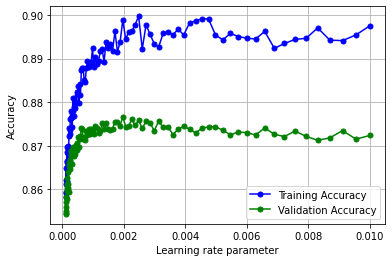

In [111]:
plt.plot(learning_rates, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(learning_rates, validation_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Learning rate parameter')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

## SVM

In [29]:
svm = SVC(C=10,kernel='rbf')
svm.fit(X_tt, y_train)

SVC(C=10)

In [30]:
print(f'SVM classifier accuracy: {svm.score(X_testy, y_test)}')

SVM classifier accuracy: 0.8842


In [31]:
print(f'SVM classifier train accuracy: {svm.score(X_tt, y_train)}')

SVM classifier train accuracy: 0.9286833333333333


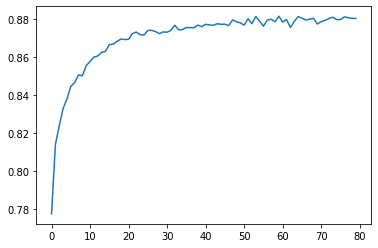

In [32]:
 plt.plot(model.validation_scores_)


In [115]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelUpdated,X_tt,y_train,cv=5,verbose=4, n_jobs=-1,return_times=True)

[learning_curve] Training set sizes: [ 4800 15600 26400 37200 48000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:   34.8s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:  1.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.8min remaining:   34.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min finished


In [121]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

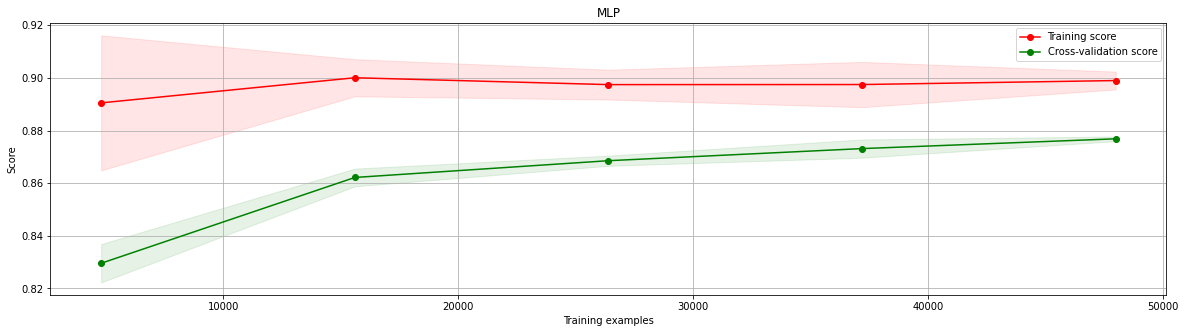

In [266]:
#Code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html?fbclid=IwAR1LHadUCMWpVZeeoIdCdnL8FvBl2HeFCvUNjOue8p73uf8L8yZ40zxdt_U

plt.figure(figsize=(20,5))
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("MLP")
plt.grid()
plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
plt.legend(loc="best")

### Above curve shows different scores on models using 5 folds of the training set

### Initially, the results are very high and very low for the model because the training size is 4800 which means the model hasn't seen too many examples, resulting in the high accuracy in the beginning, and the low validation score is the result of the model not being able to classify properly due to the low training size

### Once the training size is increased, it is visible that the train accuracy drops as it has seen much more datapoints and is now able to make better guesses as can be seen by the higher validation score which is close to 88%

In [89]:
modell = MLPClassifier(hidden_layer_sizes=(40,40,40),activation = 'relu',max_iter=200,solver='adam',learning_rate='constant',learning_rate_init =1e-3,tol=1e-5,early_stopping=True,validation_fraction=0.2,n_iter_no_change=30,verbose = True)

In [90]:
modell.fit(X_tt,y_train)

Iteration 1, loss = 1.35403690
Validation score: 0.764333
Iteration 2, loss = 0.58190706
Validation score: 0.796917
Iteration 3, loss = 0.52156073
Validation score: 0.810167
Iteration 4, loss = 0.49316283
Validation score: 0.818833
Iteration 5, loss = 0.47111197
Validation score: 0.824333
Iteration 6, loss = 0.45484268
Validation score: 0.832250
Iteration 7, loss = 0.44080430
Validation score: 0.832750
Iteration 8, loss = 0.42958047
Validation score: 0.840667
Iteration 9, loss = 0.42017377
Validation score: 0.843417
Iteration 10, loss = 0.41198813
Validation score: 0.846167
Iteration 11, loss = 0.40567515
Validation score: 0.848000
Iteration 12, loss = 0.40169444
Validation score: 0.850750
Iteration 13, loss = 0.39596925
Validation score: 0.849833
Iteration 14, loss = 0.39125299
Validation score: 0.853167
Iteration 15, loss = 0.38592563
Validation score: 0.854083
Iteration 16, loss = 0.38193121
Validation score: 0.857583
Iteration 17, loss = 0.37896278
Validation score: 0.857583
Iterat

Iteration 140, loss = 0.26838325
Validation score: 0.876167
Iteration 141, loss = 0.27026334
Validation score: 0.877750
Iteration 142, loss = 0.26861692
Validation score: 0.878000
Iteration 143, loss = 0.26732809
Validation score: 0.876917
Iteration 144, loss = 0.26707937
Validation score: 0.875917
Iteration 145, loss = 0.26765941
Validation score: 0.873250
Iteration 146, loss = 0.26715218
Validation score: 0.877000
Iteration 147, loss = 0.26655160
Validation score: 0.877833
Iteration 148, loss = 0.26638510
Validation score: 0.876500
Iteration 149, loss = 0.26636736
Validation score: 0.876083
Iteration 150, loss = 0.26598156
Validation score: 0.876833
Iteration 151, loss = 0.26608733
Validation score: 0.876417
Iteration 152, loss = 0.26563700
Validation score: 0.877917
Iteration 153, loss = 0.26519030
Validation score: 0.875417
Iteration 154, loss = 0.26445029
Validation score: 0.875583
Iteration 155, loss = 0.26492661
Validation score: 0.875917
Iteration 156, loss = 0.26410087
Validat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(40, 40, 40),
              n_iter_no_change=30, tol=1e-05, validation_fraction=0.2,
              verbose=True)

In [91]:
modell.score(X_testy,y_test)

0.8687

In [112]:
train_sizes_s, train_scores_s, test_scores_s, fit_times_s, _ = learning_curve(svm,X_tt,y_train,cv=5,verbose=4, n_jobs=-1,return_times=True)

[learning_curve] Training set sizes: [ 4800 15600 26400 37200 48000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:  1.4min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:  4.7min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  7.2min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.7min finished


In [124]:
train_scores_mean_s = np.mean(train_scores_s, axis=1)
train_scores_std_s = np.std(train_scores_s, axis=1)
test_scores_mean_s = np.mean(test_scores_s, axis=1)
test_scores_std_s = np.std(test_scores_s, axis=1)
fit_times_mean_s = np.mean(fit_times_s, axis=1)
fit_times_std_s = np.std(fit_times_s, axis=1)

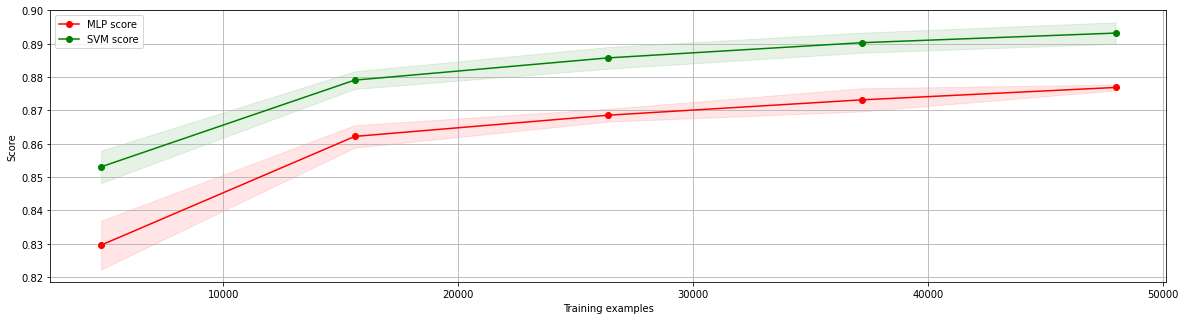

In [130]:
plt.figure(figsize=(20,5))
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="r",
    )
plt.fill_between(
        train_sizes_s,
        test_scores_mean_s - test_scores_std_s,
        test_scores_mean_s + test_scores_std_s,
        alpha=0.1,
        color="g",
    )
plt.plot(
        train_sizes, test_scores_mean, "o-", color="r", label="MLP score"
    )
plt.plot(
        train_sizes_s, test_scores_mean_s, "o-", color="g", label="SVM score"
    )
plt.legend(loc="best")

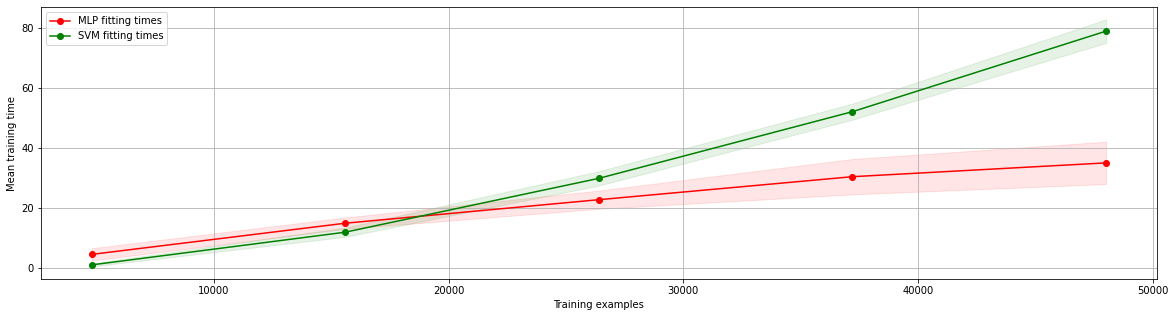

In [269]:
plt.figure(figsize=(20,5))
plt.xlabel("Training examples")
plt.ylabel("Mean training time")
plt.grid()
plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
        color="r",
    )
plt.fill_between(
        train_sizes_s,
        fit_times_mean_s - fit_times_std_s,
        fit_times_mean_s + fit_times_std_s,
        alpha=0.1,
        color="g",
    )
plt.plot(
        train_sizes, fit_times_mean, "o-", color="r", label="MLP fitting times"
    )
plt.plot(
        train_sizes_s, fit_times_mean_s, "o-", color="g", label="SVM fitting times"
    )
plt.legend(loc="best")

## Comparing different SVM kernels

In [159]:
kernels = ['linear', 'poly', 'rbf','sigmoid']
for ker in kernels:
    print(ker)

linear
poly
rbf
sigmoid


In [160]:
accuracies =[]
print(kernels)
for ker in kernels:
    print("Initializing kernel ",ker)
    svm = SVC(C=10,kernel=ker)
    print("Initiating fitting on kernel",ker)
    svm.fit(X_tt, y_train)
    print("Fitting done")
    print("Scoring train")
    train= svm.score(X_tt,y_train)
    print("Training score done")
    print("Scoring test")
    test= svm.score(X_testy, y_test)
    print("Scoring test done")
    accuracies.append((train,test))

['linear', 'poly', 'rbf', 'sigmoid']
Initializing kernel  linear
Initiating fitting on kernel linear
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
Initializing kernel  poly
Initiating fitting on kernel poly
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
Initializing kernel  rbf
Initiating fitting on kernel rbf
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
Initializing kernel  sigmoid
Initiating fitting on kernel sigmoid
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done


In [172]:
print(accuracies)
accuracies = np.array(accuracies)

[(0.84765, 0.8334), (0.9239333333333334, 0.8833), (0.9288666666666666, 0.8837), (0.6511833333333333, 0.618)]


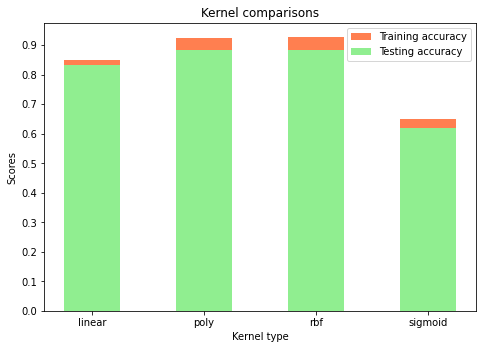

<Figure size 1440x360 with 0 Axes>

In [249]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Kernel type')
ax.set_ylabel('Scores')
ax.set_title('Kernel comparisons')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.bar(kernels,accuracies[:,0],color='coral',width = 0.5, label = 'Training accuracy')
ax.bar(kernels,accuracies[:,1],color='lightgreen',width = 0.5, label = 'Testing accuracy')

ax.legend()


## Comparing different C values for the rbf kernel

In [197]:
C = [0.1,1,10,20,40,100]


[0.1, 1, 10, 20, 40, 100]


In [198]:
c_accuracy = []

for c in C : 
    print("C value is ",c)
    svm= SVC(C=c, kernel = 'rbf')
    print("Proceeding to train")
    svm.fit(X_tt, y_train)
    print("Fitting done")
    print("Scoring train")
    train= svm.score(X_tt,y_train)
    print("Training score done")
    print("Scoring test")
    test= svm.score(X_testy, y_test)
    print("Scoring test done")
    c_accuracy.append((train,test))
    


C value is  0.1
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
C value is  1
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
C value is  10
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
C value is  20
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
C value is  40
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done
C value is  100
Proceeding to train
Fitting done
Scoring train
Training score done
Scoring test
Scoring test done


In [263]:
c_accuracy = np.array(c_accuracy)


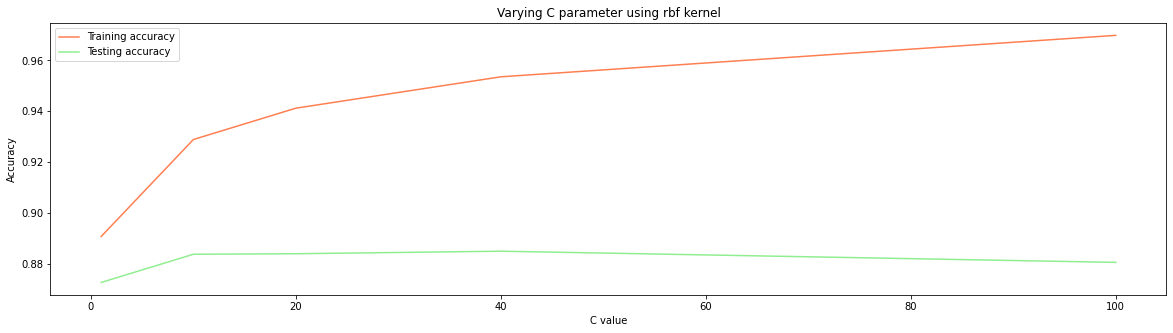

In [261]:

plt.figure(figsize=(20,5))
plt.title("Varying C parameter using rbf kernel")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(
        C[1:],c_accuracy[1:,0],color='coral',label = 'Training accuracy'
    )
plt.plot(
        C[1:],c_accuracy[1:,1],color='lightgreen',label = 'Testing accuracy'
    )
plt.legend(loc="best")

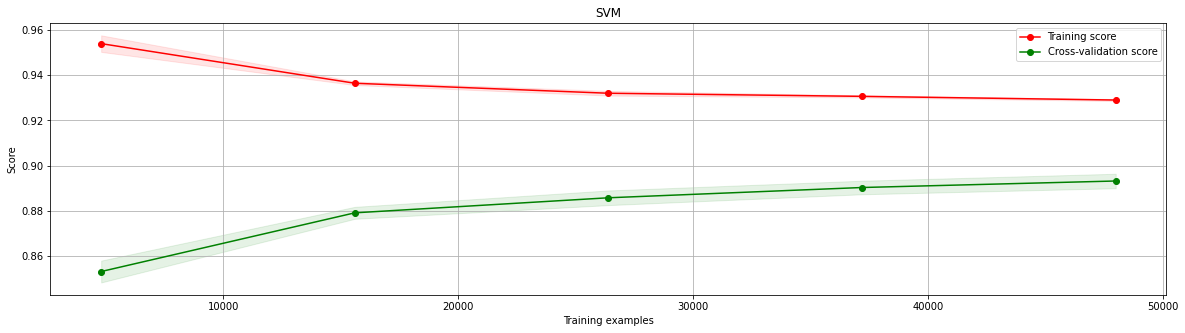

In [268]:
plt.figure(figsize=(20,5))
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("SVM")
plt.grid()
plt.fill_between(
        train_sizes,
        train_scores_mean_s - train_scores_std_s,
        train_scores_mean_s + train_scores_std_s,
        alpha=0.1,
        color="r",
    )
plt.fill_between(
        train_sizes,
        test_scores_mean_s - test_scores_std_s,
        test_scores_mean_s + test_scores_std_s,
        alpha=0.1,
        color="g",
    )
plt.plot(
        train_sizes, train_scores_mean_s, "o-", color="r", label="Training score"
    )
plt.plot(
        train_sizes, test_scores_mean_s, "o-", color="g", label="Cross-validation score"
    )
plt.legend(loc="best")

## Creating decision boundaries

In [12]:
pca_d = PCA(n_components=2)

pca_d.fit(X_train)


PCA(n_components=2)

In [29]:
X_d = pca_d.transform(X_train)
X_d = X_d/ np.max(X_d)


(60000, 2)


In [61]:
modelUpdated_d = MLPClassifier(hidden_layer_sizes=(40,40,40,),activation = 'relu',max_iter=200,solver='adam',learning_rate='constant',learning_rate_init =0.0047508101621027985,alpha=0.005336699231206312,tol=1e-3,early_stopping=True,validation_fraction=0.1,n_iter_no_change=25,verbose = True)

In [62]:
modelUpdated_d.fit(X_d,y_train)

Iteration 1, loss = 1.24965861
Validation score: 0.521167
Iteration 2, loss = 1.10875671
Validation score: 0.541500
Iteration 3, loss = 1.09566738
Validation score: 0.532500
Iteration 4, loss = 1.09088188
Validation score: 0.530500
Iteration 5, loss = 1.08531534
Validation score: 0.536167
Iteration 6, loss = 1.08281372
Validation score: 0.544333
Iteration 7, loss = 1.08008076
Validation score: 0.529167
Iteration 8, loss = 1.07930679
Validation score: 0.535667
Iteration 9, loss = 1.07837319
Validation score: 0.544000
Iteration 10, loss = 1.07686367
Validation score: 0.539000
Iteration 11, loss = 1.07301849
Validation score: 0.539667
Iteration 12, loss = 1.07558189
Validation score: 0.539000
Iteration 13, loss = 1.07348949
Validation score: 0.545167
Iteration 14, loss = 1.07504302
Validation score: 0.533333
Iteration 15, loss = 1.07011892
Validation score: 0.544833
Iteration 16, loss = 1.06992658
Validation score: 0.543167
Iteration 17, loss = 1.07117499
Validation score: 0.546333
Iterat

MLPClassifier(alpha=0.005336699231206312, early_stopping=True,
              hidden_layer_sizes=(40, 40, 40),
              learning_rate_init=0.0047508101621027985, n_iter_no_change=25,
              tol=0.001, verbose=True)

In [105]:
#Code adapted from lab 2 exercise 3
x_min, x_max = X_d[:, 0].min() - .5, X_d[:, 0].max() + .5
y_min, y_max = X_d[:, 1].min() - .5, X_d[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu

def plot_clf(clf,name):
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(7, 5))
    plt.title(name)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
    #ax.scatter(X_tt[:,0],X_tt[:,1],c=y_train)
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([x_min,x_max])
    ax.set_xlabel('X')
    ax.set_ylabel('y')

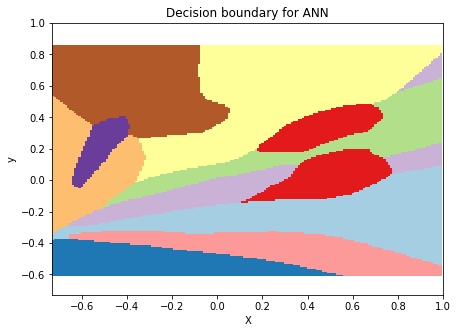

In [106]:
plot_clf(modelUpdated_d, 'Decision boundary for ANN')

In [102]:
svc_d =SVC(C=10,kernel='rbf')
svc_d.fit(X_d,y_train)

SVC(C=10)

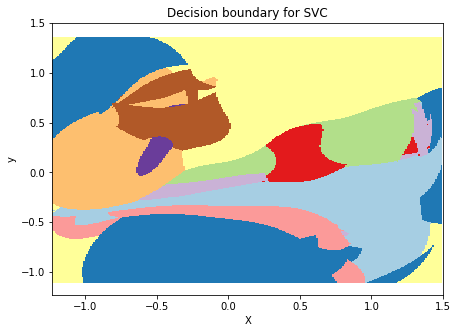

In [103]:
plot_clf(svc_d, 'Decision boundary for SVC')